# Imperative Inference (no `TensorFlow`!)

In [1]:
import os
import sys
import time
import pickle

#import autograd.numpy as np
import numpy as np
import pandas as pd
#import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=3, linewidth=500, edgeitems=15, suppress=True)

import seaborn as sns
sns.set_palette('bright')


import matplotlib as mpl
import matplotlib.style as mplstyle

label_size = 9 
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

mplstyle.use('fast')

#from matplotlib import rc
#rc('text', usetex=False)

import utils.file_io as io

/home/foremans/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/foremans/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/foremans/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/foremans/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

In [2]:
import time
from plot_script import get_matching_log_dirs
t0 = time.time()
root_dir = os.path.abspath('../../gauge_logs/')
dates = ['2019_12_15',
         '2019_12_16',
         '2019_12_17',
         '2019_12_18',
         '2019_12_19',
         '2019_12_20',
         '2019_12_21',
         '2019_12_22',
         '2019_12_23',
         '2019_12_24',
         '2019_12_25',
         '2019_12_26',
         '2019_12_27',
         '2019_12_28',
         '2019_12_29',
         '2019_12_30',
         '2019_12_31',
         '2020_01_02',
         '2020_01_03',
         '2020_01_04',
         '2020_01_05',
         '2020_01_06',
         '2020_01_07',
         '2020_01_08']

log_dirs = []
for date in dates:
    ld = get_matching_log_dirs(date, root_dir=root_dir)
    for log_dir in ld:
        if 'x011' in log_dir or 'v011' in log_dir:
            continue
        else:
            log_dirs += [log_dir]
    #log_dirs += [*ld]
    
print(len(log_dirs))
log_dirs

47


['/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2019_12_15/L8_b64_lf1_f32',
 '/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2019_12_15/L8_b64_lf3_f32_0413',
 '/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2019_12_15/L8_b64_lf1_f32_0929',
 '/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2019_12_15/L8_b64_lf2_f32_2157',
 '/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2019_12_15/L8_b64_lf2_f32_0408',
 '/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2019_12_15/L8_b64_lf3_f32_2206',
 '/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2019_12_15/L8_b64_lf4_f32_0431',
 '/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2019_12_15/L8_b64_lf4_f32_2224',
 '/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2019_12_15/L8_b64_lf5_f32_0843',
 '/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2019_12_17/L8_b64_lf1_x101_v101_f32_1341',
 '/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2019_12_18/L8_b64_lf1_x111_v101_f32_2118',
 '/lus/theta-fs0/projects/DLHMC/l2hmc-q

In [3]:
from gauge_inference_np import inference_plots
from runners.runner_np import create_dynamics, run_inference_np
from utils.file_io import timeit
import utils.file_io as io
from runners.runner_np import load_pkl
from config import NetWeights

#log_dir = os.path.abspath('../../gauge_logs/2020_01_07/L8_b64_lf2_v101_f32_0023/')
log_dir = log_dirs[-1]
#for log_dir in log_dirs:
    #if os.path.isfile(os.path.join(log_dir, 'weights.pkl')):
try:
    dynamics, lattice = create_dynamics(log_dir)
    
    params = load_pkl(os.path.join(log_dir, 'parameters.pkl'))
    net_weights = NetWeights(x_scale=1, x_translation=1, x_transformation=1,
                             v_scale=1, v_translation=1, v_transformation=1)
    rp_l2hmc = {
        'beta': 5.,
        'eps': dynamics.eps,
        'net_weights': net_weights,
        'run_steps': 5000,
    }

    rp_l2hmc, rd_l2hmc, ed_l2hmc = run_inference_np(log_dir, dynamics,
                                                    lattice, rp_l2hmc,
                                                    init='rand')
    #inference_plots(rd_l2hmc, ed_l2hmc, params, rp_l2hmc)
except:
    io.log(f'Unable to load from `weights.pkl` file in {log_dir}. Skipping!')

init: rand

Creating directory: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/runs_np/steps5000_beta50_eps00402_nw111111_rand
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
     0/5000     0.02692     0.8475       1.749       1.156      0.8432       1.053      0.7473   
     1/5000     0.02497     0.8568       1.749      0.8745       1.124       1.069      0.7391   
     2/5000     0.02429     0.8613       1.78        1.124      0.8744       1.088      0.7288   
     3/5000     0.0242      0.8987       1.78       0.8745       1.124       1.174      0.7214   
     4/5000     0.02585      0.887       1.78       0.9369       1.062       1.16       0.7143   
     5/5000     0.02516     0.8389       1.78        1.031 

    85/5000     0.02427     0.9081       1.624       1.187       0.812       1.02       0.2812   
    86/5000     0.02402     0.9133       1.718      0.8432       1.156       1.026      0.2785   
    87/5000     0.02396     0.9302       1.905      0.9369       1.062       1.039       0.275   
    88/5000     0.02405     0.9007       1.811      0.9369       1.062      0.9814      0.2723   
    89/5000     0.02404     0.9152       1.811      0.9057       1.093       1.021      0.2696   
    90/5000     0.02374     0.9129       1.78        1.218      0.7808       1.016       0.266   
    91/5000     0.02401     0.9157       1.874      0.9057       1.093       1.005      0.2617   
    92/5000     0.02415     0.9284       1.999      0.8745       1.124       1.031      0.2578   
    93/5000     0.02465     0.8959       1.874       1.062      0.9369      0.9792      0.2542   
    94/5000     0.0242      0.9413       1.843       1.031      0.9682       1.071      0.2506   
    95/5000     0.02

   172/5000     0.02432     0.8786       1.905       1.28       0.7183      0.9515      0.1108   
   173/5000     0.02395     0.8974       1.811      0.8432       1.156       1.014      0.1092   
   174/5000      0.024      0.9028       1.905       1.031      0.9682       1.018      0.1077   
   175/5000     0.02371     0.8799       1.718       1.062      0.9369      0.9967      0.1072   
   176/5000     0.02358     0.9159       1.624       1.093      0.9057       1.089      0.1067   
   177/5000     0.02824     0.9171       1.78        0.812       1.187       1.059      0.1054   
   178/5000     0.0249      0.8655       1.562      0.9369       1.062      0.9736      0.1038   
   179/5000     0.02512     0.8693       1.843      0.9994      0.9994       0.948      0.1029   
   180/5000     0.02544     0.8875       1.718       1.062      0.9369       1.009      0.1024   
   181/5000     0.02483     0.9381       1.905      0.9994      0.9994       1.101      0.1016   
   182/5000     0.02

   257/5000     0.0244       0.911       1.874       1.124      0.8745       1.046      0.05375  
   258/5000     0.02415     0.9169       1.811      0.9681       1.031       1.069      0.05352  
   259/5000     0.02396     0.9193       1.874      0.8745       1.124       1.056      0.0532   
   260/5000     0.02402     0.9069       1.874      0.9994      0.9994       1.024      0.05283  
   261/5000     0.02369     0.8894       1.78       0.8745       1.124       1.003      0.05238  
   262/5000     0.02358     0.9076       1.843      0.9681       1.031       1.036      0.05211  
   263/5000     0.02357     0.9034       1.936       1.187       0.812       1.011      0.05131  
   264/5000     0.02347     0.9047       1.686      0.8745       1.124       1.048      0.05121  
   265/5000     0.02438     0.9089       1.811      0.9681       1.031       1.036      0.05083  
   266/5000     0.0242      0.9027       1.843      0.9994      0.9994       1.015      0.05072  
   267/5000     0.02

   345/5000     0.02558     0.9246       1.78        0.812       1.187       1.009      0.0284   
   346/5000     0.02549     0.9273       1.905      0.9057       1.093       1.011      0.02902  
   347/5000     0.02498     0.9351       1.874      0.9994      0.9994       1.023      0.02746  
   348/5000     0.02522      0.914       1.905      0.9369       1.062      0.9851      0.02689  
   349/5000     0.02445     0.9131       1.811       1.062      0.9369      0.9939      0.02779  
   350/5000     0.02402     0.9395       1.999      0.9681       1.031       1.035      0.02641  
   351/5000     0.02393     0.9065       1.811       1.031      0.9681      0.9837      0.02689  
   352/5000     0.02406     0.9083       1.811       1.156      0.8432      0.9955      0.02646  
   353/5000     0.02418      0.917       1.936       1.031      0.9681       1.005      0.02545  
   354/5000     0.02406     0.9034       1.811      0.9994      0.9994       0.992      0.02542  
   355/5000     0.02

   433/5000     0.02457     0.9279       1.905       1.062      0.9369       1.056      0.01408  
   434/5000     0.02384     0.9101       1.78       0.6871       1.312       1.02       0.01377  
   435/5000     0.02393     0.9027       1.874       1.062      0.9369      0.9936      0.01263  
   436/5000     0.02377      0.914       1.905       1.031      0.9682       1.017      0.01192  
   437/5000     0.02375     0.8955       1.78       0.7808       1.218       1.003      0.01225  
   438/5000     0.0238      0.9149       1.874       1.062      0.9369       1.039      0.01221  
   439/5000     0.02357     0.9058       1.749      0.9681       1.031       1.029      0.01219  
   440/5000     0.02365     0.9402       1.905       1.062      0.9369       1.075      0.01201  
   441/5000     0.02368     0.8928       1.78       0.9681       1.031      0.9852      0.01242  
   442/5000     0.02342     0.9069       1.78        1.187       0.812       1.023      0.01227  
   443/5000     0.02

   521/5000     0.02453     0.9067       1.686       1.218      0.7808       1.029      0.01485  
   522/5000     0.02413     0.9035       1.905       1.187       0.812       1.005      0.01479  
   523/5000     0.0243      0.9116       1.874      0.8745       1.124       1.025      0.01472  
   524/5000     0.02541     0.9279       1.936       1.062      0.9369       1.056      0.01512  
   525/5000     0.02503     0.9039       1.905       1.218      0.7808      0.9942      0.01535  
   526/5000     0.02564     0.8978       1.78       0.9369       1.062       1.013      0.01574  
   527/5000     0.02479      0.886       1.749      0.9369       1.062      0.9889      0.01599  
   528/5000     0.02512     0.9004       1.78        1.124      0.8745       1.028      0.01584  
   529/5000     0.02467     0.9099       1.874       0.812       1.187       1.028      0.01524  
   530/5000     0.02432     0.9168       1.874       1.156      0.8432       1.029      0.01553  
   531/5000     0.02

   608/5000     0.02497     0.8944       1.843       1.062      0.9369      0.9993      0.01499  
   609/5000     0.02448     0.9148       1.843      0.9369       1.062       1.038      0.01344  
   610/5000     0.0256      0.9317       1.843      0.9681       1.031       1.079       0.014   
   611/5000     0.02407     0.9087       1.78       0.7808       1.218       1.021      0.01419  
   612/5000     0.02403     0.9047       1.686      0.9994      0.9994       1.032      0.01362  
   613/5000     0.02402     0.9215       1.874       1.062      0.9369       1.051      0.01369  
   614/5000     0.02404     0.9256       1.843      0.9994      0.9994       1.056      0.01398  
   615/5000     0.02415     0.9309       1.874       1.031      0.9681       1.062      0.01352  
   616/5000     0.02475     0.9121       1.78       0.9681       1.031       1.028      0.01506  
   617/5000     0.02403     0.9089       1.78       0.9994      0.9994       1.009      0.01526  
   618/5000     0.02

   696/5000     0.02906     0.8856       1.624       1.062      0.9369       1.002     0.007791  
   697/5000     0.0256      0.8878       1.843       1.031      0.9682      0.9675     0.006879  
   698/5000     0.02478     0.9162       1.811       1.031      0.9682       1.052     0.006706  
   699/5000     0.02488     0.9175       1.811      0.8432       1.156       1.04       0.00656  
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
   700/5000     0.02474     0.8997       1.686       1.187       0.812       1.026     0.006704  
   701/5000     0.02458     0.9084       1.968       1.249      0.7495       1.005     0.007314  
   702/5000     0.02467      0.896       1.874      0.9681       1.031      0.9977     0.007431  
   703/5000     0.02

   783/5000     0.02394     0.9074       1.843      0.9682       1.031       1.025      0.00362  
   784/5000     0.02597     0.9203       1.936       1.093      0.9057       1.04      0.002716  
   785/5000     0.02563     0.9168       1.843      0.9057       1.093       1.039     0.002756  
   786/5000     0.02402     0.9322       1.843       1.093      0.9057       1.064     0.003365  
   787/5000     0.02444     0.9159       1.905       1.124      0.8745       1.011     0.003326  
   788/5000     0.02388     0.9248       1.78        1.062      0.9369       1.059     0.003436  
   789/5000     0.02452     0.8672       1.78        0.812       1.187      0.9222     0.004153  
   790/5000     0.02497     0.9095       1.874      0.8432       1.156       1.022     0.003126  
   791/5000     0.02478     0.9064       1.811      0.9369       1.062       1.019     0.003707  
   792/5000     0.02459     0.9119       1.78        1.093      0.9057       1.053      0.0042   
   793/5000     0.02

   871/5000     0.02373     0.9178       1.874      0.9681       1.031       1.017     0.009907  
   872/5000     0.02375     0.9017       1.811       1.187       0.812       1.004      0.01055  
   873/5000     0.02494     0.8892       1.749       1.124      0.8745      0.9858      0.0111   
   874/5000     0.02403     0.8798       1.78        1.156      0.8432      0.9745      0.0112   
   875/5000     0.02418     0.9042       1.874      0.9994      0.9994       1.028      0.01107  
   876/5000     0.02399     0.9098       1.718      0.9057       1.093       1.056      0.01014  
   877/5000     0.02373     0.8945       1.78       0.9681       1.031       1.012      0.01079  
   878/5000     0.02432     0.9087       1.936       0.812       1.187       1.026      0.01164  
   879/5000     0.02544     0.9042       1.749       1.093      0.9057       1.022      0.01125  
   880/5000     0.02431     0.9299       1.874       1.031      0.9681       1.063      0.01088  
   881/5000     0.02

   959/5000     0.02415     0.9401       1.905       1.124      0.8745       1.064     0.006003  
   960/5000     0.02466     0.9367       1.874      0.9369       1.062       1.049     0.004807  
   961/5000     0.02431     0.9295       1.874      0.9682       1.031       1.029     0.005001  
   962/5000     0.02425     0.9128       1.749      0.9369       1.062      0.9892      0.00551  
   963/5000     0.02429     0.9306       1.874      0.7808       1.218       1.025      0.00489  
   964/5000     0.02437     0.9163       1.811       1.124      0.8745       1.005     0.005307  
   965/5000     0.02395      0.943       1.811       1.031      0.9682       1.056     0.005152  
   966/5000     0.02357     0.9305       1.936      0.9369       1.062      0.9996     0.004732  
   967/5000     0.02434     0.9324       1.874       1.156      0.8432       1.015     0.004419  
   968/5000     0.02403     0.9254       1.905      0.9681       1.031      0.9948     0.004958  
   969/5000     0.02

  1046/5000     0.02566     0.8952       1.843      0.8745       1.124      0.9963     0.002901  
  1047/5000     0.02442     0.8905       1.811      0.9369       1.062       1.007     0.003446  
  1048/5000     0.0252      0.8907       1.843       0.812       1.187       1.009     0.003783  
  1049/5000     0.0252      0.9057       1.843      0.7183       1.28        1.037     0.003559  
  1050/5000     0.02418     0.9045       1.718       1.093      0.9057       1.049     0.004443  
  1051/5000     0.02429     0.9067       1.811       1.062      0.9369       1.036     0.003633  
  1052/5000     0.02428     0.8876       1.655       1.062      0.9369       1.022     0.004037  
  1053/5000     0.02497     0.8815       1.811      0.7808       1.218      0.9845     0.004346  
  1054/5000     0.02541     0.8809       1.78       0.8745       1.124      0.9997     0.005409  
  1055/5000     0.02534     0.8886       1.811      0.9681       1.031       1.025     0.004946  
  1056/5000     0.02

  1134/5000     0.02384     0.8873       1.718       1.093      0.9057      0.9884      0.00505  
  1135/5000     0.02401     0.9072       1.811       1.187       0.812       1.022      0.00597  
  1136/5000     0.02389     0.9093       1.78       0.9057       1.093       1.028     0.006838  
  1137/5000     0.02378     0.9177       1.749       1.062      0.9369       1.033     0.006478  
  1138/5000     0.02344     0.9297       1.874      0.8745       1.124       1.043     0.005683  
  1139/5000     0.02344     0.8912       1.905      0.8432       1.156      0.9525     0.005803  
  1140/5000     0.02352     0.9238       1.78       0.9682       1.031       1.059     0.006518  
  1141/5000     0.02345      0.906       1.718      0.9681       1.031       1.025     0.007433  
  1142/5000     0.02405     0.9098       1.78        1.156      0.8432       1.01      0.007682  
  1143/5000     0.02351     0.9082       1.749      0.9057       1.093         1       0.008357  
  1144/5000     0.02

  1222/5000     0.02423     0.9128       1.843       1.093      0.9057       1.007     0.001388  
  1223/5000     0.02372     0.9306       1.905       1.156      0.8432       1.052     0.001395  
  1224/5000     0.02394     0.9082       1.78        0.812       1.187       1.011     0.0007418 
  1225/5000     0.02529     0.9069       1.811       1.374      0.6246       1.012     0.001287  
  1226/5000     0.02378     0.9158       1.905       1.249      0.7495       1.022     0.001086  
  1227/5000     0.02361     0.9204       1.905      0.9994      0.9994       1.033     0.001129  
  1228/5000     0.02373      0.91        1.811      0.6558       1.343       1.019     0.000813  
  1229/5000     0.02364      0.912       1.749       1.093      0.9057       1.025     8.851e-05 
  1230/5000     0.02388     0.9224       1.843      0.9994      0.9994       1.035     0.001274  
  1231/5000     0.02398     0.9213       1.843       1.093      0.9057       1.026     0.001626  
  1232/5000     0.02

  1310/5000     0.02438      0.929       1.78       0.9682       1.031       1.048     0.003808  
  1311/5000     0.02399     0.9142       1.874      0.9369       1.062       1.008     0.003062  
  1312/5000     0.02405     0.9234       1.905       1.124      0.8745       1.019     0.002609  
  1313/5000     0.02374      0.906       1.811       1.093      0.9057      0.9911      0.00305  
  1314/5000     0.02356     0.9041       1.843      0.9994      0.9994      0.9959     0.004062  
  1315/5000     0.02364     0.9214       1.874       1.093      0.9057       1.037     0.004241  
  1316/5000     0.02372     0.9184       1.874      0.9057       1.093       1.029     0.004608  
  1317/5000     0.02356     0.9096       1.78       0.7496       1.249       1.027     0.004232  
  1318/5000     0.02469     0.8956       1.843       1.156      0.8432      0.9915     0.004009  
  1319/5000     0.02423     0.8984       1.936      0.8432       1.156      0.9888     0.004082  
  1320/5000     0.02

  1398/5000     0.02447     0.9346       1.874       1.062      0.9369       1.067     0.003371  
  1399/5000     0.02407     0.8907       1.718       1.124      0.8745      0.9757     0.004006  
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
  1400/5000     0.02574     0.9248       1.874      0.9057       1.093       1.056     0.004166  
  1401/5000     0.02445     0.9168       1.811      0.8745       1.124       1.05       0.00449  
  1402/5000     0.0241      0.9117       1.78        1.218      0.7808       1.029     0.004458  
  1403/5000     0.02392     0.9099       1.843      0.9369       1.062       1.007     0.004363  
  1404/5000     0.0239      0.9099       1.811       1.062      0.9369       1.023     0.004841  
  1405/5000     0.02

  1485/5000     0.02658     0.9035       1.874       1.156      0.8432       1.011     0.006475  
  1486/5000     0.02681     0.8979       1.749       1.156      0.8432       1.006     0.006244  
  1487/5000     0.02687     0.9142       1.749       1.031      0.9682       1.048      0.00604  
  1488/5000     0.02576     0.9069       1.843      0.9057       1.093       1.019     0.006355  
  1489/5000     0.0243      0.9012       1.78        1.093      0.9057       1.018     0.006247  
  1490/5000     0.02411     0.9147       1.78        0.812       1.187       1.053     0.005375  
  1491/5000     0.02432     0.8982       1.749       1.156      0.8432       1.016     0.006388  
  1492/5000     0.02411     0.9169       1.874      0.8745       1.124       1.039     0.006748  
  1493/5000     0.02612     0.8964       1.655       1.062      0.9369       1.025     0.007279  
  1494/5000     0.02601     0.9106       1.811      0.8745       1.124       1.031     0.007757  
  1495/5000     0.02

  1571/5000     0.02546     0.8857       1.718       0.812       1.187      0.9905     0.007829  
  1572/5000     0.02403     0.8906       1.78        1.124      0.8745      0.9943     0.007618  
  1573/5000     0.02453     0.8932       1.718      0.9369       1.062       1.025     0.007717  
  1574/5000     0.02432      0.897       1.874      0.7808       1.218       1.006     0.007022  
  1575/5000     0.02454     0.8838       1.718      0.9994      0.9994      0.9907     0.005789  
  1576/5000     0.02513     0.8917       1.843       1.062      0.9369      0.9834     0.005871  
  1577/5000     0.02662     0.8966       1.718       1.031      0.9682       1.025      0.00479  
  1578/5000     0.02412     0.9024       1.843      0.9369       1.062       1.032     0.004444  
  1579/5000     0.02443     0.9009       1.874       1.062      0.9369       1.014     0.005435  
  1580/5000     0.02405      0.911       1.811       1.187       0.812       1.048     0.005146  
  1581/5000     0.02

  1659/5000     0.02577     0.9106       1.843      0.9057       1.093       1.034     0.003699  
  1660/5000     0.02578     0.8799       1.655       1.062      0.9369      0.9945     0.003622  
  1661/5000     0.02412      0.894       1.843      0.9994      0.9994      0.9971     0.003063  
  1662/5000     0.02388     0.8969       1.905       1.062      0.9369       1.008     0.002018  
  1663/5000     0.02408     0.8882       1.843      0.8432       1.156      0.9914     0.002156  
  1664/5000     0.02396     0.9024       1.874       1.218      0.7808       1.036     0.002228  
  1665/5000     0.02443     0.9046       1.811       1.28       0.7183       1.04      0.002296  
  1666/5000     0.02428     0.8904       1.78       0.9369       1.062       1.01      0.002776  
  1667/5000     0.02418      0.899       1.655       1.031      0.9681       1.037     0.002614  
  1668/5000     0.02417     0.9141       1.905      0.8745       1.124       1.05      0.002037  
  1669/5000     0.02

  1747/5000     0.02448     0.8962       1.874      0.8745       1.124       1.016     0.005694  
  1748/5000     0.02426     0.9166       1.905      0.9369       1.062       1.058     0.005578  
  1749/5000     0.02394     0.8864       1.718      0.9994      0.9994      0.9963     0.005294  
  1750/5000     0.0241      0.8872       1.718      0.9369       1.062       1.01       0.00506  
  1751/5000     0.02364     0.9152       1.843       1.187       0.812       1.044     0.005421  
  1752/5000     0.02394     0.9173       1.749       1.093      0.9057       1.063     0.005639  
  1753/5000     0.02361      0.895       1.78        1.124      0.8745      0.9945     0.006463  
  1754/5000     0.02389     0.9067       1.811      0.9994      0.9994       1.026     0.005956  
  1755/5000     0.02392     0.9277       1.843       1.031      0.9681       1.065     0.006107  
  1756/5000     0.02372     0.9142       1.811       1.124      0.8745       1.028     0.006227  
  1757/5000     0.02

  1835/5000     0.02462     0.8849       1.811      0.9369       1.062       1.016     0.003058  
  1836/5000     0.02535     0.8918       1.749      0.5934       1.405       1.035      0.00303  
  1837/5000      0.026      0.9114       1.811       1.031      0.9681       1.054     0.002246  
  1838/5000     0.02496      0.888       1.811       1.062      0.9369       1.003     0.002835  
  1839/5000     0.02386     0.8959       1.749      0.5934       1.405       1.051     0.003308  
  1840/5000     0.02369     0.9042       1.718      0.8745       1.124       1.061      0.00428  
  1841/5000     0.02372     0.8843       1.718      0.9681       1.031       1.019     0.003511  
  1842/5000     0.02397     0.8991       1.749       1.062      0.9369       1.047     0.003932  
  1843/5000     0.02388     0.8928       1.749      0.9994      0.9994       1.033      0.00439  
  1844/5000     0.02382     0.8982       1.624       1.031      0.9681       1.06      0.004107  
  1845/5000     0.02

  1922/5000     0.02579     0.9187       1.749      0.9369       1.062       1.062     0.007005  
  1923/5000     0.02602     0.8959       1.843      0.8745       1.124      0.9815     0.006567  
  1924/5000      0.026      0.8957       1.624       1.156      0.8433       1.015     0.006123  
  1925/5000     0.02421     0.9179       1.843      0.9369       1.062       1.049     0.005876  
  1926/5000     0.02399     0.8962       1.718       1.124      0.8744       1.011     0.006452  
  1927/5000     0.02414     0.9235       1.811      0.9682       1.031       1.061     0.006052  
  1928/5000     0.02401     0.9039       1.811       1.093      0.9057       1.013     0.006075  
  1929/5000     0.02435     0.9251       1.874       1.156      0.8432       1.051     0.006194  
  1930/5000     0.02459     0.9193       1.874       1.124      0.8744       1.023     0.005952  
  1931/5000     0.02422     0.9198       1.811       1.124      0.8745       1.025     0.005834  
  1932/5000     0.02

  2010/5000     0.02457     0.9087       1.811      0.8744       1.124       1.009     0.008276  
  2011/5000     0.02405     0.9196       1.78       0.9369       1.062       1.05      0.007492  
  2012/5000     0.02409      0.902       1.78        1.062      0.9369      0.9868     0.007043  
  2013/5000     0.02411     0.9102       1.843       1.218      0.7808      0.9993     0.007216  
  2014/5000     0.02391     0.9158       1.843       1.156      0.8432       1.022      0.00828  
  2015/5000     0.02379     0.9076       1.78        1.124      0.8745       1.007     0.007684  
  2016/5000     0.02347     0.8995       1.811       1.124      0.8745       1.003      0.00889  
  2017/5000     0.02389     0.8838       1.843       1.031      0.9681       0.979      0.00947  
  2018/5000     0.02436     0.8856       1.686       1.031      0.9681      0.9953      0.01004  
  2019/5000     0.02393     0.9085       1.78        1.124      0.8744       1.034      0.01051  
  2020/5000     0.02

  2098/5000     0.02406     0.9538       1.843      0.9057       1.093       1.119     0.006784  
  2099/5000     0.02383     0.9185       1.843      0.8745       1.124       1.018     0.007377  
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
  2100/5000     0.02458     0.9192       1.78        1.031      0.9682       1.019     0.008857  
  2101/5000     0.02425     0.8985       1.811       1.031      0.9682      0.9882     0.009577  
  2102/5000     0.02445     0.8964       1.686      0.9369       1.062       1.012     0.009092  
  2103/5000     0.02412     0.8965       1.811      0.9057       1.093      0.9879     0.009858  
  2104/5000     0.0246      0.9312       1.78       0.8745       1.124       1.072     0.009546  
  2105/5000     0.02

  2185/5000     0.02414     0.9005       1.749      0.8745       1.124       1.019     0.007757  
  2186/5000     0.02419     0.9035       1.811      0.9681       1.031       1.018     0.008736  
  2187/5000     0.02419     0.9054       1.811       1.187       0.812       1.016      0.00936  
  2188/5000     0.0241      0.9006       1.843      0.8745       1.124       1.012     0.009902  
  2189/5000     0.02431     0.8795       1.749      0.9994      0.9994      0.9741      0.01037  
  2190/5000     0.02425     0.9142       1.718       0.812       1.187       1.061     0.009337  
  2191/5000     0.02402     0.8814       1.811       1.093      0.9057      0.9757      0.00933  
  2192/5000     0.02376     0.9001       1.78        0.937       1.062       1.042     0.008651  
  2193/5000     0.02406     0.8938       1.749      0.9369       1.062       1.031     0.008236  
  2194/5000     0.02451     0.9154       1.874       1.124      0.8745       1.065     0.008161  
  2195/5000     0.02

  2273/5000     0.0247      0.9134       1.843       1.062      0.9369       1.044      0.00825  
  2274/5000     0.02441     0.9097       1.811      0.7808       1.218       1.023     0.008279  
  2275/5000     0.02359     0.9035       1.811      0.9681       1.031       1.011     0.008401  
  2276/5000     0.0238      0.9279       1.874       1.187       0.812       1.056     0.007927  
  2277/5000     0.0237      0.9025       1.843       1.156      0.8432       1.019     0.007922  
  2278/5000     0.02381     0.9006       1.874      0.9681       1.031      0.9988     0.008084  
  2279/5000     0.02368     0.9161       1.811      0.9994      0.9994       1.049     0.008964  
  2280/5000     0.02377     0.9107       1.936      0.9057       1.093       1.021     0.008862  
  2281/5000     0.02414     0.9197       1.843      0.8432       1.156       1.049     0.009278  
  2282/5000     0.02386     0.8998       1.78       0.9681       1.031      0.9975     0.009116  
  2283/5000     0.02

  2359/5000     0.02482      0.928       1.874      0.8745       1.124       1.068     0.005381  
  2360/5000     0.02434     0.9095       1.811      0.9682       1.031       1.031     0.004861  
  2361/5000     0.02708     0.8958       1.874       1.187       0.812      0.9956     0.005313  
  2362/5000     0.02412     0.9008       1.936       0.812       1.187       1.006     0.004803  
  2363/5000     0.02379      0.911       1.905       1.124      0.8745       1.02       0.00482  
  2364/5000     0.02394     0.9042       1.905      0.9994      0.9994       1.021     0.005016  
  2365/5000     0.02376     0.9076       1.905      0.9057       1.093       1.023     0.004939  
  2366/5000     0.02387     0.9033       1.874       1.031      0.9682       1.012     0.005059  
  2367/5000     0.02509     0.9195       1.811       0.812       1.187       1.054     0.004884  
  2368/5000     0.02506     0.9128       1.749      0.6871       1.312       1.047     0.003657  
  2369/5000     0.02

  2443/5000     0.02535     0.8781       1.749      0.9994      0.9994      0.9688     0.001324  
  2444/5000     0.02476     0.8971       1.78        1.031      0.9681       1.008     0.001739  
  2445/5000     0.02488     0.8997       1.811       1.156      0.8432       1.015     0.001394  
  2446/5000     0.02484     0.9106       1.749       1.124      0.8744       1.041     0.002398  
  2447/5000     0.0244      0.9059       1.718      0.9681       1.031       1.028     0.003107  
  2448/5000     0.02443     0.9303       1.968       1.062      0.9369       1.038     0.003828  
  2449/5000     0.02422     0.9047       1.843      0.8744       1.124       1.01      0.005406  
  2450/5000     0.02397     0.9233       1.78        1.062      0.9369       1.058     0.005783  
  2451/5000     0.02449     0.9159       1.78       0.8745       1.124       1.028     0.005031  
  2452/5000     0.02417     0.9059       1.843       1.062      0.9369       0.998     0.004508  
  2453/5000     0.02

  2531/5000     0.02448     0.8903       1.78       0.8745       1.124       0.995     0.004951  
  2532/5000     0.02433     0.9336       1.843       0.812       1.187       1.091     0.004519  
  2533/5000     0.02359     0.8923       1.843      0.9057       1.093      0.9918     0.004773  
  2534/5000     0.02368     0.9004       1.718      0.7183       1.28        1.023      0.00564  
  2535/5000     0.02378     0.9044       1.843      0.9994      0.9994       1.011     0.006285  
  2536/5000     0.02373      0.903       1.749      0.8432       1.156       1.019     0.006162  
  2537/5000     0.02389     0.9262       1.905       1.218      0.7808       1.042      0.00611  
  2538/5000     0.02382     0.9155       1.843       1.124      0.8745       1.019     0.006137  
  2539/5000     0.02421     0.9109       1.874       1.124      0.8744       1.001      0.00641  
  2540/5000     0.02376      0.935       1.843       1.187       0.812       1.041     0.006052  
  2541/5000     0.02

  2619/5000     0.02424     0.9284       1.905      0.7183       1.28        1.049     0.002892  
  2620/5000     0.02374     0.9142       1.874      0.8745       1.124       1.021     0.002563  
  2621/5000     0.02362     0.9261       1.811      0.9369       1.062       1.049     0.002012  
  2622/5000     0.02407     0.9051       1.811      0.7495       1.249       1.002     0.002209  
  2623/5000     0.0249      0.9003       1.843      0.8432       1.156         1       0.002449  
  2624/5000     0.02435     0.9156       1.78        1.031      0.9682       1.038     0.002592  
  2625/5000     0.0244      0.8849       1.749      0.7183       1.28        0.98      0.003333  
  2626/5000     0.02414     0.9201       1.843      0.9994      0.9994       1.05      0.003732  
  2627/5000     0.02469      0.887       1.811       1.031      0.9682      0.9784     0.004101  
  2628/5000     0.02411     0.9056       1.936       1.187       0.812       1.01      0.004363  
  2629/5000     0.02

  2705/5000     0.02463     0.9237       1.874       1.062      0.9369       1.035     0.006335  
  2706/5000     0.02425     0.9205       1.905      0.9682       1.031       1.034     0.006868  
  2707/5000     0.02412      0.886       1.905       1.187       0.812      0.9479     0.008249  
  2708/5000     0.0243      0.8929       1.718      0.9682       1.031       1.018     0.007965  
  2709/5000     0.02441     0.8981       1.811       1.062      0.9369      0.9985     0.007416  
  2710/5000     0.02453     0.9308       1.905       1.124      0.8745       1.065      0.00689  
  2711/5000     0.02608     0.9084       1.811       1.187       0.812       1.018     0.007314  
  2712/5000     0.02473     0.9104       1.843      0.9369       1.062       1.021     0.006536  
  2713/5000     0.02542      0.927       1.874       0.812       1.187       1.044     0.006638  
  2714/5000     0.02483     0.9044       1.749       1.218      0.7808       1.003     0.007398  
  2715/5000     0.02

  2793/5000     0.0259       0.929       1.905       1.187       0.812       1.015     0.004907  
  2794/5000     0.02608     0.9127       1.874       1.062      0.9369       0.984      0.00519  
  2795/5000     0.02424     0.9118       1.811      0.9057       1.093       0.992     0.005218  
  2796/5000     0.02454     0.9056       1.874      0.9369       1.062      0.9716     0.005366  
  2797/5000     0.02461     0.9239       1.874      0.9057       1.093       1.029     0.006035  
  2798/5000     0.02477     0.8982       1.905      0.9994      0.9994      0.9625     0.006129  
  2799/5000     0.02436     0.8896       1.811       1.093      0.9057      0.9584     0.006584  
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
  2800/5000     0.02

  2880/5000     0.02437     0.8812       1.749       1.124      0.8745         1       0.004698  
  2881/5000     0.02376     0.9124       1.78        1.124      0.8745       1.065     0.003949  
  2882/5000     0.02392     0.9292       1.874      0.9682       1.031       1.089     0.002876  
  2883/5000     0.02371     0.8862       1.78        1.062      0.9369      0.9938     0.002127  
  2884/5000     0.02365      0.897       1.78        1.031      0.9682       1.014     0.002053  
  2885/5000     0.02376     0.9219       1.874       1.031      0.9681       1.062     0.001806  
  2886/5000     0.02386     0.9086       1.749      0.9369       1.062       1.042     0.001832  
  2887/5000     0.02381     0.9136       1.811       1.124      0.8745       1.028     0.001638  
  2888/5000     0.02404     0.9095       1.686      0.9681       1.031       1.038     0.001472  
  2889/5000     0.02374     0.8942       1.686       1.031      0.9681      0.9977     0.001615  
  2890/5000     0.02

  2968/5000     0.02399     0.8998       1.811       1.031      0.9682       1.027      0.00264  
  2969/5000     0.02392     0.8953       1.874      0.7808       1.218      0.9998      0.00302  
  2970/5000     0.0239      0.9043       1.718      0.8745       1.124       1.033     0.003744  
  2971/5000     0.02377     0.9212       1.874      0.9681       1.031       1.049     0.002718  
  2972/5000     0.02379      0.92        1.811       1.156      0.8432       1.032     0.002244  
  2973/5000     0.02456     0.8875       1.78        1.031      0.9682      0.9666     0.002827  
  2974/5000     0.02378     0.9083       1.78       0.9682       1.031       1.012     0.002409  
  2975/5000     0.02384      0.912       1.811       1.124      0.8745       1.018     0.0007601 
  2976/5000     0.02555      0.913       1.811      0.8745       1.124       1.027     0.001171  
  2977/5000     0.02603      0.912       1.749      0.9681       1.031       1.02      0.001091  
  2978/5000     0.02

  3054/5000     0.02386     0.9174       1.905       1.031      0.9682       1.02      0.002552  
  3055/5000     0.02395     0.9218       1.78       0.9994      0.9994       1.062     0.002409  
  3056/5000     0.02379      0.915       1.749      0.9994      0.9994       1.037     0.002054  
  3057/5000     0.0238      0.9077       1.874      0.9369       1.062       1.003     0.001884  
  3058/5000     0.02538     0.9246       1.843      0.9057       1.093       1.049     0.001507  
  3059/5000     0.0241      0.9098       1.874       1.156      0.8432       1.019     0.000676  
  3060/5000     0.0237      0.9189       1.968      0.9681       1.031       1.036     0.0004043 
  3061/5000     0.0236      0.9039       1.78        1.031      0.9682       1.034     0.0004298 
  3062/5000     0.02463     0.9346       1.874       1.124      0.8745       1.076     0.0008197 
  3063/5000     0.02583     0.9068       1.811       0.812       1.187       1.017     0.0004003 
  3064/5000     0.02

  3141/5000     0.02387     0.9076       1.874       1.093      0.9057      0.9966     0.003778  
  3142/5000     0.02382     0.9213       1.905      0.9682       1.031       1.029     0.003907  
  3143/5000     0.02378     0.9231       1.811       1.093      0.9057       1.045     0.003243  
  3144/5000     0.02418     0.9071       1.843       1.093      0.9057       1.01      0.002945  
  3145/5000     0.02363     0.9065       1.843      0.7183       1.28        1.016     0.003231  
  3146/5000     0.02386     0.9275       1.843       1.124      0.8745       1.054     0.002871  
  3147/5000     0.02366     0.9237       1.874      0.9682       1.031       1.021     0.003054  
  3148/5000     0.02432     0.9216       1.811       1.093      0.9057       1.019     0.003365  
  3149/5000     0.02445     0.8934       1.78       0.9369       1.062      0.9678     0.003151  
  3150/5000     0.02402     0.9279       1.905       1.031      0.9681       1.05      0.002207  
  3151/5000     0.02

  3229/5000     0.0243      0.9327       1.874       1.218      0.7808       1.102     0.005232  
  3230/5000     0.02382     0.9259       1.78       0.9681       1.031       1.09      0.004932  
  3231/5000     0.02379     0.9033       1.843      0.8432       1.156       1.03      0.004777  
  3232/5000     0.02374     0.8888       1.843      0.9682       1.031      0.9787     0.004649  
  3233/5000     0.02379     0.8799       1.811      0.9057       1.093      0.9766      0.00401  
  3234/5000     0.02399     0.9154       1.811      0.9994      0.9994       1.075     0.002766  
  3235/5000     0.02408     0.8972       1.78       0.9057       1.093       1.027     0.002739  
  3236/5000     0.02417     0.9116       1.78        1.187       0.812       1.08      0.003025  
  3237/5000     0.02454     0.9067       1.843      0.8745       1.124       1.053     0.002799  
  3238/5000     0.02388     0.9176       1.874      0.9994      0.9994       1.069     0.001911  
  3239/5000     0.02

  3317/5000     0.02733     0.9141       1.78       0.9057       1.093       1.028     0.006389  
  3318/5000     0.02467      0.912       1.843       1.031      0.9682       1.012     0.006458  
  3319/5000     0.02362     0.8724       1.811       1.093      0.9057      0.9298     0.006887  
  3320/5000     0.02375      0.898       1.811       1.062      0.9369       1.014     0.005746  
  3321/5000     0.0237      0.9129       1.874      0.9682       1.031       1.04      0.004885  
  3322/5000     0.02378     0.9198       1.905       1.062      0.9369       1.041     0.004943  
  3323/5000     0.0236      0.9132       1.874       1.093      0.9057       1.015     0.004354  
  3324/5000     0.02369     0.9323       1.905      0.9369       1.062       1.057     0.003938  
  3325/5000     0.02436      0.928       1.624      0.7808       1.218       1.072     0.004089  
  3326/5000     0.02368     0.9015       1.843       0.937       1.062      0.9837     0.005099  
  3327/5000     0.02

  3405/5000     0.02408     0.9388       1.936       1.218      0.7808       1.096     0.006967  
  3406/5000     0.02392     0.9158       1.968       1.156      0.8432       1.011     0.007011  
  3407/5000     0.02397     0.8929       1.811       1.093      0.9057      0.9826     0.006997  
  3408/5000     0.02418      0.922       1.78        1.156      0.8432       1.061     0.007152  
  3409/5000     0.02386     0.9154       1.78       0.9682       1.031       1.043     0.007211  
  3410/5000     0.02387     0.9333       1.78       0.9369       1.062       1.079     0.006927  
  3411/5000     0.02362     0.9058       1.749       1.124      0.8744       1.006     0.006674  
  3412/5000     0.02377      0.92        1.811       1.031      0.9682       1.029      0.00717  
  3413/5000     0.02421     0.9218       1.811      0.9369       1.062       1.028     0.007255  
  3414/5000     0.02379     0.9274       1.905      0.9369       1.062       1.026     0.006264  
  3415/5000     0.02

  3493/5000     0.02538     0.9245       1.843       1.093      0.9057       1.048     0.006454  
  3494/5000     0.02513     0.9024       1.749      0.9682       1.031       1.01      0.005424  
  3495/5000     0.02513     0.9094       1.843      0.9994      0.9994       1.017     0.005045  
  3496/5000     0.02541     0.9053       1.687      0.9994      0.9994       1.02      0.005184  
  3497/5000     0.02447      0.924       1.811       1.093      0.9057       1.037     0.005064  
  3498/5000     0.02411     0.9196       1.843       1.031      0.9682       1.005     0.004796  
  3499/5000      0.024      0.9084       1.905      0.9681       1.031       0.991     0.004998  
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
  3500/5000     0.02

  3581/5000     0.02403     0.9389       1.718       1.218      0.7808       1.101      0.0039   
  3582/5000     0.02373     0.9123       1.718      0.9682       1.031       1.035     0.003639  
  3583/5000     0.0238      0.9144       1.811      0.9369       1.062       1.029     0.003892  
  3584/5000     0.02355     0.9108       1.843       1.031      0.9682       1.021     0.003632  
  3585/5000     0.0236       0.907       1.78       0.9994      0.9994       1.023     0.003421  
  3586/5000     0.02365     0.8789       1.78       0.9994      0.9994      0.9549     0.003414  
  3587/5000     0.0236       0.91        1.811      0.9682       1.031       1.023     0.003663  
  3588/5000     0.02366     0.8852       1.811      0.8745       1.124       0.972      0.0041   
  3589/5000     0.02456     0.9133       1.811       1.031      0.9681       1.043     0.004077  
  3590/5000     0.02444     0.8779       1.718      0.9057       1.093      0.9701     0.004009  
  3591/5000     0.02

  3668/5000     0.02441     0.9274       1.78       0.9994      0.9994       1.071      0.00561  
  3669/5000     0.02375     0.9343       1.78        1.093      0.9057       1.07      0.004765  
  3670/5000     0.02374     0.9315       1.905       1.187       0.812       1.041     0.004539  
  3671/5000     0.02366     0.9184       1.78       0.9057       1.093       1.011     0.004001  
  3672/5000     0.02367     0.9189       1.78        1.093      0.9057       1.033     0.004262  
  3673/5000     0.02373     0.8967       1.718      0.9057       1.093       0.99       0.00425  
  3674/5000     0.02367      0.917       1.968       1.031      0.9681       1.005     0.003839  
  3675/5000     0.02401     0.9217       1.905       1.156      0.8432       1.032     0.004191  
  3676/5000     0.02457     0.9225       1.843      0.9369       1.062       1.027     0.004383  
  3677/5000     0.02378     0.8984       1.936       1.062      0.9369      0.9709     0.004674  
  3678/5000     0.02

  3756/5000     0.02421     0.9194       1.874       1.031      0.9682       1.019     0.004092  
  3757/5000     0.0237      0.9317       1.874       1.093      0.9057       1.043     0.003754  
  3758/5000     0.02385     0.9188       1.905      0.9994      0.9994       1.012     0.004718  
  3759/5000     0.02378     0.8897       1.749      0.9994      0.9994      0.9778     0.005163  
  3760/5000     0.02391     0.9069       1.78        1.062      0.9369       1.02      0.005228  
  3761/5000     0.02379     0.9061       1.843      0.9369       1.062       1.005     0.005442  
  3762/5000     0.02386     0.9002       1.811      0.8745       1.124       1.004     0.005121  
  3763/5000     0.02413     0.8928       1.843       1.218      0.7808      0.9839     0.004732  
  3764/5000     0.02474     0.9243       1.874      0.9369       1.062       1.043     0.003539  
  3765/5000     0.02594      0.902       1.718       1.156      0.8432       1.009     0.004454  
  3766/5000     0.02

  3844/5000     0.02408     0.8968       1.843      0.9994      0.9994      0.9914     0.003745  
  3845/5000     0.0237      0.9137       1.78        0.812       1.187       1.035     0.003482  
  3846/5000     0.02372     0.9047       1.749       1.156      0.8433       1.027     0.003976  
  3847/5000     0.02396     0.8998       1.749      0.8745       1.124      0.9913     0.004214  
  3848/5000     0.02414     0.8839       1.811      0.8745       1.124      0.9548      0.00402  
  3849/5000     0.02369     0.9185       1.843      0.8432       1.156       1.047     0.003166  
  3850/5000     0.02386     0.9164       1.749      0.7495       1.249       1.064     0.002677  
  3851/5000     0.0239       0.908       1.624      0.9369       1.062       1.041     0.003408  
  3852/5000     0.02463     0.9078       1.718      0.9057       1.093       1.014     0.002747  
  3853/5000     0.02362     0.9278       1.874       1.031      0.9682       1.048     0.003561  
  3854/5000     0.02

  3932/5000     0.02403     0.9027       1.843       1.031      0.9681      0.9872     0.006939  
  3933/5000     0.02366      0.913       1.843      0.9994      0.9994       1.022     0.006709  
  3934/5000     0.02375      0.918       1.905      0.9994      0.9994       1.025     0.007263  
  3935/5000     0.02373     0.8956       1.78       0.7183       1.28       0.9945     0.007686  
  3936/5000     0.02401     0.8854       1.78       0.7495       1.249      0.9812     0.007512  
  3937/5000     0.02401     0.9229       1.843      0.8432       1.156       1.062     0.007731  
  3938/5000     0.02428     0.8991       1.811      0.8745       1.124      0.9955     0.007495  
  3939/5000     0.02366     0.9108       1.843       1.093      0.9057       1.023     0.006899  
  3940/5000     0.02383     0.9085       1.78        1.031      0.9682       1.034     0.006317  
  3941/5000     0.02377     0.9023       1.874      0.8432       1.156      0.9959     0.006981  
  3942/5000     0.02

  4020/5000     0.02589     0.9022       1.874      0.7183       1.28       0.9891     0.007302  
  4021/5000     0.02421     0.9209       1.874       1.124      0.8745       1.046     0.007696  
  4022/5000     0.02413     0.9195       1.905      0.7495       1.249       1.031     0.007712  
  4023/5000     0.0242      0.9107       1.811       1.093      0.9057       1.025     0.008024  
  4024/5000     0.02394     0.9134       1.905      0.8432       1.156       1.02      0.006452  
  4025/5000     0.02387     0.8985       1.749       1.28       0.7183       1.007      0.00704  
  4026/5000     0.02364     0.9108       1.843      0.9057       1.093       1.03      0.007301  
  4027/5000     0.02375     0.8912       1.78        1.156      0.8432       1.001     0.007633  
  4028/5000     0.02424     0.8685       1.811       1.062      0.9369      0.9492     0.007999  
  4029/5000     0.02376     0.9103       1.749      0.9682       1.031       1.077     0.008449  
  4030/5000      0.0

  4107/5000     0.02467     0.9192       1.874      0.9369       1.062       1.012      0.00412  
  4108/5000     0.02415     0.9111       1.874      0.8432       1.156      0.9936     0.005074  
  4109/5000     0.02415     0.9197       1.874      0.7808       1.218       1.017     0.004958  
  4110/5000     0.02391     0.9122       1.874       1.156      0.8432       1.003     0.005061  
  4111/5000     0.02398     0.9292       1.905       1.156      0.8432       1.038     0.006723  
  4112/5000     0.02368     0.9118       1.718       1.093      0.9057       1.011     0.006179  
  4113/5000     0.02365     0.9216       1.686       1.218      0.7808       1.042     0.006485  
  4114/5000     0.02385      0.914       1.811      0.9057       1.093       1.009     0.006487  
  4115/5000     0.02391     0.9381       1.968      0.8745       1.124       1.042     0.006227  
  4116/5000     0.02361     0.9252       1.811      0.9681       1.031       1.021     0.005717  
  4117/5000     0.02

  4195/5000     0.02498      0.91        1.843      0.9057       1.093       1.036     0.006897  
  4196/5000     0.02476     0.9198       1.811       1.187       0.812       1.051     0.006509  
  4197/5000     0.02426     0.8924       1.843      0.9994      0.9994      0.9931     0.006283  
  4198/5000     0.02421     0.9019       1.686      0.9369       1.062       1.046     0.006078  
  4199/5000     0.02428     0.9227       1.874      0.9057       1.093       1.07      0.005582  
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
  4200/5000     0.02589     0.9218       1.905      0.9682       1.031       1.051     0.005776  
  4201/5000     0.02589     0.8974       1.78        1.031      0.9682      0.9915     0.006057  
  4202/5000     0.02

  4283/5000     0.02411     0.9062       1.874       1.031      0.9682      0.9769     0.007397  
  4284/5000     0.02392     0.9135       1.686       1.187       0.812       1.032     0.006528  
  4285/5000     0.0243      0.9052       1.874       1.218      0.7808       0.996     0.006575  
  4286/5000     0.02372     0.9176       1.936      0.9056       1.093       1.017     0.006078  
  4287/5000     0.02373     0.9159       1.811       1.156      0.8433       1.027     0.006235  
  4288/5000     0.02376     0.8977       1.78       0.8745       1.124      0.9984     0.006241  
  4289/5000     0.02367     0.9202       1.78       0.9681       1.031       1.045     0.005352  
  4290/5000     0.02371     0.9251       1.968      0.9369       1.062       1.034     0.004712  
  4291/5000     0.02404      0.91        1.874      0.9369       1.062       1.019     0.005336  
  4292/5000     0.02371     0.9251       1.843       0.812       1.187       1.061     0.005512  
  4293/5000     0.02

  4370/5000     0.02565     0.9046       1.874       1.031      0.9682       1.003     0.003478  
  4371/5000     0.02574     0.9054       1.718       1.156      0.8432       1.026     0.003382  
  4372/5000     0.0244      0.8937       1.78       0.9681       1.031      0.9912     0.004125  
  4373/5000     0.02513     0.8876       1.749      0.9994      0.9994      0.9968     0.004163  
  4374/5000     0.02475     0.8824       1.843       1.031      0.9681      0.9774     0.003258  
  4375/5000     0.0249      0.8871       1.874      0.9057       1.093       1.006     0.003148  
  4376/5000     0.0259      0.8969       1.78       0.9057       1.093       1.027     0.002765  
  4377/5000     0.02499     0.8991       1.686       1.156      0.8432       1.043     0.002196  
  4378/5000     0.02434     0.9178       1.843      0.9682       1.031       1.052     0.001387  
  4379/5000     0.02375      0.926       1.936      0.8433       1.156       1.047     0.0009324 
  4380/5000     0.02

  4457/5000     0.02685     0.9127       1.78        0.812       1.187       1.028     0.004339  
  4458/5000     0.02736     0.9255       1.874       1.062      0.9369       1.036     0.003912  
  4459/5000     0.02848     0.9278       1.78        1.062      0.9369       1.044     0.003237  
  4460/5000     0.02809     0.9275       1.78       0.9369       1.062       1.037     0.003234  
  4461/5000     0.02803     0.9132       1.874      0.9057       1.093      0.9858     0.002436  
  4462/5000     0.02802     0.9114       1.874      0.9682       1.031      0.9853     0.001731  
  4463/5000     0.02827      0.936       1.874      0.8432       1.156       1.043     0.002908  
  4464/5000     0.02863     0.9374       1.78       0.9681       1.031       1.052     0.002463  
  4465/5000     0.02793     0.9324       1.811       1.343      0.6558       1.03      0.002181  
  4466/5000     0.02835     0.9153       1.843       1.093      0.9057         1        0.00305  
  4467/5000     0.02

  4538/5000     0.02777      0.898       1.718       1.093      0.9057      0.9969     0.004307  
  4539/5000     0.02775     0.9036       1.78       0.9369       1.062      0.9987     0.004624  
  4540/5000     0.02806     0.9085       1.905       1.093      0.9057       1.006     0.004993  
  4541/5000     0.02828     0.9026       1.843      0.8745       1.124       1.001     0.005438  
  4542/5000     0.02834     0.8866       1.624      0.9369       1.062      0.9915     0.005752  
  4543/5000     0.02797     0.8886       1.718      0.9369       1.062      0.9882     0.006343  
  4544/5000     0.02859     0.9209       1.874      0.9057       1.093       1.061     0.005968  
  4545/5000     0.02886     0.9038       1.718       1.187       0.812       1.034     0.004958  
  4546/5000     0.02799     0.9135       1.874       1.156      0.8432       1.035     0.005487  
  4547/5000     0.02819     0.8961       1.749       1.062      0.9369      0.9982      0.00503  
  4548/5000     0.02

  4620/5000     0.02431     0.8965       1.718       1.031      0.9681       1.028     0.001955  
  4621/5000     0.02408     0.9075       1.718      0.9994      0.9994       1.04      0.002091  
  4622/5000     0.02432     0.9158       1.811      0.9682       1.031       1.041     0.001889  
  4623/5000     0.02401     0.8996       1.78        1.156      0.8433       1.007     0.001138  
  4624/5000     0.02441     0.8896       1.655      0.9369       1.062      0.9976     0.0002438 
  4625/5000     0.0242      0.9023       1.655      0.8745       1.124       1.033     0.0001214 
  4626/5000     0.02405     0.9088       1.905      0.8432       1.155       1.006    -0.0003053 
  4627/5000     0.02416     0.9137       1.749      0.8745       1.124       1.021    -0.0004615 
  4628/5000     0.02473     0.9077       1.749      0.8432       1.156       1.011     0.001029  
  4629/5000     0.02433     0.8948       1.78       0.9057       1.093      0.9903     0.0009127 
  4630/5000     0.02

  4708/5000     0.02449     0.9056       1.749       1.28       0.7183       1.02      0.004519  
  4709/5000     0.02406     0.9241       1.718      0.8744       1.124       1.054     0.003694  
  4710/5000     0.02397     0.9158       1.749      0.9057       1.093       1.012     0.003096  
  4711/5000     0.02412     0.9089       1.936       1.031      0.9681      0.9853     0.002837  
  4712/5000     0.02407     0.9154       1.78       0.8745       1.124       1.029     0.003669  
  4713/5000     0.02421      0.919       1.843      0.9057       1.093       1.026     0.003984  
  4714/5000     0.02394     0.9178       1.874      0.9369       1.062       1.019     0.003806  
  4715/5000     0.02444      0.922       1.78       0.7808       1.218       1.048     0.003891  
  4716/5000     0.02432     0.9204       1.843      0.9994      0.9994       1.019     0.003975  
  4717/5000     0.02394     0.9013       1.811      0.8432       1.156      0.9747     0.003979  
  4718/5000     0.02

  4796/5000     0.02415     0.9182       1.936      0.9369       1.062       1.018     0.003004  
  4797/5000     0.02462     0.8949       1.843      0.9682       1.031      0.9646     0.003619  
  4798/5000     0.0239      0.9057       1.78        1.093      0.9057       1.014     0.003311  
  4799/5000     0.02401     0.9209       1.874      0.9994      0.9994       1.029     0.003524  
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
  4800/5000     0.02621     0.9227       1.811       1.124      0.8745       1.043      0.00378  
  4801/5000     0.02594     0.9233       1.905      0.8744       1.124       1.034     0.003441  
  4802/5000     0.02612     0.9206       1.874      0.9682       1.031       1.032     0.003552  
  4803/5000     0.02

  4882/5000     0.02447     0.9056       1.905       1.031      0.9682       1.016     0.002933  
  4883/5000     0.02396     0.9084       1.686      0.9057       1.093       1.061     0.002316  
  4884/5000     0.02412     0.8838       1.749      0.9994      0.9994      0.9975     0.002124  
  4885/5000     0.02465     0.8874       1.749      0.9369       1.062       1.004     0.002386  
  4886/5000     0.02416      0.917       1.843       1.062      0.9369       1.042     0.001744  
  4887/5000     0.02376     0.8951       1.749       1.062      0.9369       1.013     0.001672  
  4888/5000     0.02414     0.8995       1.749      0.9994      0.9994       1.005     0.001564  
  4889/5000     0.02445     0.9146       1.811       1.093      0.9057       1.044     0.001717  
  4890/5000     0.0243      0.9015       1.811      0.9682       1.031       1.005     0.001966  
  4891/5000     0.02399     0.9037       1.811       1.031      0.9682       1.015     0.001333  
  4892/5000     0.02

  4970/5000     0.02443     0.9036       1.718       1.249      0.7495       1.003     0.005804  
  4971/5000     0.02389     0.8957       1.78        1.062      0.9369       1.006     0.005661  
  4972/5000     0.02391     0.9172       1.843       1.031      0.9682       1.042     0.004624  
  4973/5000     0.02432     0.9151       1.936      0.9057       1.093       1.021     0.005433  
  4974/5000     0.02387     0.9176       1.749       0.937       1.062       1.05       0.00438  
  4975/5000     0.02408     0.8841       1.811       0.812       1.187      0.9736     0.004466  
  4976/5000     0.02388      0.897       1.749       1.031      0.9681       1.035     0.003927  
  4977/5000     0.02392     0.9019       1.843       1.156      0.8432       1.027      0.00365  
  4978/5000     0.02427     0.9297       1.905       0.812       1.187       1.065     0.003618  
  4979/5000     0.02417     0.9167       1.749      0.9994      0.9994       1.042     0.002979  
  4980/5000     0.02

/home/foremans/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/foremans/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/foremans/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/foremans/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't

Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps5000_beta50_eps00402_nw111111_rand/observables_plot.pdf.
Saving figure to: /home/foremans/inference_np_plots/L8_b64_lf1_f32/steps5000_beta50_eps00402_nw111111_rand.pdf.


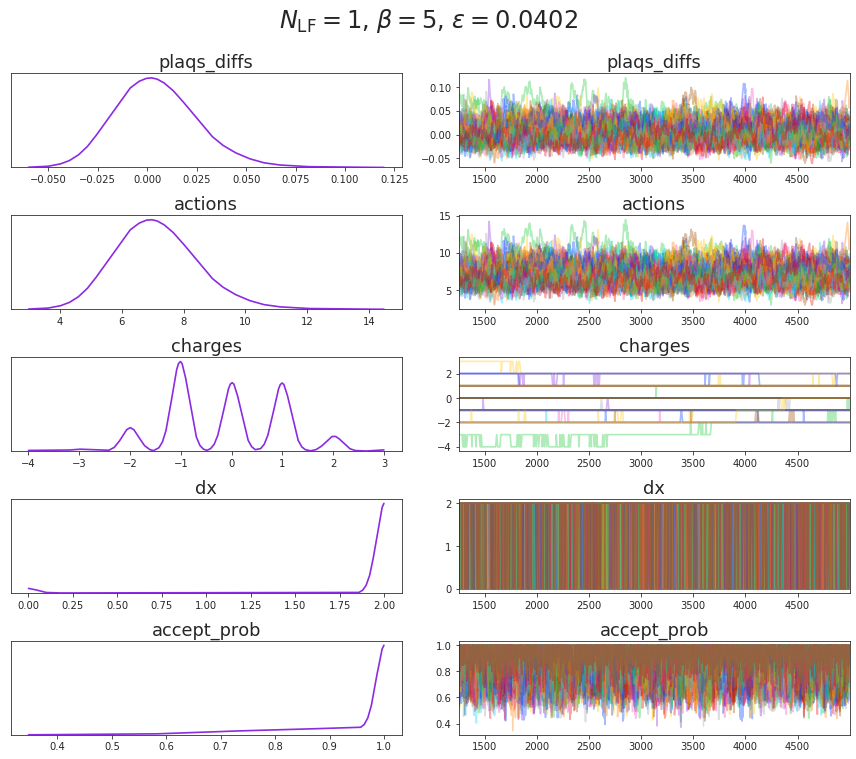

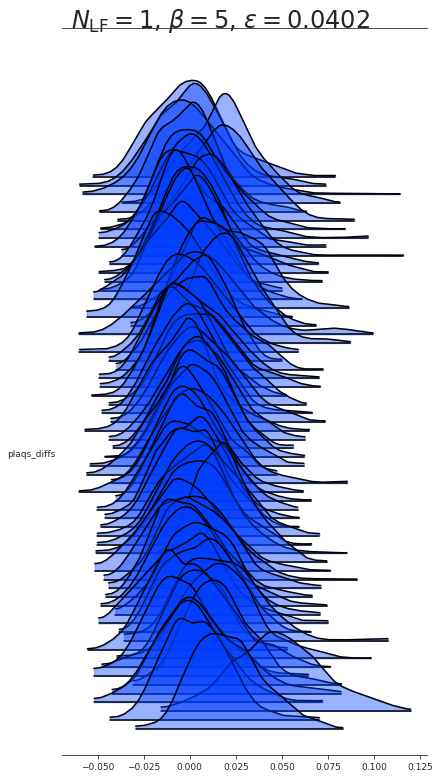

In [28]:
from gauge_inference_np import inference_plots
inference_plots(rd_l2hmc, ed_l2hmc, params, rp_l2hmc)

In [8]:
import arviz as az
import xarray as xr

In [9]:
from lattice.lattice import u1_plaq_exact

def therm_arr(arr, therm_frac=0.25):
    num_steps = arr.shape[0]
    therm_steps = int(therm_frac * num_steps)
    arr = arr[therm_steps:, :]
    steps = np.arange(therm_steps, num_steps)
    return arr, steps
    
rd_dict = {}
for key, val in rd_l2hmc.items():
    if 'mask' in key:
        continue
        
    arr, steps = therm_arr(np.array(val))
    arr = arr.T
    
    if 'plaqs' in key:
        key = 'plaqs_diffs'
        arr = u1_plaq_exact(rp_l2hmc['beta']) - arr
        
    if 'charges' in key:
        arr = np.around(arr)
        
    rd_dict[key] = xr.DataArray(arr,
                                dims=['chain', 'draw'],
                                coords=[np.arange(arr.shape[0]), steps])

In [11]:
ds_l2hmc = xr.Dataset(rd_dict)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f62215181d0>], dtype=object)

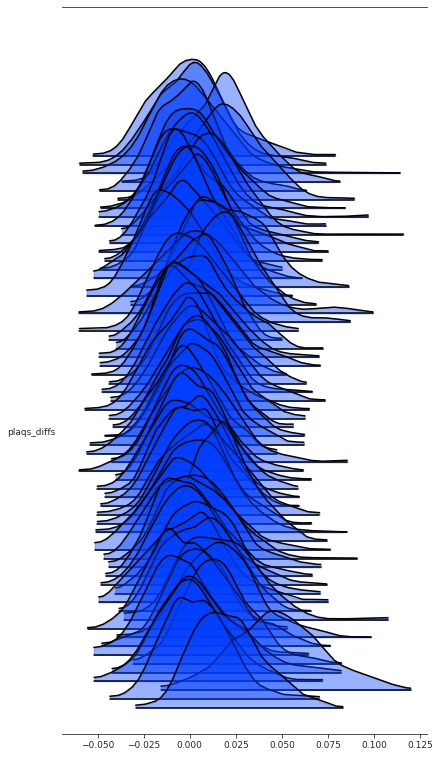

In [23]:
az.plot_forest(ds_l2hmc, kind='ridgeplot', var_names=['plaqs_diffs'], ridgeplot_alpha=0.4, ridgeplot_overlap=0.1, combined=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f621d3ac518>], dtype=object)

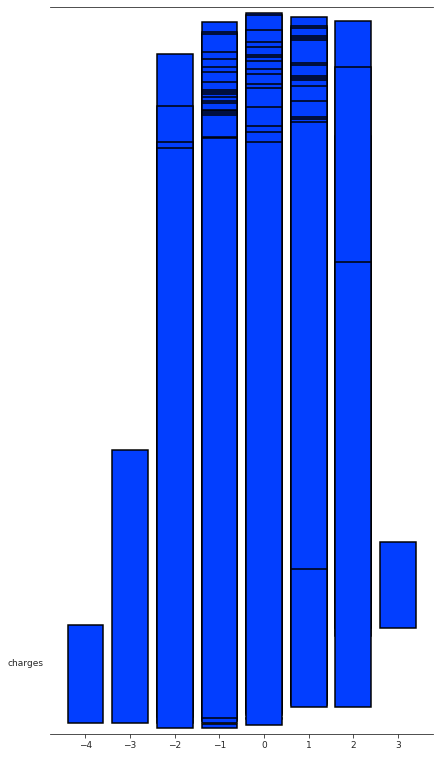

In [26]:
az.plot_forest(ds_l2hmc, kind='ridgeplot', var_names=['charges'], combined=False)

In [55]:
ds_l2hmc = xr.Dataset(rd_dict)

In [60]:
sns.set_palette('bright')

In [62]:
from gauge_inference_np import _get_title

In [65]:
%matplotlib notebook

In [71]:
%matplotlib inline

/home/foremans/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/foremans/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/foremans/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/foremans/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't

Text(0.5, 1.05, '$N_{\\mathrm{LF}} = $1, $\\beta = $5, $\\varepsilon = $0.0402')

<Figure size 432x288 with 0 Axes>

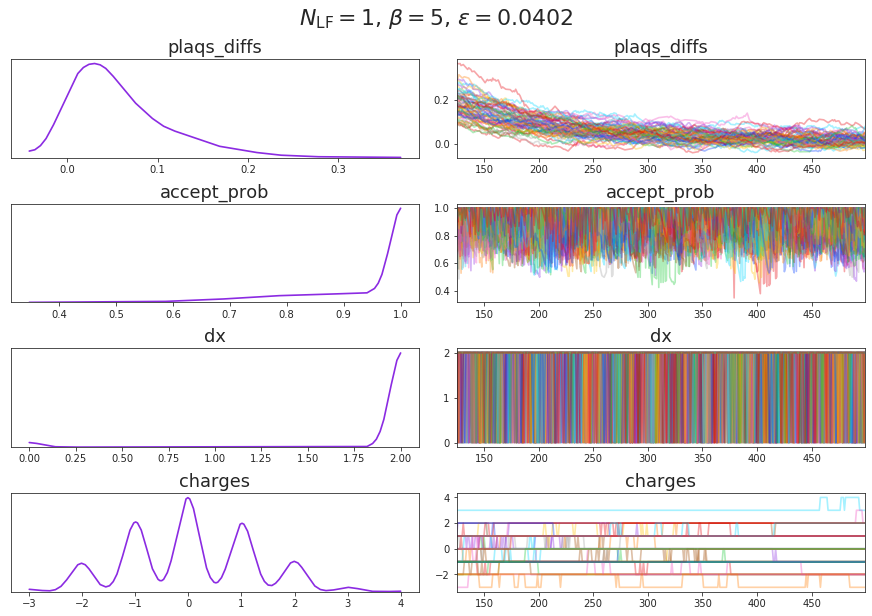

In [76]:
plt.tight_layout()
axes = az.plot_trace(ds_l2hmc, combined=True, var_names=['plaqs_diffs', 'accept_prob', 'dx', 'charges'])
title_str = _get_title(params, rp_l2hmc)
#axes[0][0].set_title(title_str, fontsize='x-large')
fig = plt.gcf()
fig.suptitle(_get_title(params, rp_l2hmc), fontsize='22', y=1.05)

In [70]:
plt.tight_layout()

/home/foremans/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  """Entry point for launching an IPython kernel.


In [ ]:
az.plot_forest(ds_l2hmc, v)

In [45]:
steps.shape

(375,)

In [46]:
ds_dict = {}
for key, val in rd_dict.items():
    ds_dict[key] = xr.DataArray(val, coords=[np.arange(val.shape[0]), steps], dims=['chain', 'draw'])

In [47]:
ds_l2hmc = xr.Dataset(ds_dict)

/home/foremans/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/foremans/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/foremans/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/foremans/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2c2f09e10>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff2c43ce630>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2c2e51940>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff2c2e42c50>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2c2c302b0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff2c2ccb978>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2c2cc35c0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff2c13da908>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2c13fcbe0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff2c2fb7240>]], dtype=object)

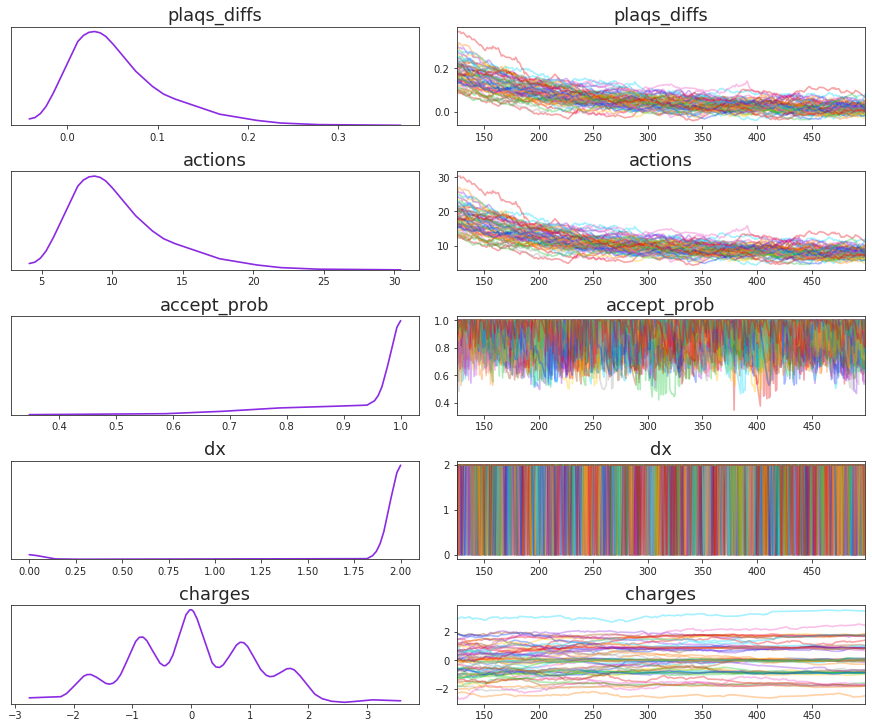

In [48]:
az.plot_trace(ds_l2hmc, var_names=['plaqs_diffs', 'actions', 'accept_prob', 'dx', 'charges'], compact=True, combined=True)

/home/foremans/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2d1180cf8>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff37cc7cb70>]], dtype=object)

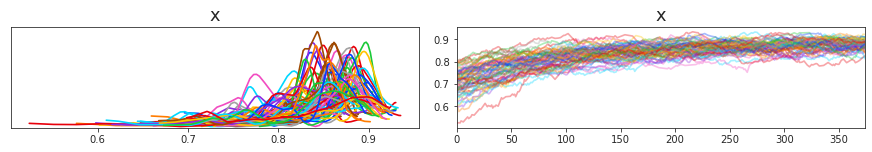

In [9]:
az.plot_trace(rd_dict['plaqs'])

In [36]:
for key, val in ds_dict.items():
    az.plot_trace(ds_l2hmc)
    
    i

TypeError: descriptor '_data' for 'Variable' objects doesn't apply to 'IndexVariable' object

In [33]:
%debug

> /home/foremans/.local/lib/python3.6/site-packages/xarray/core/variable.py(1967)func()
   1965         @functools.wraps(f)
   1966         def func(self, other):
-> 1967             if isinstance(other, (xr.DataArray, xr.Dataset)):
   1968                 return NotImplemented
   1969             self_data, other_data, dims = _broadcast_compat_data(self, other)

ipdb> xr.DataArray
*** AttributeError: module 'xarray' has no attribute 'DataArray'
ipdb> xr.Dataset
*** AttributeError: module 'xarray' has no attribute 'Dataset'
ipdb> import xarray as xr
ipdb> xr.DataArray
<class 'xarray.core.dataarray.DataArray'>
ipdb> q


In [29]:
ds_dict.keys()

dict_keys(['plaqs', 'actions', 'charges', 'dxf', 'dxb', 'dx', 'accept_prob', 'px'])

/home/foremans/.local/lib/python3.6/site-packages/arviz/data/base.py:145: SyntaxWarning: More chains (375) than draws (64). Passed array should have shape (chains, draws, *shape)
  SyntaxWarning,
/home/foremans/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


AttributeError: module 'xarray' has no attribute 'DataArray'

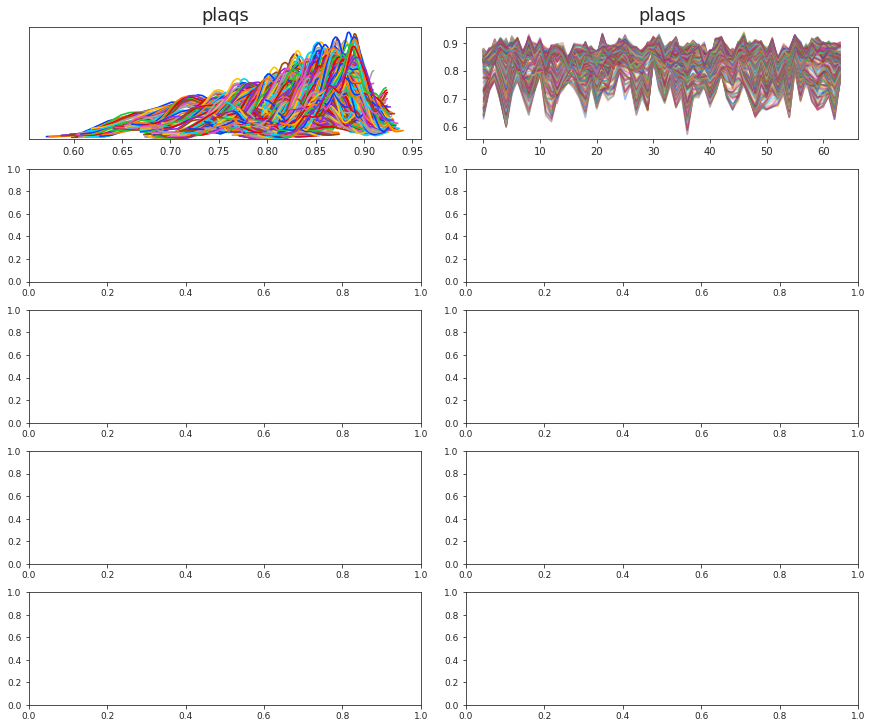

In [31]:
az.plot_trace(rd_dict, var_names=['plaqs', 'accept_prob', 'actions', 'charges', 'dx'])

In [20]:
ds_l2hmc = xr.Dataset(ds_dict)

In [24]:
ds_l2hmc

<xarray.Dataset>
Dimensions:      (sample: 64, step: 375)
Dimensions without coordinates: sample, step
Data variables:
    plaqs        (step, sample) float64 0.6276 0.7282 0.7642 ... 0.8788 0.8876
    actions      (step, sample) float64 23.84 17.4 15.09 ... 7.688 7.759 7.191
    charges      (step, sample) float64 -2.168 0.1315 -1.419 ... 0.03264 0.05215
    dxf          (step, sample) float64 0.0 1.999 1.999 1.999 ... 0.0 0.0 0.0
    dxb          (step, sample) float64 1.999 0.0 0.0 0.0 ... 1.999 1.999 1.999
    dx           (step, sample) float64 1.999 1.999 1.999 ... 1.999 1.999 1.999
    accept_prob  (step, sample) float64 1.0 1.0 1.0 0.6821 ... 1.0 0.7088 0.7222
    px           (step, sample) float64 1.0 1.0 1.0 0.6821 ... 1.0 0.7088 0.7222

/home/foremans/.local/lib/python3.6/site-packages/arviz/data/base.py:145: SyntaxWarning: More chains (375) than draws (64). Passed array should have shape (chains, draws, *shape)
  SyntaxWarning,
/home/foremans/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


AttributeError: module 'xarray' has no attribute 'DataArray'

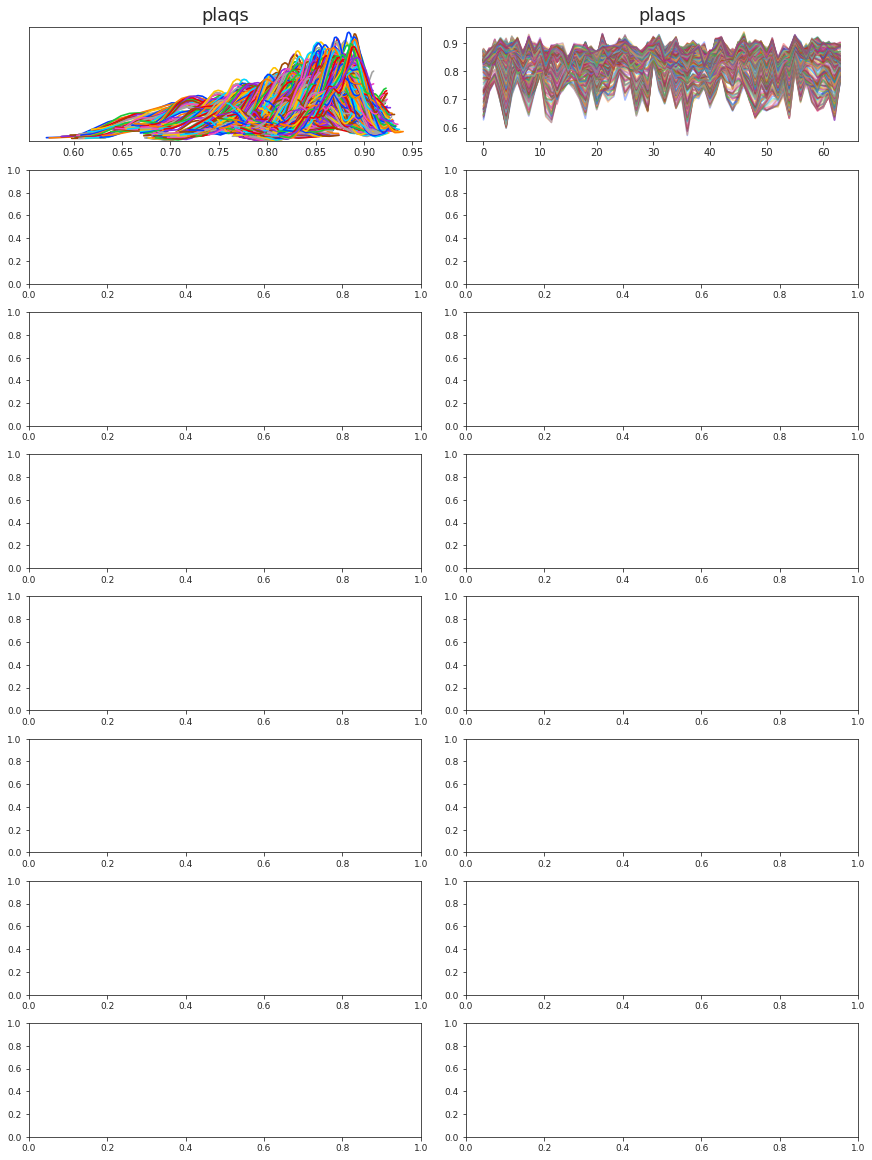

In [26]:
az.plot_trace(ds_dict)

In [15]:
#foo = xr.DataArray(data, coords=[times, locs], dims=['time', 'space'])
plaqs_da = xr.DataArray(rd_dict['plaqs'])


In [12]:
df_l2hmc = pd.DataFrame(rd_dict, )

ValueError: If using all scalar values, you must pass an index

In [10]:
import arviz as az

In [ ]:
az.plot_trace(df_l2hmc, )

In [5]:
for key, val in rd_l2hmc.items():
    
    
    print(f'{key}: {np.array(val).shape}')

plaqs: (500, 64)
actions: (500, 64)
charges: (500, 64)
dxf: (500, 64)
dxb: (500, 64)
dx: (500, 64)
accept_prob: (500, 64)
px: (500, 64)
mask_f: (0,)
mask_b: (0,)


init: rand

Existing run found! Creating new run_dir...
Creating directory: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/runs_np/steps500_beta50_eps00402_nw111111_rand_0551
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
     0/500      0.02816     0.8635       1.686      0.9994      0.9994       1.157      0.7458   
     1/500      0.0262      0.8417       1.78        1.062      0.9369       1.054      0.7364   
     2/500      0.02529     0.8395       1.624      0.9994      0.9994       1.087       0.73    
     3/500      0.02545     0.8489       1.562      0.9994      0.9994       1.123      0.7228   
     4/500      0.02435     0.8796       1.718       1.156      0.8432       1.17       0.7155   
     5/500 

    86/500      0.02375     0.8934       1.686      0.9993      0.9994       1.034      0.2768   
    87/500      0.02411     0.8957       1.718      0.9369       1.062       1.044      0.2728   
    88/500      0.02433      0.905       1.874       1.156      0.8432       1.026       0.269   
    89/500      0.02423     0.9108       1.905       1.124      0.8744       1.035      0.2663   
    90/500      0.02417      0.91        1.749      0.8432       1.156       1.054      0.2624   
    91/500      0.02408      0.903       1.718       1.031      0.9682       1.032      0.2598   
    92/500      0.02425     0.9133       1.78        1.187       0.812       1.044      0.2562   
    93/500      0.02432     0.9095       1.905      0.9681       1.031       1.021      0.2534   
    94/500      0.0246      0.9093       1.905      0.8744       1.124       1.019      0.2496   
    95/500      0.02433     0.8964       1.843      0.9994      0.9994       0.989      0.2459   
    96/500      0.02

   174/500      0.02393     0.8964       1.843       0.812       1.187       1.031      0.1043   
   175/500      0.02401     0.9152       1.655       0.812       1.187       1.096      0.1044   
   176/500      0.02378     0.8959       1.843      0.9682       1.031       1.017      0.1029   
   177/500      0.02374     0.9022       1.78       0.7495       1.249       1.046      0.1018   
   178/500      0.02391     0.9003       1.78        1.031      0.9682       1.049      0.1003   
   179/500      0.0238      0.9384       1.905      0.9994      0.9994       1.094      0.09985  
   180/500      0.02359     0.9233       1.843       1.031      0.9682       1.072      0.0986   
   181/500      0.02341     0.8903       1.624      0.9994      0.9994      0.9979      0.09681  
   182/500      0.02373     0.9085       1.811      0.8432       1.156       1.02       0.09484  
   183/500      0.02332      0.936       1.936       1.124      0.8745       1.073      0.09526  
   184/500      0.02

   262/500      0.02386     0.8963       1.811      0.8432       1.156      0.9984      0.05111  
   263/500      0.02377     0.9103       1.78       0.9057       1.093       1.021      0.05125  
   264/500      0.02374     0.9321       1.905       1.062      0.9369       1.063      0.05093  
   265/500      0.02356      0.904       1.874       1.062      0.9369       0.983      0.05076  
   266/500      0.02345     0.8956       1.718       1.062      0.9369      0.9961      0.05071  
   267/500      0.02315     0.9174       1.78       0.8744       1.124       1.044      0.05044  
   268/500      0.02335     0.9133       1.843       1.156      0.8432       1.019      0.04968  
   269/500      0.02343     0.8907       1.655      0.8432       1.156       1.005      0.05073  
   270/500      0.02389     0.9159       1.811       1.062      0.9369       1.048      0.05069  
   271/500      0.02361     0.9041       1.874       1.343      0.6558       1.011      0.05007  
   272/500      0.02

   350/500      0.0239      0.9251       1.874      0.5934       1.405       1.035      0.02966  
   351/500      0.02368     0.9063       1.874      0.8433       1.156      0.9873      0.02956  
   352/500      0.02382      0.914       1.843      0.9369       1.062       1.011      0.02851  
   353/500      0.02377     0.9188       1.718       0.812       1.187       1.039      0.02757  
   354/500      0.02384     0.9272       1.843       1.062      0.9369       1.028      0.02642  
   355/500      0.0234       0.908       1.843      0.9682       1.031      0.9827      0.02665  
   356/500      0.02329     0.9175       1.874       1.124      0.8745       1.012      0.02663  
   357/500      0.02327     0.9265       1.78       0.7808       1.218       1.051      0.02666  
   358/500      0.02362     0.9296       1.749       1.156      0.8433       1.052      0.02598  
   359/500      0.02376     0.9173       1.811      0.6871       1.312       1.024      0.02547  
   360/500      0.02

   438/500      0.02366      0.909       1.78       0.8745       1.124       1.013      0.02204  
   439/500      0.02327      0.905       1.874      0.9057       1.093      0.9973      0.02171  
   440/500      0.02318     0.8989       1.811      0.9994      0.9994       1.003      0.02147  
   441/500      0.02307     0.8724       1.749      0.8745       1.124      0.9544      0.02121  
   442/500      0.0233      0.9073       1.811       1.187       0.812       1.041      0.02094  
   443/500      0.02329     0.9211       1.905      0.9994      0.9994       1.04       0.02109  
   444/500      0.02313     0.9132       1.874       0.812       1.187       1.037      0.02136  
   445/500      0.02331     0.9056       1.905       1.156      0.8432       1.006      0.02187  
   446/500      0.02328     0.9196       1.749      0.9994      0.9994       1.049      0.02096  
   447/500      0.02376     0.9094       1.78        1.031      0.9681       1.014      0.02112  
   448/500      0.02

/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/gauge_model_plotter.py:290: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/gauge_model_plotter.py:379: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw111111_rand_0551/plaqs_vs_step.png
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw111111_rand_0551/plaqs_hist.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw111111_rand_0551/actions_hist.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw111111_rand_0551/actions.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw111111_rand_0551/accept_probs_vs_step.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw111111_rand_0551/accept_pr

/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/energy_plotter.py:153: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw111111_rand_0551/steps500_beta50_eps00402_nw111111_rand_0551/energy_plots/np/potential_diffs_hist_single_chain.png.


/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/energy_plotter.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=num_plots, ncols=1)


Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw111111_rand_0551/steps500_beta50_eps00402_nw111111_rand_0551/energy_plots/np/potentials.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw111111_rand_0551/steps500_beta50_eps00402_nw111111_rand_0551/energy_plots/np/potential_hist.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw111111_rand_0551/steps500_beta50_eps00402_nw111111_rand_0551/energy_plots/np/potential_hist_single_chain.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw111111_rand_0551/steps500_beta50_eps00402_nw111111_rand_0551/energy_plots/np/hamiltonian_diffs.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs

    63/500      0.02273     0.9959     0.0008221   0.0004105   0.0004116     1.006      0.3736   
    64/500      0.02241      0.998     0.0008088   0.000405    0.0004038     1.007      0.3693   
    65/500      0.02223     0.9974     0.0007976   0.0004373   0.0003742     1.005      0.3654   
    66/500      0.02238     0.9966     0.0008086   0.0002967   0.0005119     1.005      0.3615   
    67/500      0.02227     0.9976     0.0008103   0.0004455   0.0003648     1.004       0.357   
    68/500      0.02222     0.9977     0.0007995   0.0003987   0.0004007     1.006      0.3536   
    69/500      0.0223      0.9972     0.0008139   0.000452    0.0003735     1.007      0.3497   
    70/500      0.02223     0.9974     0.0008059   0.0003799   0.000426      1.005      0.3463   
    71/500      0.02248     0.9965     0.0008255   0.0003731   0.0004523     1.003      0.3435   
    72/500      0.02233      0.996     0.000808    0.0003739   0.0004341     1.003      0.3397   
    73/500      0.02

   151/500      0.02247     0.9971     0.0008128   0.0004347   0.0003781     1.002       0.159   
   152/500      0.02228     0.9978     0.0007906    0.00043    0.0003606     1.004      0.1555   
   153/500      0.02202     0.9959     0.0007903   0.0004143   0.000376      1.002      0.1543   
   154/500      0.02408     0.9966     0.0008182   0.0003511   0.0004672     1.002      0.1529   
   155/500      0.0225      0.9968     0.0008433   0.0004399   0.0004034     1.004      0.1513   
   156/500      0.02259      0.996     0.0007982   0.0004604   0.0003378     1.001      0.1503   
   157/500      0.02233     0.9962     0.0008046   0.0003474   0.0004668     1.002      0.1491   
   158/500      0.02247     0.9956     0.0008213   0.0004532   0.0003681     1.002      0.1473   
   159/500      0.02301     0.9949     0.0008349   0.0004491   0.0003857       1        0.1456   
   160/500      0.02249     0.9944     0.0007921   0.0005453   0.0002565    0.9992       0.145   
   161/500      0.02

   232/500      0.02224     0.9961     0.0008139   0.0004007   0.0004133     1.002      0.07979  
   233/500      0.02267     0.9956     0.0008143   0.000453    0.0003613     1.002      0.07909  
   234/500      0.02409      0.995     0.0008079   0.0003393   0.0004686       1        0.07908  
   235/500      0.02402     0.9941     0.0008095   0.0003982   0.0004114    0.9993      0.07877  
   236/500      0.02213     0.9946     0.0008025   0.000436    0.0003794       1        0.07811  
   237/500      0.02215     0.9955     0.000818    0.0003653   0.0004527     1.002      0.07661  
   238/500      0.0222       0.995     0.0008175   0.0004595   0.000358     0.9989      0.07688  
   239/500      0.02221     0.9944     0.0007885   0.0004017   0.0003977     1.001      0.07595  
   240/500      0.02271     0.9955     0.0008131   0.0004364   0.0003767     1.003      0.07476  
   241/500      0.02263     0.9946     0.0007827   0.0004166   0.0003661    0.9999      0.07448  
   242/500      0.02

   315/500      0.02201     0.9954     0.000798    0.000482    0.000316      1.001      0.04262  
   316/500      0.02202     0.9944     0.0008232   0.0003315   0.0004917     1.001      0.04222  
   317/500      0.02228     0.9946     0.0008064   0.0003414   0.000465     0.9996      0.04215  
   318/500      0.02208     0.9944     0.0008145   0.0004745    0.00034     0.9991      0.04227  
   319/500      0.02205     0.9951     0.0008173   0.0003696   0.0004476    0.9996      0.04244  
   320/500      0.02207     0.9945     0.0008038   0.0004193   0.000395     0.9992      0.04264  
   321/500       0.022      0.9952     0.000794    0.0004426   0.000366     0.9995      0.04228  
   322/500      0.02266     0.9947     0.0008391   0.0004495   0.0003896       1        0.04216  
   323/500      0.02275     0.9944     0.0008018   0.0004063   0.0003955     1.001      0.04173  
   324/500      0.02435     0.9952     0.0008079   0.0003796   0.0004403     1.001      0.04135  
   325/500      0.02

   399/500      0.02245     0.9956     0.0008069   0.0004392   0.0003677       1        0.02656  
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
   400/500      0.0225      0.9941     0.0007964   0.0004572   0.000353     0.9989      0.0268   
   401/500      0.02236     0.9946     0.000818    0.0004902   0.0003277       1         0.027   
   402/500      0.02195     0.9946     0.0007754   0.000409    0.0003931    0.9995      0.0273   
   403/500      0.02368      0.995     0.0008006   0.000351    0.0004496    0.9996      0.02759  
   404/500      0.02231     0.9952     0.0008174   0.0004249   0.0003926     1.001      0.02688  
   405/500      0.02205     0.9938      0.00079    0.000361    0.000429     0.9992      0.02665  
   406/500      0.02

   483/500      0.02232     0.9949     0.000807    0.0004748   0.0003322    0.9988      0.01471  
   484/500      0.02254     0.9943     0.0007865   0.0003788   0.0004194    0.9974      0.01539  
   485/500      0.0241      0.9924     0.0008217   0.0003753   0.0004464    0.9968      0.01621  
   486/500      0.02231     0.9953     0.0008147   0.0005113   0.0003034     1.002      0.01598  
   487/500      0.02201     0.9932     0.0007948   0.0004754   0.0003193    0.9975      0.01666  
   488/500      0.02203     0.9956     0.0007819   0.0003319   0.0004499     1.001       0.016   
   489/500      0.0221      0.9956     0.0008248    0.00039    0.0004348     1.001      0.01588  
   490/500      0.02197     0.9944     0.0008292   0.000453    0.0003762       1        0.01546  
   491/500      0.02192     0.9956     0.0008026   0.0003649   0.0004483     1.001      0.01542  
   492/500      0.02208     0.9951     0.0007943   0.000439    0.0003654     1.001      0.01502  
   493/500      0.02

/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/gauge_model_plotter.py:254: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  'hspace': 0.175}
/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/gauge_model_plotter.py:290: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/gauge_model_plotter.py:379: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/gauge_model_plotter.py:309: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interf

Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/plaqs_hist.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/actions_hist.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/actions.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/accept_probs_vs_step.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/accept_probs_vs_step_hist.png.


/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/gauge_model_plotter.py:568: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots()
/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/gauge_model_plotter.py:418: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Saving plot to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/top_charge_histogram.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/plaqs_diffs_vs_step.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/plaqs_hist.png.


/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/plot_observables.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=N, ncols=N, figsize=figsize)


Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/charges_grid.png.


/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/plot_observables.py:80: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=N, ncols=N, figsize=figsize)


Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/chargs_autocorr_grid.png.


/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/gauge_inference_np.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Creating directory: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/steps500_beta50_eps00402_nw000000_rand_0552/energy_plots/np


/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/energy_plotter.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=num_plots, ncols=1)


Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/steps500_beta50_eps00402_nw000000_rand_0552/energy_plots/np/kinetic_diffs.png.


/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/energy_plotter.py:153: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/steps500_beta50_eps00402_nw000000_rand_0552/energy_plots/np/kinetic_diffs_hist.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/steps500_beta50_eps00402_nw000000_rand_0552/energy_plots/np/kinetic_diffs_hist_single_chain.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/steps500_beta50_eps00402_nw000000_rand_0552/energy_plots/np/kinetics.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/figures_np/steps500_beta50_eps00402_nw000000_rand_0552/steps500_beta50_eps00402_nw000000_rand_0552/energy_plots/np/kinetic_hist.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_log

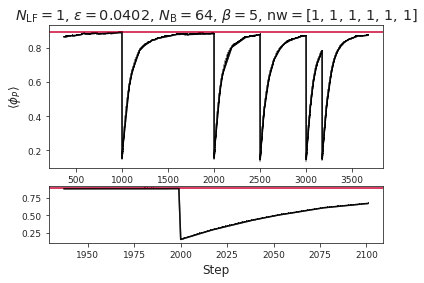

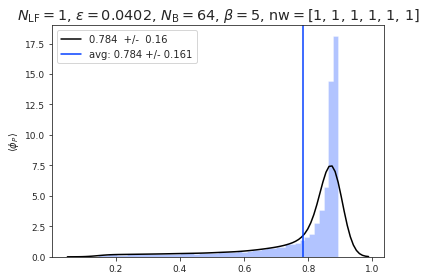

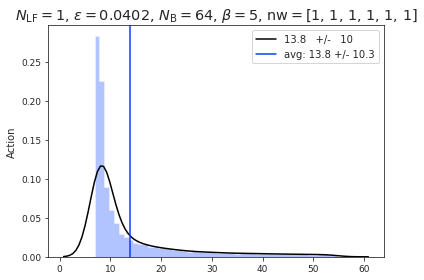

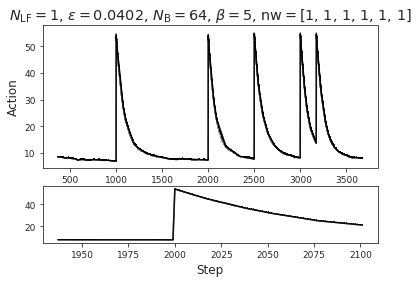

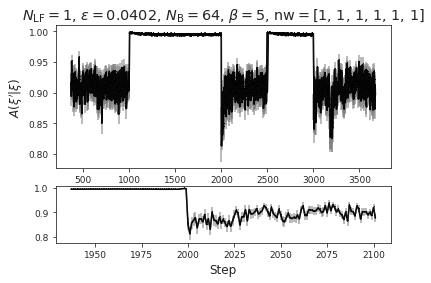

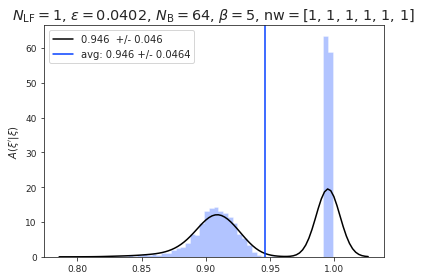

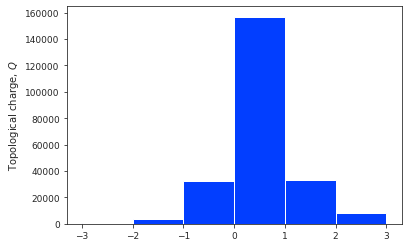

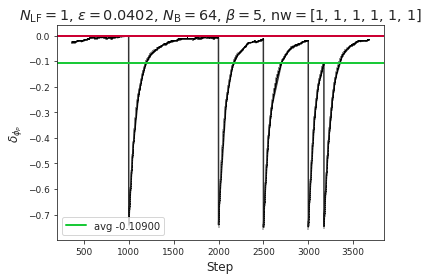

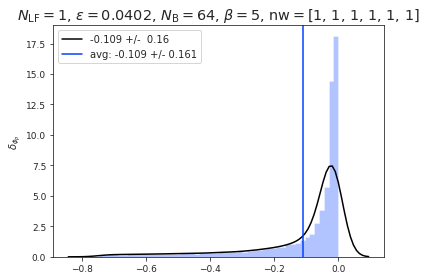

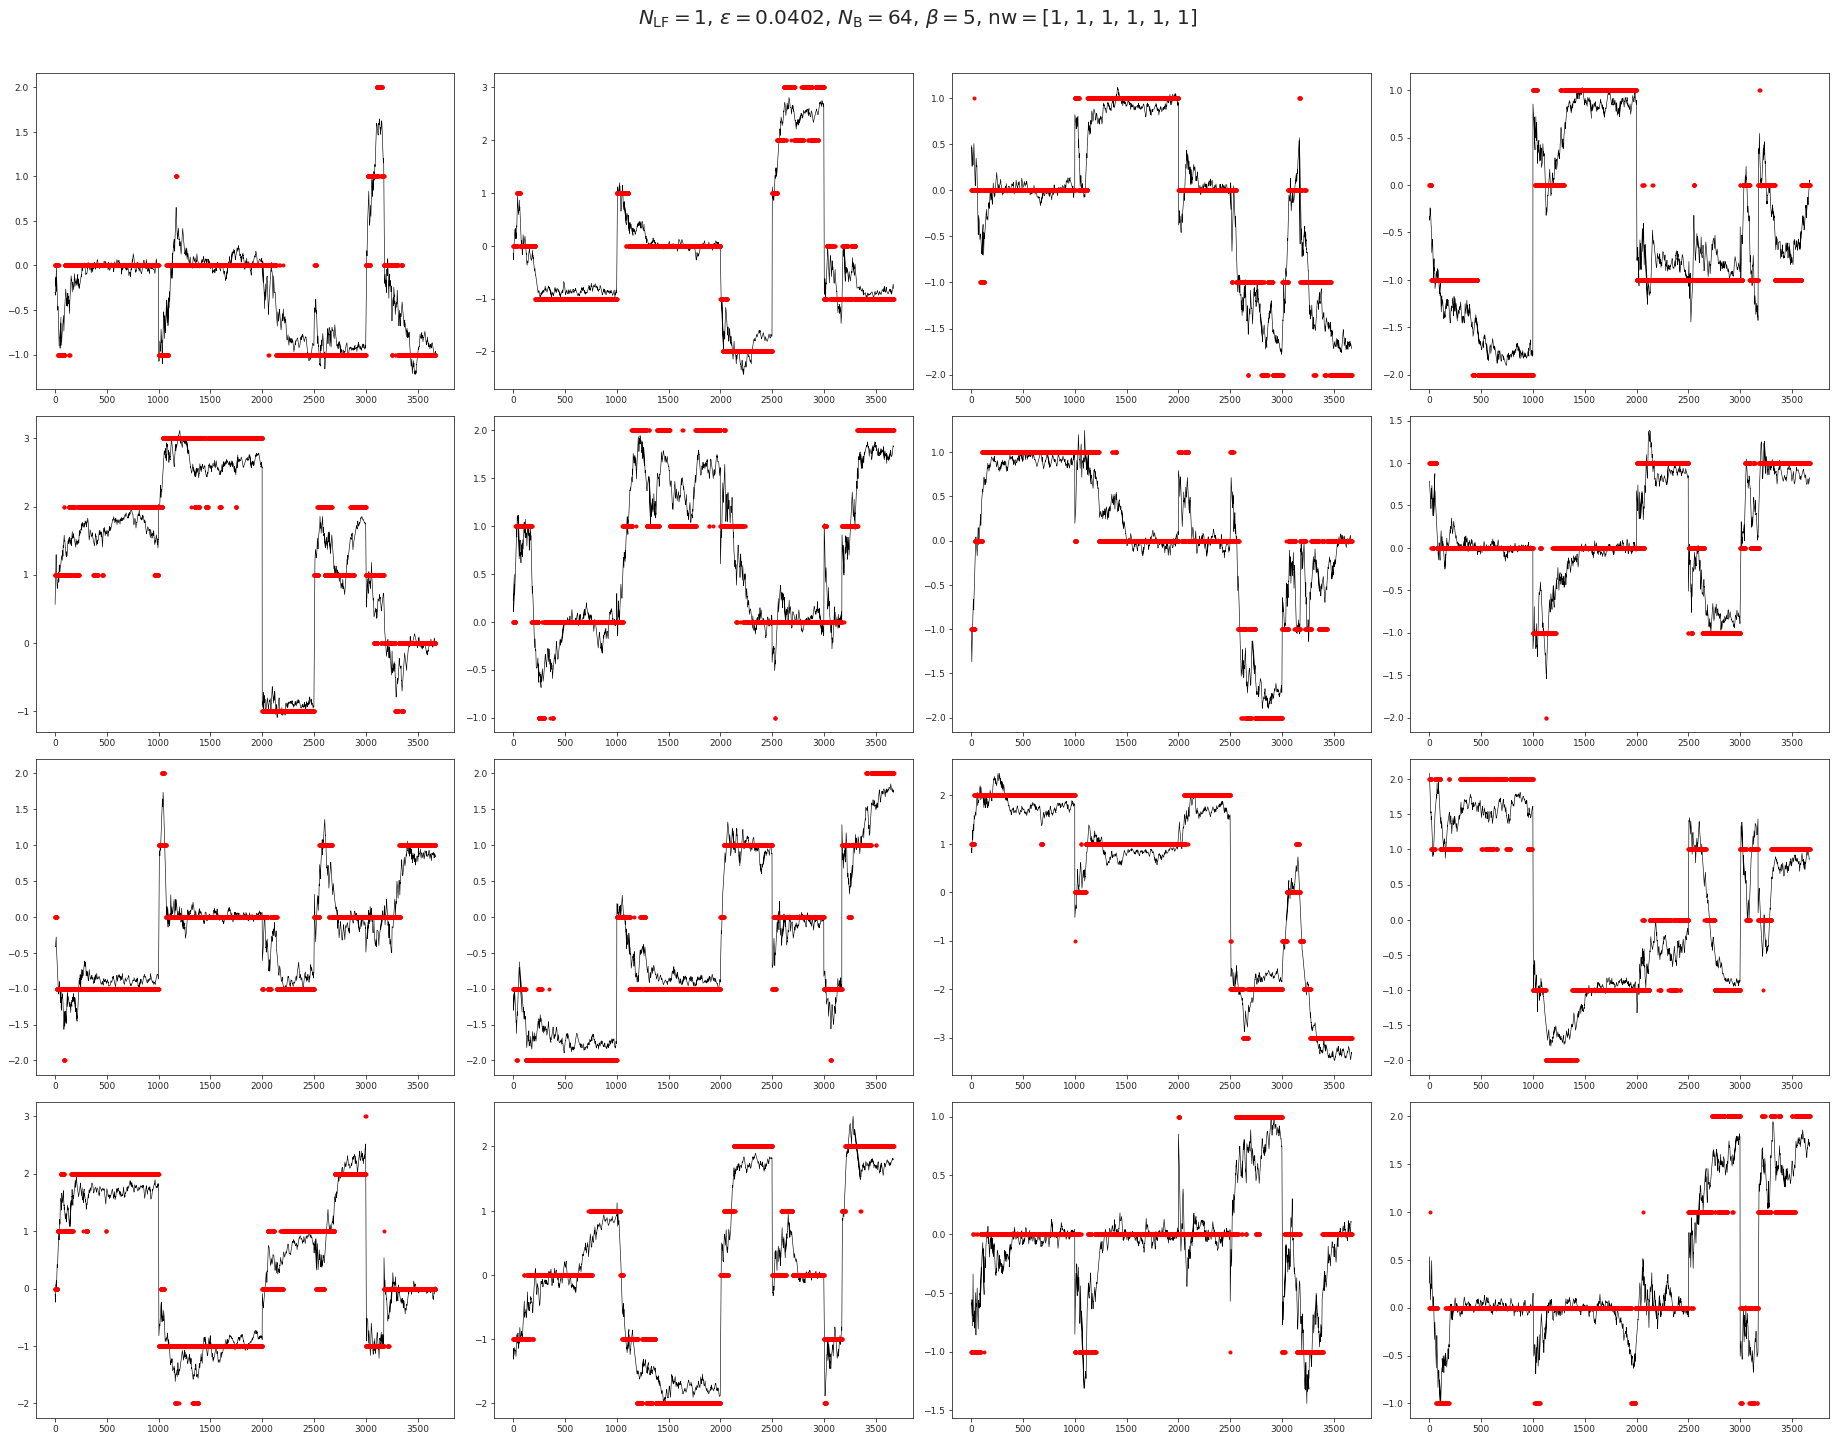

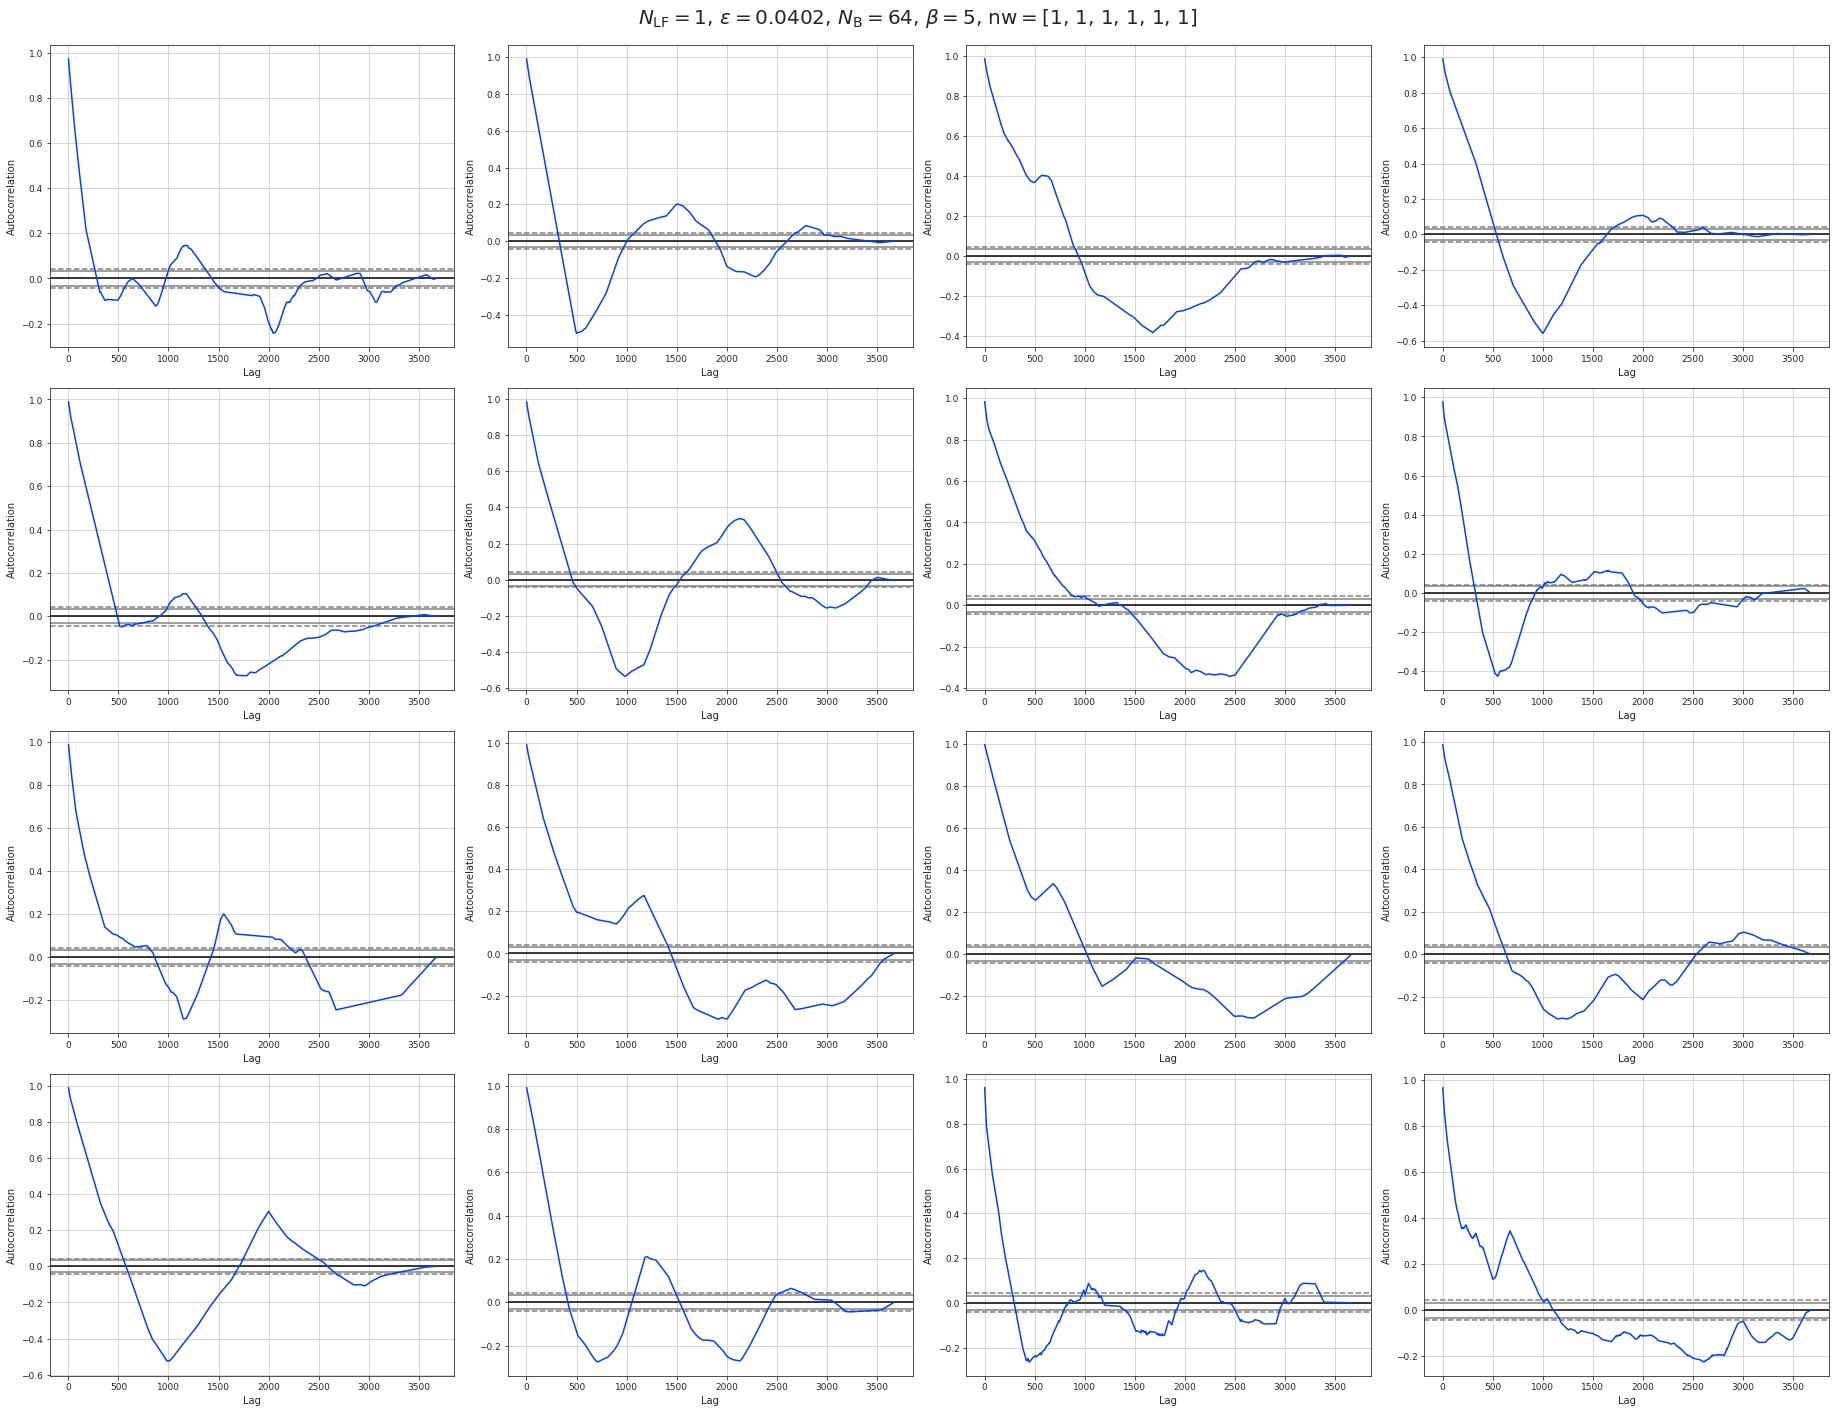

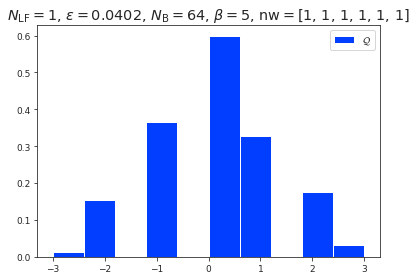

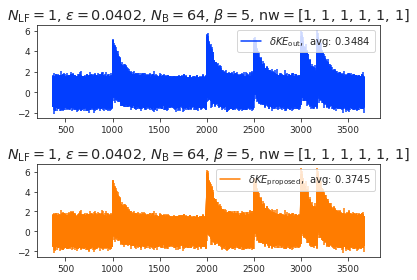

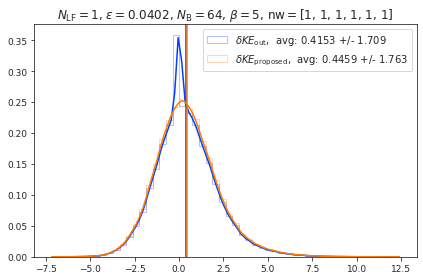

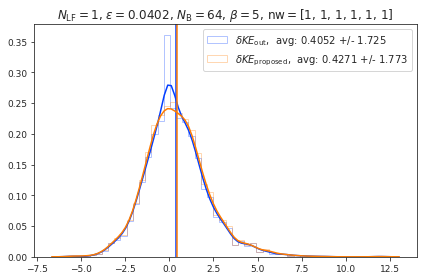

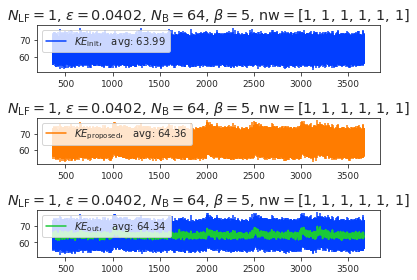

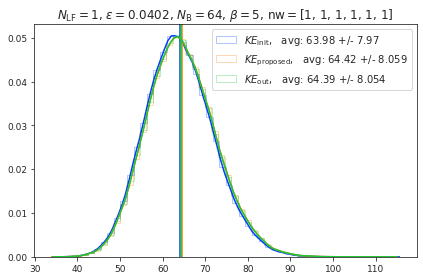

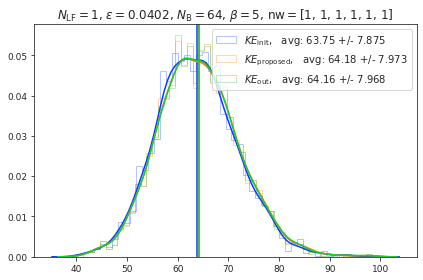

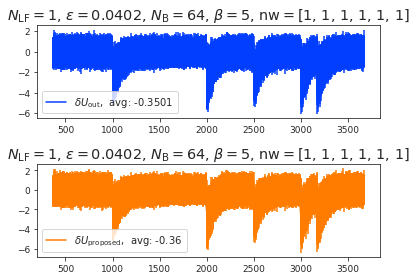

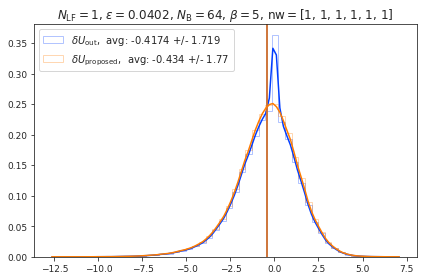

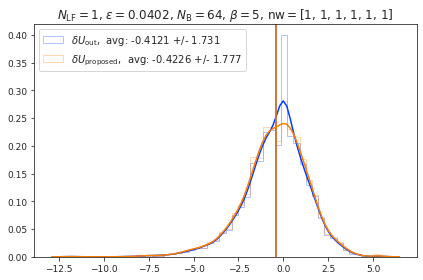

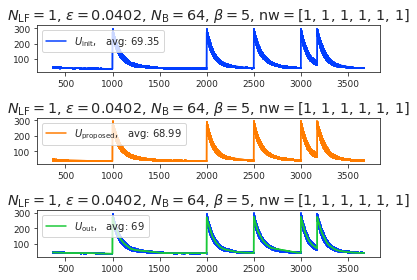

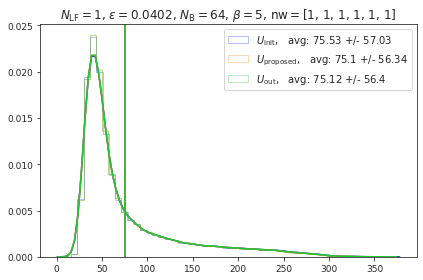

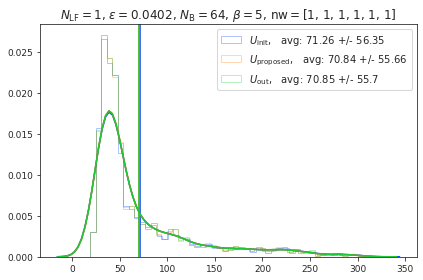

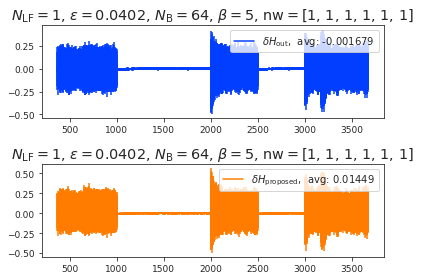

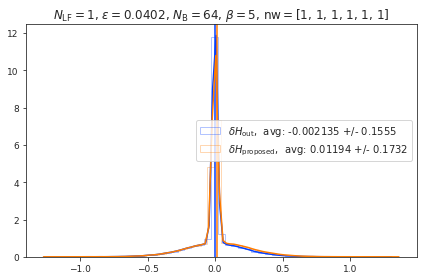

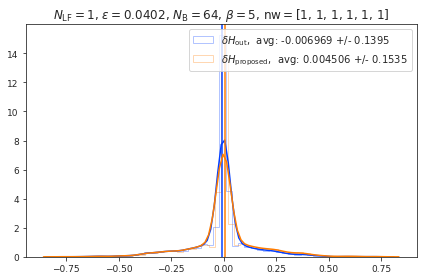

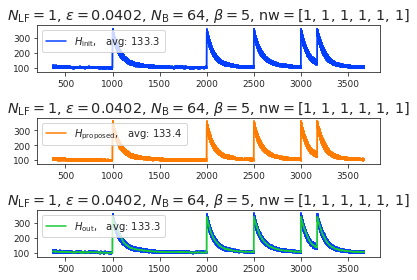

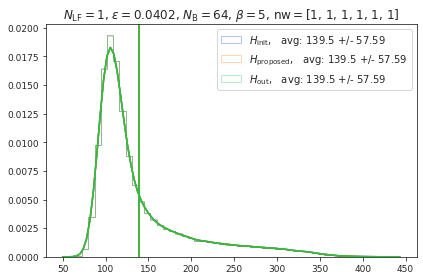

<Figure size 432x288 with 0 Axes>

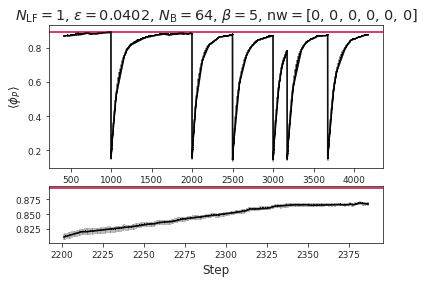

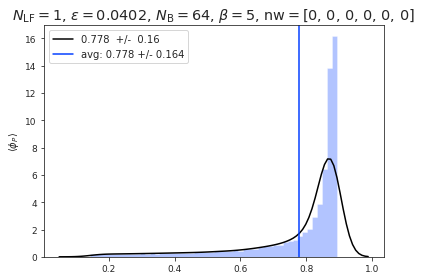

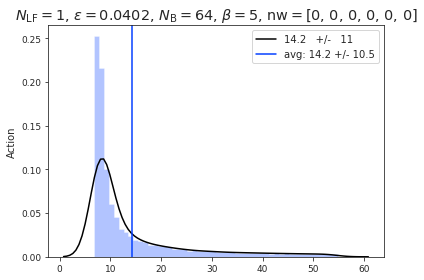

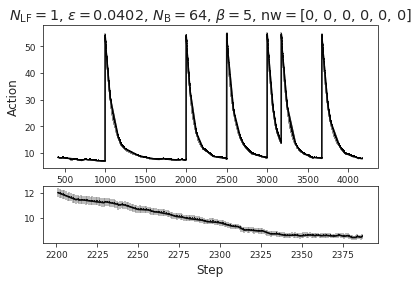

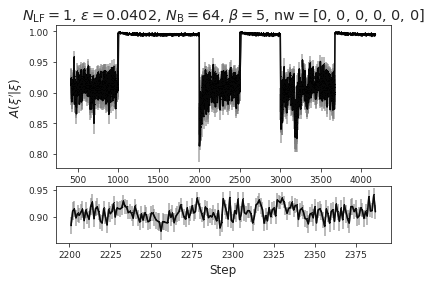

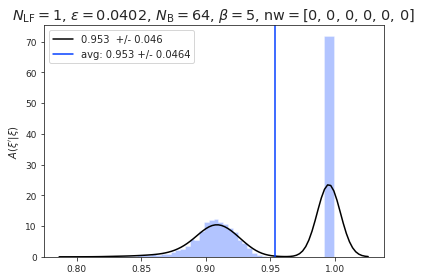

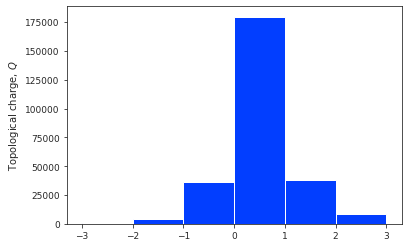

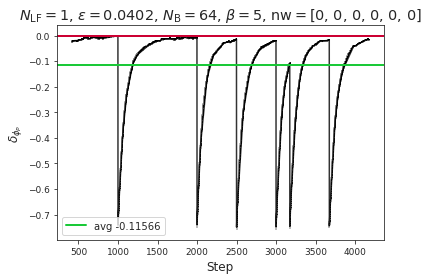

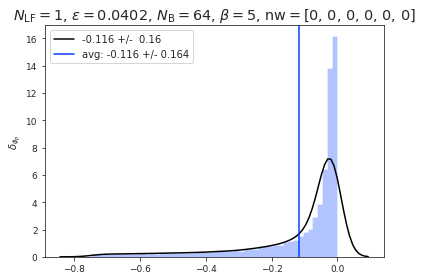

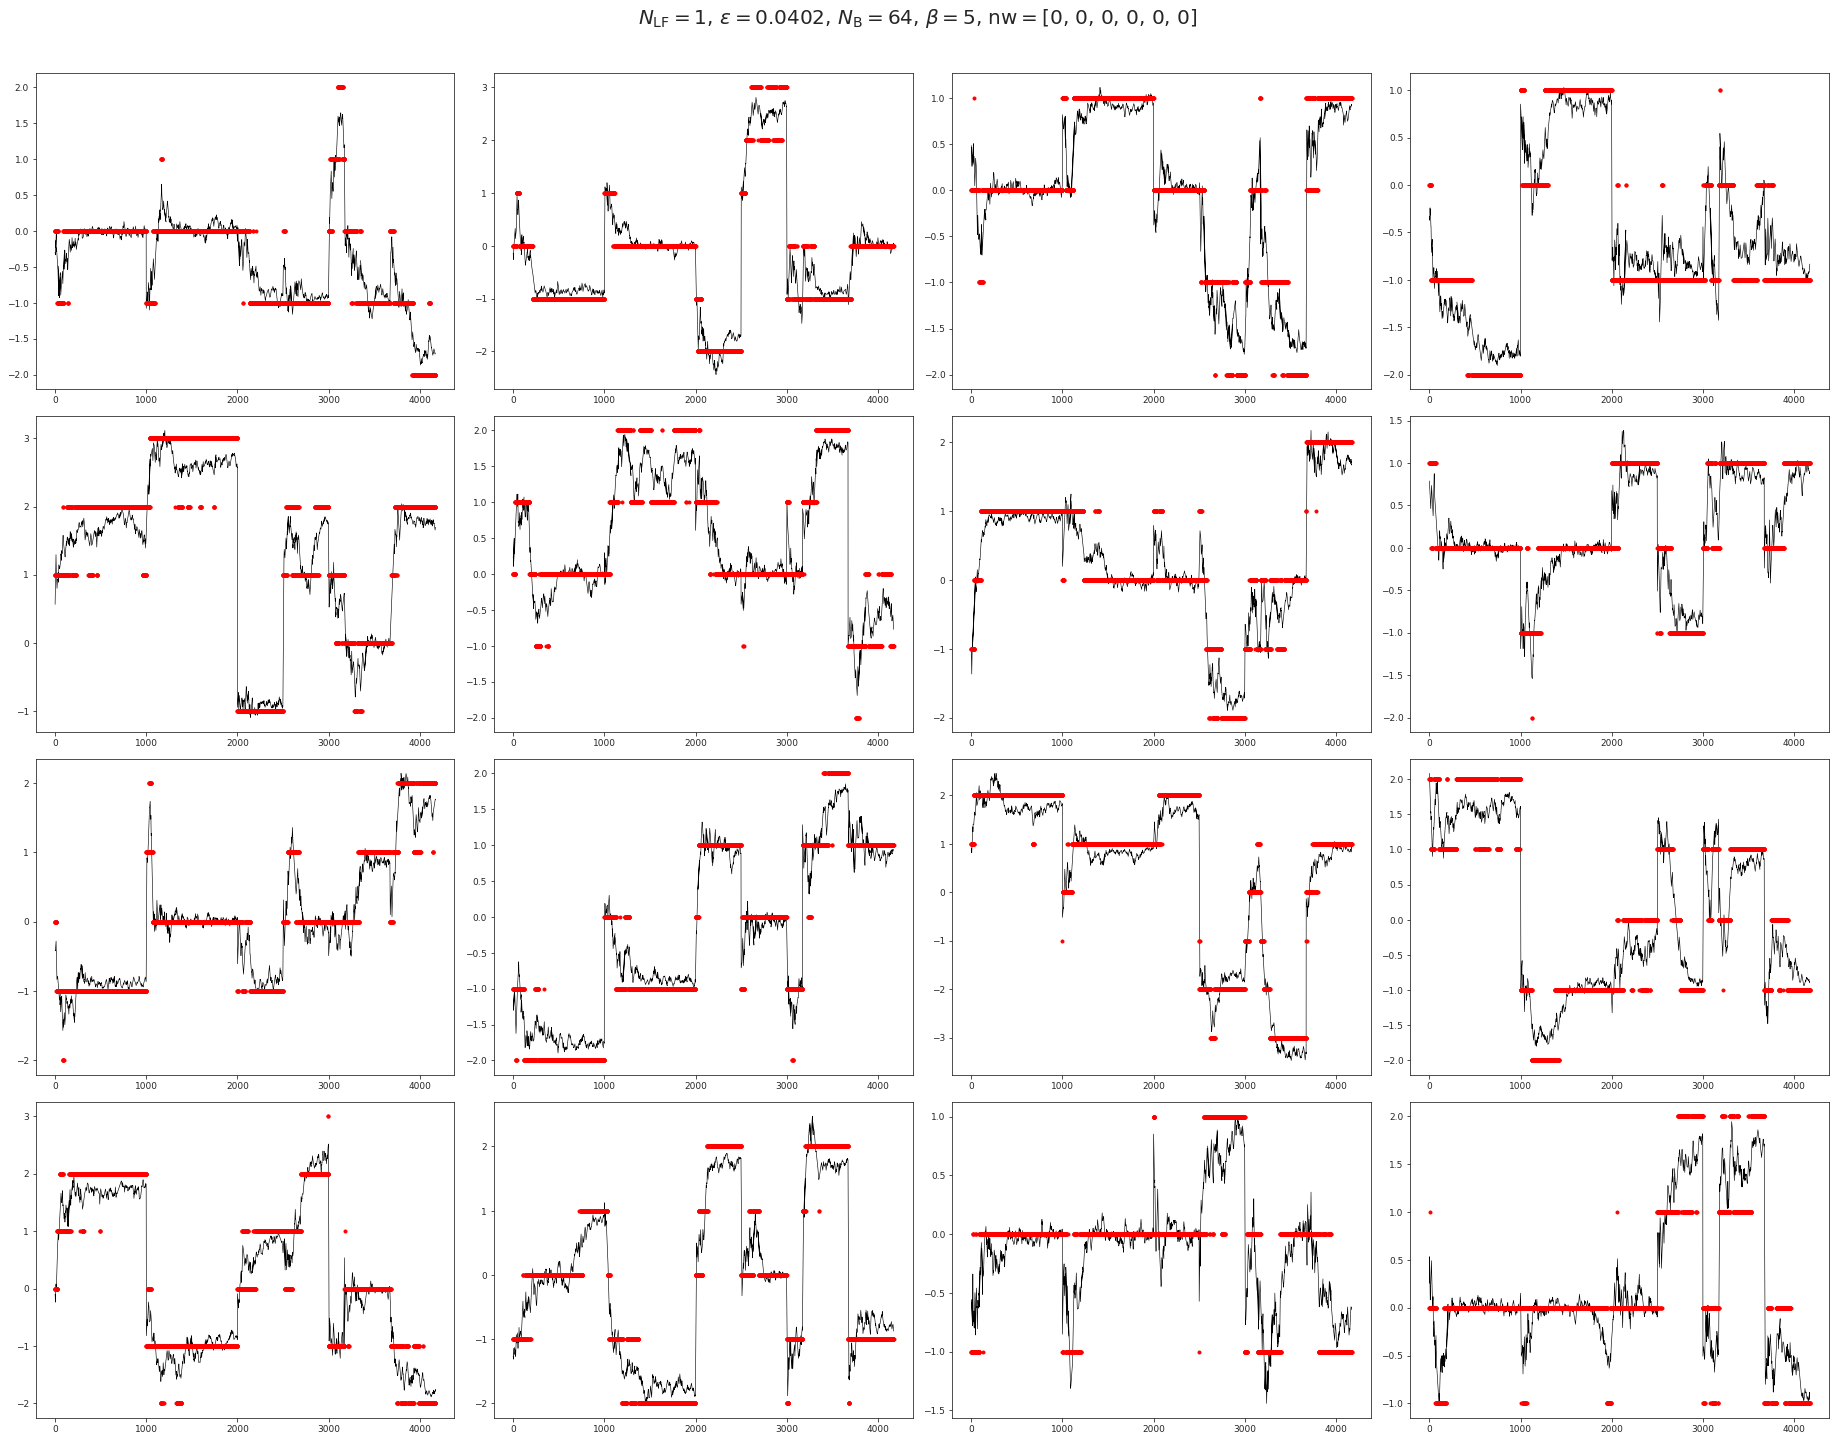

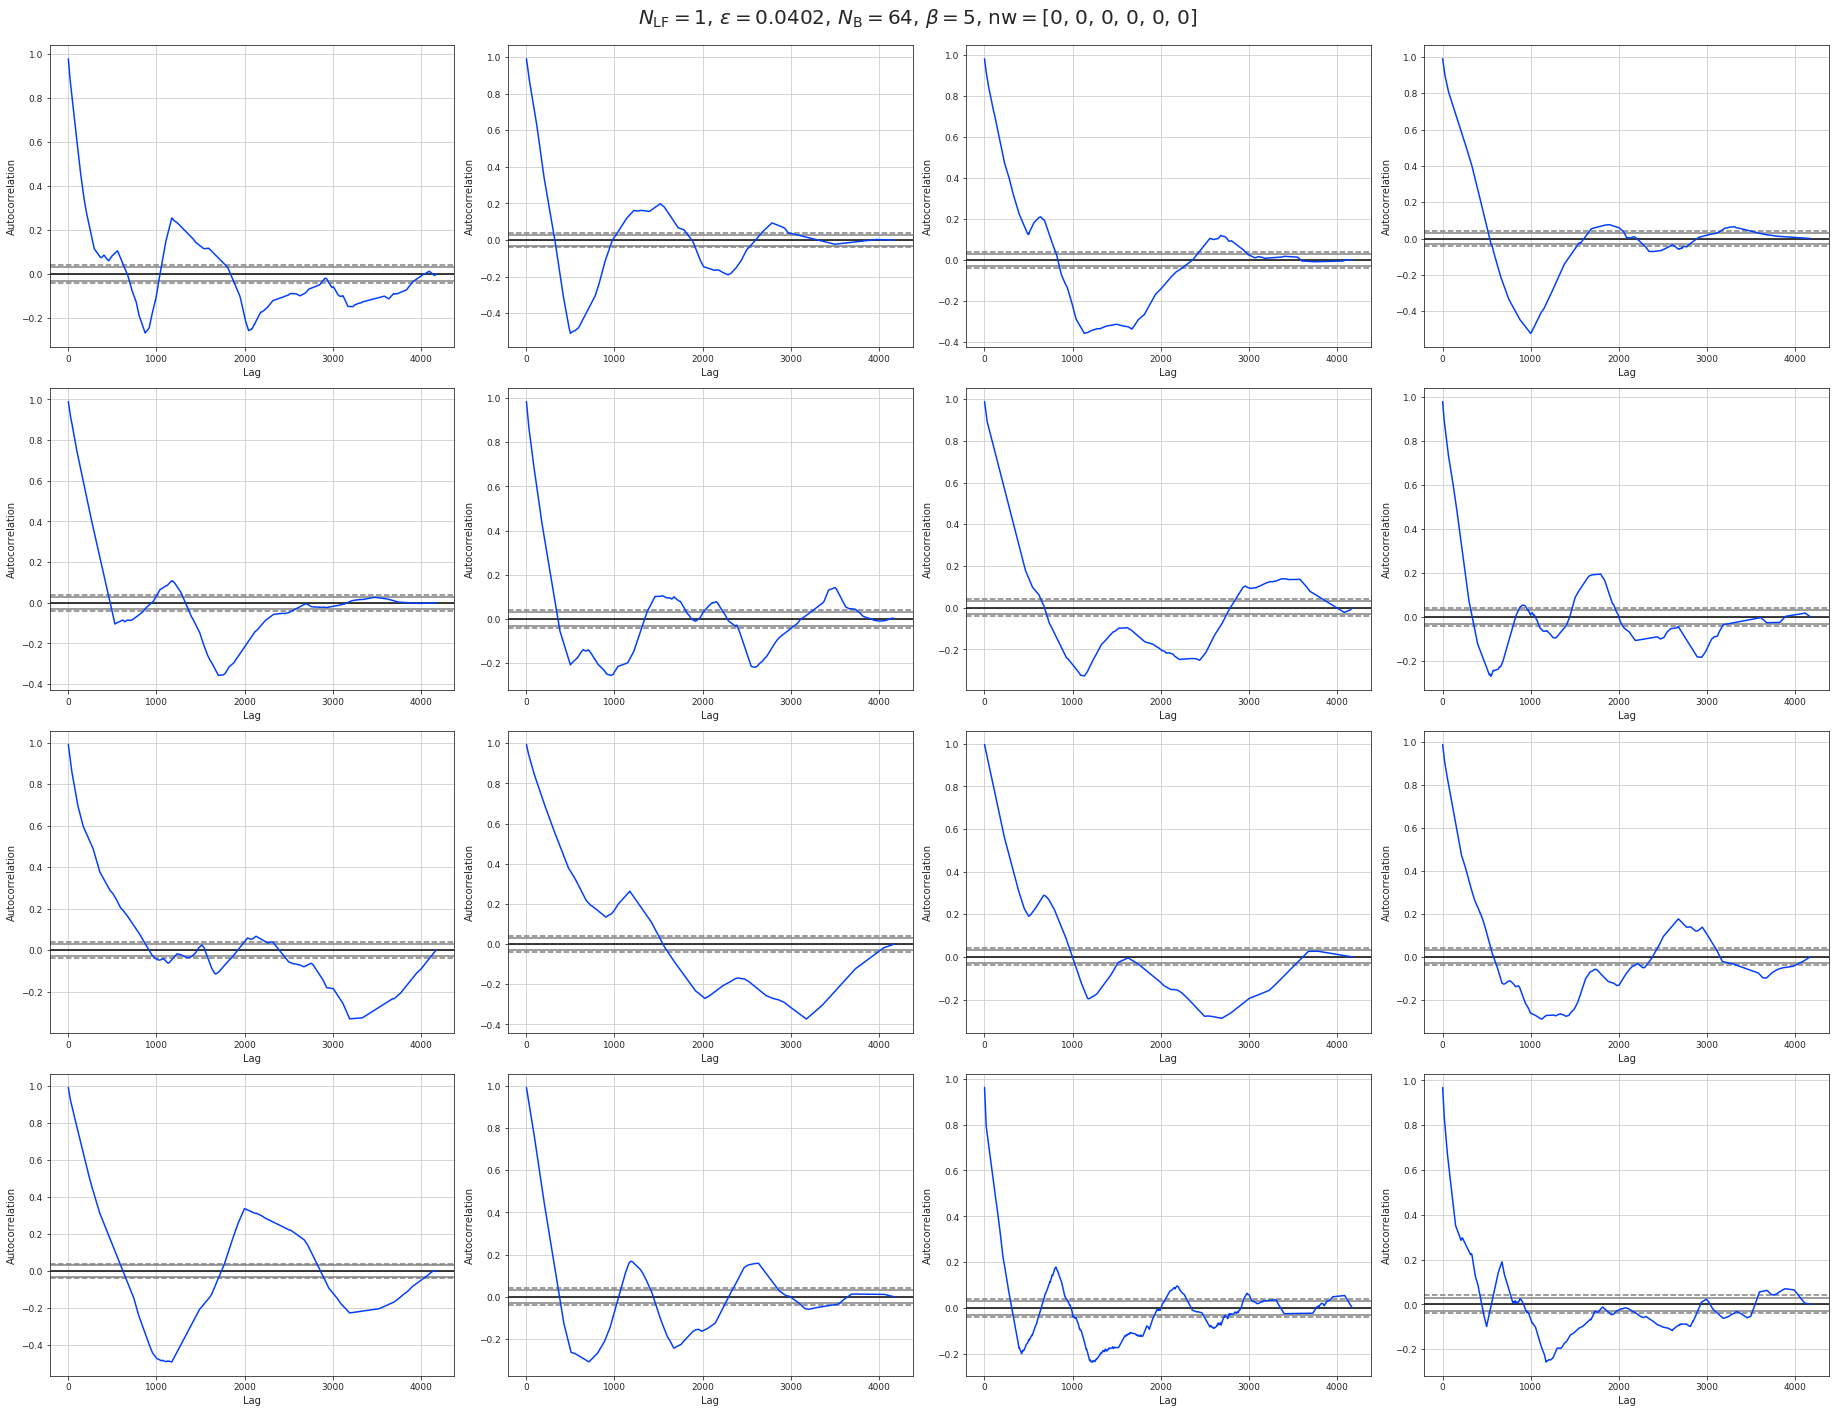

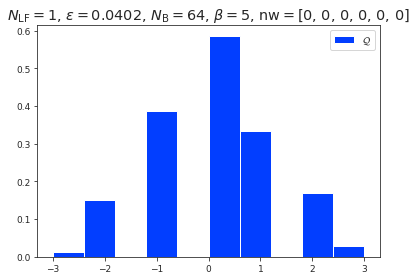

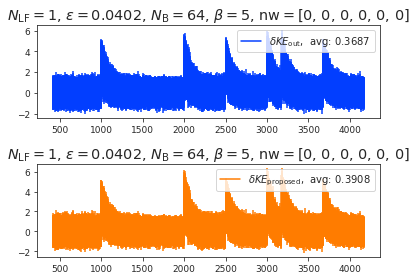

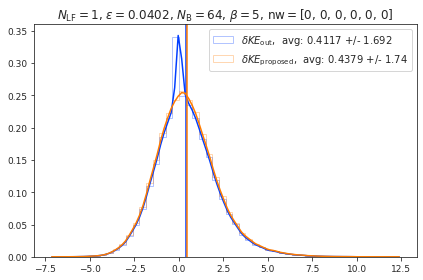

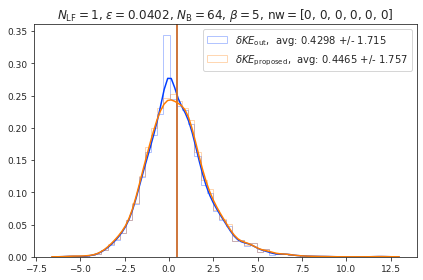

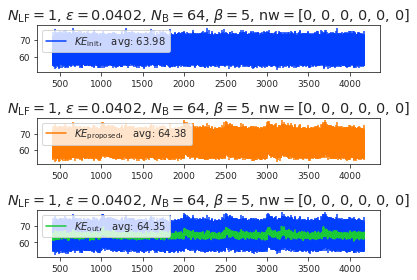

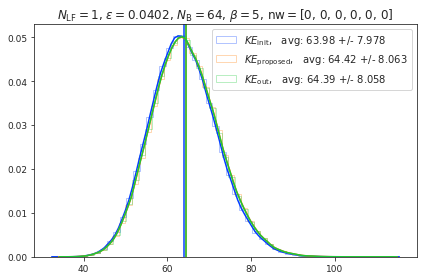

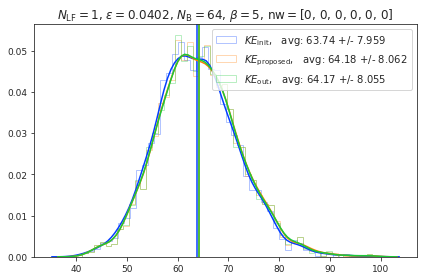

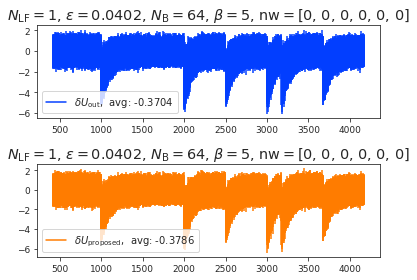

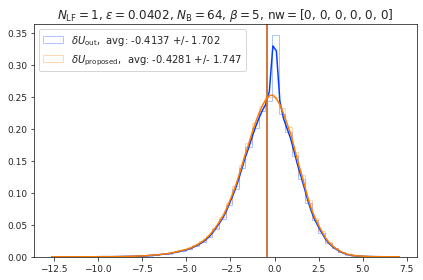

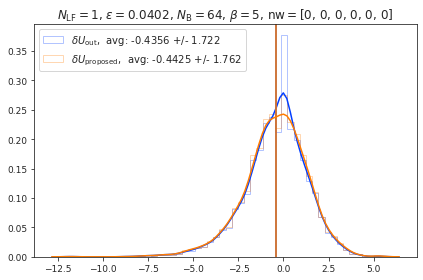

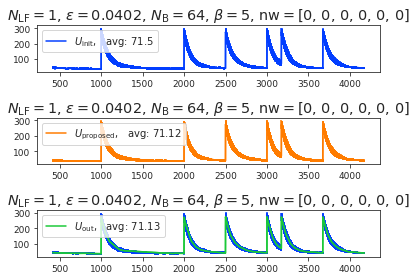

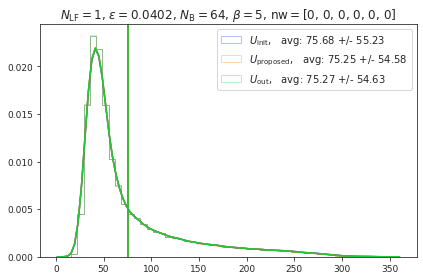

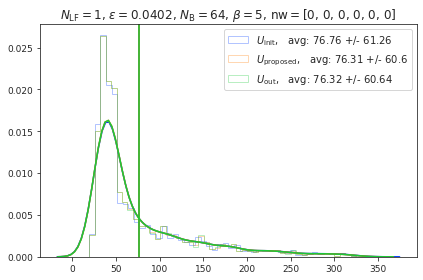

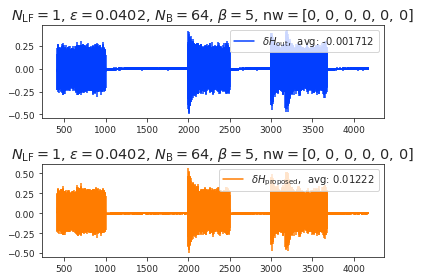

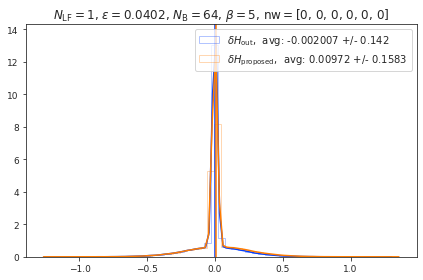

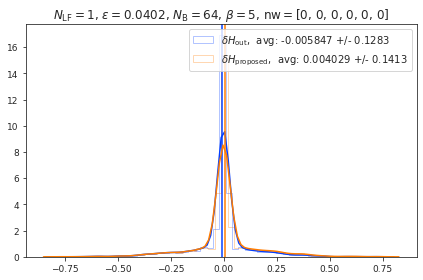

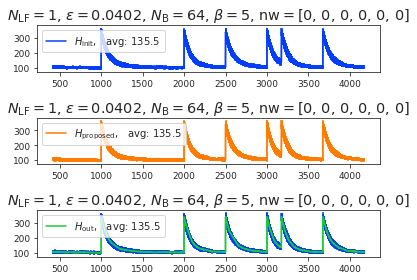

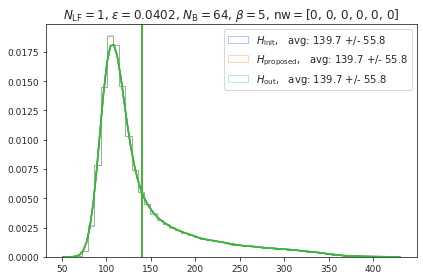

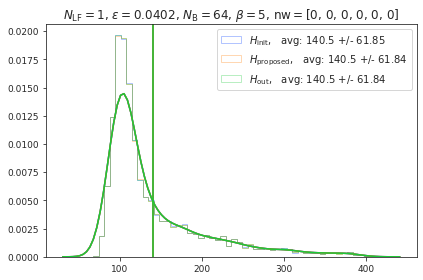

In [11]:
try:
    dynamics, lattice = create_dynamics(log_dir)
    net_weights = NetWeights(x_scale=0, x_translation=0, x_transformation=0,
                             v_scale=0, v_translation=0, v_transformation=0)
    rp_hmc = {
        'beta': 5.,
        'eps': dynamics.eps,
        'net_weights': net_weights,
        'run_steps': 500,
    }

    rp_hmc, rd_hmc, ed_hmc = run_inference_np(log_dir, dynamics,
                                              lattice, rp_hmc,
                                              init='rand')
    params = load_pkl(os.path.join(log_dir, 'parameters.pkl'))
    inference_plots(rd_hmc, ed_hmc, params, rp_hmc)
#else:
except:
    io.log(f'Unable to load from `weights.pkl` file in {log_dir}. Skipping!')
    #continue

In [20]:
%debug

> /home/foremans/.local/lib/python3.6/site-packages/numpy/core/arrayprint.py(771)recurser()
    769                     line += separator
    770 
--> 771             for i in range(trailing_items, 1, -1):
    772                 word = recurser(index + (-i,), next_hanging_indent, next_width)
    773                 s, line = _extendLine(

ipdb> up
> /home/foremans/.local/lib/python3.6/site-packages/numpy/core/arrayprint.py(818)_formatArray()
    816         return recurser(index=(),
    817                         hanging_indent=next_line_prefix,
--> 818                         curr_width=line_width)
    819     finally:
    820         # recursive closures have a cyclic reference to themselves, which

ipdb> up
> /home/foremans/.local/lib/python3.6/site-packages/numpy/core/arrayprint.py(505)_array2string()
    503     lst = _formatArray(a, format_function, options['linewidth'],
    504                        next_line_prefix, separator, options['edgeitems'],
--> 505                   

In [8]:
run_params


{'beta': 5.0,
 'eps': 0.1632308,
 'net_weights': NetWeights(x_scale=1, x_translation=1, x_transformation=1, v_scale=1, v_translation=1, v_transformation=1),
 'run_steps': 5000,
 'run_str': 'steps5000_beta50_eps0163_nw111111_rand_0150'}

/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/gauge_model_plotter.py:290: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/gauge_model_plotter.py:379: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_07/L8_b64_lf2_v101_f32_0023/figures_np/steps5000_beta50_eps0163_nw111111_rand_0150/plaqs_vs_step.png
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_07/L8_b64_lf2_v101_f32_0023/figures_np/steps5000_beta50_eps0163_nw111111_rand_0150/plaqs_hist.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_07/L8_b64_lf2_v101_f32_0023/figures_np/steps5000_beta50_eps0163_nw111111_rand_0150/actions_hist.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_07/L8_b64_lf2_v101_f32_0023/figures_np/steps5000_beta50_eps0163_nw111111_rand_0150/actions.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_07/L8_b64_lf2_v101_f32_0023/figures_np/steps5000_beta50_eps0163_nw111111_rand_0150/accept_probs_vs_step.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_07/L8_b64_lf2_v101_f32_0023/figu

/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/energy_plotter.py:153: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_07/L8_b64_lf2_v101_f32_0023/figures_np/steps5000_beta50_eps0163_nw111111_rand_0150/steps5000_beta50_eps0163_nw111111_rand_0150/energy_plots/np/potential_diffs_hist_single_chain.png.


/lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/plotters/energy_plotter.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=num_plots, ncols=1)


Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_07/L8_b64_lf2_v101_f32_0023/figures_np/steps5000_beta50_eps0163_nw111111_rand_0150/steps5000_beta50_eps0163_nw111111_rand_0150/energy_plots/np/potentials.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_07/L8_b64_lf2_v101_f32_0023/figures_np/steps5000_beta50_eps0163_nw111111_rand_0150/steps5000_beta50_eps0163_nw111111_rand_0150/energy_plots/np/potential_hist.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_07/L8_b64_lf2_v101_f32_0023/figures_np/steps5000_beta50_eps0163_nw111111_rand_0150/steps5000_beta50_eps0163_nw111111_rand_0150/energy_plots/np/potential_hist_single_chain.png.
Saving figure to: /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/gauge_logs/2020_01_07/L8_b64_lf2_v101_f32_0023/figures_np/steps5000_beta50_eps0163_nw111111_rand_0150/steps5000_beta50_eps0163_nw111111_rand_0150/energy_plots/np/hamiltonian_diffs.png.
Saving figure to: /lus/theta

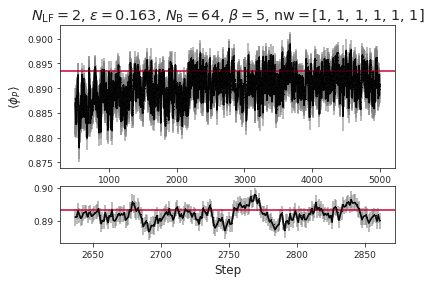

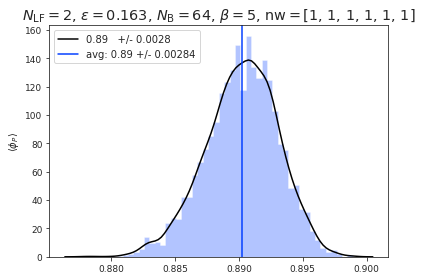

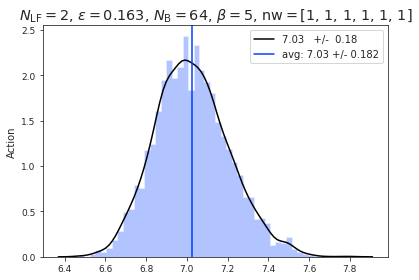

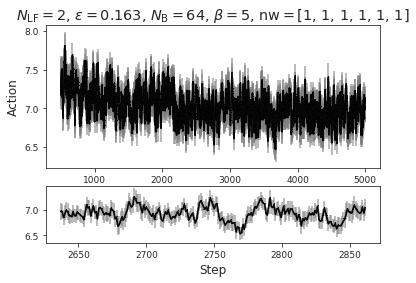

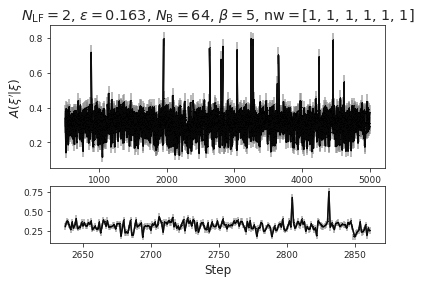

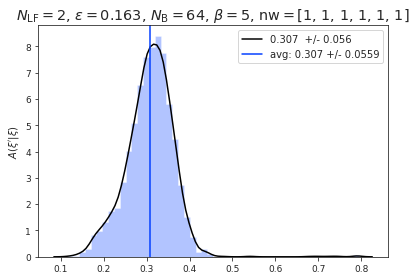

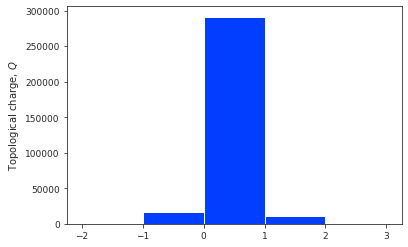

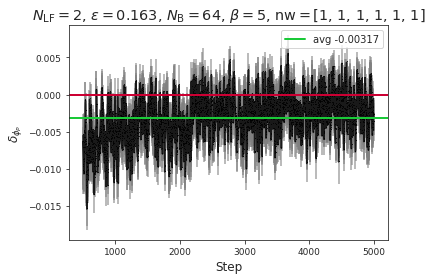

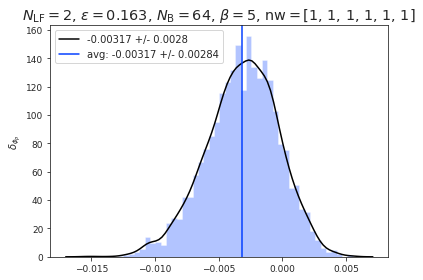

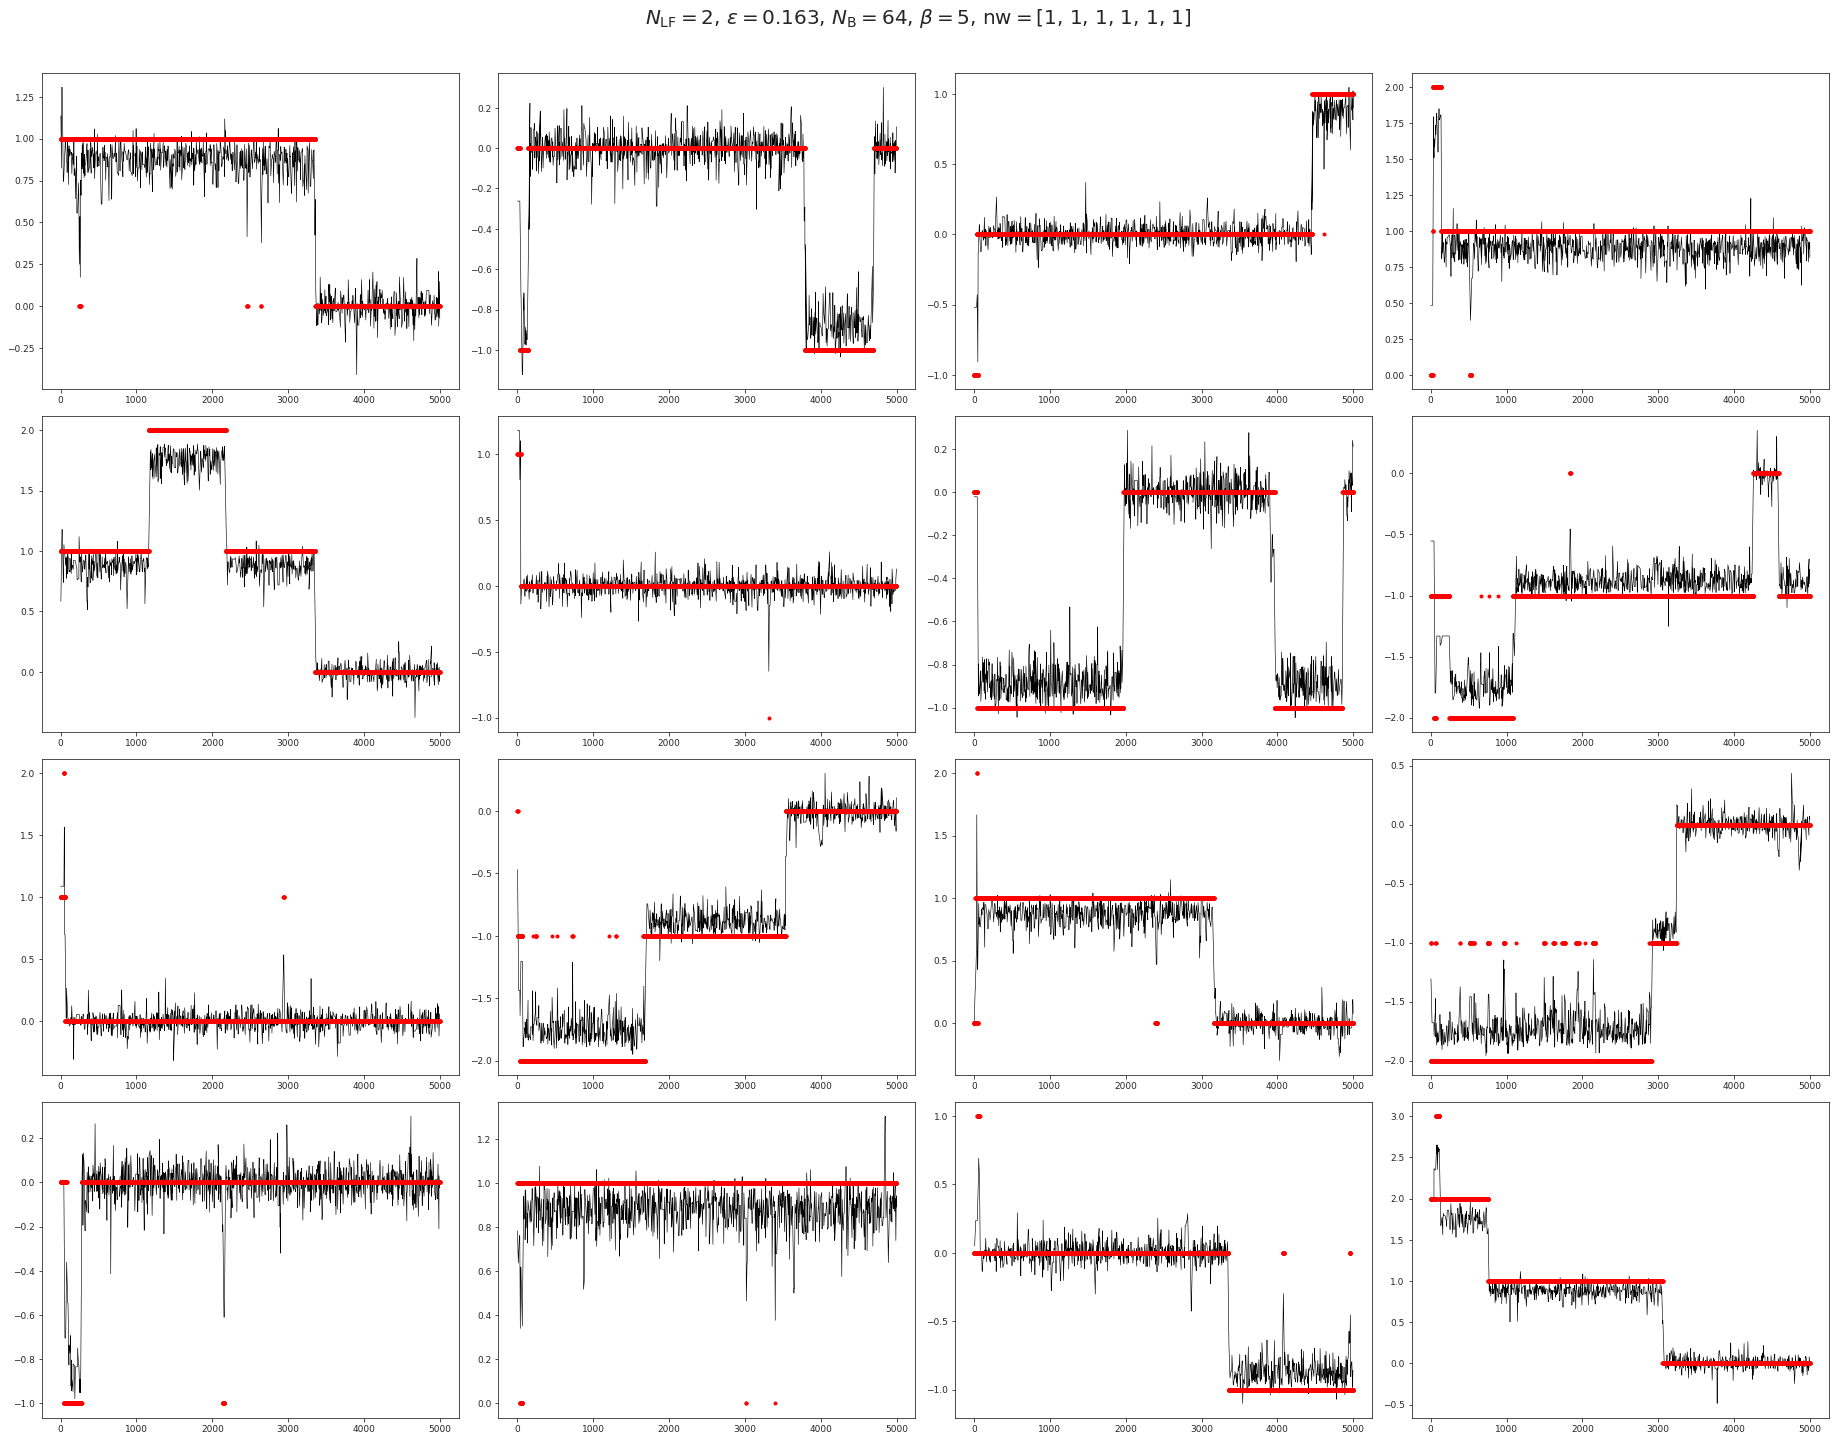

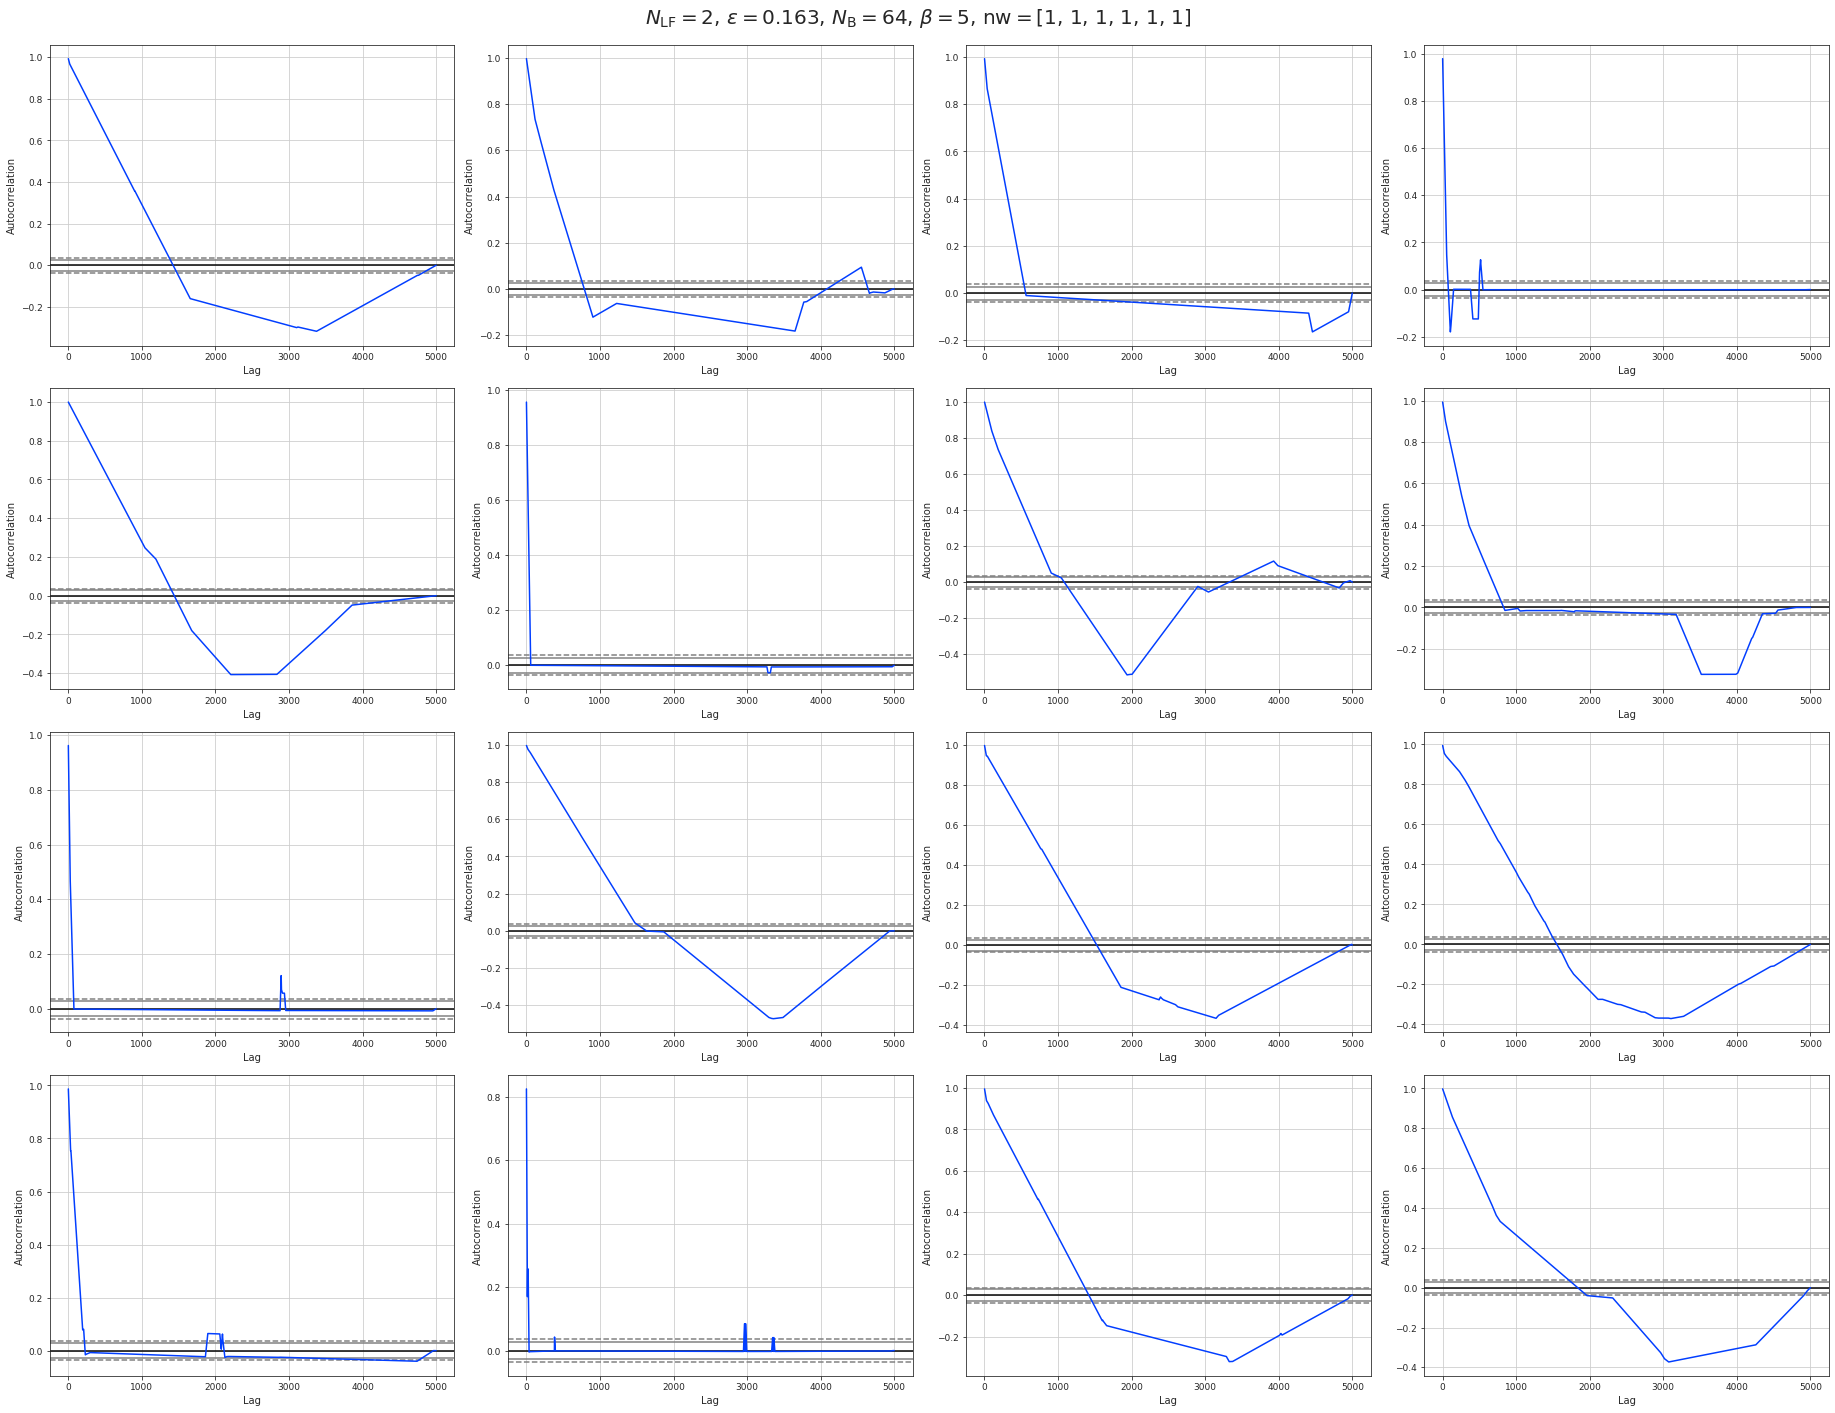

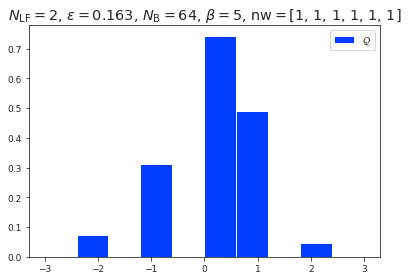

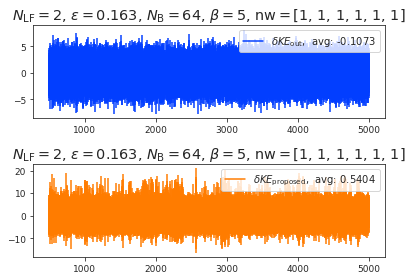

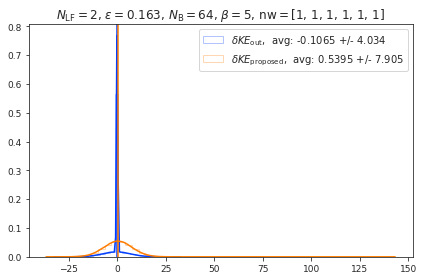

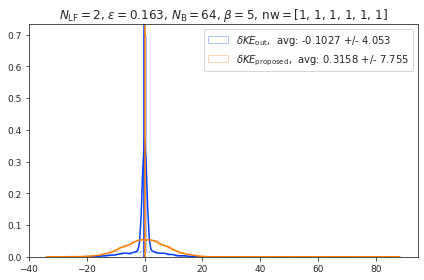

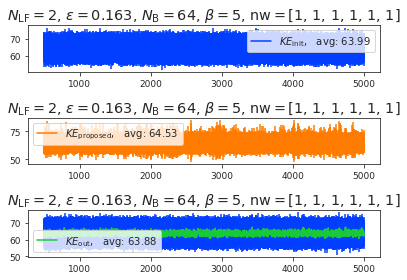

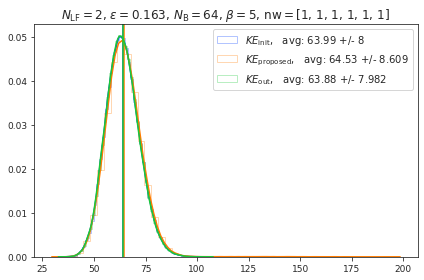

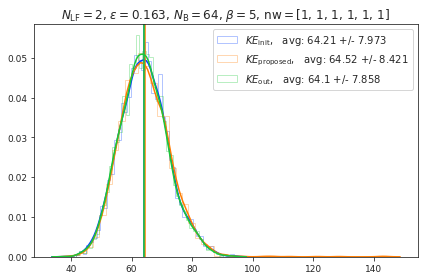

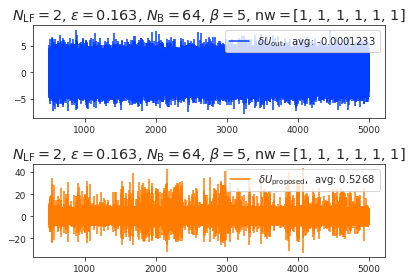

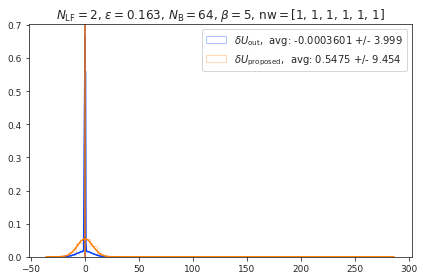

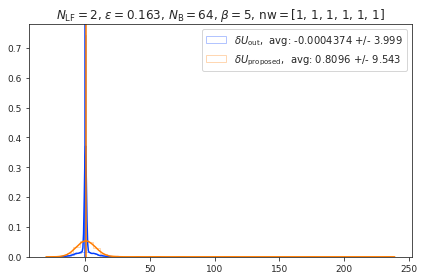

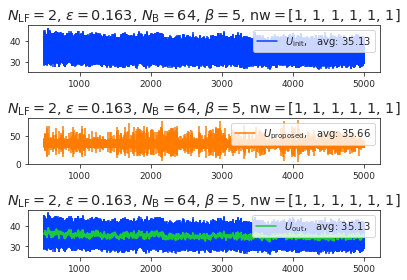

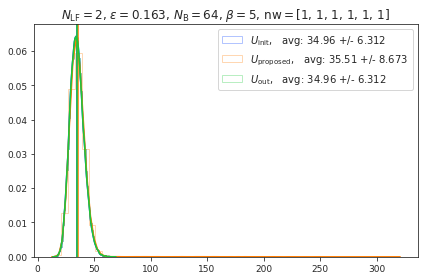

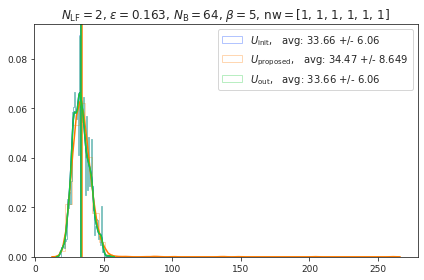

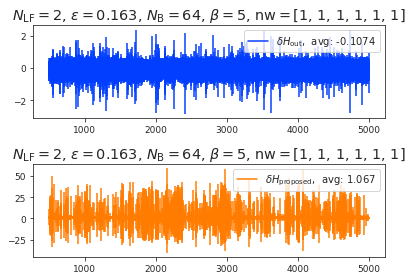

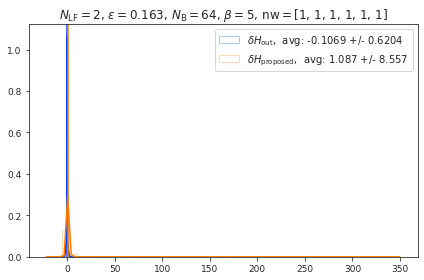

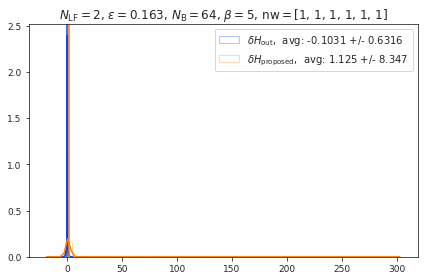

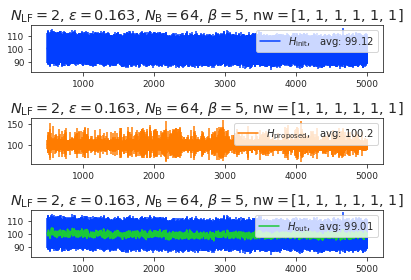

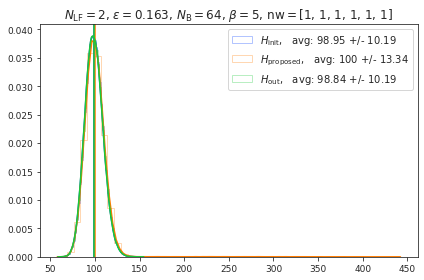

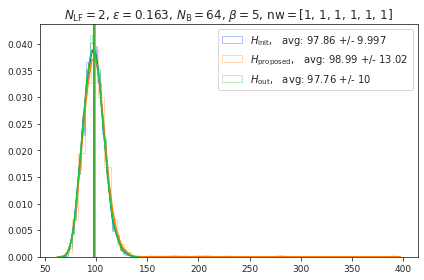

In [16]:
from runners.runner_np import load_pkl
params = load_pkl(os.path.join(log_dir, 'parameters.pkl'))
inference_plots(run_data, energy_data, params, run_params)

In [2]:
def calc_dx(x1, x2):
    return np.mean(1. - np.cos(x1 - x2), axis=-1)

def _calc_energies(dynamics, x, v, beta):
    pe = dynamics.potential_energy(x, beta)
    ke = dynamics.kinetic_energy(v)
    h = dynamics.hamiltonian(x, v, beta)
    
    return pe, ke, h
    
def calc_energies(dynamics, x_init, outputs, beta):
    #x_init = outputs['x_init']
    x_prop = outputs['x_proposed']
    x_out = outputs['x_out']
    v_init = outputs['v_init']
    v_prop = outputs['v_proposed']
    v_out = outputs['v_out']
    
    pe_init, ke_init, h_init = _calc_energies(dynamics, x_init, v_init, beta)
    pe_prop, ke_prop, h_prop = _calc_energies(dynamics, x_prop, v_prop, beta)
    pe_out, ke_out, h_out = _calc_energies(dynamics, x_out, v_out, beta)
    
    outputs = { 
        'potential_init': pe_init,
        'kinetic_init': ke_init,
        'hamiltonian_init': h_init, 
        'potential_proposed': pe_prop,
        'kinetic_proposed': ke_prop,
        'hamiltonian_proposed': h_prop, 
        'potential_out': pe_out,
        'kinetic_out': ke_out,
        'hamiltonian_out': h_out,
    }
    
    return outputs

## Load information about saved model... 

By loading in the saved weights from the trained model, we can reconstruct the neural network using a pure   
numpy implementation which can then be used to run inference without having to reconstruct a tensorflow graph.

In [3]:
def create_lattice(params):
    dim = params['dim']
    num_steps = params['num_steps']
    time_size = params['time_size']
    space_size = params['space_size']
    batch_size = params['batch_size']
    zero_masks = params['zero_masks']
    x_dim = (params['time_size']
             * params['space_size']
             * params['dim'])
    
    lattice = GaugeLattice(time_size=time_size,
                           space_size=space_size,
                           dim=dim, link_type='U1',
                           batch_size=batch_size)
    return lattice

In [ ]:
def get_eps(log_dir):
    run_dirs = get_run_dirs(log_dir)
    run_dir = run_dirs[0]
    rp_file = os.path.join(run_dir, 'run_params.pkl')
    with open(rp_file, 'rb') as f:
        run_params = pickle.load(f)
        
    lattice = create_lattice(params)
    potential_fn = lattice.calc_actions_np

    eps = run_params['eps']
    
    return eps

In [74]:
def update_params(params, eps=None, num_steps=None, batch_size=None):
    if num_steps is None:
        num_steps = params['num_steps']
    else:
        params['num_steps'] = num_steps
        
    if batch_size is None:
        batch_size = params['batch_size']
    else:
        params['batch_size'] = batch_size
        
    if eps is None:
        eps = get_eps(log_dir)
    else:
        params['eps'] = eps
        
    return params

In [75]:
def create_dynamics(log_dir, eps=None, num_steps=None, batch_size=None):
    params_file = os.path.join(log_dir, 'parameters.pkl')
    with open(params_file, 'rb') as f:
        params = pickle.load(f)
        
    params = update_params(params, eps,
                           num_steps,
                           batch_size)
    eps = params['eps']
    num_steps = params['num_steps']
    batch_size = params['batch_size']
    zero_masks = params['zero_masks']

    weights_file = os.path.join(log_dir, 'weights.pkl')
    with open(weights_file, 'rb') as f:
        weights = pickle.load(f)
        
    lattice = create_lattice(params)
    
    x_dim = lattice.x_dim
    potential_fn = lattice.calc_actions_np
    
    # Use numpy implementation of the action 
    # calculation for the potential function
    dynamics = DynamicsRunner(potential_fn, weights,
                              eps=eps, x_dim=x_dim,
                              num_steps=num_steps,
                              batch_size=batch_size,
                              zero_masks=zero_masks)
    return dynamics, lattice, params

## Re-construct `GaugeLattice` and build `DynamicsRunner`...

 - The `GaugeLattice` provides the definition of the `potential_function` and allows   
   us to easily calculate lattice observables from our inference samples.

 - The `DynamicsRunner` is the tensorflow-independent implementation of the `Dynamics`   
   engine used for training the L2HMC sampler.

In [77]:
from config import NetWeights
from lattice.lattice import GaugeLattice
from plotters.plot_utils import get_run_dirs
from dynamics.dynamics_np import DynamicsRunner

log_dir = os.path.abspath('/home/foremans/DLHMC/l2hmc-qcd/gauge_logs/'
                          '2020_01_08/L8_b64_lf1_f32/')

dynamics, lattice = create_dynamics(log_dir) 

In [76]:
#lattice = GaugeLattice(time_size=time_size,
#                       space_size=space_size,
#                       dim=dim, link_type='U1',
#                       batch_size=batch_size)
#
## Use numpy implementation of the action 
## calculation for the potential function
#potential_fn = lattice.calc_actions_np
#dynamics = DynamicsRunner(potential_fn, weights,
#                          eps=eps, x_dim=x_dim,
#                          num_steps=num_steps,
#                          batch_size=batch_size,
#                          zero_masks=zero_masks)
#
#beta = 5.
#net_weights = NetWeights(1, 1, 1, 1, 1, 1)
#samples_init = np.random.randn(params['batch_size'], x_dim)
#outputs = dynamics.apply_transition(samples_init, beta, net_weights,
#                                    model_type='GaugeModel')
#
#for key, val in outputs.items():
#    print(f'{key}: {val.shape}\n')

In [81]:
import time
from lattice.lattice import u1_plaq_exact
import utils.file_io as io

def run_inference_np(dynamics, run_params):
    run_steps = run_params['run_steps']
    beta = run_params['beta']
    net_weights = run_params['net_weights']
    eps = run_params.get('eps', None)
    batch_size = run_params.get('batch_size', None)
    if eps is None:
        eps = dynamics.eps
    if eps != dynamics.eps:
        dynamics.eps = eps
    if batch_size is None:
        batch_size = dynamics.batch_size
    if batch_size != dynamics.batch_size:
        dynamics.batch_size = batch_size

    run_data = {
        'plaqs': [],
        'actions': [],
        'charges': [],
        'dxf': [],
        'dxb': [],
        'dx': [],
        'accept_prob': [],
        'px': [],
        'mask_f': [],
        'mask_b': [],
    }

    energy_data = {
        'potential_init': [],
        'kinetic_init': [],
        'hamiltonian_init': [],
        'potential_proposed': [],
        'kinetic_proposed': [],
        'hamiltonian_proposed': [],
        'potential_out': [],
        'kinetic_out': [],
        'hamiltonian_out': [],
    }

    h_strf = ("{:^13s}" + 7 * "{:^12s}").format(
        "STEP", "t/STEP", "% ACC", "∆x", "∆xf", "∆xb", "exp(∆H)", "∆ø"
    )

    data_strs = []

    samples = np.random.randn(batch_size, dynamics.x_dim)
    plaq_exact = u1_plaq_exact(beta)

    nw_str = ''.join((str(int(i)) for i in net_weights))
    beta_str = f'{beta}'.replace('.', '')
    eps_str = f'{eps:.3g}'.replace('.', '')
    run_str = (f'steps{run_steps}_beta{beta_str}'
               f'_eps{eps_str}_nw{nw_str}_rand')

    run_params['run_str'] = run_str

    runs_dir = os.path.join(log_dir, 'runs_np')
    if os.path.isdir(os.path.join(runs_dir, run_str)):
        io.log(f'Existing run found! Creating new run_dir...')
        run_str += '_1'

    run_dir = os.path.join(runs_dir, run_str)
    io.check_else_make_dir(run_dir)

    start_time = time.time()
    for step in range(run_steps):
        if step % 100 == 0:
            print(len(h_strf) * '-')
            print(h_strf)
            print(len(h_strf) * '-')
        t0 = time.time()
        samples_init = np.mod(samples, 2 * np.pi)
        output = dynamics.apply_transition(samples, beta, net_weights,
                                           model_type='GaugeModel')
        dt = time.time() - t0
        samples = output['x_out']
        samples = np.mod(samples, 2 * np.pi)
        obs = lattice.calc_observables_np(samples=samples)
        for key, val in obs.items():
            run_data[key].append(val)

        xf = np.mod(output['xf'], 2 * np.pi) * output['mask_f'][:, None]
        xf0 = samples_init * output['mask_f'][:, None]

        xb = np.mod(output['xb'], 2 * np.pi) * output['mask_b'][:, None]
        xb0 = samples_init * output['mask_b'][:, None]

        dxf = calc_dx(xf0, xf)
        dxb = calc_dx(xb0, xb)
        dx = calc_dx(samples_init, samples)

        run_data['dxf'].append(dxf)
        run_data['dxb'].append(dxb)
        run_data['dx'].append(dx)
        run_data['accept_prob'].append(output['accept_prob'])

        plaq_diff = plaq_exact - obs['plaqs']

        edata = calc_energies(dynamics, samples_init, outputs, beta)
        for key, val in edata.items():
            energy_data[key].append(val)

        exp_dh = np.exp(edata['hamiltonian_init'] - edata['hamiltonian_out'])

        px = output['accept_prob']
        run_data['px'].append(px)
        data_str = (f"{step:>6g}/{run_steps:<6g} "
                    f"{dt:^11.4g} "
                    f"{px.mean():^11.4g} "
                    f"{dx.mean():^11.4g} "
                    f"{dxf.mean():^11.4g} "
                    f"{dxb.mean():^11.4g} "
                    f"{exp_dh.mean():^11.4g} "
                    f"{plaq_diff.mean():^11.4g}")
        print(data_str)
        data_strs.append(data_str)

    print(len(h_strf) * '-')
    print(f'Time to complete: {time.time() - start_time:.4g}s')

    #io.save_params(run_params, run_dir, name='run_params')
    io.save_dict(run_params, run_dir, name='run_params')

    run_history_file = os.path.join(run_dir, 'run_history.txt')
    io.log(f'Writing run history to: {run_history_file}...')
    with open(run_history_file, 'w') as f:
        for s in data_strs:
            f.write(f'{s}\n')

    run_data_file = os.path.join(run_dir, 'run_data.pkl')
    io.log(f'Saving run_data to {run_data_file}...')
    with open(run_data_file, 'wb') as f:
        pickle.dump(run_data, f)

    energy_data_file = os.path.join(run_dir, 'energy_data.pkl')
    io.log(f'Saving energy_data to {energy_data_file}...')
    with open(energy_data_file, 'wb') as f:
        pickle.dump(energy_data, f)

    observables_dir = os.path.join(run_dir, 'observables')
    io.check_else_make_dir(observables_dir)
    for key, val in run_data.items():
        out_file = os.path.join(observables_dir, f'{key}.pkl')
        io.log(f'Saving {key} to {out_file}...')
        with open(out_file, 'wb') as f:
            pickle.dump(np.array(val), f)
            
    return run_params, run_data, energy_data

In [ ]:
run_params = {
    'run_steps': 10000,
    'beta': 5.,
    'net_weights': NetWeights(1, 1, 1, 1, 1, 1),
    'eps': dynamics.eps,
    'batch_size': dynamics.batch_size,
}
run_params_l2hmc, run_data_l2hmc, energy_data_l2hmc = run_inference_np(dynamics, run_params)
#run_params_l2hmc, run_data_l2hmc, energy_data_l2hmc = run_inference_np(run_steps=20000, beta=5., net_weights=nw_l2hmc)

In [82]:
run_params = {
    'run_steps': 10000,
    'beta': 5.,
    'net_weights': NetWeights(0, 0, 0, 0, 0, 0),
    'eps': dynamics.eps,
    'batch_size': dynamics.batch_size,
}
run_params_hmc, run_data_hmc, energy_data_hmc = run_inference_np(dynamics, run_params)

Existing run found! Creating new run_dir...
Creating directory: /home/foremans/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/runs_np/steps10000_beta50_eps01_nw000000_rand_1
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
     0/10000    0.02674     0.9924     0.005195    0.002932    0.002263    8.921e+30    0.7013   
     1/10000    0.02444     0.9952     0.005123    0.002748    0.002454    1.113e+28     0.654   
     2/10000    0.02301     0.9886     0.005063    0.002337    0.002815    9.334e+18     0.614   
     3/10000    0.02275     0.9923     0.005312    0.002874    0.002437    1.733e+12     0.575   
     4/10000    0.02296     0.9932     0.005235    0.002251    0.002985    3.148e+05     0.535   
     5/10000    0.02287     0.9817  

    79/10000    0.02281     0.9207     0.004494    0.002644    0.002421    1.315e-81    0.02094  
    80/10000    0.02353     0.9114     0.004808     0.00318    0.002012    4.213e-78    0.02072  
    81/10000    0.02245     0.9241     0.004414    0.002082    0.002936    4.213e-78    0.01952  
    82/10000    0.02239     0.9116     0.004672    0.002023    0.003065    2.788e-82    0.01979  
    83/10000    0.02226     0.9121     0.004244    0.002327    0.002629    3.531e-81    0.01972  
    84/10000    0.02266     0.9336     0.004981    0.002676    0.002552    2.056e-80    0.01892  
    85/10000    0.02274     0.9352      0.00446    0.002457    0.002599    2.807e-82    0.01567  
    86/10000    0.02242      0.905     0.004371    0.002514    0.002515    6.694e-84    0.01506  
    87/10000    0.0226      0.9006     0.004712    0.002691    0.002532    4.369e-84    0.01487  
    88/10000    0.02219     0.8995     0.004794    0.002368    0.002741    7.429e-85    0.01624  
    89/10000    0.02

   167/10000    0.0227      0.9167      0.00457     0.00221    0.002828    1.337e-89   0.003301  
   168/10000    0.0241      0.9125     0.004545    0.002846    0.002246    1.591e-88   0.003189  
   169/10000    0.02232     0.9227     0.004903    0.002171    0.003015    2.293e-88   0.003263  
   170/10000    0.02237     0.8844     0.004442     0.00251    0.002416    2.024e-85   0.005902  
   171/10000    0.02228     0.9144      0.00487    0.002709    0.002393    1.59e-85    0.008249  
   172/10000    0.02244     0.9305     0.004644    0.003292    0.001894    3.31e-84    0.008533  
   173/10000    0.02221     0.9225     0.004576    0.002485    0.002586    8.174e-84   0.007643  
   174/10000    0.02228     0.9034     0.004672    0.001908     0.00332    5.956e-84   0.008099  
   175/10000    0.02273     0.9274     0.004662    0.002647    0.002484    2.557e-84   0.006552  
   176/10000    0.02407      0.913     0.004784    0.002687     0.00232    2.448e-84   0.007088  
   177/10000    0.02

   255/10000    0.02375     0.9056     0.004736    0.002008    0.003042    5.057e-84   0.008364  
   256/10000    0.0248      0.9439     0.004763    0.002478    0.002593    2.536e-83    0.00749  
   257/10000    0.02283     0.9091     0.004479    0.002382    0.002792    2.555e-86   0.008155  
   258/10000    0.02292     0.9119     0.004353    0.002201    0.002862    3.149e-87   0.008014  
   259/10000    0.02232     0.9093      0.00501     0.00217    0.002927    9.277e-87    0.01035  
   260/10000    0.02221     0.9233     0.004895     0.00215    0.003047    1.991e-85   0.009315  
   261/10000    0.02238     0.9274     0.004686    0.002482    0.002617    7.444e-85   0.008702  
   262/10000    0.02252     0.9309     0.004882    0.001829    0.003374    1.128e-84   0.009005  
   263/10000    0.02296     0.9147     0.004631    0.003267    0.001845    2.958e-82   0.007938  
   264/10000    0.02251      0.906     0.004448    0.002963    0.002115    6.457e-84    0.00825  
   265/10000    0.02

   343/10000    0.02389     0.9338     0.004764    0.002058    0.003033    1.864e-88   0.003393  
   344/10000    0.02235     0.8978     0.004869     0.00256     0.00266    8.337e-89   0.005946  
   345/10000    0.02224     0.9163     0.004268     0.00287    0.002143    1.746e-87   0.006876  
   346/10000    0.0231      0.9297     0.004598    0.003033    0.002142    1.569e-86   0.005629  
   347/10000    0.02311     0.9287     0.004535    0.002842    0.002347    8.186e-88    0.00382  
   348/10000    0.02285     0.9306     0.004552    0.002904     0.00222    1.61e-87    0.002875  
   349/10000    0.02279     0.8938      0.00418    0.002759    0.002176    1.022e-87   0.004138  
   350/10000    0.0229      0.9101     0.004132    0.002787    0.002327    3.104e-87   0.005047  
   351/10000    0.02344     0.9159     0.004576    0.002694    0.002378    1.638e-86   0.005225  
   352/10000    0.02299     0.9074     0.004621    0.002712    0.002317    4.363e-87   0.006886  
   353/10000    0.02

   431/10000    0.02374     0.9045     0.004515    0.002061    0.002965    2.913e-84    0.00699  
   432/10000    0.0247      0.9227     0.004856    0.002226    0.002812    9.194e-86   0.009318  
   433/10000    0.02302     0.9057     0.004705    0.002619    0.002389    5.941e-84    0.01028  
   434/10000    0.02355     0.9264      0.00424    0.002755    0.002193    1.547e-83   0.008998  
   435/10000    0.02376     0.9358     0.004736    0.002767     0.00227    6.201e-86   0.008009  
   436/10000    0.0234      0.9201     0.004535    0.002144    0.002798    5.847e-87   0.007901  
   437/10000    0.02325     0.9178     0.004787    0.002801    0.002238    1.941e-87   0.008019  
   438/10000    0.0228       0.928     0.004535    0.002654    0.002436    1.89e-87    0.005343  
   439/10000    0.02355     0.9171     0.004228    0.002362    0.002778    4.536e-88    0.00376  
   440/10000    0.02287     0.8958     0.004559    0.003403    0.001758    1.724e-87   0.004081  
   441/10000    0.02

   519/10000    0.02285     0.9104     0.004047    0.002566    0.002451    8.907e-88   0.004264  
   520/10000    0.02227      0.909     0.004636    0.002827    0.002368    3.741e-88   0.003974  
   521/10000    0.02228     0.9371     0.004696    0.002496    0.002575    4.839e-88   0.002944  
   522/10000    0.02224     0.9091      0.00485    0.002538    0.002604    8.414e-87   0.003449  
   523/10000    0.02235     0.9227     0.004598     0.00345     0.00163    7.178e-85   0.004504  
   524/10000    0.02224     0.9344     0.004759    0.003162    0.001899    4.36e-86    0.003603  
   525/10000    0.02221     0.9084     0.004803    0.002374     0.00268    1.776e-86   0.004194  
   526/10000    0.02475      0.926     0.004695    0.002808    0.002295    2.92e-86    0.004344  
   527/10000    0.02442     0.9177     0.004749    0.003025    0.002044    9.787e-85    0.00532  
   528/10000    0.02297     0.9016     0.004663    0.002343    0.002806    8.452e-84   0.006964  
   529/10000    0.02

   607/10000    0.02307     0.9135     0.004543    0.002749    0.002356    5.842e-85    0.00349  
   608/10000    0.02208     0.9057     0.004577    0.002338    0.002835    9.888e-84   0.003709  
   609/10000    0.02201     0.9302     0.004642    0.002576    0.002468    4.065e-83   0.002292  
   610/10000    0.02211     0.9227     0.004859    0.002033    0.002977    9.075e-83   0.002858  
   611/10000    0.02208     0.8976     0.004625    0.003324    0.001866    1.763e-83   0.004239  
   612/10000    0.02233     0.9146     0.004812     0.00236     0.00276    9.196e-84   0.004248  
   613/10000    0.02208     0.9073     0.004699    0.002979    0.002209    8.659e-83    0.00529  
   614/10000    0.02204     0.9343      0.00492    0.002443    0.002719    5.813e-82   0.004713  
   615/10000    0.02215     0.9163     0.004603    0.003527    0.001618    3.277e-85   0.004733  
   616/10000    0.02227      0.923     0.004663     0.00175    0.003312    4.921e-83   0.003709  
   617/10000    0.02

   695/10000    0.02346     0.9183     0.004754    0.002492    0.002567    3.185e-84    0.00723  
   696/10000    0.02437     0.9083     0.004682    0.002607    0.002394    1.734e-83   0.008147  
   697/10000    0.02293     0.9297     0.004886    0.002818     0.00237    7.888e-85   0.008203  
   698/10000    0.02365     0.8892     0.004373    0.002789    0.002287    1.427e-85   0.007831  
   699/10000    0.02332      0.911     0.004526    0.002344     0.00253    1.782e-84   0.008586  
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
   700/10000    0.02237     0.9321     0.004613    0.002201    0.002797    2.292e-85   0.005794  
   701/10000    0.0223      0.9261     0.004622    0.001877    0.003174    1.021e-85   0.004662  
   702/10000    0.02

   783/10000    0.02329     0.9243     0.004585    0.002986    0.002138    2.398e-85   0.002325  
   784/10000    0.02407     0.9164      0.00427    0.002571    0.002522    9.423e-87   0.003499  
   785/10000    0.02288     0.9401     0.004888    0.002417    0.002615    3.882e-86   0.002223  
   786/10000    0.02297     0.9299     0.004522    0.002638    0.002367    3.484e-86   0.002489  
   787/10000    0.02297     0.9204     0.005026    0.002967    0.002218    4.208e-86   0.002428  
   788/10000    0.02289     0.8886     0.004191     0.00247    0.002626    5.112e-86   0.003454  
   789/10000    0.02302     0.9291     0.005034    0.002653     0.00261    3.922e-86   0.002786  
   790/10000    0.02241     0.9227     0.004668    0.002775    0.002243    7.816e-84   0.004021  
   791/10000    0.02278     0.9267     0.004451    0.002885    0.002122    9.18e-86    0.001519  
   792/10000    0.02228     0.8847     0.004524    0.002713    0.002411    4.791e-87   0.004355  
   793/10000    0.02

   871/10000    0.02304     0.9277     0.004633    0.002593    0.002464    4.046e-90   0.0006183 
   872/10000    0.0225      0.9235     0.004593    0.002822    0.002241    1.41e-89   -0.0002498 
   873/10000    0.02231     0.9173     0.004752     0.00239    0.002748    2.751e-87  -0.0004561 
   874/10000    0.02236      0.922      0.00448    0.002915    0.002102    3.015e-88  -0.0009796 
   875/10000    0.02231     0.9098     0.004717    0.002707    0.002421    1.134e-86   -0.00101  
   876/10000    0.02308      0.91      0.004694    0.002124    0.003045    7.975e-87  -5.599e-05 
   877/10000    0.02249     0.9239     0.004841    0.002396    0.002668    2.375e-85  -7.495e-05 
   878/10000    0.02237     0.9046     0.004402    0.002988      0.002     2.375e-85   0.0005052 
   879/10000    0.02283     0.8804     0.004412    0.002682    0.002366    1.678e-85   0.004072  
   880/10000    0.02224     0.9167     0.004684    0.002022    0.002966    1.783e-85    0.00312  
   881/10000    0.02

   959/10000    0.02203     0.9226     0.004777    0.002499    0.002627    8.932e-86   0.001757  
   960/10000    0.02243     0.9177      0.0047     0.002929    0.002249    8.34e-87     0.00224  
   961/10000    0.02217     0.9155     0.004835    0.002375    0.002893    4.892e-86   0.003073  
   962/10000    0.02231      0.903     0.004586    0.002549    0.002648    7.254e-87   0.003701  
   963/10000    0.02215     0.9167     0.004517    0.002874    0.002214    9.519e-86   0.003573  
   964/10000    0.02248     0.8996     0.004854    0.002407    0.002587    5.092e-85   0.006481  
   965/10000    0.0223      0.9282     0.004683    0.002547    0.002464    3.172e-85   0.005243  
   966/10000    0.02225     0.9373     0.004476    0.002324    0.002654    5.929e-88   0.003321  
   967/10000    0.02217     0.8958     0.004817    0.002435    0.002609    4.966e-88   0.006526  
   968/10000    0.02216      0.929      0.00491    0.002754     0.00233    5.333e-85   0.007342  
   969/10000    0.02

  1047/10000    0.02271     0.9236     0.004765    0.002251    0.002914    2.345e-86   0.0002052 
  1048/10000    0.02233     0.9356     0.004578    0.002457     0.00257    1.933e-87   1.059e-05 
  1049/10000    0.02205     0.8819     0.004674    0.002604    0.002572    4.193e-88   0.002908  
  1050/10000    0.02234      0.941     0.005058    0.001884    0.003264    2.323e-87   0.001654  
  1051/10000    0.02233      0.925      0.00472    0.002493    0.002713    1.678e-86   0.001765  
  1052/10000    0.02214     0.9197     0.004716    0.002717    0.002411    5.176e-87   0.0006661 
  1053/10000    0.02208     0.9227      0.00464    0.002153    0.002892    2.37e-86   -0.0005997 
  1054/10000    0.02244     0.9115     0.004616    0.002561    0.002543    1.872e-86  -0.0001588 
  1055/10000    0.02251     0.9108     0.004923    0.002846    0.002412    1.764e-85   0.002056  
  1056/10000    0.02236     0.9387     0.004658    0.002263    0.002844    2.345e-85  -0.0005968 
  1057/10000    0.02

  1135/10000    0.02269     0.9432     0.004548    0.002622    0.002361    1.108e-84   0.005546  
  1136/10000    0.02254     0.9095     0.004421     0.00166    0.003427    2.514e-83   0.005543  
  1137/10000    0.02215     0.9142     0.004729    0.001991    0.003235    3.073e-83   0.004486  
  1138/10000    0.02228     0.9217     0.004775     0.00242    0.002676    3.576e-84    0.00335  
  1139/10000    0.02204     0.9209      0.00456    0.002523    0.002434    3.574e-84   0.002404  
  1140/10000    0.02219     0.9341     0.004862    0.002999    0.002155    2.596e-82   0.0009887 
  1141/10000    0.02224     0.9245     0.004851    0.002169     0.0029     1.987e-85   -0.000289 
  1142/10000    0.02203     0.9081     0.004714    0.002725    0.002403    2.832e-85   0.001715  
  1143/10000    0.02239     0.9228     0.004832    0.002744    0.002413    2.826e-87   0.001816  
  1144/10000    0.02219     0.9307     0.004808    0.002418    0.002635    2.959e-85   0.001718  
  1145/10000    0.02

  1223/10000    0.02244     0.8922     0.004439    0.002151    0.002827    5.002e-85   0.007351  
  1224/10000    0.02204     0.9268     0.004803    0.002867    0.002262    1.522e-81   0.007398  
  1225/10000    0.0221      0.9266     0.004885    0.002373    0.002668    4.656e-84   0.008188  
  1226/10000    0.02192     0.9333     0.004879    0.002324    0.002804    3.176e-82   0.008444  
  1227/10000    0.02238     0.8887     0.004682     0.00262    0.002487    3.176e-82   0.009908  
  1228/10000    0.02219     0.9157     0.004805    0.002031    0.003002    8.266e-83    0.01055  
  1229/10000    0.02234     0.9401      0.00452    0.003083    0.001892    2.227e-84   0.009951  
  1230/10000    0.02229     0.9076     0.004582    0.002518    0.002601    8.464e-82   0.007618  
  1231/10000    0.0221      0.9266     0.004627    0.002711    0.002292    8.471e-82   0.007135  
  1232/10000    0.02197     0.9181     0.004529    0.002903    0.002113    2.466e-83   0.005017  
  1233/10000    0.02

  1311/10000    0.02194     0.9239      0.00467    0.002882    0.002273    2.053e-86   0.002875  
  1312/10000    0.02226     0.9133     0.004582    0.002546    0.002524    1.835e-85   0.004113  
  1313/10000    0.02282     0.8996     0.004511    0.002734    0.002324    2.817e-84   0.004161  
  1314/10000    0.0226      0.9119     0.004866      0.003      0.00225    1.523e-86   0.003753  
  1315/10000    0.02258     0.9105     0.004443    0.002131    0.002989    1.396e-86   0.003716  
  1316/10000    0.02262      0.887     0.004276    0.003026    0.001999    1.511e-87   0.005056  
  1317/10000    0.02267     0.9172     0.004675    0.003247    0.001914    8.634e-88   0.004183  
  1318/10000    0.02295     0.9127     0.004418    0.002124    0.002935    3.214e-88   0.004606  
  1319/10000    0.02498     0.9164     0.004493    0.002789    0.002348    4.497e-87   0.004409  
  1320/10000    0.02279     0.9038     0.004719    0.002464    0.002688    5.136e-87   0.004849  
  1321/10000    0.02

  1399/10000    0.02334     0.9249      0.00474    0.002477     0.00258    3.651e-84   0.004631  
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
  1400/10000    0.02485     0.9047      0.00449    0.002744     0.00239    5.409e-85   0.005045  
  1401/10000    0.02274      0.907     0.004252    0.002909    0.002281    3.453e-85   0.003548  
  1402/10000    0.02267     0.9015     0.004548    0.003324    0.001734    3.19e-85    0.003608  
  1403/10000    0.02328     0.8997     0.004407     0.00203    0.003082    3.95e-84    0.004142  
  1404/10000    0.02263     0.9275     0.004615    0.002449    0.002494    1.044e-83   0.004052  
  1405/10000    0.02271     0.9104     0.004728    0.002975    0.002195    1.042e-83   0.004756  
  1406/10000    0.02

  1487/10000    0.02218     0.9157     0.004742    0.002602    0.002447    2.14e-86     0.00489  
  1488/10000    0.02224     0.9081     0.004734    0.002273    0.002865    1.239e-87   0.005641  
  1489/10000    0.02223     0.9227     0.004394    0.002848    0.002286    3.034e-87   0.004023  
  1490/10000    0.0223      0.9205     0.004886     0.00228    0.002947    1.91e-87    0.004582  
  1491/10000    0.02206     0.9389     0.004761    0.002697    0.002436    7.115e-89   0.003862  
  1492/10000    0.02197     0.9089     0.004617    0.002739    0.002441    3.365e-89    0.00549  
  1493/10000    0.02207     0.9269     0.004738    0.002574    0.002475    1.262e-89   0.005249  
  1494/10000    0.02201     0.9297     0.004654     0.00214     0.00301    7.535e-89   0.004489  
  1495/10000    0.02201     0.9136     0.004656     0.00304    0.002138    3.72e-88    0.003727  
  1496/10000    0.02352     0.9176     0.004918    0.001965    0.003206    1.067e-87   0.004598  
  1497/10000    0.02

  1570/10000    0.02198     0.9254      0.00459    0.001923    0.003037    1.545e-86   0.0005915 
  1571/10000     0.022      0.9103     0.004615    0.002648    0.002493    1.454e-86   0.0005357 
  1572/10000    0.02187     0.8946     0.004768    0.002488    0.002681    5.348e-85   0.004076  
  1573/10000    0.02198     0.9346     0.004455     0.00254    0.002537    4.025e-86   0.002434  
  1574/10000    0.02199     0.9142     0.004629    0.002363    0.002658    1.117e-86   0.001332  
  1575/10000    0.02191      0.924      0.00482    0.002507    0.002609    1.752e-87   0.0008696 
  1576/10000    0.0219      0.8857     0.004237    0.002709    0.002329    5.716e-88   0.004053  
  1577/10000    0.02208     0.9186     0.004485    0.002609    0.002435    2.101e-87   0.004256  
  1578/10000    0.02212     0.9001     0.004593     0.00191    0.003144    1.539e-87   0.005076  
  1579/10000    0.02228     0.9213      0.00449    0.003291    0.001785    5.03e-88     0.00249  
  1580/10000    0.02

  1654/10000    0.02203     0.9024     0.004668    0.003334    0.001765    9.64e-87    0.005751  
  1655/10000    0.02224     0.9442     0.004875    0.002335    0.002765    4.159e-87   0.004536  
  1656/10000    0.02217     0.8949     0.004488    0.002827    0.002432    2.456e-88   0.004743  
  1657/10000    0.02221     0.9249     0.004774    0.002678    0.002427    8.541e-88   0.004977  
  1658/10000    0.02217     0.9009     0.004322    0.002265    0.002858    4.411e-87   0.005103  
  1659/10000    0.0222      0.9163     0.004563    0.002612    0.002502    2.676e-88    0.00467  
  1660/10000    0.0222      0.9249     0.004677     0.00285    0.002229    8.403e-88   0.002685  
  1661/10000    0.02215     0.9079     0.004726    0.002507    0.002507    5.586e-86   0.004392  
  1662/10000    0.02209     0.9139     0.004709     0.00208    0.003006    1.776e-86   0.003688  
  1663/10000    0.02243     0.9207      0.00485    0.002585    0.002591    3.843e-87   0.004018  
  1664/10000    0.02

  1735/10000    0.02196      0.924     0.004495    0.002532    0.002449    3.115e-86   0.007547  
  1736/10000    0.02216     0.9389     0.004572    0.002599    0.002386    1.106e-85   0.005987  
  1737/10000    0.02202     0.9579     0.004994    0.002925    0.002237    3.515e-85   0.002277  
  1738/10000    0.02191     0.9098     0.004717    0.002805    0.002396    1.553e-86    0.00392  
  1739/10000    0.02187     0.9047     0.004598    0.002607    0.002471    2.752e-87   0.003859  
  1740/10000    0.02195     0.8822     0.004936    0.002559    0.002708    3.349e-86   0.005918  
  1741/10000     0.022      0.9046     0.004191    0.002503    0.002613    5.652e-86    0.00518  
  1742/10000    0.02198     0.9131     0.004758    0.002479    0.002698    3.87e-86    0.005569  
  1743/10000    0.02188      0.916     0.004606    0.002602    0.002388    1.108e-83   0.006321  
  1744/10000    0.02246     0.8834     0.004362    0.002259    0.002944    1.52e-83    0.007516  
  1745/10000    0.02

  1820/10000    0.02444     0.9306     0.004788    0.002573    0.002619    8.964e-85   0.005197  
  1821/10000    0.0245      0.9157     0.004769     0.00259    0.002654    1.789e-85   0.005551  
  1822/10000    0.02318     0.8925     0.004286    0.002352    0.002596    8.171e-85   0.007025  
  1823/10000    0.02491     0.9177     0.004551    0.003182    0.002027    4.565e-87   0.006512  
  1824/10000    0.02276      0.918     0.004362    0.002303    0.002703    5.736e-87   0.006167  
  1825/10000    0.02274     0.9198     0.004619    0.002454    0.002645    2.766e-86   0.007178  
  1826/10000    0.02326     0.9074     0.004578    0.002769    0.002374    2.787e-86   0.006965  
  1827/10000    0.02307     0.9201     0.004722    0.002836    0.002229    1.837e-84    0.00641  
  1828/10000    0.02344     0.9074     0.004369    0.002923    0.002088    1.394e-83   0.006158  
  1829/10000    0.02477     0.8873     0.004659    0.002119    0.003039    4.648e-84    0.01064  
  1830/10000    0.02

  1908/10000    0.02354      0.912     0.004433    0.003243    0.001842    3.503e-85   0.004616  
  1909/10000    0.02452     0.9213     0.004589     0.00209    0.003068    8.913e-85   0.003417  
  1910/10000    0.02278     0.9043     0.004894    0.002152    0.002983    6.142e-86   0.005068  
  1911/10000    0.02287     0.9306     0.004521     0.00162    0.003517    5.878e-86    0.00197  
  1912/10000    0.02294      0.908      0.00511    0.001891    0.003415    6.338e-87   0.003735  
  1913/10000    0.0228      0.9181     0.004833    0.002222    0.002972    2.867e-86   0.003689  
  1914/10000    0.02281     0.9208     0.004719    0.002484    0.002656    3.377e-87   0.002521  
  1915/10000    0.02299     0.9076     0.004877    0.002156    0.002935    4.361e-87   0.003419  
  1916/10000    0.02337     0.9115     0.004669     0.00216    0.003003    1.964e-86   0.002891  
  1917/10000    0.02285     0.9285     0.004672    0.002897    0.002174    2.429e-87   0.002597  
  1918/10000    0.02

  1996/10000    0.0233      0.9193     0.004611     0.00246    0.002575    1.81e-86    0.002638  
  1997/10000    0.02315     0.9155     0.004389    0.002773    0.002386    2.255e-84   0.002384  
  1998/10000    0.02233     0.9359     0.005092    0.001922    0.003248    5.713e-86   0.001447  
  1999/10000    0.02207     0.9326     0.004747    0.002989    0.002166    4.627e-86  -0.0007473 
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
  2000/10000    0.02232     0.9236     0.004581     0.00272    0.002308    4.988e-86  -0.0003133 
  2001/10000    0.02311     0.9228     0.004628    0.003068    0.002057    1.997e-86  -0.0004307 
  2002/10000    0.02571     0.9179     0.004862    0.002531    0.002575    1.352e-85   0.0005833 
  2003/10000    0.02

  2084/10000    0.02274     0.9296     0.004845    0.002178    0.002908    4.871e-87   0.005601  
  2085/10000    0.02212     0.9263     0.004924    0.002636    0.002464    1.353e-88   0.004743  
  2086/10000    0.02228     0.9131     0.004613    0.002157    0.002924    2.194e-87   0.005443  
  2087/10000    0.0223      0.9241     0.004609    0.002411    0.002669    3.952e-88   0.002763  
  2088/10000    0.02239     0.9095     0.004538    0.003251    0.001715    4.984e-88   0.002878  
  2089/10000    0.0239      0.9202     0.004657    0.002334    0.002726    1.202e-87   0.003198  
  2090/10000    0.0239      0.9336     0.004676    0.002894    0.002183    2.93e-87     0.0017   
  2091/10000    0.02212     0.8533     0.004311    0.002821    0.002316    1.264e-87   0.005801  
  2092/10000    0.02282     0.9237     0.004761    0.002927    0.002177    7.615e-87   0.005343  
  2093/10000    0.02233     0.9257     0.004905    0.002422    0.002717    1.66e-85    0.003833  
  2094/10000    0.02

  2165/10000    0.0232      0.9194     0.004828    0.002995    0.002068    2.589e-84    0.00187  
  2166/10000    0.02293     0.9161     0.004941    0.003053    0.002214    8.448e-84   0.001622  
  2167/10000    0.02277     0.9165     0.004644    0.002579    0.002375    1.103e-82   0.002628  
  2168/10000    0.02287     0.9233     0.004613    0.002831    0.002154    3.727e-85   0.003084  
  2169/10000    0.02332     0.9242     0.004594     0.0028     0.002268    2.436e-84   0.001458  
  2170/10000    0.02301     0.8973     0.004506     0.00232    0.002647    1.828e-84   0.002645  
  2171/10000    0.02295     0.9036     0.004503    0.002662    0.002411    5.603e-81    0.0021   
  2172/10000    0.02258     0.9441     0.004713    0.002525    0.002587    5.602e-81   0.0006988 
  2173/10000    0.02321     0.9374     0.004857    0.002868    0.002211    9.797e-82  -0.0004068 
  2174/10000    0.02254     0.9151     0.004721     0.00268    0.002348    1.443e-82  -0.0007064 
  2175/10000    0.02

  2246/10000    0.02418     0.9283     0.004326    0.002996    0.002019    2.69e-87    -0.00047  
  2247/10000    0.02289     0.9126     0.004682    0.003079    0.002013    6.063e-86  -1.175e-05 
  2248/10000    0.02301     0.9121     0.004492    0.002364     0.00271    6.97e-84     0.00108  
  2249/10000     0.024      0.8989     0.004821    0.002677     0.00247    4.71e-84    0.001629  
  2250/10000    0.02276     0.9209     0.004651    0.002407    0.002649    1.848e-85   0.0004072 
  2251/10000    0.02247     0.9002     0.004511    0.002357    0.002703    3.475e-85   0.003069  
  2252/10000    0.02247     0.9514     0.004744    0.003029    0.002133    5.008e-85   0.001344  
  2253/10000    0.02268     0.9228     0.004357    0.001858    0.003134    4.075e-85    0.00061  
  2254/10000    0.02304     0.9072     0.004664    0.002604    0.002584    5.011e-86   0.0003651 
  2255/10000    0.02256     0.9202     0.004345     0.00284    0.002162    5.817e-87  -0.0005381 
  2256/10000    0.02

  2334/10000    0.02318     0.9019     0.004601    0.002865    0.002217    1.247e-87   0.001622  
  2335/10000    0.02419     0.9134     0.004684    0.003101     0.00205    9.979e-87   0.001546  
  2336/10000    0.02412     0.9185     0.004376    0.002467    0.002678    9.366e-87  -0.0003035 
  2337/10000    0.02268     0.9208     0.004706    0.001811    0.003194    7.389e-88  -6.291e-05 
  2338/10000    0.02254     0.9156     0.004435    0.003129     0.00185    1.28e-88   -0.0004877 
  2339/10000    0.0225      0.9083      0.00473    0.002455    0.002673    1.435e-88   0.0002906 
  2340/10000    0.02245     0.9204     0.004656    0.002715    0.002314    2.368e-89   0.0003292 
  2341/10000    0.02254     0.9062     0.004466    0.003239    0.001797    4.025e-89  -0.0001241 
  2342/10000    0.02328     0.9172     0.004503    0.002811    0.002207    1.321e-88   -0.001979 
  2343/10000    0.02245     0.9174     0.004685    0.002743    0.002286    1.449e-89  -0.0001077 
  2344/10000    0.02

  2422/10000    0.02383     0.9275     0.004733    0.002439    0.002626    2.538e-84    -0.0019  
  2423/10000    0.02424      0.926     0.004609    0.002742    0.002347    6.434e-84   -0.003365 
  2424/10000    0.02422     0.9077     0.004739    0.003068    0.002116    6.092e-83   -0.001976 
  2425/10000    0.02903     0.9345     0.004618    0.003195    0.001916    1.33e-83    -0.004188 
  2426/10000    0.02264     0.9077     0.004713    0.002655    0.002447    4.937e-85   -0.00476  
  2427/10000    0.02255     0.9273      0.00475    0.002252    0.002889    2.512e-86   -0.006283 
  2428/10000    0.02268     0.9153     0.004504    0.002422    0.002555    6.873e-88   -0.006613 
  2429/10000    0.0227      0.9033     0.004456    0.003052    0.001994    4.718e-88   -0.005323 
  2430/10000    0.02301     0.9214     0.004703    0.002283    0.002814    8.614e-88   -0.005051 
  2431/10000    0.02271     0.8875     0.004849    0.002421    0.002804    1.165e-88   -0.00287  
  2432/10000    0.02

  2510/10000    0.02484     0.9179     0.004686    0.002563    0.002462    2.268e-83    0.00558  
  2511/10000    0.02406     0.9264     0.004996    0.002379    0.002699    4.407e-85   0.006528  
  2512/10000    0.02252      0.934     0.004852    0.003583    0.001515    8.122e-86   0.006859  
  2513/10000    0.02248     0.9241     0.004744    0.002927    0.002187    6.522e-84   0.005831  
  2514/10000    0.02268     0.9261     0.004799    0.002449    0.002591    7.05e-85    0.005591  
  2515/10000    0.02266     0.9397     0.004928    0.002872    0.002226    2.133e-86    0.00399  
  2516/10000    0.02268     0.9223     0.005049    0.001956    0.003261    4.128e-85   0.004104  
  2517/10000    0.02302     0.9228     0.004355    0.002542    0.002463    3.547e-82   0.003496  
  2518/10000    0.02377     0.9219      0.00469    0.002841    0.002314    2.138e-82   0.002704  
  2519/10000    0.02275     0.9253     0.004786    0.002483    0.002631    3.015e-84   0.001869  
  2520/10000    0.02

  2598/10000    0.02315     0.8963     0.004377    0.002438    0.002732    3.396e-85   0.003189  
  2599/10000    0.02286     0.9098     0.004677    0.002363    0.002747    5.868e-86    0.00376  
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
  2600/10000    0.02463     0.9072     0.004552    0.002282    0.002801    3.171e-85   0.004816  
  2601/10000    0.0246      0.9132      0.00465    0.002317    0.002779    1.412e-85   0.003838  
  2602/10000    0.02275     0.9143     0.004649     0.00342    0.001652    6.785e-86    0.00476  
  2603/10000    0.02491     0.9252     0.004911     0.00238    0.002705    7.798e-85   0.004289  
  2604/10000    0.02433     0.9372     0.004643    0.002564    0.002515    8.636e-87   0.004397  
  2605/10000    0.02

  2686/10000    0.02267     0.9199     0.004578    0.002879    0.002294    2.953e-82   0.0006997 
  2687/10000    0.02211     0.9052      0.00443    0.002217    0.002783    4.275e-85   0.0009745 
  2688/10000    0.02198     0.9383     0.004843     0.00268     0.00246    2.135e-85  -0.0002488 
  2689/10000    0.02193     0.9275     0.005025    0.002454    0.002649    2.22e-85   -0.0006635 
  2690/10000    0.02196     0.9004     0.004766    0.002184    0.002979    3.787e-85   0.001462  
  2691/10000    0.02195     0.9238     0.004651    0.002521    0.002454    1.445e-83   0.001223  
  2692/10000    0.0219      0.9071      0.00469    0.002146     0.00285    1.999e-84   0.003206  
  2693/10000    0.02193     0.9108     0.004812    0.002914    0.002058    4.378e-84    0.00293  
  2694/10000    0.02221     0.9198     0.004795    0.002644    0.002562    1.411e-85   0.003476  
  2695/10000    0.02237     0.9111     0.004811    0.003159    0.001911    4.151e-86   0.004542  
  2696/10000    0.02

  2774/10000    0.02209     0.9298      0.00471    0.002484    0.002592    3.275e-86   0.002217  
  2775/10000    0.02216     0.9293     0.004913    0.002646    0.002591    1.206e-86   0.001485  
  2776/10000    0.02194      0.898     0.004643    0.002635    0.002486    7.681e-86    0.00232  
  2777/10000    0.02203     0.9258     0.004648    0.002269    0.002878    5.915e-87   0.0009961 
  2778/10000    0.02197     0.8984     0.004672    0.002503    0.002681    1.789e-85   0.002854  
  2779/10000    0.02202      0.934     0.004725    0.002376    0.002935    1.227e-86   0.004443  
  2780/10000    0.02203     0.8855     0.004403    0.002664     0.00233    7.556e-85   0.005886  
  2781/10000    0.02205      0.919     0.004722    0.001948    0.003159    7.255e-83   0.005529  
  2782/10000    0.02228     0.9161      0.00436     0.00191    0.003227    1.867e-83   0.005332  
  2783/10000    0.02227     0.9019     0.004761    0.002408    0.002751    4.541e-85   0.005931  
  2784/10000    0.02

  2862/10000    0.02214     0.9361     0.004834     0.00204    0.003125    1.567e-88   0.0006421 
  2863/10000    0.02223     0.9134     0.004549    0.002646    0.002507    1.631e-87   0.000195  
  2864/10000    0.02187     0.9222     0.005007    0.003427    0.001751    6.541e-87   0.0007615 
  2865/10000    0.02213     0.9262     0.004477     0.00304    0.001993    1.71e-88   -0.0005352 
  2866/10000    0.02213      0.906      0.00454    0.002662    0.002348    4.549e-87   -0.000321 
  2867/10000    0.02202     0.9104     0.004529    0.002658    0.002397    1.774e-88   0.0005493 
  2868/10000    0.02185     0.9282     0.004848    0.002039    0.003047    2.358e-85   7.021e-05 
  2869/10000    0.02259      0.911     0.004745    0.002776    0.002497    2.774e-84   0.001218  
  2870/10000    0.02489     0.9205     0.004656    0.002602    0.002463    1.361e-84   4.396e-05 
  2871/10000    0.02448     0.9304     0.004797    0.002469    0.002542    2.66e-84    0.0006662 
  2872/10000    0.02

  2945/10000    0.02211     0.9246     0.004827    0.002944    0.002184    1.25e-86    0.004454  
  2946/10000    0.02186      0.908     0.004764    0.002769    0.002512    1.976e-85   0.003319  
  2947/10000    0.02194     0.9268     0.004996    0.002871    0.002202    9.622e-87   0.002418  
  2948/10000    0.02193     0.9151     0.004865    0.002515    0.002664    5.032e-88   0.003419  
  2949/10000    0.02199     0.9289     0.005062    0.002399    0.002764    1.039e-87   0.003536  
  2950/10000    0.02539     0.9304     0.004821     0.00299    0.002082    1.364e-87    0.00266  
  2951/10000    0.02189      0.917     0.004562    0.003218    0.001904    5.899e-86   0.002347  
  2952/10000    0.02174     0.9148     0.004806    0.002504    0.002662    7.41e-87    0.002496  
  2953/10000    0.02192     0.9202     0.004631    0.002991    0.002195    9.935e-87   0.001626  
  2954/10000    0.02178     0.9319     0.004511     0.00252    0.002672    8.324e-87   0.0003352 
  2955/10000    0.02

  3033/10000    0.02317     0.9224     0.004488    0.002803    0.002378    6.245e-85   -0.00177  
  3034/10000    0.02254     0.9174     0.004718     0.00271    0.002336    3.93e-85    -0.001759 
  3035/10000    0.02245     0.9039     0.004748    0.002597    0.002454    7.537e-83  -0.0006809 
  3036/10000    0.02253     0.9103     0.004748    0.002656     0.00234    6.936e-85   0.0008139 
  3037/10000    0.0226      0.9329     0.004696    0.002694    0.002386    8.092e-86   0.0001101 
  3038/10000    0.02245     0.9137     0.004712     0.00305     0.00213    2.231e-86   0.001383  
  3039/10000    0.02264     0.9151     0.004381    0.002559    0.002483    1.983e-86   0.001786  
  3040/10000    0.0225      0.9204      0.00505    0.002849    0.002369    1.806e-86   0.002957  
  3041/10000    0.02291     0.8945     0.004245    0.002488    0.002535    9.242e-85   0.003889  
  3042/10000    0.02279      0.928     0.004854    0.002403    0.002621    3.676e-86   0.003532  
  3043/10000    0.02

  3115/10000    0.02551     0.9327     0.004653    0.002009    0.003118    1.477e-83   0.0003196 
  3116/10000    0.02283      0.918     0.004405    0.002226    0.002875    3.968e-83   0.002139  
  3117/10000    0.02305     0.8969     0.004555    0.002357    0.002659    8.517e-84   0.004232  
  3118/10000    0.02271     0.9366     0.004772    0.002436    0.002679    1.581e-81   0.002741  
  3119/10000    0.02251     0.9304     0.004919    0.002005    0.003227    2.415e-83   0.0005337 
  3120/10000    0.02246     0.9134     0.004949    0.002363    0.002837    4.278e-85   0.002265  
  3121/10000    0.02263     0.8814     0.004573    0.002162    0.002932    9.448e-87   0.004312  
  3122/10000    0.02336     0.9252     0.004903    0.002856    0.002218    2.487e-87   0.004515  
  3123/10000    0.02367     0.9167      0.00498    0.002419    0.002823    9.564e-87   0.003686  
  3124/10000    0.02303     0.9517     0.004912    0.002248    0.002884    2.998e-86    0.00192  
  3125/10000    0.02

  3204/10000    0.02329     0.9263     0.004791    0.002927     0.00211    2.016e-86   0.0006761 
  3205/10000    0.02447     0.9121     0.004737     0.00244    0.002613    2.506e-84   0.003686  
  3206/10000    0.02349     0.9274     0.004625    0.001865    0.003347    3.365e-83   0.003956  
  3207/10000    0.0229      0.9134      0.00481    0.002903     0.00224    1.536e-85   0.006167  
  3208/10000    0.02296     0.9269     0.004909    0.002601    0.002601    2.354e-86   0.004888  
  3209/10000    0.0227      0.9241      0.00479     0.00249    0.002538    1.991e-87   0.004663  
  3210/10000    0.02343      0.902     0.004648    0.002719    0.002335    2.147e-87   0.005745  
  3211/10000    0.02458     0.9148     0.004666    0.002428     0.00263    2.889e-84   0.005006  
  3212/10000    0.02446     0.8986     0.004605    0.002357    0.002857    9.555e-83   0.005823  
  3213/10000    0.02452     0.9275     0.004712     0.00263    0.002558    7.256e-85   0.003834  
  3214/10000    0.02

  3294/10000    0.02244     0.8914     0.004723    0.002306    0.002809    1.295e-85   0.001749  
  3295/10000    0.02204     0.8955     0.004658    0.002562    0.002677    1.86e-84    0.002323  
  3296/10000    0.02215     0.9265     0.004709    0.002766    0.002331    3.708e-87   0.002588  
  3297/10000    0.02202     0.9305     0.004943    0.001987    0.003137    3.485e-87   0.002411  
  3298/10000    0.02183     0.9256     0.004731    0.001902    0.003151    2.641e-87   0.001426  
  3299/10000    0.02187     0.9238     0.004589    0.002164     0.00299    5.393e-88   0.001071  
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
  3300/10000    0.02189     0.9141     0.004631     0.00329    0.001746    2.871e-87   0.001926  
  3301/10000    0.02

  3375/10000    0.02214     0.8975     0.004529    0.002655     0.00236    1.984e-87    0.00347  
  3376/10000    0.02206     0.9127     0.004545    0.002897    0.002254    7.361e-87   0.002537  
  3377/10000    0.02204     0.9092     0.004501    0.002525     0.00245    2.209e-86    0.00383  
  3378/10000    0.02181     0.8968     0.004514    0.002431    0.002562    6.926e-86   0.004583  
  3379/10000    0.02269     0.9188     0.004736    0.002513    0.002623    7.073e-84    0.00455  
  3380/10000    0.02277     0.9095     0.004553     0.00232     0.00272    6.959e-85   0.004939  
  3381/10000    0.02253     0.9108     0.004783    0.002434    0.002576    2.432e-83   0.006483  
  3382/10000    0.02248     0.9334     0.004739    0.002664     0.0024     7.65e-85     0.0056   
  3383/10000    0.02341     0.9195     0.004836    0.002266     0.00265    7.735e-85   0.007197  
  3384/10000    0.02436     0.9213     0.004838    0.002829    0.002393    2.881e-85    0.00687  
  3385/10000    0.02

  3463/10000    0.0232      0.9437      0.00489    0.002713    0.002424    2.489e-83   0.003373  
  3464/10000    0.02296     0.9047     0.004419    0.002807    0.002308     2.5e-84    0.003987  
  3465/10000    0.02308     0.9226     0.004709    0.002392     0.00253    1.213e-82   0.004297  
  3466/10000    0.02313     0.9254     0.004556    0.003043    0.001993    1.002e-84   0.004252  
  3467/10000    0.02292     0.9228      0.00477    0.002206    0.002913    7.803e-82    0.00329  
  3468/10000    0.02288     0.9207     0.004679     0.00276    0.002315    4.259e-82   0.003551  
  3469/10000    0.0228      0.9115     0.004873    0.003262    0.001882    2.386e-82   0.005145  
  3470/10000    0.02294     0.9217     0.004734    0.002149     0.00294    5.469e-80   0.006584  
  3471/10000    0.02351     0.9048     0.004905    0.002617    0.002706    9.318e-81   0.008012  
  3472/10000    0.02304     0.9041     0.004746    0.002629    0.002416    2.314e-83   0.009255  
  3473/10000    0.02

  3551/10000    0.02362     0.9213     0.004986    0.002774    0.002454    5.557e-89    0.00251  
  3552/10000    0.02408     0.9359     0.004525    0.002829    0.002233    5.278e-88   0.001277  
  3553/10000    0.02469     0.9187     0.004609     0.00243    0.002732    1.252e-87    0.00142  
  3554/10000    0.02299     0.9317     0.004879    0.002766    0.002443    1.344e-87   0.000191  
  3555/10000    0.02269     0.9049     0.004793    0.002359    0.002681    5.716e-88   0.003489  
  3556/10000    0.02286      0.932     0.004549    0.001749    0.003352    2.069e-87   0.001424  
  3557/10000    0.02309     0.9212      0.00476    0.002405    0.002669    1.098e-88   0.001389  
  3558/10000    0.02294     0.9211      0.00481    0.002007    0.002953    9.572e-88   0.002788  
  3559/10000    0.02357     0.9071     0.004751    0.002272     0.00294    2.637e-87   0.002678  
  3560/10000    0.0232      0.9113     0.004596    0.002221    0.002976    3.064e-87   0.003752  
  3561/10000    0.02

  3639/10000    0.02247     0.9378     0.004579     0.00225    0.002753    8.968e-87   0.0001193 
  3640/10000    0.02325     0.8818     0.004312    0.002583    0.002526    4.139e-84    0.00243  
  3641/10000    0.02276     0.8997     0.004576     0.00282    0.002313    4.14e-84    0.003695  
  3642/10000    0.02262     0.9207     0.004682    0.002631    0.002546    4.998e-86   0.004022  
  3643/10000    0.02293     0.9375     0.004757     0.00253    0.002668    9.004e-86   0.001929  
  3644/10000    0.02284     0.9012     0.004447    0.002554    0.002655    1.54e-87    0.001989  
  3645/10000    0.02263     0.9338     0.004735    0.002186    0.002847    1.488e-87   0.001607  
  3646/10000    0.02212     0.9137     0.004706     0.00256    0.002537    1.174e-86    0.00206  
  3647/10000    0.02244     0.9315     0.004915    0.002416    0.002645    1.701e-85   0.002551  
  3648/10000    0.02215     0.8974     0.004375     0.00245    0.002576    8.931e-86   0.003754  
  3649/10000     0.0

  3727/10000    0.02364     0.9168     0.004702    0.002443    0.002681    3.708e-87   0.003597  
  3728/10000    0.0249      0.9042     0.004674    0.002714    0.002326    4.642e-86   0.004065  
  3729/10000    0.02342     0.9339     0.004595    0.002695    0.002448    4.609e-86   0.002851  
  3730/10000    0.02317     0.9131     0.004691    0.002447    0.002704    4.61e-86    0.003428  
  3731/10000    0.02283     0.9314     0.004545    0.002845    0.002149    5.817e-86   0.003264  
  3732/10000    0.02299      0.928      0.00473    0.002836     0.00222    1.012e-84   0.002412  
  3733/10000    0.02305     0.9079     0.004712    0.002595    0.002523    2.188e-84   0.001736  
  3734/10000    0.02296      0.911     0.004819    0.002723    0.002527    1.758e-85   0.001917  
  3735/10000    0.02371     0.9278     0.005025    0.002884    0.002141    3.205e-85    0.00328  
  3736/10000    0.02276     0.9179      0.0045     0.002608    0.002462    1.363e-85   0.002436  
  3737/10000    0.02

  3815/10000    0.02602      0.894     0.004823    0.003236    0.001842    3.449e-82   0.004344  
  3816/10000    0.02286     0.9181      0.00469    0.002399    0.002693    3.747e-81   0.004363  
  3817/10000    0.02421     0.9275     0.004375    0.002018    0.002993    2.838e-79   0.002094  
  3818/10000    0.02218     0.9067     0.004801    0.002563    0.002528    5.497e-81   0.003961  
  3819/10000    0.02211     0.9312     0.004979    0.002219    0.002924    5.497e-81   0.001821  
  3820/10000    0.02207     0.9283     0.004683    0.002086    0.003006    3.332e-81   0.001231  
  3821/10000    0.02326     0.9228      0.00491    0.003278    0.001866    2.443e-79   0.001502  
  3822/10000    0.02291       0.9       0.00469    0.002743    0.002356    5.792e-80   0.004001  
  3823/10000    0.02349     0.9033     0.004793    0.002988    0.001985    1.608e-80   0.005479  
  3824/10000    0.02291      0.932     0.004702    0.002564    0.002512    1.623e-80   0.003536  
  3825/10000    0.02

  3902/10000    0.02347     0.9265     0.004958    0.002515    0.002622    4.959e-88   0.003233  
  3903/10000    0.0228      0.9185     0.004796     0.00261    0.002511    2.459e-87   0.002769  
  3904/10000    0.02275      0.901     0.004695    0.002297    0.002807    2.104e-87   0.003863  
  3905/10000    0.02275     0.9115     0.004721    0.002954    0.002157    1.742e-87   0.005865  
  3906/10000    0.02277      0.913     0.004676    0.002707    0.002313    7.51e-88    0.007153  
  3907/10000    0.02269     0.9268     0.004614    0.002812    0.002347    7.92e-86    0.007055  
  3908/10000    0.0228      0.9188     0.004816     0.00254    0.002621    7.921e-86    0.00691  
  3909/10000    0.02313     0.9156     0.004492    0.002109    0.003111    1.147e-87   0.006695  
  3910/10000    0.02363     0.8933     0.004635    0.002507     0.00271    1.699e-86   0.007045  
  3911/10000    0.02455     0.9187     0.004702    0.002278    0.002836    4.265e-87   0.006539  
  3912/10000    0.02

  3990/10000    0.02198     0.8955     0.004538    0.002444    0.002668    2.579e-84   0.001785  
  3991/10000    0.02196     0.9261     0.004748    0.002139    0.002951    1.445e-83   0.002366  
  3992/10000    0.0221      0.9333     0.004642    0.002584    0.002382    1.104e-83   0.0004775 
  3993/10000    0.02377     0.9093     0.004528    0.002606     0.00253    8.238e-84   0.0002297 
  3994/10000    0.02218     0.9032     0.004479    0.002483    0.002584     2.7e-84    0.001462  
  3995/10000    0.0222      0.9261     0.004883     0.00246    0.002598    2.626e-84   0.001773  
  3996/10000    0.02212     0.9317     0.004599     0.00241     0.00268    1.007e-84  -0.0009828 
  3997/10000    0.02214     0.8955     0.004909     0.00201    0.003157    1.297e-86   0.0009129 
  3998/10000    0.02215      0.921     0.004751    0.002174    0.002978    6.104e-88   0.0005693 
  3999/10000    0.02228     0.9275     0.004723    0.002592    0.002537    6.07e-88   -0.0007155 
--------------------

  4078/10000    0.02241     0.9323     0.004834    0.002203     0.00281    5.163e-82   0.003193  
  4079/10000    0.02411      0.923     0.004888    0.002533    0.002595    1.063e-83    0.00358  
  4080/10000    0.02375      0.94      0.004773     0.00281    0.002217    1.022e-85   0.001118  
  4081/10000    0.02218     0.9322     0.004712    0.002835    0.002303    4.003e-86   0.0004125 
  4082/10000    0.0224      0.9286     0.004633    0.002303    0.002786    8.71e-85   -0.0001457 
  4083/10000    0.02284     0.9193      0.00477    0.002424    0.002722    1.851e-83    0.00034  
  4084/10000    0.02217     0.9137     0.004319     0.00253    0.002528    2.432e-86  -0.0003763 
  4085/10000    0.02216     0.9161     0.004656    0.002148    0.002998    3.274e-85  -0.0001394 
  4086/10000    0.02264     0.9246     0.004809    0.002822    0.002238    1.418e-87  -0.0006779 
  4087/10000    0.02235     0.8798     0.004365    0.002938    0.002125    1.329e-86   0.001291  
  4088/10000    0.02

  4166/10000    0.02219     0.9125     0.004658    0.002127    0.003007    3.106e-88   0.001003  
  4167/10000    0.02385     0.9224     0.004478    0.002144    0.002985    3.56e-88   -0.0005018 
  4168/10000    0.02268     0.9146     0.004751    0.003048    0.002112    1.447e-86   0.001511  
  4169/10000    0.02209     0.9126     0.004873    0.001794    0.003253    6.82e-88    0.002556  
  4170/10000    0.02255     0.9364     0.004808    0.002512    0.002608    1.125e-85   0.001176  
  4171/10000    0.0241      0.9092     0.004645    0.002266    0.002788    1.567e-85   0.001556  
  4172/10000    0.02223     0.9112     0.004689    0.002267    0.002893    1.613e-85   0.001099  
  4173/10000    0.0223      0.9189     0.004444    0.002882    0.002095    2.024e-86   0.0006619 
  4174/10000    0.02241     0.9177     0.005041    0.002549    0.002749    2.243e-87   0.001015  
  4175/10000    0.02219     0.9048     0.004396    0.002146     0.00285    2.787e-87  -6.211e-05 
  4176/10000    0.02

  4247/10000    0.02391     0.9162     0.004436    0.002235    0.002851    1.921e-86   0.001622  
  4248/10000    0.02458     0.9119     0.004829    0.002562    0.002576    2.34e-85    0.002038  
  4249/10000     0.023      0.9265      0.00487    0.003085    0.002018    5.855e-83   0.002327  
  4250/10000    0.02279     0.9088     0.004527    0.002807    0.002446    2.293e-83   0.001388  
  4251/10000    0.02272      0.898     0.004808    0.002622     0.00241    1.696e-87   0.003525  
  4252/10000    0.02277     0.9081     0.004601    0.002432    0.002765    8.016e-88   0.003555  
  4253/10000    0.0229      0.9158     0.004723    0.002619    0.002402    9.884e-89   0.005194  
  4254/10000    0.02375     0.9316     0.004704    0.002744     0.00233    1.186e-87    0.00363  
  4255/10000    0.0251      0.9155      0.00484    0.002934    0.002202    5.806e-89    0.00268  
  4256/10000    0.02402     0.9037     0.004712    0.002931    0.002077      6e-87     0.003481  
  4257/10000     0.0

  4335/10000    0.02327      0.921     0.004737    0.002525     0.0026     2.953e-84   0.001809  
  4336/10000    0.02272     0.9224     0.004868    0.002946    0.002154    1.432e-85   0.001876  
  4337/10000    0.02271     0.9122     0.004531    0.002821    0.002329    1.346e-86   0.002405  
  4338/10000    0.02289     0.9064     0.004611    0.002716    0.002464    2.982e-85   0.003011  
  4339/10000    0.02289     0.9318     0.004804    0.002229    0.002926    1.391e-85   0.001825  
  4340/10000    0.0228       0.935     0.004641    0.002766    0.002394    8.408e-87   0.001269  
  4341/10000    0.02307      0.925     0.004629    0.002635    0.002468    8.11e-87    0.0002813 
  4342/10000    0.02255     0.9422     0.004451     0.00244    0.002505    8.876e-87   -0.001081 
  4343/10000    0.02278     0.9049     0.004513    0.002167    0.002885    1.247e-86   0.0002171 
  4344/10000    0.02221     0.9115      0.00463    0.002168     0.00296    4.17e-88    -0.000154 
  4345/10000    0.02

  4423/10000    0.02265     0.9299     0.004492    0.002562    0.002498    5.143e-87   -0.001808 
  4424/10000    0.02193     0.9111     0.004456    0.002639    0.002425    2.573e-89   -0.001131 
  4425/10000    0.02189     0.9076     0.004523    0.002312    0.002665    3.124e-89   0.0004504 
  4426/10000    0.02198     0.9317     0.004828    0.002534    0.002464    4.736e-89   0.0004605 
  4427/10000    0.02253     0.9418     0.004878    0.002443    0.002692    2.596e-87   0.0001465 
  4428/10000    0.02188     0.9118     0.004975    0.002599    0.002557    6.123e-88   0.0008153 
  4429/10000    0.02239     0.9253      0.00478    0.002054    0.003074    1.772e-88   0.002047  
  4430/10000    0.02274     0.9258     0.004383    0.002341    0.002708    2.039e-87   0.0001844 
  4431/10000    0.02197     0.9239      0.00462    0.002361    0.002762    4.806e-85   -0.001129 
  4432/10000    0.02306      0.921     0.004661    0.002431    0.002652    2.49e-87    -0.001887 
  4433/10000    0.02

  4511/10000    0.02302      0.918     0.004567     0.00294     0.00207    8.903e-88    0.00614  
  4512/10000    0.02283     0.9324     0.005182    0.002762    0.002513    3.377e-87   0.005219  
  4513/10000    0.02267      0.916     0.004775    0.002632    0.002564    1.771e-86   0.005145  
  4514/10000    0.0229      0.9237     0.004662    0.001744     0.00346    1.099e-87   0.004044  
  4515/10000    0.02282      0.921      0.00483    0.002023    0.003048    9.878e-89   0.003327  
  4516/10000    0.02358     0.9105     0.004775    0.002672    0.002511    1.821e-87   0.003104  
  4517/10000    0.02285     0.9242     0.004886    0.002731    0.002394    2.152e-88   0.002574  
  4518/10000    0.02279     0.9354     0.004645    0.002897    0.002159    3.771e-89   0.002613  
  4519/10000    0.02382     0.8997     0.004811    0.002105    0.003059    4.272e-88   0.004197  
  4520/10000    0.0246       0.902     0.004844    0.002588    0.002522    5.201e-88   0.005304  
  4521/10000    0.02

  4599/10000    0.02388     0.9056     0.004582    0.002557    0.002604    2.522e-87   5.353e-05 
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
  4600/10000    0.02494     0.9052     0.004592    0.002552    0.002497    1.219e-87   0.0002007 
  4601/10000    0.02442      0.908     0.004513    0.002243    0.002903    1.455e-86   0.001443  
  4602/10000    0.02281     0.9222     0.004655    0.002332    0.002754    3.492e-88   0.001246  
  4603/10000    0.02204     0.8997     0.004436    0.002529    0.002629    1.385e-88   0.001224  
  4604/10000    0.02223     0.9216     0.004625    0.002692    0.002465    2.723e-86   0.001299  
  4605/10000    0.02264     0.8976     0.004543    0.002839    0.002193    3.05e-86    0.003719  
  4606/10000    0.02

  4687/10000    0.02273     0.9182     0.004526    0.002581    0.002426    2.017e-85   0.001893  
  4688/10000    0.02257     0.9065     0.004834    0.002093    0.003113    2.015e-85   0.002906  
  4689/10000    0.0222      0.9446     0.004767    0.002913    0.002191    2.681e-85   0.002022  
  4690/10000    0.02235     0.9127     0.004525    0.002294    0.002729    6.917e-85   0.001657  
  4691/10000    0.02213     0.9163     0.004492    0.002169    0.002918    2.529e-85   0.0008498 
  4692/10000    0.02214     0.8995     0.004216    0.002162    0.003012    1.734e-85   0.002101  
  4693/10000    0.02249     0.9072     0.004352    0.003124    0.001921    7.335e-86   0.003716  
  4694/10000    0.02222     0.9479     0.004979     0.00179    0.003246    3.749e-84   0.003093  
  4695/10000    0.02405     0.9284     0.004863    0.003311    0.001885    1.911e-82   0.002719  
  4696/10000    0.02238     0.9278     0.004514    0.002568    0.002496    2.558e-83   0.002908  
  4697/10000    0.02

  4775/10000    0.02265     0.9205     0.004576    0.002528    0.002463    1.82e-84    0.003955  
  4776/10000    0.02226     0.9218     0.005031    0.002402    0.002736    2.089e-84   0.005481  
  4777/10000    0.02234      0.908     0.004608    0.002474    0.002632    4.894e-86   0.006122  
  4778/10000    0.02222     0.9383     0.004584    0.002649    0.002332    6.056e-86   0.003659  
  4779/10000    0.02232     0.9299      0.00471     0.00244    0.002522    6.913e-87   0.002468  
  4780/10000    0.02351     0.8957     0.004211    0.001966    0.003168    1.475e-85   0.003925  
  4781/10000    0.02376     0.9073     0.004739    0.002393    0.002697    3.514e-85   0.004179  
  4782/10000    0.02364     0.9152     0.004674    0.002555    0.002419    4.352e-84   0.003927  
  4783/10000    0.02276     0.9139      0.00456    0.002768     0.0023     1.26e-84    0.003487  
  4784/10000    0.02379     0.9284     0.004721    0.002827     0.00229    8.176e-86   0.002249  
  4785/10000    0.02

  4857/10000    0.02401     0.9288     0.004634    0.002831    0.002299    1.708e-87   0.003449  
  4858/10000    0.02351     0.9298     0.004594    0.002645    0.002311    8.277e-89    0.00279  
  4859/10000    0.02281     0.9171     0.004848    0.002868    0.002431    2.182e-88   0.002315  
  4860/10000    0.02205     0.9226     0.004355    0.002415    0.002555    2.209e-84   0.001369  
  4861/10000    0.02187     0.9039     0.004687    0.002726    0.002383    2.21e-84    0.001205  
  4862/10000    0.02189     0.9394     0.004928    0.002518     0.00258    4.119e-82   2.311e-05 
  4863/10000    0.02204     0.9297     0.004554    0.002519    0.002468    5.152e-84  -0.0005332 
  4864/10000    0.02181     0.9335     0.004694    0.002636     0.00237    3.687e-85  -0.0007651 
  4865/10000    0.0219      0.9201     0.004655    0.001938    0.003022    9.616e-86   -0.001935 
  4866/10000    0.02182     0.9158     0.004547    0.003318    0.001869     2.6e-87    -0.003596 
  4867/10000    0.02

  4938/10000    0.0222      0.9231     0.004996    0.002734    0.002339    1.46e-81   -0.0005434 
  4939/10000    0.02186      0.913     0.004919     0.00228    0.002791    1.134e-81   0.000121  
  4940/10000    0.02238      0.923     0.004709    0.002844    0.002249    7.398e-83   0.0006208 
  4941/10000    0.02191     0.9397     0.004722    0.002345    0.002808    1.431e-83   0.0003549 
  4942/10000    0.02179     0.9295     0.005059    0.002605    0.002526    1.483e-82  -0.0008836 
  4943/10000    0.02199     0.9159     0.004954    0.002886    0.002382    1.737e-85  -0.0002316 
  4944/10000    0.02355     0.9194     0.004781    0.002554    0.002509    2.18e-85    0.0003027 
  4945/10000    0.02207     0.9364     0.004675    0.002669    0.002359    2.183e-85   -0.001942 
  4946/10000    0.02195     0.9088     0.004441    0.002631     0.00252    3.463e-86   -0.003484 
  4947/10000    0.02196     0.8897     0.004267    0.002081    0.003108    2.896e-86   -0.001968 
  4948/10000    0.02

  5026/10000    0.02268     0.9006     0.004569    0.002712    0.002335    6.723e-86   0.003835  
  5027/10000    0.02362      0.919     0.004704    0.002653    0.002379    2.984e-87   0.003364  
  5028/10000    0.02319      0.922     0.004378    0.002383    0.002665    1.192e-87   0.003479  
  5029/10000    0.02215     0.9117     0.004699    0.002246    0.002852    8.933e-87   0.004015  
  5030/10000    0.02269     0.9112     0.004674    0.002436    0.002646    9.785e-88   0.004539  
  5031/10000    0.02208     0.9179      0.00509    0.002982    0.002182    2.677e-87   0.004851  
  5032/10000    0.02202     0.9373     0.004815    0.002649    0.002324    3.627e-86   0.001862  
  5033/10000    0.02189      0.906      0.00462    0.002549    0.002564    5.705e-87   0.002868  
  5034/10000    0.02231      0.902     0.004528    0.002896    0.002188    6.83e-88    0.004715  
  5035/10000    0.02289     0.9232     0.004589    0.001879    0.003209    1.269e-87     0.003   
  5036/10000    0.02

  5114/10000    0.02235     0.9336      0.0048      0.00264    0.002558    3.48e-88    0.003783  
  5115/10000    0.02442     0.9374     0.004733    0.002815    0.002302    1.966e-87   0.002223  
  5116/10000    0.02376     0.9039     0.004717    0.003274    0.001856    1.724e-85   0.004405  
  5117/10000    0.02223     0.9147      0.00476    0.003041    0.002069    2.604e-86   0.003442  
  5118/10000    0.02216     0.9069     0.004523    0.001874    0.003286    3.444e-86   0.004217  
  5119/10000    0.02202     0.9189     0.004619    0.002134    0.002972    2.957e-86   0.003918  
  5120/10000    0.02196     0.9149     0.004755    0.002715    0.002438    1.082e-85   0.005177  
  5121/10000    0.02197     0.9098     0.004618    0.002034    0.003013    5.181e-86   0.007146  
  5122/10000    0.02249     0.9027     0.004334    0.002291    0.002797    1.468e-86   0.007612  
  5123/10000    0.02215     0.9141     0.004364     0.00211    0.002899    2.315e-86   0.007805  
  5124/10000    0.02

  5202/10000    0.02318     0.9139     0.004477    0.002789    0.002397    2.867e-89   0.002266  
  5203/10000    0.02218     0.9192     0.004804    0.002081    0.003054    1.21e-88    0.002416  
  5204/10000    0.02206     0.9033     0.004887    0.002798    0.002329    6.795e-89   0.004065  
  5205/10000    0.02211     0.9121     0.004472    0.002708    0.002415    1.737e-85   0.003679  
  5206/10000    0.02189      0.943     0.004556    0.002529    0.002509    8.442e-85   0.001924  
  5207/10000    0.02188      0.928      0.00482    0.002704     0.0024     6.538e-87   0.002626  
  5208/10000    0.0219      0.9087     0.004753    0.002645    0.002688    9.954e-88   0.003243  
  5209/10000    0.02195      0.919     0.004817    0.003003    0.002066    3.004e-87   0.003304  
  5210/10000    0.02209     0.9041     0.004732    0.003188    0.002134    3.14e-86    0.003543  
  5211/10000    0.0238      0.9153     0.004632    0.002648     0.00258    1.123e-86   0.003063  
  5212/10000    0.02

  5286/10000    0.02382     0.9028     0.004671    0.001797    0.003391    1.126e-84  -0.0005631 
  5287/10000    0.02342     0.8941      0.00461    0.002604    0.002569    1.109e-84   6.553e-05 
  5288/10000    0.0234      0.8895     0.004907    0.003532    0.001597    1.689e-84   0.002469  
  5289/10000    0.02337     0.9232     0.004848    0.002457    0.002561    4.614e-81   0.002579  
  5290/10000    0.0234      0.9207     0.004952    0.002826    0.002203    6.053e-82   0.002693  
  5291/10000    0.02263      0.917     0.005082    0.002966    0.002286    1.168e-83    0.00241  
  5292/10000    0.02183     0.9448     0.004907    0.002515    0.002719    8.304e-85   0.0002725 
  5293/10000     0.022      0.9131     0.004777    0.002425    0.002588    2.263e-84   0.001908  
  5294/10000    0.02198     0.9175     0.004461    0.003396    0.001778    7.352e-84   0.002327  
  5295/10000    0.02191     0.9427     0.004809     0.00366    0.001485    1.526e-84   0.0002518 
  5296/10000    0.02

  5368/10000    0.02236     0.8934     0.004831    0.002605    0.002553    9.709e-87   0.005789  
  5369/10000    0.02221     0.9296     0.004526    0.002057    0.002852    5.373e-87   0.004624  
  5370/10000    0.02192     0.9133     0.004425    0.002309     0.00271    6.247e-87   0.003777  
  5371/10000    0.02199     0.9262     0.004816    0.002591    0.002475    1.083e-86   0.002314  
  5372/10000    0.02178     0.9108     0.004752     0.00252    0.002538    4.092e-86   0.002209  
  5373/10000    0.02192     0.9092     0.004704    0.002969    0.002073    6.295e-86   0.003799  
  5374/10000    0.0218       0.926      0.00485    0.002893    0.002226    1.858e-86   0.004173  
  5375/10000    0.02191     0.9095     0.004546     0.00266    0.002384    7.055e-87   0.004635  
  5376/10000    0.02199     0.9262     0.004687    0.002348    0.002657    4.52e-87    0.003563  
  5377/10000    0.02218     0.9077     0.004988    0.003222    0.002001    2.028e-86    0.00525  
  5378/10000    0.02

  5452/10000    0.02213     0.9124     0.004874     0.0028     0.002399    1.404e-85   0.0004112 
  5453/10000    0.0221      0.9343     0.004977    0.002364    0.002799    2.938e-84   0.0003988 
  5454/10000    0.02204     0.9073     0.004685     0.00263    0.002345    1.893e-84   0.001623  
  5455/10000    0.02211     0.9119     0.004406    0.003022    0.002113    7.955e-85   0.001028  
  5456/10000    0.02224     0.9111     0.004721    0.002407    0.002724    8.956e-85   0.001629  
  5457/10000    0.02239     0.9312     0.004816    0.002839    0.002278    3.266e-83    0.00125  
  5458/10000    0.02527     0.9199     0.004617    0.002742    0.002298    2.414e-83   0.0002533 
  5459/10000    0.02344     0.9181     0.004638    0.002126    0.002986    2.487e-83   3.746e-05 
  5460/10000    0.02203     0.9202     0.004438    0.002749    0.002301    7.288e-85   0.0003227 
  5461/10000     0.022      0.8996     0.004995     0.00212    0.003026    1.32e-84    0.001656  
  5462/10000    0.02

  5536/10000    0.02294     0.9061     0.004554    0.003122     0.00196    3.001e-88   0.001336  
  5537/10000    0.02188     0.9088     0.004804    0.002327     0.00277    2.595e-89    0.00286  
  5538/10000    0.02188     0.9308     0.004968    0.002145     0.00289    6.026e-90   0.002002  
  5539/10000    0.0219      0.9122     0.004616    0.002524    0.002676    4.047e-89   0.001626  
  5540/10000    0.02199     0.9047     0.004823    0.002378    0.002722    1.318e-88   0.002947  
  5541/10000    0.02179      0.895     0.004403    0.002159      0.003     1.288e-86    0.00346  
  5542/10000    0.0219      0.9192     0.004928    0.003076    0.002034    1.074e-87   0.003319  
  5543/10000    0.02202     0.8964     0.004663     0.00272     0.00233    8.365e-86   0.004186  
  5544/10000    0.02205      0.938     0.004916    0.002555    0.002542    8.664e-86   0.002288  
  5545/10000    0.02206     0.9316     0.004859    0.002623    0.002601    1.191e-87   0.001545  
  5546/10000    0.02

  5619/10000    0.02223     0.9073     0.004442    0.002743     0.00238    1.317e-87   -0.00136  
  5620/10000    0.02233     0.9363     0.004829    0.002502    0.002706    3.025e-88   -0.001381 
  5621/10000    0.02222     0.9287     0.004593    0.002354    0.002776    3.173e-88   -0.001379 
  5622/10000    0.02232     0.9503     0.004765    0.002563    0.002514    6.136e-87   -0.001746 
  5623/10000    0.02222     0.9124     0.004567    0.002589    0.002599    6.338e-87   -0.002199 
  5624/10000    0.02218     0.9035      0.00461    0.002503    0.002593    1.179e-87   -0.001286 
  5625/10000    0.02224     0.9075     0.004717    0.002677    0.002422    7.01e-87    0.0005183 
  5626/10000    0.02245     0.9158     0.004814    0.003118    0.001952    7.548e-88   0.001689  
  5627/10000    0.02229     0.9321     0.004652     0.00207    0.002978    1.73e-87    0.0007616 
  5628/10000    0.0222       0.907     0.004781    0.003325    0.001782    8.732e-88   0.001944  
  5629/10000    0.02

  5700/10000    0.02351     0.9306     0.004709    0.002724    0.002206    7.961e-86   0.001648  
  5701/10000    0.02362     0.9213     0.004603    0.002586    0.002583    5.963e-87   0.0009095 
  5702/10000    0.02183     0.9264     0.004518    0.002775    0.002311    4.039e-87   0.0009916 
  5703/10000    0.02193     0.9216     0.005019    0.002687    0.002421    1.117e-86   0.001556  
  5704/10000    0.02193     0.9216     0.004596    0.002055    0.002936    7.865e-86   0.001942  
  5705/10000    0.02193     0.9118     0.004723    0.002596     0.00259    2.607e-87   0.001679  
  5706/10000    0.02181     0.9277     0.004729    0.001757    0.003221    8.15e-87    0.002422  
  5707/10000    0.02183     0.9173     0.004737     0.00261     0.00249    1.159e-86   0.002803  
  5708/10000    0.02203      0.926     0.004805    0.003215    0.001924    5.448e-88   0.001811  
  5709/10000    0.02362     0.9134     0.004708    0.002266    0.002912    9.854e-86   0.001196  
  5710/10000    0.02

  5788/10000    0.02335     0.9224     0.004588    0.002092    0.002808    4.763e-88   -0.004929 
  5789/10000    0.02288     0.9084     0.004531    0.002367     0.00265    1.312e-87   -0.005389 
  5790/10000    0.02315     0.9378     0.004629     0.00199    0.003095    4.255e-88   -0.00599  
  5791/10000    0.02263     0.9101     0.004611    0.002478     0.00263    7.544e-89   -0.004846 
  5792/10000    0.02261     0.9225     0.004008    0.002497    0.002493    4.68e-89    -0.006145 
  5793/10000    0.02261     0.8969     0.004396    0.002941    0.002221    4.718e-89   -0.004276 
  5794/10000    0.02279     0.9229     0.004693    0.001975    0.003143    7.131e-88   -0.003732 
  5795/10000    0.02264     0.8868      0.00455    0.002407    0.002621    2.911e-89   -0.000398 
  5796/10000    0.02364     0.9192     0.004751    0.002357    0.002612    1.259e-87   -0.000406 
  5797/10000    0.02294     0.9278     0.004638    0.002484    0.002628    1.228e-86  -0.0007402 
  5798/10000    0.02

  5869/10000    0.02222     0.9023     0.004213    0.002808    0.002293    4.044e-84   -0.000213 
  5870/10000    0.02372      0.925      0.00492    0.002101    0.002992    8.221e-85   0.001005  
  5871/10000    0.02253     0.9233     0.004697    0.002467    0.002737    4.05e-86    0.0006682 
  5872/10000    0.02221     0.9064     0.004453    0.002661    0.002421    2.367e-86   0.001274  
  5873/10000    0.02222     0.9078     0.004429    0.002085    0.002947    6.79e-86    0.0005666 
  5874/10000    0.02232     0.9271     0.004865    0.002919    0.002186    4.018e-86  -8.345e-05 
  5875/10000    0.02213     0.9211     0.004729    0.002775    0.002298    3.766e-85  -1.366e-05 
  5876/10000    0.02211     0.9052     0.004804    0.002633    0.002546    5.965e-86   0.001587  
  5877/10000    0.02217     0.9197     0.004879    0.002639    0.002411    5.951e-85   0.001921  
  5878/10000    0.02208     0.9177     0.004656    0.002454    0.002621    2.188e-84   0.002742  
  5879/10000    0.02

  5957/10000     0.022      0.9015     0.004487     0.00312    0.001975    2.382e-88   -0.001748 
  5958/10000    0.02234     0.9091     0.004774    0.003016    0.002067    3.389e-89   -0.001607 
  5959/10000    0.02202     0.8941     0.004595    0.002119    0.002884    6.037e-89   0.0002289 
  5960/10000    0.02207     0.9364     0.005114    0.002965    0.002217    1.519e-88  -0.0002839 
  5961/10000    0.02184     0.9179     0.004493    0.002389    0.002673    5.559e-88   0.000101  
  5962/10000    0.02191     0.9351     0.004862     0.00251    0.002535    1.201e-87  -0.0004558 
  5963/10000    0.02251     0.9256      0.00456    0.002944    0.002243    5.567e-88   -0.002111 
  5964/10000    0.02198     0.9127      0.00493     0.00234    0.002728    7.743e-89   -0.000618 
  5965/10000    0.02188     0.9298     0.004517    0.001612    0.003457    1.202e-87   -0.001667 
  5966/10000    0.02377     0.9193     0.004725    0.002351    0.002685    6.657e-86  -0.0002503 
  5967/10000     0.0

  6045/10000    0.0227      0.9335     0.004962    0.002574    0.002457    7.91e-86    0.001883  
  6046/10000    0.02198      0.91      0.004631    0.002497    0.002535    8.557e-84   0.001953  
  6047/10000    0.02199     0.9042     0.004643    0.002812    0.002317    4.361e-83   0.003388  
  6048/10000    0.02189     0.9268     0.004847    0.002973    0.002126    3.462e-83   0.003573  
  6049/10000    0.02198     0.9204     0.004741    0.002562    0.002603    3.604e-82   0.002895  
  6050/10000    0.02194     0.8953     0.004332    0.002194     0.00291    1.268e-83   0.002879  
  6051/10000    0.02201     0.9085     0.004756     0.00206    0.003083    5.91e-84    0.004098  
  6052/10000    0.02198     0.9277     0.004882    0.002745    0.002492    2.277e-83   0.003172  
  6053/10000    0.02218     0.9112     0.004699    0.002554    0.002569    1.462e-82   0.003402  
  6054/10000    0.02259      0.921     0.004861     0.00248    0.002452    1.166e-82   0.003722  
  6055/10000    0.02

  6126/10000    0.02233     0.9065     0.004502    0.002646    0.002409    7.89e-85    0.0001398 
  6127/10000    0.02203     0.9007     0.004518     0.00302    0.002082    5.729e-86   0.002487  
  6128/10000    0.02198     0.9124     0.004981    0.002925     0.00228    6.979e-87   0.003407  
  6129/10000    0.02218     0.9323      0.00467    0.002066    0.002819    1.368e-87   0.003053  
  6130/10000    0.02235     0.9099     0.004569     0.00252     0.0027     1.894e-87   0.002965  
  6131/10000    0.02229     0.9309     0.004744    0.002368    0.002627    1.995e-87    0.00275  
  6132/10000    0.02198     0.8989      0.00427    0.002547    0.002438    4.44e-87    0.003589  
  6133/10000    0.02198     0.9427     0.004986    0.002548    0.002595    8.365e-87   0.002266  
  6134/10000    0.02193     0.9299     0.004732    0.002356    0.002692    3.702e-88   0.002431  
  6135/10000    0.02226     0.9276     0.004653    0.002595    0.002529    3.569e-86    0.00142  
  6136/10000    0.02

  6214/10000    0.02213     0.9095      0.0048     0.002338    0.002771    8.415e-86  -0.0002733 
  6215/10000    0.02296     0.9089     0.004643    0.002294    0.002768    6.999e-85   0.0004345 
  6216/10000    0.02235     0.9332     0.004726    0.002387    0.002631    5.112e-84   9.15e-05  
  6217/10000    0.02213     0.9212     0.004715    0.002445     0.00274    1.299e-84   -0.000754 
  6218/10000    0.02237      0.913     0.004975    0.002927    0.002207    1.555e-86   0.001091  
  6219/10000    0.02227     0.9265     0.004645    0.002465    0.002738    1.246e-84  -0.0001538 
  6220/10000    0.02226     0.9323     0.004379    0.002156    0.002864    8.811e-85  -0.0008634 
  6221/10000    0.02205     0.8901     0.004415    0.002169    0.002964    9.49e-86   -6.376e-06 
  6222/10000    0.02217     0.9262     0.004694    0.002649    0.002508    5.864e-86   -0.001574 
  6223/10000    0.02209     0.9327     0.004753    0.002694    0.002366    2.128e-83   -0.001401 
  6224/10000    0.02

  6305/10000    0.02234     0.9128     0.004861    0.002625    0.002569    9.17e-87    0.003684  
  6306/10000    0.02235     0.9331     0.004555    0.002057    0.003013    3.315e-86   0.002314  
  6307/10000    0.02222     0.9283     0.004626    0.002738    0.002459    1.885e-86   0.001248  
  6308/10000    0.02278     0.9091     0.004547    0.002487    0.002557    3.678e-86    0.00148  
  6309/10000    0.02211     0.9116     0.004791    0.002732    0.002457    9.929e-87   0.001673  
  6310/10000    0.02244      0.897     0.004678    0.002523    0.002565    3.405e-86   0.002453  
  6311/10000    0.02204      0.911     0.004678    0.002234    0.002833    2.058e-85   0.002715  
  6312/10000    0.02207     0.9201     0.004662    0.002697    0.002205    2.556e-84   0.002391  
  6313/10000    0.02214     0.9222      0.00466    0.002487    0.002673    5.396e-84    0.00219  
  6314/10000    0.02221     0.9283     0.004848    0.003015    0.002067    4.879e-86   0.0005682 
  6315/10000    0.02

  6394/10000    0.02217     0.9091     0.004859    0.002389    0.002696    8.292e-85   0.005411  
  6395/10000    0.02218     0.9264      0.00474    0.002426    0.002591    9.107e-85   0.004211  
  6396/10000    0.02188     0.8984     0.004717    0.003084    0.002039    4.593e-84   0.006522  
  6397/10000     0.022      0.9187     0.004677    0.002852     0.00233    2.742e-81   0.007902  
  6398/10000    0.02209     0.9207     0.004758    0.002468    0.002532    4.298e-83   0.008756  
  6399/10000     0.022      0.9296     0.004691    0.002642    0.002626    3.64e-82    0.006517  
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
  6400/10000    0.02209     0.9408     0.004829    0.003006    0.002134    3.13e-84    0.005036  
  6401/10000    0.02

  6478/10000    0.02393     0.9388     0.004651    0.002549    0.002559    6.107e-83  -0.0003021 
  6479/10000    0.02365     0.9139     0.004375    0.002555     0.00254    1.103e-84   -0.001288 
  6480/10000    0.02165     0.9077     0.004289    0.002857    0.002252     4.7e-84   -0.0009693 
  6481/10000    0.02182     0.9016     0.004424    0.002379    0.002642    6.527e-85  -0.0007103 
  6482/10000    0.02185     0.9275     0.004979    0.002797    0.002265    7.659e-86   0.0001073 
  6483/10000    0.02177     0.9132     0.004548    0.003165    0.001879    3.806e-87   0.000734  
  6484/10000    0.02186     0.9083      0.0046     0.002819    0.002277    1.241e-85   0.001666  
  6485/10000    0.02183     0.9014     0.004691    0.002519    0.002469    2.928e-86   0.002961  
  6486/10000    0.02197     0.9141     0.004821    0.002997    0.002246    1.022e-85   0.002903  
  6487/10000    0.02233     0.9254     0.004223    0.002107    0.003047    5.597e-83   0.0002324 
  6488/10000    0.02

  6559/10000    0.02241     0.9364     0.004761    0.002592    0.002496    1.611e-86   -0.004569 
  6560/10000    0.02386     0.8935     0.004656    0.002813    0.002218    2.043e-87   -0.002819 
  6561/10000    0.02389      0.929     0.004707    0.002472    0.002628    1.663e-85   -0.004625 
  6562/10000    0.02219     0.8883     0.004404    0.002537    0.002612    4.095e-85   -0.002858 
  6563/10000    0.02237     0.9156     0.004589    0.002466    0.002543    3.593e-85   -0.002831 
  6564/10000    0.02214     0.9152     0.004994    0.002594    0.002558    1.385e-86   -0.001395 
  6565/10000    0.02222      0.888     0.004459     0.0023     0.002794    3.615e-85   0.001158  
  6566/10000    0.02222     0.8891     0.004753    0.002944    0.002124    3.35e-85    0.004401  
  6567/10000    0.02283     0.9127     0.004749    0.002411    0.002626    3.17e-87    0.005456  
  6568/10000    0.02248     0.9274     0.004789    0.003019    0.002108    5.193e-87   0.004497  
  6569/10000    0.02

  6644/10000    0.02249      0.909     0.004569    0.002403    0.002689    6.277e-86   0.004043  
  6645/10000    0.02163     0.9373     0.004849    0.002793    0.002277    4.15e-86    0.002806  
  6646/10000    0.02187     0.9142     0.004671    0.002625    0.002338    4.194e-87    0.00282  
  6647/10000    0.02173     0.9114     0.004516    0.003019    0.002124    7.166e-85   0.003932  
  6648/10000    0.02187     0.9174     0.004764    0.003006    0.002141     2.5e-85    0.003176  
  6649/10000    0.02224     0.9277     0.004849    0.003087    0.001987    9.584e-84   0.002862  
  6650/10000    0.02209      0.914     0.004616    0.002418    0.002572    1.413e-83   0.002692  
  6651/10000    0.02181     0.9296      0.00502    0.003162    0.002028    2.507e-85    0.00231  
  6652/10000    0.02226     0.8972     0.004502    0.002877    0.002324    1.211e-83   0.003447  
  6653/10000    0.02379     0.9289     0.004805     0.00205    0.003097    5.992e-85   0.003011  
  6654/10000    0.02

  6727/10000    0.0231      0.9255     0.004503    0.002743     0.00233    2.756e-85   0.0003878 
  6728/10000    0.02237     0.8867     0.004322    0.002708     0.00241    2.054e-87   0.002165  
  6729/10000    0.02263     0.9062     0.004805    0.002446    0.002738    5.599e-86   0.002264  
  6730/10000    0.02257     0.9227     0.004841    0.002577    0.002485    7.154e-88   0.001559  
  6731/10000    0.02241     0.9173      0.00457    0.002355    0.002713    3.968e-86   0.0002084 
  6732/10000    0.02249      0.929     0.004652    0.002744     0.00232    1.508e-86  -4.471e-05 
  6733/10000    0.02269      0.93      0.004854    0.002512    0.002606    2.575e-87  -0.0007249 
  6734/10000    0.02249     0.9316     0.004914    0.001748    0.003331    6.104e-86  -0.0008241 
  6735/10000    0.02282     0.8914     0.004391    0.002352    0.002682    8.528e-87   0.001172  
  6736/10000    0.02261     0.9131     0.004828    0.001763    0.003319    1.136e-85   0.003371  
  6737/10000    0.02

  6808/10000    0.02338     0.9164     0.004819    0.002795     0.00244    3.944e-83   -0.00102  
  6809/10000    0.02265     0.8926     0.004565    0.002718    0.002233    1.082e-83   0.000722  
  6810/10000    0.02266     0.9351     0.004761    0.002699    0.002432     1.2e-82    -0.001926 
  6811/10000    0.0225      0.9211     0.004581    0.002658    0.002398    4.379e-85   -0.001011 
  6812/10000    0.02222      0.926     0.004719     0.00206    0.003137    1.339e-86   -0.002123 
  6813/10000    0.02263     0.9003     0.004612     0.00281    0.002341    2.222e-89  -0.0003694 
  6814/10000    0.02242     0.9294      0.00452     0.00292    0.002071    3.874e-87   -0.003784 
  6815/10000    0.02226     0.9081     0.004366    0.003136    0.001806    3.761e-87   -0.002569 
  6816/10000    0.02287     0.8892     0.004402    0.002701    0.002272    3.734e-87  -0.0005714 
  6817/10000    0.02404     0.8986      0.00439    0.002289    0.002823    7.339e-86   0.000776  
  6818/10000    0.02

  6897/10000    0.02391     0.9001      0.00461    0.002568    0.002602    9.934e-88   0.001094  
  6898/10000    0.02214     0.9091     0.004416    0.002775    0.002373    5.532e-88   0.0008011 
  6899/10000    0.02193     0.9191     0.004774    0.002303    0.002801     1.8e-87     0.00105  
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
  6900/10000    0.02393     0.9199     0.004778    0.002397    0.002696     1.9e-88    0.001154  
  6901/10000    0.02183     0.9297     0.004618    0.002382    0.002707    2.049e-88   -0.000506 
  6902/10000    0.02189     0.9359     0.004708    0.002643    0.002488    6.362e-88   -0.002062 
  6903/10000    0.02184      0.903     0.004501    0.002614    0.002512    8.789e-88   -0.001777 
  6904/10000    0.02

  6978/10000    0.02239     0.9189     0.004933    0.002445     0.00285    4.086e-83   0.001333  
  6979/10000    0.02332     0.9003     0.004558    0.002904    0.002228    3.404e-83   0.002807  
  6980/10000    0.02402     0.9245     0.004702    0.002545    0.002648    8.189e-84   0.0009863 
  6981/10000    0.02411     0.9074     0.004527     0.0022     0.002846    2.033e-85   0.001189  
  6982/10000    0.02267     0.8959     0.004787    0.002583    0.002586    1.13e-84    0.002825  
  6983/10000    0.02228      0.908     0.004697    0.002388    0.002668    2.198e-84   0.004492  
  6984/10000    0.02182     0.9327     0.004822    0.002794     0.00243    2.09e-83    0.003687  
  6985/10000    0.02184      0.897      0.00488    0.002471    0.002659    5.392e-85   0.005594  
  6986/10000    0.02224      0.918     0.004613    0.002785    0.002297    1.167e-86   0.005304  
  6987/10000    0.02246     0.9325     0.004755    0.002362    0.002784    1.309e-86    0.00447  
  6988/10000    0.02

  7066/10000    0.02231      0.938     0.004591    0.002232    0.002713    4.067e-88   0.001036  
  7067/10000    0.0222      0.9033     0.004798    0.002888     0.00213    5.927e-88   0.002861  
  7068/10000    0.02209     0.8986     0.004773    0.002823    0.002354    1.212e-86   0.003478  
  7069/10000    0.0221      0.9439     0.004748    0.002315    0.002832    3.063e-88   0.0002233 
  7070/10000    0.02229     0.9241     0.004849    0.002622    0.002415    1.113e-88   0.0007677 
  7071/10000    0.02254     0.9021     0.004828    0.002564    0.002572    6.89e-88     0.0017   
  7072/10000    0.02208     0.9432     0.004884    0.002579     0.00271    2.347e-88  -0.0003122 
  7073/10000    0.02211     0.8981     0.004901    0.002338    0.002779    9.918e-90   0.001707  
  7074/10000    0.02195     0.8959     0.004652    0.002608    0.002502    2.679e-88   0.004963  
  7075/10000    0.02209     0.9313     0.004771    0.002038    0.003147    4.66e-88    0.003707  
  7076/10000    0.02

  7151/10000    0.0222      0.9262     0.004832    0.002367     0.0027     3.768e-87  -0.0007764 
  7152/10000    0.02199      0.897     0.004525    0.002504    0.002422    3.079e-88   0.001089  
  7153/10000    0.02185     0.9218     0.004276    0.002054    0.003043    4.171e-87  -0.0005658 
  7154/10000    0.02236     0.9329     0.005009     0.00249    0.002711    5.626e-88   -0.001343 
  7155/10000    0.02207     0.9193     0.004505    0.002753    0.002138    2.48e-88    -0.001882 
  7156/10000    0.02201      0.938     0.004772    0.002646    0.002445    3.861e-88   -0.002222 
  7157/10000     0.022      0.9206     0.004697    0.002415    0.002608    2.382e-88   -0.002087 
  7158/10000    0.02199     0.8973     0.004829    0.002254    0.002761    1.63e-87   -0.0009886 
  7159/10000    0.02197     0.9264     0.004668    0.002303     0.00267    1.228e-87  -0.0007199 
  7160/10000    0.02247      0.922     0.004867    0.002543     0.00257    7.655e-89  -0.0007814 
  7161/10000    0.02

  7233/10000    0.0222      0.9249     0.004429    0.002772    0.002203    7.09e-87    0.0002085 
  7234/10000    0.02268      0.925     0.004733     0.00235    0.002692    4.195e-85  -0.0005358 
  7235/10000    0.02221     0.9457     0.004723    0.002234     0.00279    2.372e-86   -0.002457 
  7236/10000    0.02214     0.8974     0.004222    0.002962    0.002086    1.49e-84    -0.001701 
  7237/10000    0.02215     0.9169     0.004539    0.002246    0.002842    1.974e-85  -0.0005087 
  7238/10000    0.02206     0.9102     0.004758    0.002282     0.00283    7.897e-83   0.001458  
  7239/10000    0.02186     0.9091     0.004692    0.002755    0.002407    1.371e-86   0.001808  
  7240/10000    0.02215     0.9296     0.004731    0.002479    0.002582    1.416e-86  -0.0001486 
  7241/10000    0.02196     0.9272     0.004815    0.002224    0.002847    2.579e-87  -8.333e-06 
  7242/10000    0.02252     0.8994     0.004713    0.002099    0.002943    1.483e-87   0.001959  
  7243/10000    0.02

  7321/10000    0.02197     0.9312     0.004837    0.002511    0.002504    1.411e-82   0.0004783 
  7322/10000    0.02215     0.9297     0.004763    0.002366    0.002831    7.544e-82   -0.001222 
  7323/10000    0.02195     0.9103     0.004653    0.002638    0.002413    1.014e-81   -0.001454 
  7324/10000    0.02181     0.9278     0.004734    0.002669    0.002396    1.13e-81    -0.003056 
  7325/10000    0.02209     0.9144     0.004681    0.002744    0.002242    3.13e-82    -0.00181  
  7326/10000    0.02216     0.9335     0.004718    0.002589    0.002459    1.363e-80   -0.001632 
  7327/10000    0.02246     0.9199     0.004639     0.00248    0.002589    4.865e-80   -0.003494 
  7328/10000    0.0222      0.8931     0.004448     0.00272    0.002367    3.271e-81   -0.00122  
  7329/10000    0.02227     0.9209      0.00459    0.002672    0.002336    1.203e-80   -0.001253 
  7330/10000    0.02345     0.9212     0.004862    0.002463    0.002686    1.376e-81   0.0001713 
  7331/10000    0.02

  7403/10000    0.02204      0.923     0.004349    0.002372    0.002705    3.853e-88   0.001627  
  7404/10000    0.02219     0.9161      0.00489    0.003306     0.00189    1.239e-85   0.002215  
  7405/10000    0.02182     0.9308     0.004672    0.002648    0.002467    5.578e-86   0.0009465 
  7406/10000    0.02192     0.9021     0.004481    0.002379    0.002633    2.959e-85   0.001756  
  7407/10000    0.02175     0.9155     0.004709    0.002875     0.0023     2.416e-86    0.00129  
  7408/10000    0.02185     0.9285     0.004836     0.00299    0.002077    1.247e-86  -3.023e-05 
  7409/10000    0.02215     0.9366     0.004781    0.002704    0.002521    3.444e-87   -0.00129  
  7410/10000    0.03855     0.9072     0.004694    0.002422    0.002734    1.089e-85   -0.001315 
  7411/10000    0.02412     0.9271     0.004869    0.002669    0.002552    2.615e-87   -0.001103 
  7412/10000    0.02273     0.9249     0.004756    0.001752    0.003314    3.12e-87    -0.002001 
  7413/10000    0.02

  7491/10000    0.0228      0.9183      0.00477    0.001903    0.003259    1.182e-89  -0.0001375 
  7492/10000    0.02252     0.9226     0.004901     0.00315    0.001914    1.074e-88   0.0007223 
  7493/10000    0.02216     0.9007     0.004649    0.002412    0.002649    4.821e-89   0.002183  
  7494/10000    0.02449     0.9196     0.004668     0.00279    0.002261    1.181e-86   0.002193  
  7495/10000    0.02218     0.8928     0.004593    0.002783     0.0023     7.377e-88   0.004579  
  7496/10000    0.02285     0.9162     0.004693    0.002517    0.002598    5.971e-88   0.003049  
  7497/10000    0.02222     0.9271     0.004795    0.002571    0.002426    1.047e-87    0.00233  
  7498/10000    0.0227      0.9141      0.00469    0.001948     0.00307    3.153e-85   0.002632  
  7499/10000    0.02287      0.917     0.004879    0.002759    0.002436    3.938e-86   0.002971  
-------------------------------------------------------------------------------------------------
    STEP        t/ST

  7579/10000    0.02256     0.9365     0.004632    0.003075    0.002026    2.098e-84    0.00146  
  7580/10000    0.02222     0.9246     0.004906    0.002761    0.002519    2.429e-85   0.0008296 
  7581/10000    0.02214     0.9221     0.004742    0.002495    0.002662    8.705e-87   0.001326  
  7582/10000    0.02216     0.9192     0.004709    0.002677    0.002359    1.172e-86    0.00162  
  7583/10000    0.02219     0.9297     0.004765    0.001878    0.003307     1.7e-85     0.00162  
  7584/10000    0.02238      0.924     0.004521    0.002818    0.002452    1.576e-85   0.000719  
  7585/10000    0.02223     0.9192      0.00471    0.002566    0.002601    3.321e-86   0.001312  
  7586/10000    0.02231      0.914     0.004624    0.001701    0.003408    3.878e-85  -0.0002817 
  7587/10000    0.02254     0.9016     0.004633    0.003106    0.001933    1.272e-83   0.0002395 
  7588/10000    0.0222      0.9064     0.004562    0.002384    0.002734    1.751e-83   0.0008082 
  7589/10000    0.02

  7667/10000    0.02196     0.9247      0.00456    0.002103    0.002939    1.339e-84  -0.0009803 
  7668/10000    0.02198     0.8915     0.004351    0.002761    0.002417    3.62e-83    0.0006717 
  7669/10000    0.0221      0.9322     0.004578    0.002809    0.002172    2.035e-83   -0.001514 
  7670/10000    0.02188      0.909     0.004504     0.00229    0.002764    4.089e-85   -0.001292 
  7671/10000    0.02198     0.9353     0.004722    0.002052    0.002933    4.347e-87   -0.001063 
  7672/10000    0.02333     0.9071      0.00451    0.002485    0.002583    7.14e-88    -0.001281 
  7673/10000    0.02189     0.9247     0.004867    0.002695    0.002335    4.445e-88  -0.0005653 
  7674/10000    0.02201     0.9286     0.004555    0.003317     0.00163    4.704e-88   -0.001451 
  7675/10000    0.02181     0.8846     0.004642    0.003165    0.001975    1.02e-88    0.001494  
  7676/10000     0.023      0.9143     0.004729    0.002683    0.002344    1.857e-87   0.003397  
  7677/10000    0.02

  7755/10000    0.02298     0.9067     0.004627    0.002447    0.002599    4.859e-86   0.001358  
  7756/10000    0.02223     0.9145     0.004684    0.002407    0.002527    9.083e-84   0.002163  
  7757/10000    0.02228     0.9276     0.004837    0.002442    0.002717    1.231e-83   0.002897  
  7758/10000    0.02217     0.9174     0.004455    0.002865    0.002206    1.964e-84   0.002647  
  7759/10000    0.02213     0.9182     0.004758    0.002597    0.002581    2.784e-83   0.002707  
  7760/10000    0.02208     0.9482     0.004846    0.002356     0.00271    1.221e-85   0.0004117 
  7761/10000    0.02216     0.9269     0.004672    0.002902    0.002101    2.989e-85  -5.395e-05 
  7762/10000    0.02221     0.9149     0.004565    0.002628    0.002474    2.648e-85  -0.0002303 
  7763/10000    0.02221     0.8966     0.004235    0.002656    0.002472    2.128e-83   0.0006718 
  7764/10000    0.02407      0.946     0.004614    0.002631    0.002373    6.107e-84   -0.001477 
  7765/10000    0.02

  7843/10000    0.0231      0.9225     0.004764    0.002402    0.002673    3.206e-86   0.002098  
  7844/10000    0.02397     0.9202     0.004525    0.002645    0.002387    1.711e-85   0.001329  
  7845/10000    0.02363     0.9143      0.00486    0.003124    0.001891    4.273e-85   0.002908  
  7846/10000    0.02269     0.9285     0.004429    0.002491    0.002634    6.395e-86   0.002323  
  7847/10000    0.02206     0.9143     0.004574     0.00257    0.002444    1.382e-85   0.003066  
  7848/10000    0.02228     0.9021     0.004253    0.002605    0.002471    1.57e-85    0.003721  
  7849/10000    0.02289     0.9143     0.004588    0.003065    0.002106    8.859e-86   0.003344  
  7850/10000    0.02265     0.9032     0.004453    0.002325    0.002674    3.808e-85   0.003064  
  7851/10000    0.0225      0.9276     0.004923    0.002257    0.002826    1.82e-86     0.00305  
  7852/10000    0.02248     0.9279     0.005009    0.002597    0.002494    3.316e-87   0.002485  
  7853/10000    0.02

  7931/10000    0.02391     0.9265     0.004946    0.002955    0.002259    2.56e-87     0.00247  
  7932/10000    0.02234     0.9292     0.004616    0.002472    0.002614    2.784e-87   0.002099  
  7933/10000    0.02221     0.9241     0.004681    0.002947    0.002122    6.395e-87   0.001655  
  7934/10000    0.02208     0.9001     0.004411    0.002013    0.003132    1.538e-88   0.001523  
  7935/10000    0.02209      0.912     0.004857     0.00187    0.003297    2.994e-87   0.0003699 
  7936/10000    0.02221     0.9333     0.004755    0.002886    0.002285    1.105e-84   -0.001912 
  7937/10000    0.02248     0.9192     0.004366    0.002634    0.002308    2.644e-87   -0.002113 
  7938/10000    0.02231     0.9232     0.005107     0.00215    0.002958    7.966e-87  -0.0006486 
  7939/10000    0.02237     0.8995     0.004736    0.002467    0.002703    9.584e-89   0.001632  
  7940/10000    0.02243     0.9214     0.004628    0.001901    0.003073    1.632e-88   0.001022  
  7941/10000    0.02

  8012/10000    0.02291     0.9225     0.004528    0.002564    0.002477    5.259e-87    0.0024   
  8013/10000    0.02341     0.9451     0.004921    0.002543    0.002609    3.417e-87   0.0008849 
  8014/10000    0.0221      0.9121     0.004874    0.002036    0.003209    3.17e-87    0.0009386 
  8015/10000    0.02208      0.917     0.004753    0.002661    0.002404    8.663e-87   0.001218  
  8016/10000     0.022      0.8994     0.004474     0.00185    0.003251    1.403e-85   0.001417  
  8017/10000    0.02201     0.9007     0.004652     0.00258    0.002531    3.514e-85   0.002876  
  8018/10000    0.02199      0.941     0.004563    0.002662    0.002346    1.204e-85    0.00226  
  8019/10000    0.02234     0.9189     0.004807    0.003005    0.002183    2.125e-83   0.002497  
  8020/10000    0.02249     0.9071     0.004857    0.002456    0.002717    3.303e-84   0.003547  
  8021/10000    0.02295     0.9237     0.004681    0.002481    0.002616    2.582e-83   0.001291  
  8022/10000    0.02

  8100/10000    0.02436     0.9398     0.004927    0.002337    0.002762    1.401e-83   0.003713  
  8101/10000    0.02227     0.8856     0.004692     0.00255    0.002432    2.023e-85   0.007303  
  8102/10000    0.02241     0.9121     0.004958    0.002167    0.002869    7.222e-85    0.00784  
  8103/10000    0.02219     0.9365     0.004852     0.0024     0.002708    9.022e-84   0.006526  
  8104/10000    0.02224     0.9338     0.004546     0.00284    0.002281    1.697e-84   0.005038  
  8105/10000    0.02208     0.9252     0.004532    0.002895    0.002076    6.896e-86   0.003719  
  8106/10000    0.02262     0.9352     0.004571    0.001908    0.003136    3.651e-84   0.002883  
  8107/10000    0.02207     0.9121     0.004395    0.002737    0.002376    1.305e-85   0.001874  
  8108/10000    0.0224      0.9137     0.004416    0.002864     0.00213    1.716e-85   0.001075  
  8109/10000    0.02188     0.9187     0.004974    0.002779    0.002378    8.798e-86   -0.00019  
  8110/10000    0.02

  8189/10000    0.02289     0.9284     0.004597    0.003188    0.001901    1.194e-87   0.001346  
  8190/10000    0.0224      0.8989     0.004096    0.002684    0.002377    3.05e-86    0.001296  
  8191/10000    0.02239     0.8905     0.004578    0.002322    0.002759    1.86e-86    0.002686  
  8192/10000    0.02262     0.9197     0.004758    0.002455    0.002618    1.321e-84   0.002751  
  8193/10000    0.02235     0.9242     0.004791    0.002358    0.002775    6.589e-84   0.003331  
  8194/10000    0.02268     0.9183     0.004471    0.002506    0.002438    2.226e-84   0.004733  
  8195/10000    0.02248     0.9187     0.004892     0.00222    0.002908    2.864e-84   0.004835  
  8196/10000    0.02229     0.9461     0.004705    0.002716    0.002407    6.162e-84    0.00292  
  8197/10000    0.02283     0.9091     0.004836    0.002191    0.002901    1.086e-84   0.004859  
  8198/10000    0.0228      0.9186     0.004878    0.002313    0.002744     3.4e-84    0.004485  
  8199/10000    0.02

  8278/10000    0.02236     0.9245     0.004452    0.002275    0.002939    1.502e-86   -0.001056 
  8279/10000    0.02215     0.9113     0.004586    0.003147    0.001861    2.022e-87  -0.0008271 
  8280/10000    0.02196     0.9359     0.005049    0.002282    0.002852    1.344e-87   -0.001363 
  8281/10000    0.02188     0.9179     0.004572    0.002393    0.002679    3.337e-89   -0.00116  
  8282/10000    0.02194     0.9286     0.004679    0.002171    0.002959    1.122e-88  -0.0009626 
  8283/10000    0.02199     0.9381     0.004677     0.00232     0.00268    1.907e-88   -0.00191  
  8284/10000    0.02199     0.9254     0.004614    0.002768     0.00233    5.551e-89   -0.003674 
  8285/10000    0.02193     0.8844     0.004645    0.002812    0.002345    3.58e-89   -0.0008345 
  8286/10000    0.02196     0.9335     0.004803    0.002521    0.002516    8.884e-88  -0.0006679 
  8287/10000    0.02236     0.9054     0.004586    0.002162     0.00289     5.8e-88    -0.000105 
  8288/10000    0.02

  8359/10000    0.02375     0.9016     0.004246    0.002147    0.002912    9.265e-87   0.001049  
  8360/10000    0.02284     0.9182     0.004706    0.002316    0.002704    1.023e-86   0.002667  
  8361/10000    0.0228      0.9177     0.004793    0.001874    0.003086    1.771e-86   0.002998  
  8362/10000    0.02291      0.928     0.004805    0.002795    0.002346    4.647e-85   0.002878  
  8363/10000    0.02482     0.9071     0.004548    0.002121    0.002884    5.207e-83    0.00402  
  8364/10000    0.02488     0.9142     0.004731    0.002171    0.002897    4.081e-81   0.005462  
  8365/10000    0.02449     0.9176     0.004587    0.002249    0.003004    4.081e-81   0.004895  
  8366/10000    0.02479     0.9281      0.00473    0.002148    0.002806    4.081e-81   0.005913  
  8367/10000    0.02402     0.9449     0.004665    0.002947    0.002207    1.839e-83   0.001948  
  8368/10000    0.02308     0.9302     0.004732     0.00276    0.002243    8.449e-84   0.0009852 
  8369/10000    0.02

  8447/10000    0.02397     0.9081     0.004551    0.003202    0.001895    2.006e-86   0.003023  
  8448/10000    0.02442     0.9209     0.004535    0.002318    0.002762    1.589e-86   0.002081  
  8449/10000    0.02387     0.9159     0.004809    0.002828    0.002291    6.233e-86   0.002742  
  8450/10000    0.02223     0.9081     0.005018    0.002715    0.002482    7.067e-87   0.003631  
  8451/10000    0.02222     0.9081     0.004367    0.002235    0.002862    8.562e-86   0.003783  
  8452/10000    0.02224     0.9176     0.004911    0.002618    0.002538    8.504e-86   0.002579  
  8453/10000    0.02222     0.8899     0.004711    0.002941    0.002327    2.806e-85   0.004589  
  8454/10000    0.02224     0.9227     0.004724    0.002571    0.002585    1.732e-85    0.00431  
  8455/10000    0.02287     0.9275     0.004749    0.002764    0.002437    8.358e-85   0.004199  
  8456/10000    0.02237     0.9242      0.00476    0.003173    0.001891    2.272e-83   0.002932  
  8457/10000    0.02

  8535/10000    0.0234      0.8896     0.004403    0.003055    0.002106    1.49e-85    0.002993  
  8536/10000    0.02242     0.9169     0.004823    0.002773    0.002275    8.875e-84   0.003989  
  8537/10000    0.02227     0.9455     0.004827    0.002542    0.002615    1.341e-82   0.0005401 
  8538/10000    0.0222      0.9276     0.004709     0.00327    0.001763    1.46e-84    0.0001859 
  8539/10000    0.02196      0.903     0.004918    0.002735    0.002416    7.197e-85   0.001756  
  8540/10000    0.02202     0.9505     0.004934    0.002557    0.002547    4.551e-86   -0.002864 
  8541/10000    0.02256     0.8876     0.004442    0.002332    0.002674    5.428e-88   -0.002316 
  8542/10000    0.02321     0.9064     0.004468    0.002791    0.002417    7.377e-86   -0.003082 
  8543/10000    0.02276     0.9385     0.004866    0.002678    0.002423    1.131e-87   -0.004597 
  8544/10000    0.02396     0.9239     0.004811     0.00285    0.002282    9.051e-87   -0.005524 
  8545/10000    0.02

  8623/10000    0.02311      0.933      0.00484    0.002208    0.002874    3.317e-83   0.0006157 
  8624/10000    0.0239      0.8925     0.004684    0.002713    0.002362    1.544e-82   0.001286  
  8625/10000    0.02235     0.9291     0.004537    0.002398    0.002676    4.629e-85   0.0006643 
  8626/10000    0.02205     0.9143     0.004735    0.002604    0.002381    2.178e-85   0.001155  
  8627/10000    0.02213     0.9014     0.004639     0.00201    0.003114    1.883e-83   0.001929  
  8628/10000    0.02188     0.9255      0.00487    0.002823    0.002397    4.905e-85   0.0007725 
  8629/10000    0.02182     0.9175     0.004751    0.002296    0.002958    1.759e-85   0.0002394 
  8630/10000    0.02203     0.9399     0.004954    0.002392    0.002702    7.736e-87  -0.0007678 
  8631/10000    0.02193     0.8946     0.004715    0.002204    0.002938    1.06e-87    0.0001694 
  8632/10000    0.02233     0.9299     0.004787    0.002412    0.002611    5.175e-87  -0.0002917 
  8633/10000    0.02

  8711/10000    0.0225      0.9259     0.004669    0.001728    0.003415    4.902e-85   0.002215  
  8712/10000    0.0239      0.9437     0.004925    0.002648    0.002502    2.339e-84   0.000557  
  8713/10000    0.02394     0.9045     0.004861    0.002826    0.002413    6.179e-86   0.001824  
  8714/10000    0.0221      0.9187     0.004452    0.002924    0.002076    1.642e-87   0.003049  
  8715/10000    0.0225      0.9219     0.004522    0.002663    0.002477    5.157e-87   0.0008951 
  8716/10000    0.02328     0.9365      0.00479    0.001826    0.003311    5.515e-87   8.044e-05 
  8717/10000    0.02495     0.9113      0.00453     0.00277    0.002228    2.147e-86  -1.607e-05 
  8718/10000    0.02309     0.9112     0.004543    0.002078    0.002995    1.07e-86    0.000583  
  8719/10000    0.02302      0.918      0.00494     0.00302    0.002243    2.411e-85   0.0009316 
  8720/10000    0.02253     0.9297      0.00467    0.002663    0.002415    2.891e-86  -0.0009122 
  8721/10000    0.02

  8801/10000    0.02402     0.9293     0.004845    0.002919    0.002331    2.952e-86   0.001206  
  8802/10000    0.02218     0.9253      0.00458    0.002354    0.002721    1.323e-86   0.0003721 
  8803/10000    0.02221     0.9256     0.004794    0.002545    0.002602    2.83e-86    0.0003655 
  8804/10000    0.02222     0.9275     0.004409    0.002621    0.002382    2.854e-86   -0.001236 
  8805/10000    0.02233     0.9074      0.00463    0.002325    0.002765    3.227e-87   0.0002041 
  8806/10000    0.02214     0.9155     0.004588    0.002585     0.00246    5.22e-88    0.0001087 
  8807/10000    0.02219     0.8977      0.0046     0.002595    0.002509    3.283e-87   0.002105  
  8808/10000    0.02224      0.925     0.004649    0.002902    0.002205    3.79e-85    0.002869  
  8809/10000    0.02239     0.9168     0.004834    0.002449    0.002626    5.342e-85   0.002676  
  8810/10000    0.02413     0.9049     0.004591    0.002774    0.002404    7.43e-84    0.002744  
  8811/10000    0.02

  8889/10000    0.02324     0.8995     0.004672    0.002793     0.00235    1.209e-84    0.00612  
  8890/10000    0.02254     0.9446     0.004602    0.002337    0.002768    2.12e-85     0.00491  
  8891/10000    0.02352     0.9125     0.004801    0.002742    0.002517    7.146e-86   0.005784  
  8892/10000    0.0226      0.9208     0.004491    0.002537    0.002439    2.153e-87    0.00559  
  8893/10000    0.02258     0.9395     0.004823    0.002956    0.002188    1.248e-86   0.003803  
  8894/10000    0.02266     0.9155     0.004406    0.002839    0.002214    3.32e-86    0.002194  
  8895/10000    0.02258     0.9212      0.00482    0.002945    0.002177    1.345e-85    0.00237  
  8896/10000    0.02277     0.8937     0.004223    0.002354    0.002686    6.28e-88    0.002907  
  8897/10000    0.02336     0.9257     0.004795     0.00245     0.0026     9.591e-89   0.003039  
  8898/10000    0.02289     0.9126     0.004365    0.002786    0.002235    6.102e-88   0.002218  
  8899/10000    0.02

  8977/10000    0.02241      0.924     0.004685    0.002347     0.00274    3.638e-86   -0.001626 
  8978/10000    0.0222      0.9244     0.004732    0.002932    0.002193    1.447e-88   -0.003348 
  8979/10000    0.02189     0.9547     0.004858    0.002765    0.002327    2.043e-87   -0.004861 
  8980/10000     0.022      0.8975     0.004762    0.002125    0.002886    2.044e-87   -0.002337 
  8981/10000    0.0227      0.8794     0.004522    0.002605    0.002458    8.181e-87  -0.0002092 
  8982/10000    0.02286     0.9002     0.004239    0.002804    0.002232    1.537e-86   0.001024  
  8983/10000    0.02269     0.9585     0.004942    0.002397     0.00272    4.846e-87  -0.0009799 
  8984/10000    0.02296     0.8955     0.004218    0.003068    0.001947    1.209e-87   0.0001479 
  8985/10000    0.02341     0.9381     0.004896    0.002507    0.002637    1.509e-87  -0.0002344 
  8986/10000    0.02278     0.9198     0.004567    0.002534    0.002648    1.003e-87  -0.0001702 
  8987/10000    0.02

  9059/10000    0.02273     0.8957     0.004658    0.002159    0.002918    8.989e-88   0.001382  
  9060/10000    0.02226      0.929     0.004618    0.002201    0.002907    1.865e-87   0.0001054 
  9061/10000    0.02244     0.8897     0.004659    0.002581    0.002582    3.689e-88    0.00127  
  9062/10000    0.02243     0.9279     0.004867     0.00229    0.002883    1.316e-86   0.0007058 
  9063/10000    0.02473     0.8992     0.004671    0.002089    0.003139    2.238e-86    0.00226  
  9064/10000    0.02266     0.9433      0.00507    0.002723    0.002519    5.494e-84  -4.925e-05 
  9065/10000    0.02224     0.9268     0.004478    0.002253    0.002758    9.545e-86   -0.001758 
  9066/10000    0.02222     0.9367     0.004831    0.002183    0.002828    9.545e-86   -0.002083 
  9067/10000    0.02303     0.9127     0.004631    0.002489    0.002554    4.045e-86   0.0003584 
  9068/10000    0.02206     0.9078     0.004551    0.002102    0.002951    2.896e-86   0.001365  
  9069/10000    0.02

  9147/10000    0.02223     0.9349     0.004614    0.002462    0.002674    2.305e-87   -0.001643 
  9148/10000    0.02395     0.9056     0.004456    0.002768    0.002399    8.899e-87   -0.002049 
  9149/10000    0.02207     0.9146     0.004907    0.002327    0.002834    7.162e-87   -0.002177 
  9150/10000    0.0222      0.9473      0.00472    0.002583    0.002452    2.088e-85   -0.004812 
  9151/10000    0.02219     0.9258     0.005072     0.00209    0.002983    2.208e-84   -0.002881 
  9152/10000    0.02226     0.9205     0.004446    0.002444    0.002614    5.456e-83   -0.003804 
  9153/10000    0.02202     0.9236     0.004669    0.002933    0.002332    4.957e-85   -0.00351  
  9154/10000    0.02208     0.9106     0.004723    0.002423    0.002798    4.763e-85   -0.004687 
  9155/10000    0.02358     0.9194     0.004574     0.00348    0.001636    4.828e-85   -0.005821 
  9156/10000    0.02372     0.8958     0.004654     0.00332    0.001761    3.076e-83   -0.003428 
  9157/10000    0.02

  9235/10000    0.02205     0.9161     0.004668    0.002118    0.003063    1.517e-85   -0.001219 
  9236/10000    0.02382     0.9082     0.004404    0.002933    0.002216    1.282e-85   -0.00023  
  9237/10000    0.02388     0.9292     0.004654     0.0028     0.002184    3.257e-84  -0.0001253 
  9238/10000    0.02301     0.9275     0.004721    0.002598    0.002403    3.257e-84   0.0002229 
  9239/10000    0.02262     0.9049     0.004354    0.002455    0.002587    7.004e-82   -0.001351 
  9240/10000    0.02268     0.9183     0.004579    0.002574    0.002524    5.384e-82   -0.001061 
  9241/10000    0.0223      0.9217     0.004364    0.002319    0.002691    1.514e-81    -0.0011  
  9242/10000     0.022      0.8893     0.004407    0.001881    0.003209    1.107e-80  -0.0002769 
  9243/10000    0.02304     0.9009     0.004635    0.002417    0.002637    4.414e-80    0.00043  
  9244/10000    0.02237     0.9236     0.004692    0.002675    0.002464    4.413e-80  -0.0003703 
  9245/10000    0.02

  9323/10000    0.02275     0.9122     0.004823     0.00282    0.002329    8.456e-88   0.002272  
  9324/10000    0.02405      0.924     0.004604    0.002872    0.002241    3.195e-85   0.001897  
  9325/10000    0.02225     0.9394     0.004863    0.003026    0.001983    2.875e-86   0.001252  
  9326/10000    0.02223     0.9341     0.004806    0.002876    0.002237    2.172e-87  -0.0001161 
  9327/10000    0.02208     0.8944     0.005026    0.002235    0.002954     6.5e-89    0.003677  
  9328/10000    0.02192     0.9354     0.004497    0.002795    0.002318    8.442e-87   0.001618  
  9329/10000    0.02203     0.9041     0.004503    0.001788    0.003283    4.759e-88   0.002329  
  9330/10000    0.02206     0.9194     0.004758    0.002716    0.002385    3.76e-87    0.001052  
  9331/10000    0.02258     0.9401     0.004733    0.002651    0.002503    5.212e-88   -0.001368 
  9332/10000    0.02232     0.9017      0.00467    0.002771    0.002318    6.095e-88  -2.881e-05 
  9333/10000    0.02

  9405/10000    0.02316     0.9311     0.004958    0.002655    0.002556    5.923e-85   0.003368  
  9406/10000    0.02315     0.9213     0.004505    0.002104    0.002901    1.547e-84   0.001053  
  9407/10000    0.02297     0.9244     0.004671    0.002174    0.002982    1.179e-86   0.0003428 
  9408/10000    0.02249     0.9312     0.004757    0.002432     0.00263    1.902e-88  -0.0003505 
  9409/10000     0.022      0.9213     0.004609    0.002204    0.002948    4.604e-87  -0.0003163 
  9410/10000    0.02196     0.9134     0.004765    0.002938    0.002222    4.057e-88   0.0007738 
  9411/10000    0.02206     0.9122     0.004858    0.002531    0.002718    1.816e-87   0.001856  
  9412/10000    0.02218     0.9121      0.00447    0.002741    0.002298    4.073e-87   0.003983  
  9413/10000    0.02205     0.9197     0.004527    0.002802    0.002278    8.762e-88   0.001527  
  9414/10000    0.02234     0.9226     0.004509    0.002927    0.002142    2.127e-88   0.0004838 
  9415/10000    0.02

  9493/10000    0.02214     0.9058     0.004616     0.00208    0.003067    1.371e-82    0.00215  
  9494/10000    0.0222      0.9286     0.004804    0.002079    0.003033    7.366e-84   0.001788  
  9495/10000    0.02205     0.9135     0.004499    0.003095    0.001977    3.241e-86   0.001476  
  9496/10000    0.02208     0.8963     0.004162    0.002807    0.002368    3.965e-87   0.002125  
  9497/10000    0.02211     0.9359     0.004915     0.00273    0.002435    3.169e-87  -0.0007303 
  9498/10000    0.02342     0.9239     0.004793    0.002893    0.002318    1.769e-86   -0.00153  
  9499/10000    0.0228      0.9189     0.004906    0.001655    0.003421    4.218e-87  -0.0005483 
-------------------------------------------------------------------------------------------------
    STEP        t/STEP      % ACC         ∆x         ∆xf         ∆xb       exp(∆H)        ∆ø     
-------------------------------------------------------------------------------------------------
  9500/10000    0.02

  9581/10000    0.02282     0.9032     0.004654    0.002617    0.002608    8.089e-88  -0.0006651 
  9582/10000    0.02366     0.9287      0.00485    0.002524    0.002586    2.508e-88   -0.00062  
  9583/10000    0.02402     0.9348      0.00496    0.002653    0.002458    3.396e-87   -0.001081 
  9584/10000    0.02266     0.9209     0.004404    0.002434    0.002571    1.14e-87   -0.0007401 
  9585/10000    0.02223     0.9254      0.00507    0.002922    0.002224    4.383e-87   -0.001011 
  9586/10000    0.02253     0.9325      0.00476    0.002966    0.002186    2.506e-88   -0.001788 
  9587/10000    0.02198     0.9296     0.004857    0.002461    0.002613    1.505e-87   -0.00123  
  9588/10000    0.02229     0.9092     0.004427     0.00265    0.002518    7.909e-86  -0.0007591 
  9589/10000    0.02233     0.9127      0.00466    0.002439    0.002748    6.924e-88   -0.001596 
  9590/10000    0.02431     0.9326     0.005067    0.002657    0.002562    3.525e-87   -0.001477 
  9591/10000    0.02

  9662/10000    0.02379     0.9137     0.004558    0.002781    0.002358    4.063e-85    0.00385  
  9663/10000    0.02255     0.9544     0.004931    0.002223    0.002795    7.117e-85  -0.0001674 
  9664/10000    0.02272     0.8652      0.00451    0.002637    0.002449    1.299e-85   0.002501  
  9665/10000    0.02396     0.9204      0.00477    0.002612    0.002534    2.511e-87   0.001899  
  9666/10000    0.0246      0.8934     0.004517    0.002444     0.00266    5.508e-85   0.003184  
  9667/10000    0.02447     0.9286     0.004403    0.002669    0.002316    1.346e-83   0.001958  
  9668/10000    0.02394     0.9062     0.004571    0.003424    0.001738    1.432e-84   0.002023  
  9669/10000    0.02288     0.9272      0.00458    0.003043    0.002025    1.465e-83   0.0006278 
  9670/10000    0.02327     0.9176     0.004509    0.002716    0.002349    3.27e-84    0.0004873 
  9671/10000    0.02283     0.9072     0.004599    0.002501    0.002591    1.674e-84   0.001324  
  9672/10000    0.02

  9745/10000    0.02255     0.9272     0.004677    0.002658    0.002407    5.949e-86  -0.0008326 
  9746/10000     0.022      0.9337     0.005083    0.002594    0.002672    1.956e-86  -0.0008952 
  9747/10000    0.02204     0.9251     0.004828    0.002637    0.002419    1.128e-87   -0.000801 
  9748/10000    0.02178     0.9327     0.004396    0.001611     0.00331    2.826e-87   -0.002107 
  9749/10000    0.02173     0.9311     0.004415    0.002027     0.00292    2.371e-88   -0.003782 
  9750/10000    0.02193     0.9268     0.004786    0.002708    0.002399    3.967e-89   -0.004326 
  9751/10000    0.02191     0.9115      0.00465    0.002492    0.002641    7.793e-89   -0.00372  
  9752/10000    0.02193     0.9103     0.004726     0.00222    0.002822    1.867e-89   -0.002368 
  9753/10000    0.02186     0.9212     0.004777    0.003581    0.001542    6.828e-89   -0.002356 
  9754/10000    0.02233     0.9072     0.004577     0.00262    0.002434    6.53e-89    -0.001244 
  9755/10000    0.02

  9828/10000    0.02282     0.9143     0.004287    0.002592    0.002403    3.332e-85   0.009191  
  9829/10000    0.02223     0.9172     0.004542    0.003332    0.001828    3.331e-85   0.008652  
  9830/10000    0.02239      0.915     0.004514      0.002     0.003097    1.413e-85   0.007067  
  9831/10000    0.02253     0.9343     0.004796    0.002849    0.002325    2.476e-86   0.006061  
  9832/10000    0.02221      0.935     0.004842    0.002522    0.002535    1.511e-87   0.004037  
  9833/10000    0.02225     0.9275     0.004669    0.002685    0.002307    3.355e-88    0.0042   
  9834/10000    0.02217     0.9126     0.004611    0.002736    0.002237    1.934e-85   0.004489  
  9835/10000    0.02241     0.9148     0.004546    0.002537    0.002634    1.906e-85   0.004902  
  9836/10000    0.02221     0.9211     0.004867    0.002824    0.002368    2.052e-85   0.004928  
  9837/10000    0.02268     0.9057     0.004868     0.00236    0.002759    1.511e-86   0.006598  
  9838/10000    0.02

  9916/10000    0.02215     0.9391     0.004849    0.003042    0.001963    3.825e-85   -0.001021 
  9917/10000    0.02374     0.8966     0.004714    0.002451    0.002748    3.943e-85  -0.0002732 
  9918/10000    0.0235      0.9226     0.004535    0.002023    0.003012    2.872e-85  -0.0001335 
  9919/10000    0.02236     0.9234     0.004795    0.002467    0.002661    4.889e-87  -0.0001614 
  9920/10000    0.02189     0.9246     0.004695    0.002915     0.00228    2.461e-87  -0.0003438 
  9921/10000    0.02196      0.915     0.004597    0.001979    0.003069    8.314e-85   -0.001046 
  9922/10000    0.02191      0.912     0.004603    0.002386    0.002674    8.141e-87   -0.001991 
  9923/10000    0.02184     0.9085     0.004517     0.00208    0.003037    1.271e-86   -0.001785 
  9924/10000    0.02254     0.8964     0.004222    0.002235    0.002717    1.181e-84  -4.841e-06 
  9925/10000    0.02244      0.931      0.00463    0.001861     0.00317    7.439e-86  -0.0001893 
  9926/10000    0.02

Saving energy_data to /home/foremans/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/runs_np/steps10000_beta50_eps01_nw000000_rand_1/energy_data.pkl...
Creating directory: /home/foremans/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/runs_np/steps10000_beta50_eps01_nw000000_rand_1/observables
Saving plaqs to /home/foremans/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/runs_np/steps10000_beta50_eps01_nw000000_rand_1/observables/plaqs.pkl...
Saving actions to /home/foremans/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/runs_np/steps10000_beta50_eps01_nw000000_rand_1/observables/actions.pkl...
Saving charges to /home/foremans/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/runs_np/steps10000_beta50_eps01_nw000000_rand_1/observables/charges.pkl...
Saving dxf to /home/foremans/DLHMC/l2hmc-qcd/gauge_logs/2020_01_08/L8_b64_lf1_f32/runs_np/steps10000_beta50_eps01_nw000000_rand_1/observables/dxf.pkl...
Saving dxb to /home/foremans/DLHMC/l2hmc-qcd/gauge_logs/2020_01

In [ ]:
from gauge_inference

In [39]:
rd_l2hmc = os.path.join(runs_dir, 'steps2000_beta50_eps00402_nw111111_rand_1')
obs_dir_l2hmc = os.path.join(rd_l2hmc, 'observables')
plaqs_file_l2hmc = os.path.join(obs_dir_l2hmc, 'plaqs.pkl')
with open(plaqs_file_l2hmc, 'rb') as f:
    plaqs_l2hmc = pickle.load(f)

In [45]:
plaqs_l2hmc.shape

(2000, 64)

(-0.07496583173646212, 0.1)

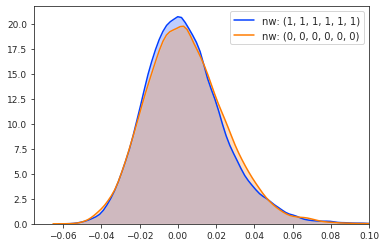

In [47]:
fig, ax = plt.subplots()
plaq_exact = u1_plaq_exact(beta)
y1 = plaq_exact - plaqs_l2hmc[1000:, :].flatten()
y2 = plaq_exact - np.array(run_data['plaqs'])[1000:, :].flatten()
sns.kdeplot(y1, shade=True, ax=ax, label='nw: (1, 1, 1, 1, 1, 1)')
sns.kdeplot(y2, shade=True, ax=ax, label='nw: (0, 0, 0, 0, 0, 0)')
xlim = ax.get_xlim()
ax.set_xlim(xlim[0], 0.1)

In [48]:
np.mean(plaq_exact - plaqs_l2hmc[1000:, :].flatten())

0.003576967539034197

In [51]:
np.mean(plaq_exact - np.array(run_data['plaqs'])[1000:, :].flatten())

0.004252842200499172

In [42]:
samples_dict['x_init'][-1]

array([[3.254, 4.414, 6.055, 2.176, 1.002, 2.068, 1.365, 3.05 , 0.252, 0.276, 2.368, 0.737, 4.537, 2.177, 4.177, ..., 1.612, 3.616, 2.809, 2.92 , 3.533, 1.286, 0.65 , 4.193, 2.916, 0.861, 5.983, 1.812, 3.646, 0.175, 2.688],
       [2.982, 4.897, 6.238, 2.803, 2.979, 3.388, 0.431, 1.326, 5.468, 3.339, 3.002, 0.669, 4.691, 3.611, 0.716, ..., 0.285, 6.13 , 5.896, 3.765, 2.361, 4.781, 3.682, 2.612, 4.557, 0.695, 4.338, 3.545, 0.671, 0.826, 2.342],
       [2.438, 1.624, 2.036, 3.337, 0.829, 2.151, 1.917, 3.534, 1.398, 1.435, 3.181, 2.084, 5.042, 1.375, 5.283, ..., 4.586, 4.672, 4.586, 2.873, 2.794, 2.316, 1.997, 3.824, 3.862, 1.668, 2.546, 1.054, 2.935, 6.256, 3.125],
       [1.846, 2.954, 2.916, 0.022, 4.214, 2.363, 5.781, 1.632, 3.774, 0.682, 2.221, 4.914, 5.019, 6.134, 1.628, ..., 4.236, 2.723, 5.441, 3.665, 4.993, 2.234, 2.012, 2.118, 0.376, 2.728, 3.778, 3.847, 4.217, 4.949, 5.871],
       [0.584, 5.852, 1.867, 5.947, 0.502, 1.707, 4.772, 0.137, 3.704, 1.343, 3.745, 5.754, 5.427, 1.576

In [43]:
samples_dict['x_proposed'][-1]

array([[ 6.389,  1.267,  9.205,  5.235,  4.151,  5.137,  4.499,  6.207,  3.343,  3.425,  5.51 ,  3.852,  7.647,  5.315,  1.085, ..., -1.558,  0.508, -0.292,  6.021, 12.977, -1.837,  3.785,  1.057, -0.25 ,  4.013,  9.055,  4.964,  6.683,  3.314,  5.758],
       [-0.151,  7.986,  3.157, -0.301, -0.206,  0.315, -2.694, -1.754,  2.314,  0.259, -0.132, -2.464,  1.586,  0.457,  3.774, ...,  3.402,  9.201,  8.927,  0.688, -7.11 ,  7.833,  0.522,  5.666,  7.618, -2.411,  1.163,  0.459, -2.405, -2.288, -0.69 ],
       [-0.634,  4.778, -1.116,  0.288, -2.287, -0.896, -1.153,  0.476, -1.677, -1.677,  0.055, -1.069,  1.995, -1.764,  8.547, ...,  7.669,  7.819,  7.744, -0.228, -6.598,  5.38 , -1.072,  6.884,  7.015, -1.413, -0.546, -2.136, -0.158,  3.161, -0.003],
       [-1.234,  6.116, -0.274, -3.09 ,  1.134, -0.739,  2.674, -1.487,  0.626, -2.42 , -0.972,  1.805,  1.893,  2.948,  4.694, ...,  7.326,  5.959,  8.546,  0.528, -4.369,  5.342, -1.106,  5.324,  3.517, -0.444,  0.636,  0.753,  1.137,  

In [45]:
samples_dict['x_out'][-1]

array([[ 6.389,  1.267,  9.205,  5.235,  4.151,  5.137,  4.499,  6.207,  3.343,  3.425,  5.51 ,  3.852,  7.647,  5.315,  1.085, ..., -1.558,  0.508, -0.292,  6.021, 12.977, -1.837,  3.785,  1.057, -0.25 ,  4.013,  9.055,  4.964,  6.683,  3.314,  5.758],
       [-0.151,  7.986,  3.157, -0.301, -0.206,  0.315, -2.694, -1.754,  2.314,  0.259, -0.132, -2.464,  1.586,  0.457,  3.774, ...,  3.402,  9.201,  8.927,  0.688, -7.11 ,  7.833,  0.522,  5.666,  7.618, -2.411,  1.163,  0.459, -2.405, -2.288, -0.69 ],
       [-0.634,  4.778, -1.116,  0.288, -2.287, -0.896, -1.153,  0.476, -1.677, -1.677,  0.055, -1.069,  1.995, -1.764,  8.547, ...,  7.669,  7.819,  7.744, -0.228, -6.598,  5.38 , -1.072,  6.884,  7.015, -1.413, -0.546, -2.136, -0.158,  3.161, -0.003],
       [-1.234,  6.116, -0.274, -3.09 ,  1.134, -0.739,  2.674, -1.487,  0.626, -2.42 , -0.972,  1.805,  1.893,  2.948,  4.694, ...,  7.326,  5.959,  8.546,  0.528, -4.369,  5.342, -1.106,  5.324,  3.517, -0.444,  0.636,  0.753,  1.137,  

In [10]:
rd = os.path.join(log_dir ,'runs', 'steps20000_beta50_eps00402_x000_v000_random/')
od = os.path.join(rd, 'observables')
rdata = {}
files = [os.path.join(od, f'{i}') for i in os.listdir(od) if i.endswith('.pkl')]
for f in files:
    name = f.split('/')[-1].rstrip('.pkl')
    with open(f, 'rb') as ff:
        rdata[name] = pickle.load(ff)
         

rdata = {}
files = [os.path.join(observables_dir, f'{i}') for i in os.listdir(observables_dir) if i.endswith('.pkl')]
for f in files:
    name = f.split('/')[-1].rstrip('.pkl')
    with open(f, 'rb') as ff:
        rdata[name] = pickle.load(ff)

energy_data_file = os.path.join(rd, 'energy_data_tf.pkl')
with open(energy_data_file, 'rb') as f:
    energy_data = pickle.load(f)

for key, val in energy_data.items():
    print(f'{key}: {np.array(val).shape}\n')

for key, val in run_data.items():
    print(f'{key}: {np.array(val).shape}\n')

for key, val in rdata.items():
    print(f'{key}: {np.array(val).shape}\n')

In [32]:
from lattice.lattice import u1_plaq_exact

run_data_hmc = {
    'dxf': [],
    'dxb': [],
    'accept_prob': [],
}
observables_hmc = {
    'plaqs': [],
    'actions': [],
    'charges': [],
}

beta = 5.
x_dim = time_size * space_size * dim
samples = np.random.randn(batch_size, x_dim)
net_weights = NetWeights(0, 0, 0, 0, 0, 0)

plaq_exact = u1_plaq_exact(beta)

run_steps = 5000
for step in range(run_steps):
    output = dynamics.apply_transition(samples, beta, net_weights,
                                       model_type='GaugeModel')
    samples = output['x_out']
    
    
    samples = np.mod(samples, 2 * np.pi)
    obs = lattice.calc_observables_np(samples=samples)
    for key, val in obs.items():
        observables_hmc[key].append(val)
        
    dxf = calc_dx(output['x_init'], output['xf'])
    dxb = calc_dx(output['x_init'], output['xb'])
    
    run_data_hmc['dxf'].append(dxf)
    run_data_hmc['dxb'].append(dxb)
    run_data_hmc['accept_prob'].append(output['accept_prob'])
    
    plaq_diff = plaq_exact - obs['plaqs']
    
    px = np.mean(output['accept_prob'])
    print(f'step: {step}/{run_steps},  '
          f'accept_prob: {px:.3g},  '
          f'dxf: {dxf.mean():.3g},  '
          f'dxb: {dxb.mean():.3g},  '
          f'plaq_diff: {plaq_diff.mean():.4g} +/- {plaq_diff.std():.4g}')

step: 0/5000,  accept_prob: 0.998,  dxf: 0.000815,  dxb: 0.000828,  plaq_diff: 0.7497 +/- 0.08681
step: 1/5000,  accept_prob: 0.997,  dxf: 0.000812,  dxb: 0.000818,  plaq_diff: 0.742 +/- 0.08681
step: 2/5000,  accept_prob: 0.998,  dxf: 0.000823,  dxb: 0.000828,  plaq_diff: 0.7328 +/- 0.08759
step: 3/5000,  accept_prob: 0.998,  dxf: 0.000831,  dxb: 0.000833,  plaq_diff: 0.7259 +/- 0.08759
step: 4/5000,  accept_prob: 0.998,  dxf: 0.000806,  dxb: 0.0008,  plaq_diff: 0.7184 +/- 0.08786
step: 5/5000,  accept_prob: 0.998,  dxf: 0.000828,  dxb: 0.00081,  plaq_diff: 0.711 +/- 0.08755
step: 6/5000,  accept_prob: 0.997,  dxf: 0.00081,  dxb: 0.000793,  plaq_diff: 0.704 +/- 0.08785
step: 7/5000,  accept_prob: 0.997,  dxf: 0.000797,  dxb: 0.00081,  plaq_diff: 0.6964 +/- 0.08795
step: 8/5000,  accept_prob: 0.998,  dxf: 0.000815,  dxb: 0.00081,  plaq_diff: 0.6894 +/- 0.08858
step: 9/5000,  accept_prob: 0.997,  dxf: 0.000833,  dxb: 0.000827,  plaq_diff: 0.6814 +/- 0.08741
step: 10/5000,  accept_prob: 

step: 90/5000,  accept_prob: 0.996,  dxf: 0.000815,  dxb: 0.000819,  plaq_diff: 0.2931 +/- 0.05876
step: 91/5000,  accept_prob: 0.996,  dxf: 0.00079,  dxb: 0.000798,  plaq_diff: 0.2912 +/- 0.05765
step: 92/5000,  accept_prob: 0.997,  dxf: 0.000812,  dxb: 0.00085,  plaq_diff: 0.288 +/- 0.05745
step: 93/5000,  accept_prob: 0.996,  dxf: 0.000798,  dxb: 0.000816,  plaq_diff: 0.2855 +/- 0.05745
step: 94/5000,  accept_prob: 0.997,  dxf: 0.000801,  dxb: 0.000813,  plaq_diff: 0.2825 +/- 0.05712
step: 95/5000,  accept_prob: 0.997,  dxf: 0.0008,  dxb: 0.00081,  plaq_diff: 0.2806 +/- 0.05702
step: 96/5000,  accept_prob: 0.997,  dxf: 0.000813,  dxb: 0.000796,  plaq_diff: 0.2769 +/- 0.0567
step: 97/5000,  accept_prob: 0.996,  dxf: 0.000807,  dxb: 0.000813,  plaq_diff: 0.2747 +/- 0.05816
step: 98/5000,  accept_prob: 0.996,  dxf: 0.000794,  dxb: 0.00082,  plaq_diff: 0.2714 +/- 0.05793
step: 99/5000,  accept_prob: 0.997,  dxf: 0.000813,  dxb: 0.000793,  plaq_diff: 0.2687 +/- 0.05766
step: 100/5000,  a

step: 180/5000,  accept_prob: 0.996,  dxf: 0.000786,  dxb: 0.000809,  plaq_diff: 0.1199 +/- 0.04411
step: 181/5000,  accept_prob: 0.996,  dxf: 0.000819,  dxb: 0.000815,  plaq_diff: 0.1192 +/- 0.04417
step: 182/5000,  accept_prob: 0.996,  dxf: 0.000802,  dxb: 0.000809,  plaq_diff: 0.1171 +/- 0.04387
step: 183/5000,  accept_prob: 0.996,  dxf: 0.000815,  dxb: 0.00083,  plaq_diff: 0.1154 +/- 0.04354
step: 184/5000,  accept_prob: 0.996,  dxf: 0.000816,  dxb: 0.0008,  plaq_diff: 0.1135 +/- 0.04396
step: 185/5000,  accept_prob: 0.997,  dxf: 0.000788,  dxb: 0.000819,  plaq_diff: 0.1119 +/- 0.04395
step: 186/5000,  accept_prob: 0.996,  dxf: 0.000821,  dxb: 0.000804,  plaq_diff: 0.1107 +/- 0.04405
step: 187/5000,  accept_prob: 0.994,  dxf: 0.000814,  dxb: 0.000838,  plaq_diff: 0.1103 +/- 0.04353
step: 188/5000,  accept_prob: 0.996,  dxf: 0.000809,  dxb: 0.000807,  plaq_diff: 0.1094 +/- 0.04257
step: 189/5000,  accept_prob: 0.995,  dxf: 0.000816,  dxb: 0.000814,  plaq_diff: 0.1083 +/- 0.04284
ste

step: 270/5000,  accept_prob: 0.994,  dxf: 0.00078,  dxb: 0.000816,  plaq_diff: 0.05958 +/- 0.03576
step: 271/5000,  accept_prob: 0.994,  dxf: 0.00082,  dxb: 0.000823,  plaq_diff: 0.05956 +/- 0.0347
step: 272/5000,  accept_prob: 0.996,  dxf: 0.000829,  dxb: 0.000831,  plaq_diff: 0.05826 +/- 0.03425
step: 273/5000,  accept_prob: 0.996,  dxf: 0.000823,  dxb: 0.000807,  plaq_diff: 0.05786 +/- 0.03494
step: 274/5000,  accept_prob: 0.996,  dxf: 0.000807,  dxb: 0.000825,  plaq_diff: 0.05648 +/- 0.03474
step: 275/5000,  accept_prob: 0.995,  dxf: 0.000824,  dxb: 0.00081,  plaq_diff: 0.05635 +/- 0.0345
step: 276/5000,  accept_prob: 0.996,  dxf: 0.00082,  dxb: 0.000812,  plaq_diff: 0.05604 +/- 0.03452
step: 277/5000,  accept_prob: 0.996,  dxf: 0.000828,  dxb: 0.000801,  plaq_diff: 0.0553 +/- 0.03457
step: 278/5000,  accept_prob: 0.995,  dxf: 0.000809,  dxb: 0.000823,  plaq_diff: 0.05503 +/- 0.03475
step: 279/5000,  accept_prob: 0.994,  dxf: 0.000811,  dxb: 0.000799,  plaq_diff: 0.05512 +/- 0.034

step: 360/5000,  accept_prob: 0.995,  dxf: 0.000807,  dxb: 0.000798,  plaq_diff: 0.03178 +/- 0.03186
step: 361/5000,  accept_prob: 0.995,  dxf: 0.000806,  dxb: 0.000822,  plaq_diff: 0.03139 +/- 0.0317
step: 362/5000,  accept_prob: 0.994,  dxf: 0.000819,  dxb: 0.000814,  plaq_diff: 0.03132 +/- 0.03136
step: 363/5000,  accept_prob: 0.993,  dxf: 0.000806,  dxb: 0.000792,  plaq_diff: 0.03197 +/- 0.03104
step: 364/5000,  accept_prob: 0.995,  dxf: 0.000787,  dxb: 0.000819,  plaq_diff: 0.03149 +/- 0.03018
step: 365/5000,  accept_prob: 0.996,  dxf: 0.000805,  dxb: 0.000815,  plaq_diff: 0.03047 +/- 0.02982
step: 366/5000,  accept_prob: 0.995,  dxf: 0.000798,  dxb: 0.000799,  plaq_diff: 0.03062 +/- 0.03009
step: 367/5000,  accept_prob: 0.994,  dxf: 0.000822,  dxb: 0.000817,  plaq_diff: 0.03059 +/- 0.03006
step: 368/5000,  accept_prob: 0.996,  dxf: 0.000806,  dxb: 0.00079,  plaq_diff: 0.03016 +/- 0.02986
step: 369/5000,  accept_prob: 0.993,  dxf: 0.000802,  dxb: 0.000803,  plaq_diff: 0.03063 +/- 

step: 450/5000,  accept_prob: 0.996,  dxf: 0.000793,  dxb: 0.000813,  plaq_diff: 0.01807 +/- 0.02341
step: 451/5000,  accept_prob: 0.996,  dxf: 0.000816,  dxb: 0.000807,  plaq_diff: 0.01708 +/- 0.02393
step: 452/5000,  accept_prob: 0.994,  dxf: 0.000805,  dxb: 0.000801,  plaq_diff: 0.01709 +/- 0.02382
step: 453/5000,  accept_prob: 0.995,  dxf: 0.000791,  dxb: 0.00081,  plaq_diff: 0.01718 +/- 0.02384
step: 454/5000,  accept_prob: 0.995,  dxf: 0.000819,  dxb: 0.000816,  plaq_diff: 0.01705 +/- 0.02383
step: 455/5000,  accept_prob: 0.992,  dxf: 0.000803,  dxb: 0.000824,  plaq_diff: 0.01793 +/- 0.02418
step: 456/5000,  accept_prob: 0.995,  dxf: 0.000808,  dxb: 0.000797,  plaq_diff: 0.01755 +/- 0.02355
step: 457/5000,  accept_prob: 0.995,  dxf: 0.000838,  dxb: 0.000811,  plaq_diff: 0.01717 +/- 0.02408
step: 458/5000,  accept_prob: 0.996,  dxf: 0.00082,  dxb: 0.000815,  plaq_diff: 0.01629 +/- 0.02374
step: 459/5000,  accept_prob: 0.993,  dxf: 0.000815,  dxb: 0.000809,  plaq_diff: 0.01675 +/- 

step: 540/5000,  accept_prob: 0.995,  dxf: 0.000844,  dxb: 0.000802,  plaq_diff: 0.01077 +/- 0.02467
step: 541/5000,  accept_prob: 0.993,  dxf: 0.000805,  dxb: 0.000803,  plaq_diff: 0.0118 +/- 0.02486
step: 542/5000,  accept_prob: 0.996,  dxf: 0.0008,  dxb: 0.000818,  plaq_diff: 0.01178 +/- 0.02551
step: 543/5000,  accept_prob: 0.994,  dxf: 0.000822,  dxb: 0.000814,  plaq_diff: 0.01173 +/- 0.02591
step: 544/5000,  accept_prob: 0.996,  dxf: 0.000808,  dxb: 0.000801,  plaq_diff: 0.01097 +/- 0.02583
step: 545/5000,  accept_prob: 0.994,  dxf: 0.000807,  dxb: 0.000824,  plaq_diff: 0.01146 +/- 0.02518
step: 546/5000,  accept_prob: 0.996,  dxf: 0.000793,  dxb: 0.000792,  plaq_diff: 0.01052 +/- 0.02399
step: 547/5000,  accept_prob: 0.994,  dxf: 0.000793,  dxb: 0.00081,  plaq_diff: 0.01119 +/- 0.02361
step: 548/5000,  accept_prob: 0.997,  dxf: 0.00081,  dxb: 0.00081,  plaq_diff: 0.01061 +/- 0.02323
step: 549/5000,  accept_prob: 0.995,  dxf: 0.000816,  dxb: 0.000806,  plaq_diff: 0.01101 +/- 0.02

step: 630/5000,  accept_prob: 0.994,  dxf: 0.000803,  dxb: 0.000825,  plaq_diff: 0.008776 +/- 0.02257
step: 631/5000,  accept_prob: 0.992,  dxf: 0.000796,  dxb: 0.000817,  plaq_diff: 0.01016 +/- 0.02232
step: 632/5000,  accept_prob: 0.996,  dxf: 0.000821,  dxb: 0.000803,  plaq_diff: 0.008825 +/- 0.02256
step: 633/5000,  accept_prob: 0.995,  dxf: 0.00079,  dxb: 0.000814,  plaq_diff: 0.008581 +/- 0.02239
step: 634/5000,  accept_prob: 0.996,  dxf: 0.000824,  dxb: 0.000817,  plaq_diff: 0.008153 +/- 0.02206
step: 635/5000,  accept_prob: 0.996,  dxf: 0.000819,  dxb: 0.000805,  plaq_diff: 0.007693 +/- 0.0223
step: 636/5000,  accept_prob: 0.995,  dxf: 0.000789,  dxb: 0.000808,  plaq_diff: 0.007603 +/- 0.0224
step: 637/5000,  accept_prob: 0.994,  dxf: 0.0008,  dxb: 0.000815,  plaq_diff: 0.00772 +/- 0.02256
step: 638/5000,  accept_prob: 0.993,  dxf: 0.0008,  dxb: 0.000815,  plaq_diff: 0.007996 +/- 0.02286
step: 639/5000,  accept_prob: 0.994,  dxf: 0.000805,  dxb: 0.000804,  plaq_diff: 0.008399 +

step: 711/5000,  accept_prob: 0.994,  dxf: 0.000812,  dxb: 0.000804,  plaq_diff: 0.008126 +/- 0.02355
step: 712/5000,  accept_prob: 0.994,  dxf: 0.000816,  dxb: 0.000804,  plaq_diff: 0.007851 +/- 0.02489
step: 713/5000,  accept_prob: 0.995,  dxf: 0.000818,  dxb: 0.000811,  plaq_diff: 0.008077 +/- 0.02463
step: 714/5000,  accept_prob: 0.992,  dxf: 0.000803,  dxb: 0.000829,  plaq_diff: 0.009311 +/- 0.02383
step: 715/5000,  accept_prob: 0.995,  dxf: 0.000801,  dxb: 0.000787,  plaq_diff: 0.009264 +/- 0.02377
step: 716/5000,  accept_prob: 0.996,  dxf: 0.000803,  dxb: 0.000831,  plaq_diff: 0.009067 +/- 0.0229
step: 717/5000,  accept_prob: 0.993,  dxf: 0.00081,  dxb: 0.000814,  plaq_diff: 0.009187 +/- 0.02264
step: 718/5000,  accept_prob: 0.993,  dxf: 0.000805,  dxb: 0.000828,  plaq_diff: 0.00916 +/- 0.02262
step: 719/5000,  accept_prob: 0.996,  dxf: 0.000798,  dxb: 0.000809,  plaq_diff: 0.008893 +/- 0.023
step: 720/5000,  accept_prob: 0.995,  dxf: 0.000808,  dxb: 0.000809,  plaq_diff: 0.0089

step: 792/5000,  accept_prob: 0.996,  dxf: 0.00081,  dxb: 0.000804,  plaq_diff: 0.006591 +/- 0.02224
step: 793/5000,  accept_prob: 0.994,  dxf: 0.000782,  dxb: 0.000813,  plaq_diff: 0.006499 +/- 0.02256
step: 794/5000,  accept_prob: 0.995,  dxf: 0.000792,  dxb: 0.000812,  plaq_diff: 0.006872 +/- 0.02349
step: 795/5000,  accept_prob: 0.993,  dxf: 0.000796,  dxb: 0.000792,  plaq_diff: 0.007633 +/- 0.02325
step: 796/5000,  accept_prob: 0.993,  dxf: 0.000818,  dxb: 0.000808,  plaq_diff: 0.007764 +/- 0.02322
step: 797/5000,  accept_prob: 0.994,  dxf: 0.000809,  dxb: 0.000821,  plaq_diff: 0.007939 +/- 0.02235
step: 798/5000,  accept_prob: 0.995,  dxf: 0.000803,  dxb: 0.000816,  plaq_diff: 0.00803 +/- 0.02189
step: 799/5000,  accept_prob: 0.994,  dxf: 0.00081,  dxb: 0.000794,  plaq_diff: 0.008778 +/- 0.02219
step: 800/5000,  accept_prob: 0.994,  dxf: 0.000832,  dxb: 0.000799,  plaq_diff: 0.008557 +/- 0.02224
step: 801/5000,  accept_prob: 0.993,  dxf: 0.000812,  dxb: 0.000808,  plaq_diff: 0.00

step: 873/5000,  accept_prob: 0.996,  dxf: 0.00081,  dxb: 0.000822,  plaq_diff: 0.00505 +/- 0.02365
step: 874/5000,  accept_prob: 0.994,  dxf: 0.000786,  dxb: 0.00082,  plaq_diff: 0.005257 +/- 0.02228
step: 875/5000,  accept_prob: 0.995,  dxf: 0.000812,  dxb: 0.000796,  plaq_diff: 0.005587 +/- 0.02202
step: 876/5000,  accept_prob: 0.995,  dxf: 0.000822,  dxb: 0.000813,  plaq_diff: 0.005391 +/- 0.0224
step: 877/5000,  accept_prob: 0.996,  dxf: 0.000829,  dxb: 0.000791,  plaq_diff: 0.005252 +/- 0.02319
step: 878/5000,  accept_prob: 0.994,  dxf: 0.000788,  dxb: 0.000823,  plaq_diff: 0.005437 +/- 0.02281
step: 879/5000,  accept_prob: 0.995,  dxf: 0.000806,  dxb: 0.000783,  plaq_diff: 0.005482 +/- 0.02152
step: 880/5000,  accept_prob: 0.995,  dxf: 0.000809,  dxb: 0.000803,  plaq_diff: 0.005093 +/- 0.0209
step: 881/5000,  accept_prob: 0.995,  dxf: 0.000814,  dxb: 0.000816,  plaq_diff: 0.004788 +/- 0.0212
step: 882/5000,  accept_prob: 0.994,  dxf: 0.000809,  dxb: 0.000821,  plaq_diff: 0.00432

step: 954/5000,  accept_prob: 0.995,  dxf: 0.000777,  dxb: 0.000823,  plaq_diff: 0.007262 +/- 0.02389
step: 955/5000,  accept_prob: 0.995,  dxf: 0.00083,  dxb: 0.000824,  plaq_diff: 0.006946 +/- 0.02414
step: 956/5000,  accept_prob: 0.995,  dxf: 0.000808,  dxb: 0.000823,  plaq_diff: 0.006634 +/- 0.02345
step: 957/5000,  accept_prob: 0.994,  dxf: 0.000794,  dxb: 0.000805,  plaq_diff: 0.006401 +/- 0.02425
step: 958/5000,  accept_prob: 0.996,  dxf: 0.000818,  dxb: 0.000796,  plaq_diff: 0.006189 +/- 0.02452
step: 959/5000,  accept_prob: 0.994,  dxf: 0.000824,  dxb: 0.000798,  plaq_diff: 0.006438 +/- 0.02429
step: 960/5000,  accept_prob: 0.996,  dxf: 0.000813,  dxb: 0.000788,  plaq_diff: 0.005706 +/- 0.02488
step: 961/5000,  accept_prob: 0.995,  dxf: 0.0008,  dxb: 0.000805,  plaq_diff: 0.005823 +/- 0.0256
step: 962/5000,  accept_prob: 0.995,  dxf: 0.00081,  dxb: 0.000811,  plaq_diff: 0.0054 +/- 0.02593
step: 963/5000,  accept_prob: 0.996,  dxf: 0.000804,  dxb: 0.000802,  plaq_diff: 0.004849

step: 1035/5000,  accept_prob: 0.994,  dxf: 0.000812,  dxb: 0.000811,  plaq_diff: 0.003526 +/- 0.02016
step: 1036/5000,  accept_prob: 0.995,  dxf: 0.000803,  dxb: 0.000795,  plaq_diff: 0.003276 +/- 0.01963
step: 1037/5000,  accept_prob: 0.995,  dxf: 0.00081,  dxb: 0.000811,  plaq_diff: 0.003288 +/- 0.02028
step: 1038/5000,  accept_prob: 0.994,  dxf: 0.000818,  dxb: 0.000804,  plaq_diff: 0.003402 +/- 0.01971
step: 1039/5000,  accept_prob: 0.994,  dxf: 0.000797,  dxb: 0.000814,  plaq_diff: 0.003599 +/- 0.02022
step: 1040/5000,  accept_prob: 0.993,  dxf: 0.000808,  dxb: 0.000804,  plaq_diff: 0.004167 +/- 0.02016
step: 1041/5000,  accept_prob: 0.997,  dxf: 0.000805,  dxb: 0.000826,  plaq_diff: 0.002881 +/- 0.01998
step: 1042/5000,  accept_prob: 0.995,  dxf: 0.000817,  dxb: 0.0008,  plaq_diff: 0.002726 +/- 0.01899
step: 1043/5000,  accept_prob: 0.994,  dxf: 0.000792,  dxb: 0.000819,  plaq_diff: 0.003231 +/- 0.01874
step: 1044/5000,  accept_prob: 0.994,  dxf: 0.000825,  dxb: 0.000803,  plaq_

step: 1116/5000,  accept_prob: 0.996,  dxf: 0.0008,  dxb: 0.000812,  plaq_diff: 0.004055 +/- 0.02217
step: 1117/5000,  accept_prob: 0.994,  dxf: 0.000794,  dxb: 0.000818,  plaq_diff: 0.003979 +/- 0.02272
step: 1118/5000,  accept_prob: 0.994,  dxf: 0.000831,  dxb: 0.000825,  plaq_diff: 0.004181 +/- 0.02304
step: 1119/5000,  accept_prob: 0.997,  dxf: 0.0008,  dxb: 0.000799,  plaq_diff: 0.003332 +/- 0.02323
step: 1120/5000,  accept_prob: 0.995,  dxf: 0.000818,  dxb: 0.000817,  plaq_diff: 0.0028 +/- 0.02335
step: 1121/5000,  accept_prob: 0.995,  dxf: 0.000825,  dxb: 0.000831,  plaq_diff: 0.002831 +/- 0.02308
step: 1122/5000,  accept_prob: 0.995,  dxf: 0.000805,  dxb: 0.000803,  plaq_diff: 0.00252 +/- 0.02356
step: 1123/5000,  accept_prob: 0.994,  dxf: 0.000805,  dxb: 0.000766,  plaq_diff: 0.00301 +/- 0.023
step: 1124/5000,  accept_prob: 0.993,  dxf: 0.000812,  dxb: 0.000812,  plaq_diff: 0.003883 +/- 0.02291
step: 1125/5000,  accept_prob: 0.994,  dxf: 0.000806,  dxb: 0.000808,  plaq_diff: 0

step: 1197/5000,  accept_prob: 0.995,  dxf: 0.000823,  dxb: 0.000818,  plaq_diff: 0.001965 +/- 0.01999
step: 1198/5000,  accept_prob: 0.993,  dxf: 0.000825,  dxb: 0.000808,  plaq_diff: 0.003447 +/- 0.01958
step: 1199/5000,  accept_prob: 0.995,  dxf: 0.000807,  dxb: 0.000803,  plaq_diff: 0.002825 +/- 0.01997
step: 1200/5000,  accept_prob: 0.993,  dxf: 0.000822,  dxb: 0.000817,  plaq_diff: 0.002893 +/- 0.01956
step: 1201/5000,  accept_prob: 0.995,  dxf: 0.000818,  dxb: 0.000817,  plaq_diff: 0.003159 +/- 0.02055
step: 1202/5000,  accept_prob: 0.994,  dxf: 0.000823,  dxb: 0.000826,  plaq_diff: 0.003881 +/- 0.02074
step: 1203/5000,  accept_prob: 0.993,  dxf: 0.000815,  dxb: 0.000817,  plaq_diff: 0.004064 +/- 0.02139
step: 1204/5000,  accept_prob: 0.994,  dxf: 0.000787,  dxb: 0.000788,  plaq_diff: 0.004486 +/- 0.02109
step: 1205/5000,  accept_prob: 0.996,  dxf: 0.000807,  dxb: 0.000797,  plaq_diff: 0.003979 +/- 0.02084
step: 1206/5000,  accept_prob: 0.994,  dxf: 0.000805,  dxb: 0.000821,  pl

step: 1278/5000,  accept_prob: 0.994,  dxf: 0.00081,  dxb: 0.00083,  plaq_diff: 0.00191 +/- 0.02261
step: 1279/5000,  accept_prob: 0.994,  dxf: 0.000802,  dxb: 0.00081,  plaq_diff: 0.002303 +/- 0.02282
step: 1280/5000,  accept_prob: 0.994,  dxf: 0.000785,  dxb: 0.000824,  plaq_diff: 0.002798 +/- 0.02307
step: 1281/5000,  accept_prob: 0.995,  dxf: 0.000797,  dxb: 0.000799,  plaq_diff: 0.002891 +/- 0.02382
step: 1282/5000,  accept_prob: 0.996,  dxf: 0.000812,  dxb: 0.000795,  plaq_diff: 0.002602 +/- 0.02426
step: 1283/5000,  accept_prob: 0.994,  dxf: 0.000816,  dxb: 0.000789,  plaq_diff: 0.003085 +/- 0.02429
step: 1284/5000,  accept_prob: 0.995,  dxf: 0.000795,  dxb: 0.000839,  plaq_diff: 0.002502 +/- 0.02288
step: 1285/5000,  accept_prob: 0.994,  dxf: 0.00083,  dxb: 0.000816,  plaq_diff: 0.003284 +/- 0.02362
step: 1286/5000,  accept_prob: 0.995,  dxf: 0.000815,  dxb: 0.000797,  plaq_diff: 0.002643 +/- 0.0222
step: 1287/5000,  accept_prob: 0.993,  dxf: 0.000832,  dxb: 0.000806,  plaq_dif

step: 1359/5000,  accept_prob: 0.994,  dxf: 0.000819,  dxb: 0.000813,  plaq_diff: 0.007135 +/- 0.0264
step: 1360/5000,  accept_prob: 0.994,  dxf: 0.000805,  dxb: 0.000813,  plaq_diff: 0.007611 +/- 0.0248
step: 1361/5000,  accept_prob: 0.995,  dxf: 0.000843,  dxb: 0.000801,  plaq_diff: 0.007608 +/- 0.02496
step: 1362/5000,  accept_prob: 0.995,  dxf: 0.000792,  dxb: 0.000801,  plaq_diff: 0.007426 +/- 0.02461
step: 1363/5000,  accept_prob: 0.995,  dxf: 0.000806,  dxb: 0.000825,  plaq_diff: 0.007093 +/- 0.02391
step: 1364/5000,  accept_prob: 0.996,  dxf: 0.000799,  dxb: 0.000822,  plaq_diff: 0.006749 +/- 0.02394
step: 1365/5000,  accept_prob: 0.994,  dxf: 0.000808,  dxb: 0.000823,  plaq_diff: 0.007358 +/- 0.02222
step: 1366/5000,  accept_prob: 0.994,  dxf: 0.000822,  dxb: 0.000814,  plaq_diff: 0.007978 +/- 0.02124
step: 1367/5000,  accept_prob: 0.995,  dxf: 0.000818,  dxb: 0.000813,  plaq_diff: 0.007868 +/- 0.02029
step: 1368/5000,  accept_prob: 0.993,  dxf: 0.000792,  dxb: 0.000797,  plaq

step: 1445/5000,  accept_prob: 0.995,  dxf: 0.000816,  dxb: 0.000799,  plaq_diff: 0.00863 +/- 0.02318
step: 1446/5000,  accept_prob: 0.993,  dxf: 0.0008,  dxb: 0.000807,  plaq_diff: 0.009013 +/- 0.02265
step: 1447/5000,  accept_prob: 0.995,  dxf: 0.000815,  dxb: 0.000801,  plaq_diff: 0.008203 +/- 0.02195
step: 1448/5000,  accept_prob: 0.995,  dxf: 0.000809,  dxb: 0.000793,  plaq_diff: 0.008252 +/- 0.02233
step: 1449/5000,  accept_prob: 0.994,  dxf: 0.000814,  dxb: 0.000795,  plaq_diff: 0.00873 +/- 0.0227
step: 1450/5000,  accept_prob: 0.996,  dxf: 0.000831,  dxb: 0.000823,  plaq_diff: 0.008158 +/- 0.02328
step: 1451/5000,  accept_prob: 0.994,  dxf: 0.000805,  dxb: 0.000817,  plaq_diff: 0.008204 +/- 0.02295
step: 1452/5000,  accept_prob: 0.994,  dxf: 0.000812,  dxb: 0.000792,  plaq_diff: 0.008069 +/- 0.02308
step: 1453/5000,  accept_prob: 0.995,  dxf: 0.000813,  dxb: 0.000804,  plaq_diff: 0.007434 +/- 0.02316
step: 1454/5000,  accept_prob: 0.995,  dxf: 0.000828,  dxb: 0.000798,  plaq_di

step: 1526/5000,  accept_prob: 0.994,  dxf: 0.00079,  dxb: 0.000822,  plaq_diff: 0.0028 +/- 0.02172
step: 1527/5000,  accept_prob: 0.995,  dxf: 0.000807,  dxb: 0.000803,  plaq_diff: 0.002138 +/- 0.02142
step: 1528/5000,  accept_prob: 0.995,  dxf: 0.000815,  dxb: 0.000809,  plaq_diff: 0.002248 +/- 0.02138
step: 1529/5000,  accept_prob: 0.995,  dxf: 0.000828,  dxb: 0.000815,  plaq_diff: 0.0015 +/- 0.02164
step: 1530/5000,  accept_prob: 0.995,  dxf: 0.000817,  dxb: 0.00081,  plaq_diff: 0.001696 +/- 0.01984
step: 1531/5000,  accept_prob: 0.995,  dxf: 0.0008,  dxb: 0.000841,  plaq_diff: 0.002304 +/- 0.02079
step: 1532/5000,  accept_prob: 0.994,  dxf: 0.000824,  dxb: 0.000814,  plaq_diff: 0.002465 +/- 0.02123
step: 1533/5000,  accept_prob: 0.994,  dxf: 0.000812,  dxb: 0.000805,  plaq_diff: 0.00267 +/- 0.02152
step: 1534/5000,  accept_prob: 0.993,  dxf: 0.000803,  dxb: 0.000804,  plaq_diff: 0.003514 +/- 0.02233
step: 1535/5000,  accept_prob: 0.994,  dxf: 0.000851,  dxb: 0.000817,  plaq_diff: 

step: 1607/5000,  accept_prob: 0.995,  dxf: 0.000812,  dxb: 0.000809,  plaq_diff: 0.002912 +/- 0.0195
step: 1608/5000,  accept_prob: 0.994,  dxf: 0.000814,  dxb: 0.000818,  plaq_diff: 0.002935 +/- 0.02059
step: 1609/5000,  accept_prob: 0.994,  dxf: 0.000817,  dxb: 0.000823,  plaq_diff: 0.002827 +/- 0.02147
step: 1610/5000,  accept_prob: 0.994,  dxf: 0.000809,  dxb: 0.00083,  plaq_diff: 0.002847 +/- 0.02214
step: 1611/5000,  accept_prob: 0.996,  dxf: 0.000812,  dxb: 0.000806,  plaq_diff: 0.002464 +/- 0.02242
step: 1612/5000,  accept_prob: 0.994,  dxf: 0.000809,  dxb: 0.000812,  plaq_diff: 0.002796 +/- 0.02159
step: 1613/5000,  accept_prob: 0.993,  dxf: 0.000811,  dxb: 0.000798,  plaq_diff: 0.003461 +/- 0.02085
step: 1614/5000,  accept_prob: 0.994,  dxf: 0.000834,  dxb: 0.000798,  plaq_diff: 0.003104 +/- 0.02067
step: 1615/5000,  accept_prob: 0.995,  dxf: 0.00081,  dxb: 0.000786,  plaq_diff: 0.003581 +/- 0.02062
step: 1616/5000,  accept_prob: 0.994,  dxf: 0.000807,  dxb: 0.000805,  plaq_

step: 1688/5000,  accept_prob: 0.996,  dxf: 0.000791,  dxb: 0.000776,  plaq_diff: 0.005988 +/- 0.02418
step: 1689/5000,  accept_prob: 0.994,  dxf: 0.000788,  dxb: 0.00081,  plaq_diff: 0.006907 +/- 0.0243
step: 1690/5000,  accept_prob: 0.993,  dxf: 0.000816,  dxb: 0.000796,  plaq_diff: 0.007216 +/- 0.02371
step: 1691/5000,  accept_prob: 0.994,  dxf: 0.000804,  dxb: 0.000811,  plaq_diff: 0.007741 +/- 0.02443
step: 1692/5000,  accept_prob: 0.996,  dxf: 0.000831,  dxb: 0.000812,  plaq_diff: 0.007392 +/- 0.02368
step: 1693/5000,  accept_prob: 0.994,  dxf: 0.000814,  dxb: 0.000802,  plaq_diff: 0.007596 +/- 0.02376
step: 1694/5000,  accept_prob: 0.994,  dxf: 0.000799,  dxb: 0.000778,  plaq_diff: 0.008102 +/- 0.02388
step: 1695/5000,  accept_prob: 0.996,  dxf: 0.000809,  dxb: 0.000788,  plaq_diff: 0.00781 +/- 0.02364
step: 1696/5000,  accept_prob: 0.994,  dxf: 0.00081,  dxb: 0.000824,  plaq_diff: 0.007567 +/- 0.02289
step: 1697/5000,  accept_prob: 0.995,  dxf: 0.000823,  dxb: 0.000807,  plaq_d

step: 1768/5000,  accept_prob: 0.995,  dxf: 0.000788,  dxb: 0.000831,  plaq_diff: 0.003434 +/- 0.02126
step: 1769/5000,  accept_prob: 0.995,  dxf: 0.000791,  dxb: 0.000821,  plaq_diff: 0.003981 +/- 0.0209
step: 1770/5000,  accept_prob: 0.994,  dxf: 0.000813,  dxb: 0.000793,  plaq_diff: 0.00452 +/- 0.02073
step: 1771/5000,  accept_prob: 0.994,  dxf: 0.000825,  dxb: 0.000818,  plaq_diff: 0.004929 +/- 0.02088
step: 1772/5000,  accept_prob: 0.994,  dxf: 0.000797,  dxb: 0.000821,  plaq_diff: 0.005595 +/- 0.02006
step: 1773/5000,  accept_prob: 0.996,  dxf: 0.000786,  dxb: 0.000836,  plaq_diff: 0.004846 +/- 0.02002
step: 1774/5000,  accept_prob: 0.994,  dxf: 0.000815,  dxb: 0.000814,  plaq_diff: 0.005192 +/- 0.02016
step: 1775/5000,  accept_prob: 0.994,  dxf: 0.000821,  dxb: 0.000821,  plaq_diff: 0.004786 +/- 0.01962
step: 1776/5000,  accept_prob: 0.993,  dxf: 0.000833,  dxb: 0.000813,  plaq_diff: 0.005195 +/- 0.02002
step: 1777/5000,  accept_prob: 0.993,  dxf: 0.000805,  dxb: 0.000802,  plaq

step: 1849/5000,  accept_prob: 0.996,  dxf: 0.000813,  dxb: 0.000805,  plaq_diff: 0.001557 +/- 0.01884
step: 1850/5000,  accept_prob: 0.996,  dxf: 0.000806,  dxb: 0.000807,  plaq_diff: 0.00168 +/- 0.01897
step: 1851/5000,  accept_prob: 0.994,  dxf: 0.000804,  dxb: 0.000804,  plaq_diff: 0.001976 +/- 0.01936
step: 1852/5000,  accept_prob: 0.996,  dxf: 0.000803,  dxb: 0.000802,  plaq_diff: 0.00141 +/- 0.01892
step: 1853/5000,  accept_prob: 0.995,  dxf: 0.000797,  dxb: 0.000836,  plaq_diff: 0.001607 +/- 0.01891
step: 1854/5000,  accept_prob: 0.996,  dxf: 0.000808,  dxb: 0.0008,  plaq_diff: 0.001473 +/- 0.0186
step: 1855/5000,  accept_prob: 0.995,  dxf: 0.000804,  dxb: 0.000829,  plaq_diff: 0.001216 +/- 0.0196
step: 1856/5000,  accept_prob: 0.994,  dxf: 0.0008,  dxb: 0.000801,  plaq_diff: 0.001749 +/- 0.02019
step: 1857/5000,  accept_prob: 0.996,  dxf: 0.000799,  dxb: 0.000809,  plaq_diff: 0.00172 +/- 0.02084
step: 1858/5000,  accept_prob: 0.993,  dxf: 0.000802,  dxb: 0.000787,  plaq_diff: 

step: 1930/5000,  accept_prob: 0.995,  dxf: 0.000817,  dxb: 0.000816,  plaq_diff: 0.002631 +/- 0.01902
step: 1931/5000,  accept_prob: 0.996,  dxf: 0.000824,  dxb: 0.000835,  plaq_diff: 0.001625 +/- 0.01917
step: 1932/5000,  accept_prob: 0.995,  dxf: 0.000819,  dxb: 0.000815,  plaq_diff: 0.002308 +/- 0.0194
step: 1933/5000,  accept_prob: 0.994,  dxf: 0.000831,  dxb: 0.000801,  plaq_diff: 0.00251 +/- 0.01949
step: 1934/5000,  accept_prob: 0.993,  dxf: 0.000787,  dxb: 0.000815,  plaq_diff: 0.003543 +/- 0.0189
step: 1935/5000,  accept_prob: 0.995,  dxf: 0.000811,  dxb: 0.000814,  plaq_diff: 0.003044 +/- 0.01872
step: 1936/5000,  accept_prob: 0.994,  dxf: 0.000798,  dxb: 0.000819,  plaq_diff: 0.002584 +/- 0.01925
step: 1937/5000,  accept_prob: 0.996,  dxf: 0.000821,  dxb: 0.000783,  plaq_diff: 0.00203 +/- 0.01897
step: 1938/5000,  accept_prob: 0.994,  dxf: 0.000795,  dxb: 0.000821,  plaq_diff: 0.002484 +/- 0.0181
step: 1939/5000,  accept_prob: 0.994,  dxf: 0.000802,  dxb: 0.00082,  plaq_dif

step: 2011/5000,  accept_prob: 0.995,  dxf: 0.000817,  dxb: 0.000803,  plaq_diff: 0.005799 +/- 0.01926
step: 2012/5000,  accept_prob: 0.995,  dxf: 0.000846,  dxb: 0.000806,  plaq_diff: 0.004978 +/- 0.01866
step: 2013/5000,  accept_prob: 0.995,  dxf: 0.000803,  dxb: 0.000832,  plaq_diff: 0.004561 +/- 0.01863
step: 2014/5000,  accept_prob: 0.995,  dxf: 0.000804,  dxb: 0.00081,  plaq_diff: 0.004545 +/- 0.01879
step: 2015/5000,  accept_prob: 0.995,  dxf: 0.000807,  dxb: 0.000845,  plaq_diff: 0.004536 +/- 0.01836
step: 2016/5000,  accept_prob: 0.995,  dxf: 0.000814,  dxb: 0.000796,  plaq_diff: 0.005128 +/- 0.01866
step: 2017/5000,  accept_prob: 0.996,  dxf: 0.000818,  dxb: 0.000819,  plaq_diff: 0.004536 +/- 0.01922
step: 2018/5000,  accept_prob: 0.995,  dxf: 0.000793,  dxb: 0.000824,  plaq_diff: 0.004583 +/- 0.01844
step: 2019/5000,  accept_prob: 0.994,  dxf: 0.000797,  dxb: 0.000794,  plaq_diff: 0.005387 +/- 0.01828
step: 2020/5000,  accept_prob: 0.995,  dxf: 0.000807,  dxb: 0.000819,  pla

step: 2092/5000,  accept_prob: 0.995,  dxf: 0.000814,  dxb: 0.000817,  plaq_diff: 0.004502 +/- 0.02109
step: 2093/5000,  accept_prob: 0.993,  dxf: 0.000814,  dxb: 0.000789,  plaq_diff: 0.005628 +/- 0.02101
step: 2094/5000,  accept_prob: 0.995,  dxf: 0.000814,  dxb: 0.000835,  plaq_diff: 0.005316 +/- 0.02114
step: 2095/5000,  accept_prob: 0.995,  dxf: 0.000799,  dxb: 0.00081,  plaq_diff: 0.005485 +/- 0.02117
step: 2096/5000,  accept_prob: 0.995,  dxf: 0.000829,  dxb: 0.000797,  plaq_diff: 0.005373 +/- 0.02077
step: 2097/5000,  accept_prob: 0.995,  dxf: 0.000818,  dxb: 0.000815,  plaq_diff: 0.005154 +/- 0.02131
step: 2098/5000,  accept_prob: 0.995,  dxf: 0.000814,  dxb: 0.000808,  plaq_diff: 0.004895 +/- 0.02106
step: 2099/5000,  accept_prob: 0.995,  dxf: 0.000796,  dxb: 0.000808,  plaq_diff: 0.004845 +/- 0.02153
step: 2100/5000,  accept_prob: 0.993,  dxf: 0.000825,  dxb: 0.00081,  plaq_diff: 0.005513 +/- 0.02096
step: 2101/5000,  accept_prob: 0.995,  dxf: 0.000808,  dxb: 0.000825,  plaq

step: 2173/5000,  accept_prob: 0.995,  dxf: 0.000791,  dxb: 0.000821,  plaq_diff: 0.002681 +/- 0.02382
step: 2174/5000,  accept_prob: 0.995,  dxf: 0.00082,  dxb: 0.000823,  plaq_diff: 0.002984 +/- 0.02381
step: 2175/5000,  accept_prob: 0.994,  dxf: 0.000788,  dxb: 0.000795,  plaq_diff: 0.003069 +/- 0.02302
step: 2176/5000,  accept_prob: 0.994,  dxf: 0.000803,  dxb: 0.00083,  plaq_diff: 0.003529 +/- 0.02348
step: 2177/5000,  accept_prob: 0.995,  dxf: 0.000812,  dxb: 0.000808,  plaq_diff: 0.003543 +/- 0.02342
step: 2178/5000,  accept_prob: 0.992,  dxf: 0.000788,  dxb: 0.000791,  plaq_diff: 0.00433 +/- 0.02273
step: 2179/5000,  accept_prob: 0.996,  dxf: 0.000806,  dxb: 0.000783,  plaq_diff: 0.003536 +/- 0.02309
step: 2180/5000,  accept_prob: 0.995,  dxf: 0.000808,  dxb: 0.000815,  plaq_diff: 0.003942 +/- 0.02247
step: 2181/5000,  accept_prob: 0.994,  dxf: 0.000797,  dxb: 0.000805,  plaq_diff: 0.00381 +/- 0.02208
step: 2182/5000,  accept_prob: 0.995,  dxf: 0.0008,  dxb: 0.000822,  plaq_dif

step: 2253/5000,  accept_prob: 0.995,  dxf: 0.000794,  dxb: 0.000821,  plaq_diff: 0.001744 +/- 0.01984
step: 2254/5000,  accept_prob: 0.994,  dxf: 0.000801,  dxb: 0.000827,  plaq_diff: 0.001887 +/- 0.02074
step: 2255/5000,  accept_prob: 0.995,  dxf: 0.000809,  dxb: 0.000808,  plaq_diff: 0.001702 +/- 0.02094
step: 2256/5000,  accept_prob: 0.995,  dxf: 0.00081,  dxb: 0.000808,  plaq_diff: 0.001941 +/- 0.02121
step: 2257/5000,  accept_prob: 0.995,  dxf: 0.000813,  dxb: 0.000817,  plaq_diff: 0.002029 +/- 0.02166
step: 2258/5000,  accept_prob: 0.995,  dxf: 0.000808,  dxb: 0.00081,  plaq_diff: 0.001863 +/- 0.021
step: 2259/5000,  accept_prob: 0.994,  dxf: 0.00081,  dxb: 0.000826,  plaq_diff: 0.001872 +/- 0.02108
step: 2260/5000,  accept_prob: 0.993,  dxf: 0.000785,  dxb: 0.000821,  plaq_diff: 0.002644 +/- 0.02112
step: 2261/5000,  accept_prob: 0.994,  dxf: 0.000827,  dxb: 0.000796,  plaq_diff: 0.002823 +/- 0.02124
step: 2262/5000,  accept_prob: 0.995,  dxf: 0.000816,  dxb: 0.000798,  plaq_di

step: 2334/5000,  accept_prob: 0.996,  dxf: 0.000808,  dxb: 0.000778,  plaq_diff: 0.001599 +/- 0.01566
step: 2335/5000,  accept_prob: 0.994,  dxf: 0.000798,  dxb: 0.000821,  plaq_diff: 0.001892 +/- 0.01652
step: 2336/5000,  accept_prob: 0.996,  dxf: 0.000807,  dxb: 0.000816,  plaq_diff: 0.000951 +/- 0.01569
step: 2337/5000,  accept_prob: 0.996,  dxf: 0.000805,  dxb: 0.000795,  plaq_diff: -0.0001539 +/- 0.01561
step: 2338/5000,  accept_prob: 0.994,  dxf: 0.000837,  dxb: 0.000817,  plaq_diff: 7.435e-05 +/- 0.01619
step: 2339/5000,  accept_prob: 0.993,  dxf: 0.000803,  dxb: 0.000826,  plaq_diff: 0.0003933 +/- 0.01624
step: 2340/5000,  accept_prob: 0.994,  dxf: 0.000814,  dxb: 0.00081,  plaq_diff: 0.0002426 +/- 0.0162
step: 2341/5000,  accept_prob: 0.994,  dxf: 0.000803,  dxb: 0.000796,  plaq_diff: 0.001014 +/- 0.01664
step: 2342/5000,  accept_prob: 0.994,  dxf: 0.000813,  dxb: 0.000812,  plaq_diff: 0.001383 +/- 0.01688
step: 2343/5000,  accept_prob: 0.994,  dxf: 0.00082,  dxb: 0.000806,  

step: 2415/5000,  accept_prob: 0.996,  dxf: 0.000799,  dxb: 0.000816,  plaq_diff: 0.007283 +/- 0.01981
step: 2416/5000,  accept_prob: 0.995,  dxf: 0.000812,  dxb: 0.000814,  plaq_diff: 0.006435 +/- 0.01941
step: 2417/5000,  accept_prob: 0.992,  dxf: 0.000849,  dxb: 0.000833,  plaq_diff: 0.007718 +/- 0.01853
step: 2418/5000,  accept_prob: 0.995,  dxf: 0.000823,  dxb: 0.000816,  plaq_diff: 0.007931 +/- 0.01929
step: 2419/5000,  accept_prob: 0.994,  dxf: 0.000821,  dxb: 0.00082,  plaq_diff: 0.007574 +/- 0.0192
step: 2420/5000,  accept_prob: 0.996,  dxf: 0.000793,  dxb: 0.000819,  plaq_diff: 0.007574 +/- 0.0195
step: 2421/5000,  accept_prob: 0.995,  dxf: 0.000806,  dxb: 0.000834,  plaq_diff: 0.008199 +/- 0.01954
step: 2422/5000,  accept_prob: 0.995,  dxf: 0.000809,  dxb: 0.000806,  plaq_diff: 0.007438 +/- 0.01995
step: 2423/5000,  accept_prob: 0.995,  dxf: 0.000804,  dxb: 0.000798,  plaq_diff: 0.007115 +/- 0.01982
step: 2424/5000,  accept_prob: 0.993,  dxf: 0.000825,  dxb: 0.000805,  plaq_

step: 2496/5000,  accept_prob: 0.995,  dxf: 0.000822,  dxb: 0.0008,  plaq_diff: 0.003698 +/- 0.02192
step: 2497/5000,  accept_prob: 0.996,  dxf: 0.000812,  dxb: 0.000815,  plaq_diff: 0.003064 +/- 0.0227
step: 2498/5000,  accept_prob: 0.995,  dxf: 0.000804,  dxb: 0.000826,  plaq_diff: 0.002757 +/- 0.02248
step: 2499/5000,  accept_prob: 0.996,  dxf: 0.00081,  dxb: 0.000806,  plaq_diff: 0.002081 +/- 0.02284
step: 2500/5000,  accept_prob: 0.995,  dxf: 0.000817,  dxb: 0.000806,  plaq_diff: 0.002293 +/- 0.02229
step: 2501/5000,  accept_prob: 0.995,  dxf: 0.000797,  dxb: 0.000808,  plaq_diff: 0.002332 +/- 0.0221
step: 2502/5000,  accept_prob: 0.994,  dxf: 0.000825,  dxb: 0.000803,  plaq_diff: 0.002901 +/- 0.02104
step: 2503/5000,  accept_prob: 0.994,  dxf: 0.000816,  dxb: 0.000816,  plaq_diff: 0.003125 +/- 0.02078
step: 2504/5000,  accept_prob: 0.995,  dxf: 0.000795,  dxb: 0.000782,  plaq_diff: 0.00298 +/- 0.02097
step: 2505/5000,  accept_prob: 0.996,  dxf: 0.000818,  dxb: 0.000808,  plaq_dif

step: 2577/5000,  accept_prob: 0.994,  dxf: 0.000776,  dxb: 0.000801,  plaq_diff: 0.005799 +/- 0.02067
step: 2578/5000,  accept_prob: 0.995,  dxf: 0.000817,  dxb: 0.000805,  plaq_diff: 0.006041 +/- 0.02144
step: 2579/5000,  accept_prob: 0.996,  dxf: 0.000813,  dxb: 0.000812,  plaq_diff: 0.005164 +/- 0.02192
step: 2580/5000,  accept_prob: 0.995,  dxf: 0.000789,  dxb: 0.000825,  plaq_diff: 0.00464 +/- 0.02139
step: 2581/5000,  accept_prob: 0.995,  dxf: 0.000806,  dxb: 0.00082,  plaq_diff: 0.004494 +/- 0.02199
step: 2582/5000,  accept_prob: 0.997,  dxf: 0.000798,  dxb: 0.000827,  plaq_diff: 0.003308 +/- 0.02195
step: 2583/5000,  accept_prob: 0.995,  dxf: 0.000802,  dxb: 0.000791,  plaq_diff: 0.003855 +/- 0.02201
step: 2584/5000,  accept_prob: 0.994,  dxf: 0.000838,  dxb: 0.000838,  plaq_diff: 0.003928 +/- 0.0221
step: 2585/5000,  accept_prob: 0.995,  dxf: 0.000802,  dxb: 0.000793,  plaq_diff: 0.00313 +/- 0.0219
step: 2586/5000,  accept_prob: 0.994,  dxf: 0.000814,  dxb: 0.000813,  plaq_di

step: 2658/5000,  accept_prob: 0.993,  dxf: 0.000809,  dxb: 0.000808,  plaq_diff: 0.00323 +/- 0.02083
step: 2659/5000,  accept_prob: 0.995,  dxf: 0.000796,  dxb: 0.000786,  plaq_diff: 0.00327 +/- 0.02088
step: 2660/5000,  accept_prob: 0.993,  dxf: 0.0008,  dxb: 0.000793,  plaq_diff: 0.004381 +/- 0.02204
step: 2661/5000,  accept_prob: 0.993,  dxf: 0.000816,  dxb: 0.000806,  plaq_diff: 0.004686 +/- 0.02223
step: 2662/5000,  accept_prob: 0.993,  dxf: 0.00083,  dxb: 0.000825,  plaq_diff: 0.005295 +/- 0.0231
step: 2663/5000,  accept_prob: 0.995,  dxf: 0.000814,  dxb: 0.000813,  plaq_diff: 0.005431 +/- 0.02352
step: 2664/5000,  accept_prob: 0.994,  dxf: 0.000822,  dxb: 0.000815,  plaq_diff: 0.005102 +/- 0.02271
step: 2665/5000,  accept_prob: 0.996,  dxf: 0.000802,  dxb: 0.000832,  plaq_diff: 0.00376 +/- 0.02207
step: 2666/5000,  accept_prob: 0.994,  dxf: 0.000802,  dxb: 0.000841,  plaq_diff: 0.004366 +/- 0.02265
step: 2667/5000,  accept_prob: 0.994,  dxf: 0.000817,  dxb: 0.000823,  plaq_diff

step: 2739/5000,  accept_prob: 0.993,  dxf: 0.000801,  dxb: 0.000798,  plaq_diff: 0.002491 +/- 0.01848
step: 2740/5000,  accept_prob: 0.997,  dxf: 0.000801,  dxb: 0.000811,  plaq_diff: 0.002161 +/- 0.01831
step: 2741/5000,  accept_prob: 0.996,  dxf: 0.000822,  dxb: 0.0008,  plaq_diff: 0.001528 +/- 0.01777
step: 2742/5000,  accept_prob: 0.995,  dxf: 0.00082,  dxb: 0.00082,  plaq_diff: 0.001421 +/- 0.01815
step: 2743/5000,  accept_prob: 0.996,  dxf: 0.000814,  dxb: 0.000812,  plaq_diff: 0.0009017 +/- 0.01863
step: 2744/5000,  accept_prob: 0.994,  dxf: 0.000776,  dxb: 0.000803,  plaq_diff: 0.001067 +/- 0.01889
step: 2745/5000,  accept_prob: 0.994,  dxf: 0.000834,  dxb: 0.000813,  plaq_diff: 0.0006526 +/- 0.01857
step: 2746/5000,  accept_prob: 0.995,  dxf: 0.000811,  dxb: 0.000813,  plaq_diff: 0.0001625 +/- 0.01817
step: 2747/5000,  accept_prob: 0.993,  dxf: 0.00081,  dxb: 0.000819,  plaq_diff: 0.001009 +/- 0.01865
step: 2748/5000,  accept_prob: 0.992,  dxf: 0.000828,  dxb: 0.000788,  plaq

step: 2820/5000,  accept_prob: 0.995,  dxf: 0.000792,  dxb: 0.00079,  plaq_diff: 0.0008651 +/- 0.01891
step: 2821/5000,  accept_prob: 0.996,  dxf: 0.000813,  dxb: 0.000822,  plaq_diff: 0.0001447 +/- 0.01837
step: 2822/5000,  accept_prob: 0.994,  dxf: 0.000803,  dxb: 0.000828,  plaq_diff: -2.646e-05 +/- 0.0188
step: 2823/5000,  accept_prob: 0.993,  dxf: 0.000823,  dxb: 0.000822,  plaq_diff: 0.0005896 +/- 0.01828
step: 2824/5000,  accept_prob: 0.994,  dxf: 0.000826,  dxb: 0.000808,  plaq_diff: 0.0004399 +/- 0.01794
step: 2825/5000,  accept_prob: 0.996,  dxf: 0.000815,  dxb: 0.000807,  plaq_diff: -0.0007606 +/- 0.01858
step: 2826/5000,  accept_prob: 0.995,  dxf: 0.000832,  dxb: 0.000787,  plaq_diff: -0.001178 +/- 0.01808
step: 2827/5000,  accept_prob: 0.995,  dxf: 0.000796,  dxb: 0.000827,  plaq_diff: -0.001181 +/- 0.01822
step: 2828/5000,  accept_prob: 0.994,  dxf: 0.0008,  dxb: 0.000799,  plaq_diff: -0.0005552 +/- 0.01806
step: 2829/5000,  accept_prob: 0.993,  dxf: 0.000792,  dxb: 0.000

step: 2901/5000,  accept_prob: 0.996,  dxf: 0.000825,  dxb: 0.000803,  plaq_diff: 0.004802 +/- 0.01931
step: 2902/5000,  accept_prob: 0.995,  dxf: 0.000823,  dxb: 0.000838,  plaq_diff: 0.004856 +/- 0.0184
step: 2903/5000,  accept_prob: 0.995,  dxf: 0.000789,  dxb: 0.000811,  plaq_diff: 0.004591 +/- 0.01856
step: 2904/5000,  accept_prob: 0.996,  dxf: 0.000801,  dxb: 0.000813,  plaq_diff: 0.004118 +/- 0.01824
step: 2905/5000,  accept_prob: 0.994,  dxf: 0.000814,  dxb: 0.000821,  plaq_diff: 0.004191 +/- 0.01816
step: 2906/5000,  accept_prob: 0.994,  dxf: 0.00079,  dxb: 0.000823,  plaq_diff: 0.004524 +/- 0.01887
step: 2907/5000,  accept_prob: 0.993,  dxf: 0.000834,  dxb: 0.000808,  plaq_diff: 0.0054 +/- 0.0189
step: 2908/5000,  accept_prob: 0.995,  dxf: 0.000805,  dxb: 0.000822,  plaq_diff: 0.005447 +/- 0.01841
step: 2909/5000,  accept_prob: 0.995,  dxf: 0.00082,  dxb: 0.000826,  plaq_diff: 0.005173 +/- 0.01792
step: 2910/5000,  accept_prob: 0.996,  dxf: 0.000809,  dxb: 0.000808,  plaq_dif

step: 2982/5000,  accept_prob: 0.995,  dxf: 0.000798,  dxb: 0.000818,  plaq_diff: 0.006456 +/- 0.01749
step: 2983/5000,  accept_prob: 0.994,  dxf: 0.000824,  dxb: 0.000815,  plaq_diff: 0.006363 +/- 0.01753
step: 2984/5000,  accept_prob: 0.994,  dxf: 0.0008,  dxb: 0.000811,  plaq_diff: 0.00628 +/- 0.01746
step: 2985/5000,  accept_prob: 0.995,  dxf: 0.000791,  dxb: 0.000806,  plaq_diff: 0.006493 +/- 0.01757
step: 2986/5000,  accept_prob: 0.995,  dxf: 0.000804,  dxb: 0.000822,  plaq_diff: 0.006106 +/- 0.01851
step: 2987/5000,  accept_prob: 0.995,  dxf: 0.000794,  dxb: 0.000814,  plaq_diff: 0.006032 +/- 0.01843
step: 2988/5000,  accept_prob: 0.994,  dxf: 0.000818,  dxb: 0.000826,  plaq_diff: 0.006247 +/- 0.01869
step: 2989/5000,  accept_prob: 0.993,  dxf: 0.000836,  dxb: 0.000814,  plaq_diff: 0.006821 +/- 0.01824
step: 2990/5000,  accept_prob: 0.995,  dxf: 0.000798,  dxb: 0.000808,  plaq_diff: 0.006595 +/- 0.01804
step: 2991/5000,  accept_prob: 0.995,  dxf: 0.000799,  dxb: 0.000801,  plaq_

step: 3063/5000,  accept_prob: 0.996,  dxf: 0.000791,  dxb: 0.000804,  plaq_diff: 0.002319 +/- 0.01945
step: 3064/5000,  accept_prob: 0.996,  dxf: 0.000791,  dxb: 0.000807,  plaq_diff: 0.001981 +/- 0.02043
step: 3065/5000,  accept_prob: 0.995,  dxf: 0.000792,  dxb: 0.000804,  plaq_diff: 0.002191 +/- 0.02008
step: 3066/5000,  accept_prob: 0.994,  dxf: 0.000797,  dxb: 0.000813,  plaq_diff: 0.002429 +/- 0.01909
step: 3067/5000,  accept_prob: 0.995,  dxf: 0.000816,  dxb: 0.000797,  plaq_diff: 0.002051 +/- 0.0191
step: 3068/5000,  accept_prob: 0.996,  dxf: 0.00082,  dxb: 0.000796,  plaq_diff: 0.001803 +/- 0.01931
step: 3069/5000,  accept_prob: 0.995,  dxf: 0.000809,  dxb: 0.000804,  plaq_diff: 0.0009691 +/- 0.01911
step: 3070/5000,  accept_prob: 0.996,  dxf: 0.000809,  dxb: 0.000819,  plaq_diff: 0.0007712 +/- 0.01846
step: 3071/5000,  accept_prob: 0.996,  dxf: 0.000805,  dxb: 0.000819,  plaq_diff: 0.0007528 +/- 0.01886
step: 3072/5000,  accept_prob: 0.994,  dxf: 0.0008,  dxb: 0.000808,  pla

step: 3143/5000,  accept_prob: 0.994,  dxf: 0.000798,  dxb: 0.000801,  plaq_diff: 0.003325 +/- 0.01862
step: 3144/5000,  accept_prob: 0.995,  dxf: 0.000821,  dxb: 0.000814,  plaq_diff: 0.002908 +/- 0.01871
step: 3145/5000,  accept_prob: 0.996,  dxf: 0.000822,  dxb: 0.000788,  plaq_diff: 0.002025 +/- 0.01909
step: 3146/5000,  accept_prob: 0.994,  dxf: 0.000812,  dxb: 0.00081,  plaq_diff: 0.001994 +/- 0.01914
step: 3147/5000,  accept_prob: 0.993,  dxf: 0.000801,  dxb: 0.000818,  plaq_diff: 0.003177 +/- 0.01984
step: 3148/5000,  accept_prob: 0.994,  dxf: 0.0008,  dxb: 0.000791,  plaq_diff: 0.002592 +/- 0.02
step: 3149/5000,  accept_prob: 0.995,  dxf: 0.000804,  dxb: 0.000792,  plaq_diff: 0.002497 +/- 0.01992
step: 3150/5000,  accept_prob: 0.995,  dxf: 0.000809,  dxb: 0.000811,  plaq_diff: 0.002346 +/- 0.01989
step: 3151/5000,  accept_prob: 0.993,  dxf: 0.000821,  dxb: 0.000821,  plaq_diff: 0.003498 +/- 0.0203
step: 3152/5000,  accept_prob: 0.994,  dxf: 0.000788,  dxb: 0.000796,  plaq_diff

step: 3223/5000,  accept_prob: 0.995,  dxf: 0.000809,  dxb: 0.00079,  plaq_diff: 0.008341 +/- 0.01771
step: 3224/5000,  accept_prob: 0.996,  dxf: 0.000806,  dxb: 0.000828,  plaq_diff: 0.007921 +/- 0.01773
step: 3225/5000,  accept_prob: 0.994,  dxf: 0.000812,  dxb: 0.000799,  plaq_diff: 0.007769 +/- 0.01812
step: 3226/5000,  accept_prob: 0.994,  dxf: 0.000832,  dxb: 0.000804,  plaq_diff: 0.007583 +/- 0.01795
step: 3227/5000,  accept_prob: 0.995,  dxf: 0.000804,  dxb: 0.000812,  plaq_diff: 0.007129 +/- 0.01792
step: 3228/5000,  accept_prob: 0.994,  dxf: 0.000788,  dxb: 0.000845,  plaq_diff: 0.006834 +/- 0.01855
step: 3229/5000,  accept_prob: 0.994,  dxf: 0.00081,  dxb: 0.00082,  plaq_diff: 0.007315 +/- 0.01921
step: 3230/5000,  accept_prob: 0.994,  dxf: 0.000809,  dxb: 0.000795,  plaq_diff: 0.007736 +/- 0.01903
step: 3231/5000,  accept_prob: 0.995,  dxf: 0.00083,  dxb: 0.000823,  plaq_diff: 0.007303 +/- 0.01928
step: 3232/5000,  accept_prob: 0.995,  dxf: 0.000831,  dxb: 0.000808,  plaq_d

step: 3304/5000,  accept_prob: 0.995,  dxf: 0.000814,  dxb: 0.000801,  plaq_diff: 0.005404 +/- 0.01985
step: 3305/5000,  accept_prob: 0.993,  dxf: 0.00082,  dxb: 0.000808,  plaq_diff: 0.006192 +/- 0.01902
step: 3306/5000,  accept_prob: 0.994,  dxf: 0.000829,  dxb: 0.000816,  plaq_diff: 0.005861 +/- 0.01883
step: 3307/5000,  accept_prob: 0.995,  dxf: 0.000832,  dxb: 0.00082,  plaq_diff: 0.00536 +/- 0.01929
step: 3308/5000,  accept_prob: 0.994,  dxf: 0.000837,  dxb: 0.000812,  plaq_diff: 0.005605 +/- 0.01893
step: 3309/5000,  accept_prob: 0.995,  dxf: 0.000796,  dxb: 0.000805,  plaq_diff: 0.005995 +/- 0.01944
step: 3310/5000,  accept_prob: 0.994,  dxf: 0.000812,  dxb: 0.000806,  plaq_diff: 0.006041 +/- 0.01899
step: 3311/5000,  accept_prob: 0.993,  dxf: 0.000807,  dxb: 0.000797,  plaq_diff: 0.006849 +/- 0.02024
step: 3312/5000,  accept_prob: 0.994,  dxf: 0.000824,  dxb: 0.000806,  plaq_diff: 0.006646 +/- 0.01944
step: 3313/5000,  accept_prob: 0.996,  dxf: 0.000802,  dxb: 0.000789,  plaq_

step: 3385/5000,  accept_prob: 0.996,  dxf: 0.00084,  dxb: 0.000792,  plaq_diff: 0.006419 +/- 0.01965
step: 3386/5000,  accept_prob: 0.995,  dxf: 0.000851,  dxb: 0.000801,  plaq_diff: 0.005826 +/- 0.02017
step: 3387/5000,  accept_prob: 0.995,  dxf: 0.000824,  dxb: 0.000814,  plaq_diff: 0.005962 +/- 0.02065
step: 3388/5000,  accept_prob: 0.996,  dxf: 0.000807,  dxb: 0.000789,  plaq_diff: 0.005734 +/- 0.02115
step: 3389/5000,  accept_prob: 0.996,  dxf: 0.000829,  dxb: 0.000805,  plaq_diff: 0.00468 +/- 0.02106
step: 3390/5000,  accept_prob: 0.994,  dxf: 0.000816,  dxb: 0.000835,  plaq_diff: 0.004568 +/- 0.02234
step: 3391/5000,  accept_prob: 0.995,  dxf: 0.00081,  dxb: 0.000784,  plaq_diff: 0.004593 +/- 0.02193
step: 3392/5000,  accept_prob: 0.996,  dxf: 0.000806,  dxb: 0.000791,  plaq_diff: 0.004031 +/- 0.02137
step: 3393/5000,  accept_prob: 0.994,  dxf: 0.000819,  dxb: 0.000785,  plaq_diff: 0.004676 +/- 0.02142
step: 3394/5000,  accept_prob: 0.994,  dxf: 0.000809,  dxb: 0.000811,  plaq_

step: 3466/5000,  accept_prob: 0.996,  dxf: 0.000823,  dxb: 0.0008,  plaq_diff: 0.005079 +/- 0.02263
step: 3467/5000,  accept_prob: 0.996,  dxf: 0.000817,  dxb: 0.0008,  plaq_diff: 0.005457 +/- 0.02215
step: 3468/5000,  accept_prob: 0.995,  dxf: 0.000794,  dxb: 0.000818,  plaq_diff: 0.005177 +/- 0.0217
step: 3469/5000,  accept_prob: 0.996,  dxf: 0.000821,  dxb: 0.000786,  plaq_diff: 0.004771 +/- 0.02171
step: 3470/5000,  accept_prob: 0.995,  dxf: 0.000815,  dxb: 0.000795,  plaq_diff: 0.00436 +/- 0.02104
step: 3471/5000,  accept_prob: 0.995,  dxf: 0.000813,  dxb: 0.000823,  plaq_diff: 0.004405 +/- 0.02176
step: 3472/5000,  accept_prob: 0.993,  dxf: 0.000814,  dxb: 0.000817,  plaq_diff: 0.00529 +/- 0.02217
step: 3473/5000,  accept_prob: 0.994,  dxf: 0.000812,  dxb: 0.000818,  plaq_diff: 0.005766 +/- 0.02142
step: 3474/5000,  accept_prob: 0.995,  dxf: 0.000798,  dxb: 0.000819,  plaq_diff: 0.005679 +/- 0.02128
step: 3475/5000,  accept_prob: 0.994,  dxf: 0.000815,  dxb: 0.000819,  plaq_diff

step: 3547/5000,  accept_prob: 0.995,  dxf: 0.000806,  dxb: 0.000794,  plaq_diff: 0.004921 +/- 0.01992
step: 3548/5000,  accept_prob: 0.992,  dxf: 0.000827,  dxb: 0.000817,  plaq_diff: 0.005423 +/- 0.01979
step: 3549/5000,  accept_prob: 0.995,  dxf: 0.0008,  dxb: 0.000807,  plaq_diff: 0.005907 +/- 0.01961
step: 3550/5000,  accept_prob: 0.995,  dxf: 0.000808,  dxb: 0.000817,  plaq_diff: 0.00599 +/- 0.01985
step: 3551/5000,  accept_prob: 0.995,  dxf: 0.000805,  dxb: 0.000788,  plaq_diff: 0.005607 +/- 0.01907
step: 3552/5000,  accept_prob: 0.996,  dxf: 0.000799,  dxb: 0.000804,  plaq_diff: 0.00513 +/- 0.01859
step: 3553/5000,  accept_prob: 0.994,  dxf: 0.000822,  dxb: 0.000825,  plaq_diff: 0.005079 +/- 0.01839
step: 3554/5000,  accept_prob: 0.994,  dxf: 0.000802,  dxb: 0.000809,  plaq_diff: 0.005289 +/- 0.01865
step: 3555/5000,  accept_prob: 0.995,  dxf: 0.000808,  dxb: 0.000813,  plaq_diff: 0.004546 +/- 0.01836
step: 3556/5000,  accept_prob: 0.996,  dxf: 0.000808,  dxb: 0.000818,  plaq_d

step: 3628/5000,  accept_prob: 0.995,  dxf: 0.000794,  dxb: 0.000804,  plaq_diff: 0.006702 +/- 0.0193
step: 3629/5000,  accept_prob: 0.995,  dxf: 0.000803,  dxb: 0.000816,  plaq_diff: 0.006223 +/- 0.01919
step: 3630/5000,  accept_prob: 0.995,  dxf: 0.000788,  dxb: 0.000817,  plaq_diff: 0.005541 +/- 0.01888
step: 3631/5000,  accept_prob: 0.995,  dxf: 0.000806,  dxb: 0.000817,  plaq_diff: 0.005605 +/- 0.01991
step: 3632/5000,  accept_prob: 0.994,  dxf: 0.000815,  dxb: 0.000805,  plaq_diff: 0.005896 +/- 0.01974
step: 3633/5000,  accept_prob: 0.994,  dxf: 0.000808,  dxb: 0.000801,  plaq_diff: 0.00704 +/- 0.02015
step: 3634/5000,  accept_prob: 0.995,  dxf: 0.000795,  dxb: 0.00081,  plaq_diff: 0.006449 +/- 0.02005
step: 3635/5000,  accept_prob: 0.994,  dxf: 0.000806,  dxb: 0.000809,  plaq_diff: 0.005885 +/- 0.02061
step: 3636/5000,  accept_prob: 0.996,  dxf: 0.000802,  dxb: 0.000817,  plaq_diff: 0.005299 +/- 0.02076
step: 3637/5000,  accept_prob: 0.994,  dxf: 0.000828,  dxb: 0.000804,  plaq_

step: 3709/5000,  accept_prob: 0.993,  dxf: 0.000792,  dxb: 0.000812,  plaq_diff: 0.00564 +/- 0.01608
step: 3710/5000,  accept_prob: 0.995,  dxf: 0.000809,  dxb: 0.000803,  plaq_diff: 0.005073 +/- 0.0157
step: 3711/5000,  accept_prob: 0.995,  dxf: 0.000815,  dxb: 0.000803,  plaq_diff: 0.005103 +/- 0.01581
step: 3712/5000,  accept_prob: 0.993,  dxf: 0.000825,  dxb: 0.000809,  plaq_diff: 0.005823 +/- 0.01578
step: 3713/5000,  accept_prob: 0.995,  dxf: 0.000811,  dxb: 0.000804,  plaq_diff: 0.005968 +/- 0.01629
step: 3714/5000,  accept_prob: 0.995,  dxf: 0.000785,  dxb: 0.000804,  plaq_diff: 0.006021 +/- 0.01659
step: 3715/5000,  accept_prob: 0.995,  dxf: 0.000811,  dxb: 0.000813,  plaq_diff: 0.005333 +/- 0.01691
step: 3716/5000,  accept_prob: 0.996,  dxf: 0.000811,  dxb: 0.000805,  plaq_diff: 0.004721 +/- 0.01625
step: 3717/5000,  accept_prob: 0.995,  dxf: 0.000794,  dxb: 0.000812,  plaq_diff: 0.004487 +/- 0.0161
step: 3718/5000,  accept_prob: 0.993,  dxf: 0.000813,  dxb: 0.000822,  plaq_

step: 3790/5000,  accept_prob: 0.994,  dxf: 0.00081,  dxb: 0.000815,  plaq_diff: 0.001901 +/- 0.01913
step: 3791/5000,  accept_prob: 0.992,  dxf: 0.000806,  dxb: 0.000805,  plaq_diff: 0.002574 +/- 0.01837
step: 3792/5000,  accept_prob: 0.994,  dxf: 0.000808,  dxb: 0.000829,  plaq_diff: 0.003064 +/- 0.01823
step: 3793/5000,  accept_prob: 0.994,  dxf: 0.000801,  dxb: 0.000819,  plaq_diff: 0.003418 +/- 0.01745
step: 3794/5000,  accept_prob: 0.996,  dxf: 0.000816,  dxb: 0.000822,  plaq_diff: 0.003068 +/- 0.01782
step: 3795/5000,  accept_prob: 0.995,  dxf: 0.000807,  dxb: 0.000796,  plaq_diff: 0.002207 +/- 0.01815
step: 3796/5000,  accept_prob: 0.993,  dxf: 0.000803,  dxb: 0.000828,  plaq_diff: 0.003343 +/- 0.01872
step: 3797/5000,  accept_prob: 0.992,  dxf: 0.000808,  dxb: 0.000812,  plaq_diff: 0.004224 +/- 0.01873
step: 3798/5000,  accept_prob: 0.996,  dxf: 0.000817,  dxb: 0.000823,  plaq_diff: 0.003642 +/- 0.01831
step: 3799/5000,  accept_prob: 0.996,  dxf: 0.000809,  dxb: 0.000819,  pla

step: 3871/5000,  accept_prob: 0.993,  dxf: 0.00081,  dxb: 0.00081,  plaq_diff: 0.004646 +/- 0.02151
step: 3872/5000,  accept_prob: 0.995,  dxf: 0.000819,  dxb: 0.000787,  plaq_diff: 0.004601 +/- 0.02149
step: 3873/5000,  accept_prob: 0.993,  dxf: 0.000778,  dxb: 0.000813,  plaq_diff: 0.005019 +/- 0.02192
step: 3874/5000,  accept_prob: 0.996,  dxf: 0.000819,  dxb: 0.000812,  plaq_diff: 0.004688 +/- 0.02128
step: 3875/5000,  accept_prob: 0.992,  dxf: 0.000821,  dxb: 0.000809,  plaq_diff: 0.005083 +/- 0.02137
step: 3876/5000,  accept_prob: 0.996,  dxf: 0.000793,  dxb: 0.000799,  plaq_diff: 0.004906 +/- 0.02211
step: 3877/5000,  accept_prob: 0.994,  dxf: 0.000809,  dxb: 0.000819,  plaq_diff: 0.005093 +/- 0.02248
step: 3878/5000,  accept_prob: 0.995,  dxf: 0.000804,  dxb: 0.00082,  plaq_diff: 0.004781 +/- 0.02187
step: 3879/5000,  accept_prob: 0.995,  dxf: 0.000822,  dxb: 0.000792,  plaq_diff: 0.004759 +/- 0.02232
step: 3880/5000,  accept_prob: 0.996,  dxf: 0.000814,  dxb: 0.000816,  plaq_

step: 3952/5000,  accept_prob: 0.994,  dxf: 0.000833,  dxb: 0.0008,  plaq_diff: 0.003476 +/- 0.02064
step: 3953/5000,  accept_prob: 0.994,  dxf: 0.000805,  dxb: 0.000833,  plaq_diff: 0.00411 +/- 0.02121
step: 3954/5000,  accept_prob: 0.994,  dxf: 0.000814,  dxb: 0.000794,  plaq_diff: 0.004277 +/- 0.02128
step: 3955/5000,  accept_prob: 0.996,  dxf: 0.000817,  dxb: 0.000801,  plaq_diff: 0.003373 +/- 0.02064
step: 3956/5000,  accept_prob: 0.997,  dxf: 0.000822,  dxb: 0.000829,  plaq_diff: 0.002658 +/- 0.02148
step: 3957/5000,  accept_prob: 0.995,  dxf: 0.000814,  dxb: 0.000805,  plaq_diff: 0.002015 +/- 0.02125
step: 3958/5000,  accept_prob: 0.993,  dxf: 0.000787,  dxb: 0.000841,  plaq_diff: 0.00228 +/- 0.02229
step: 3959/5000,  accept_prob: 0.992,  dxf: 0.000828,  dxb: 0.000817,  plaq_diff: 0.003289 +/- 0.02203
step: 3960/5000,  accept_prob: 0.995,  dxf: 0.000801,  dxb: 0.000802,  plaq_diff: 0.003323 +/- 0.0224
step: 3961/5000,  accept_prob: 0.994,  dxf: 0.000821,  dxb: 0.000817,  plaq_di

step: 4036/5000,  accept_prob: 0.996,  dxf: 0.000832,  dxb: 0.000793,  plaq_diff: 0.005391 +/- 0.01886
step: 4037/5000,  accept_prob: 0.994,  dxf: 0.000801,  dxb: 0.000807,  plaq_diff: 0.006395 +/- 0.01873
step: 4038/5000,  accept_prob: 0.996,  dxf: 0.000817,  dxb: 0.000802,  plaq_diff: 0.005414 +/- 0.01888
step: 4039/5000,  accept_prob: 0.995,  dxf: 0.000786,  dxb: 0.000817,  plaq_diff: 0.005004 +/- 0.01883
step: 4040/5000,  accept_prob: 0.995,  dxf: 0.000815,  dxb: 0.000817,  plaq_diff: 0.004601 +/- 0.01922
step: 4041/5000,  accept_prob: 0.993,  dxf: 0.000817,  dxb: 0.000792,  plaq_diff: 0.00505 +/- 0.01999
step: 4042/5000,  accept_prob: 0.995,  dxf: 0.000814,  dxb: 0.000813,  plaq_diff: 0.004862 +/- 0.02014
step: 4043/5000,  accept_prob: 0.994,  dxf: 0.000805,  dxb: 0.000831,  plaq_diff: 0.004764 +/- 0.02024
step: 4044/5000,  accept_prob: 0.994,  dxf: 0.000797,  dxb: 0.000812,  plaq_diff: 0.00543 +/- 0.02059
step: 4045/5000,  accept_prob: 0.993,  dxf: 0.000829,  dxb: 0.000821,  plaq

step: 4117/5000,  accept_prob: 0.994,  dxf: 0.000819,  dxb: 0.000812,  plaq_diff: 0.003945 +/- 0.02212
step: 4118/5000,  accept_prob: 0.996,  dxf: 0.000808,  dxb: 0.000825,  plaq_diff: 0.003737 +/- 0.02239
step: 4119/5000,  accept_prob: 0.995,  dxf: 0.000819,  dxb: 0.000799,  plaq_diff: 0.003516 +/- 0.02225
step: 4120/5000,  accept_prob: 0.996,  dxf: 0.00083,  dxb: 0.000819,  plaq_diff: 0.002845 +/- 0.02329
step: 4121/5000,  accept_prob: 0.995,  dxf: 0.00082,  dxb: 0.000799,  plaq_diff: 0.003176 +/- 0.02307
step: 4122/5000,  accept_prob: 0.994,  dxf: 0.000834,  dxb: 0.000778,  plaq_diff: 0.003343 +/- 0.02156
step: 4123/5000,  accept_prob: 0.996,  dxf: 0.000814,  dxb: 0.000838,  plaq_diff: 0.003141 +/- 0.02149
step: 4124/5000,  accept_prob: 0.994,  dxf: 0.000804,  dxb: 0.00082,  plaq_diff: 0.00331 +/- 0.02087
step: 4125/5000,  accept_prob: 0.994,  dxf: 0.000817,  dxb: 0.00083,  plaq_diff: 0.003667 +/- 0.02045
step: 4126/5000,  accept_prob: 0.995,  dxf: 0.00081,  dxb: 0.000823,  plaq_dif

step: 4198/5000,  accept_prob: 0.996,  dxf: 0.000798,  dxb: 0.000816,  plaq_diff: 0.005246 +/- 0.01904
step: 4199/5000,  accept_prob: 0.995,  dxf: 0.00082,  dxb: 0.000805,  plaq_diff: 0.005219 +/- 0.01848
step: 4200/5000,  accept_prob: 0.994,  dxf: 0.000807,  dxb: 0.000822,  plaq_diff: 0.005125 +/- 0.0185
step: 4201/5000,  accept_prob: 0.996,  dxf: 0.000821,  dxb: 0.000822,  plaq_diff: 0.004326 +/- 0.01842
step: 4202/5000,  accept_prob: 0.996,  dxf: 0.000824,  dxb: 0.000802,  plaq_diff: 0.004406 +/- 0.01826
step: 4203/5000,  accept_prob: 0.996,  dxf: 0.00081,  dxb: 0.000819,  plaq_diff: 0.004443 +/- 0.01872
step: 4204/5000,  accept_prob: 0.994,  dxf: 0.000805,  dxb: 0.000792,  plaq_diff: 0.004448 +/- 0.01853
step: 4205/5000,  accept_prob: 0.993,  dxf: 0.000803,  dxb: 0.000828,  plaq_diff: 0.004724 +/- 0.01856
step: 4206/5000,  accept_prob: 0.994,  dxf: 0.000801,  dxb: 0.000825,  plaq_diff: 0.004495 +/- 0.01747
step: 4207/5000,  accept_prob: 0.995,  dxf: 0.000813,  dxb: 0.000816,  plaq_

step: 4279/5000,  accept_prob: 0.994,  dxf: 0.000799,  dxb: 0.000828,  plaq_diff: 0.005736 +/- 0.02018
step: 4280/5000,  accept_prob: 0.994,  dxf: 0.000816,  dxb: 0.000833,  plaq_diff: 0.006115 +/- 0.02022
step: 4281/5000,  accept_prob: 0.995,  dxf: 0.000808,  dxb: 0.000823,  plaq_diff: 0.006183 +/- 0.02066
step: 4282/5000,  accept_prob: 0.994,  dxf: 0.00081,  dxb: 0.00082,  plaq_diff: 0.005966 +/- 0.02018
step: 4283/5000,  accept_prob: 0.996,  dxf: 0.000809,  dxb: 0.000807,  plaq_diff: 0.005248 +/- 0.01967
step: 4284/5000,  accept_prob: 0.994,  dxf: 0.000804,  dxb: 0.000805,  plaq_diff: 0.005737 +/- 0.01991
step: 4285/5000,  accept_prob: 0.995,  dxf: 0.000806,  dxb: 0.000828,  plaq_diff: 0.005501 +/- 0.02045
step: 4286/5000,  accept_prob: 0.996,  dxf: 0.000798,  dxb: 0.000791,  plaq_diff: 0.004957 +/- 0.02044
step: 4287/5000,  accept_prob: 0.995,  dxf: 0.000788,  dxb: 0.00082,  plaq_diff: 0.004386 +/- 0.02062
step: 4288/5000,  accept_prob: 0.995,  dxf: 0.000812,  dxb: 0.000802,  plaq_

step: 4360/5000,  accept_prob: 0.996,  dxf: 0.000786,  dxb: 0.000816,  plaq_diff: 0.002549 +/- 0.02434
step: 4361/5000,  accept_prob: 0.994,  dxf: 0.000815,  dxb: 0.000825,  plaq_diff: 0.002964 +/- 0.02431
step: 4362/5000,  accept_prob: 0.993,  dxf: 0.000792,  dxb: 0.000816,  plaq_diff: 0.003857 +/- 0.02322
step: 4363/5000,  accept_prob: 0.995,  dxf: 0.000812,  dxb: 0.000832,  plaq_diff: 0.003766 +/- 0.02292
step: 4364/5000,  accept_prob: 0.995,  dxf: 0.000812,  dxb: 0.000783,  plaq_diff: 0.003478 +/- 0.02352
step: 4365/5000,  accept_prob: 0.995,  dxf: 0.000813,  dxb: 0.000795,  plaq_diff: 0.00345 +/- 0.02338
step: 4366/5000,  accept_prob: 0.994,  dxf: 0.000802,  dxb: 0.000811,  plaq_diff: 0.00351 +/- 0.0229
step: 4367/5000,  accept_prob: 0.994,  dxf: 0.000826,  dxb: 0.000821,  plaq_diff: 0.004304 +/- 0.02283
step: 4368/5000,  accept_prob: 0.996,  dxf: 0.000811,  dxb: 0.000797,  plaq_diff: 0.00363 +/- 0.02221
step: 4369/5000,  accept_prob: 0.994,  dxf: 0.000805,  dxb: 0.00081,  plaq_di

step: 4441/5000,  accept_prob: 0.996,  dxf: 0.000811,  dxb: 0.000811,  plaq_diff: 0.004319 +/- 0.02117
step: 4442/5000,  accept_prob: 0.995,  dxf: 0.000799,  dxb: 0.000806,  plaq_diff: 0.004379 +/- 0.02076
step: 4443/5000,  accept_prob: 0.994,  dxf: 0.000813,  dxb: 0.000801,  plaq_diff: 0.004206 +/- 0.02088
step: 4444/5000,  accept_prob: 0.994,  dxf: 0.000818,  dxb: 0.000821,  plaq_diff: 0.004677 +/- 0.02047
step: 4445/5000,  accept_prob: 0.993,  dxf: 0.000795,  dxb: 0.000797,  plaq_diff: 0.005509 +/- 0.02089
step: 4446/5000,  accept_prob: 0.994,  dxf: 0.000804,  dxb: 0.00083,  plaq_diff: 0.005788 +/- 0.02116
step: 4447/5000,  accept_prob: 0.993,  dxf: 0.000812,  dxb: 0.000814,  plaq_diff: 0.006449 +/- 0.02098
step: 4448/5000,  accept_prob: 0.994,  dxf: 0.000797,  dxb: 0.000806,  plaq_diff: 0.005945 +/- 0.02022
step: 4449/5000,  accept_prob: 0.994,  dxf: 0.000815,  dxb: 0.000812,  plaq_diff: 0.006877 +/- 0.0199
step: 4450/5000,  accept_prob: 0.994,  dxf: 0.000778,  dxb: 0.000802,  plaq

step: 4522/5000,  accept_prob: 0.996,  dxf: 0.000822,  dxb: 0.000811,  plaq_diff: 0.003068 +/- 0.01849
step: 4523/5000,  accept_prob: 0.995,  dxf: 0.000797,  dxb: 0.000804,  plaq_diff: 0.003453 +/- 0.01899
step: 4524/5000,  accept_prob: 0.995,  dxf: 0.000818,  dxb: 0.000813,  plaq_diff: 0.003627 +/- 0.01925
step: 4525/5000,  accept_prob: 0.995,  dxf: 0.000814,  dxb: 0.000816,  plaq_diff: 0.003522 +/- 0.01923
step: 4526/5000,  accept_prob: 0.994,  dxf: 0.000831,  dxb: 0.000822,  plaq_diff: 0.003995 +/- 0.01987
step: 4527/5000,  accept_prob: 0.995,  dxf: 0.000809,  dxb: 0.000824,  plaq_diff: 0.00406 +/- 0.02041
step: 4528/5000,  accept_prob: 0.994,  dxf: 0.000788,  dxb: 0.00083,  plaq_diff: 0.00419 +/- 0.02082
step: 4529/5000,  accept_prob: 0.996,  dxf: 0.000828,  dxb: 0.000797,  plaq_diff: 0.003734 +/- 0.02159
step: 4530/5000,  accept_prob: 0.996,  dxf: 0.000815,  dxb: 0.000812,  plaq_diff: 0.00362 +/- 0.02126
step: 4531/5000,  accept_prob: 0.995,  dxf: 0.000796,  dxb: 0.000789,  plaq_d

step: 4603/5000,  accept_prob: 0.995,  dxf: 0.000818,  dxb: 0.000803,  plaq_diff: 0.003803 +/- 0.01707
step: 4604/5000,  accept_prob: 0.996,  dxf: 0.000813,  dxb: 0.000815,  plaq_diff: 0.002323 +/- 0.01712
step: 4605/5000,  accept_prob: 0.995,  dxf: 0.00081,  dxb: 0.000817,  plaq_diff: 0.002527 +/- 0.01739
step: 4606/5000,  accept_prob: 0.994,  dxf: 0.000817,  dxb: 0.000829,  plaq_diff: 0.002286 +/- 0.01635
step: 4607/5000,  accept_prob: 0.995,  dxf: 0.00081,  dxb: 0.000815,  plaq_diff: 0.002599 +/- 0.01707
step: 4608/5000,  accept_prob: 0.997,  dxf: 0.000805,  dxb: 0.000817,  plaq_diff: 0.001953 +/- 0.01784
step: 4609/5000,  accept_prob: 0.996,  dxf: 0.000805,  dxb: 0.000807,  plaq_diff: 0.001763 +/- 0.01825
step: 4610/5000,  accept_prob: 0.995,  dxf: 0.000813,  dxb: 0.000807,  plaq_diff: 0.001415 +/- 0.01763
step: 4611/5000,  accept_prob: 0.995,  dxf: 0.000807,  dxb: 0.000816,  plaq_diff: 0.001389 +/- 0.01812
step: 4612/5000,  accept_prob: 0.995,  dxf: 0.000825,  dxb: 0.000793,  plaq

step: 4684/5000,  accept_prob: 0.996,  dxf: 0.000808,  dxb: 0.000833,  plaq_diff: 0.00304 +/- 0.01936
step: 4685/5000,  accept_prob: 0.995,  dxf: 0.000832,  dxb: 0.000821,  plaq_diff: 0.00319 +/- 0.01898
step: 4686/5000,  accept_prob: 0.996,  dxf: 0.000804,  dxb: 0.000793,  plaq_diff: 0.003055 +/- 0.01869
step: 4687/5000,  accept_prob: 0.994,  dxf: 0.000803,  dxb: 0.000791,  plaq_diff: 0.003426 +/- 0.01864
step: 4688/5000,  accept_prob: 0.995,  dxf: 0.000819,  dxb: 0.0008,  plaq_diff: 0.003089 +/- 0.01796
step: 4689/5000,  accept_prob: 0.995,  dxf: 0.000815,  dxb: 0.000813,  plaq_diff: 0.003284 +/- 0.01757
step: 4690/5000,  accept_prob: 0.994,  dxf: 0.000807,  dxb: 0.000807,  plaq_diff: 0.003742 +/- 0.01745
step: 4691/5000,  accept_prob: 0.995,  dxf: 0.000792,  dxb: 0.000805,  plaq_diff: 0.003487 +/- 0.01667
step: 4692/5000,  accept_prob: 0.994,  dxf: 0.000825,  dxb: 0.000818,  plaq_diff: 0.003887 +/- 0.01726
step: 4693/5000,  accept_prob: 0.995,  dxf: 0.000797,  dxb: 0.000801,  plaq_d

step: 4765/5000,  accept_prob: 0.994,  dxf: 0.000803,  dxb: 0.000814,  plaq_diff: 0.004542 +/- 0.01747
step: 4766/5000,  accept_prob: 0.995,  dxf: 0.0008,  dxb: 0.000807,  plaq_diff: 0.004642 +/- 0.01752
step: 4767/5000,  accept_prob: 0.995,  dxf: 0.000801,  dxb: 0.000806,  plaq_diff: 0.005009 +/- 0.01709
step: 4768/5000,  accept_prob: 0.994,  dxf: 0.000829,  dxb: 0.000806,  plaq_diff: 0.004818 +/- 0.01681
step: 4769/5000,  accept_prob: 0.995,  dxf: 0.000805,  dxb: 0.000825,  plaq_diff: 0.005113 +/- 0.01651
step: 4770/5000,  accept_prob: 0.995,  dxf: 0.000813,  dxb: 0.000805,  plaq_diff: 0.005086 +/- 0.0171
step: 4771/5000,  accept_prob: 0.994,  dxf: 0.000802,  dxb: 0.000792,  plaq_diff: 0.005511 +/- 0.01687
step: 4772/5000,  accept_prob: 0.994,  dxf: 0.000812,  dxb: 0.000853,  plaq_diff: 0.005471 +/- 0.0177
step: 4773/5000,  accept_prob: 0.992,  dxf: 0.000808,  dxb: 0.000832,  plaq_diff: 0.006067 +/- 0.01838
step: 4774/5000,  accept_prob: 0.996,  dxf: 0.000834,  dxb: 0.000816,  plaq_d

step: 4846/5000,  accept_prob: 0.995,  dxf: 0.000827,  dxb: 0.000809,  plaq_diff: 0.006672 +/- 0.02092
step: 4847/5000,  accept_prob: 0.994,  dxf: 0.000808,  dxb: 0.000797,  plaq_diff: 0.007333 +/- 0.0213
step: 4848/5000,  accept_prob: 0.995,  dxf: 0.000825,  dxb: 0.000821,  plaq_diff: 0.007545 +/- 0.02094
step: 4849/5000,  accept_prob: 0.994,  dxf: 0.000796,  dxb: 0.000798,  plaq_diff: 0.007573 +/- 0.02028
step: 4850/5000,  accept_prob: 0.994,  dxf: 0.000816,  dxb: 0.000814,  plaq_diff: 0.007946 +/- 0.02066
step: 4851/5000,  accept_prob: 0.996,  dxf: 0.0008,  dxb: 0.000807,  plaq_diff: 0.007578 +/- 0.02071
step: 4852/5000,  accept_prob: 0.995,  dxf: 0.000832,  dxb: 0.000788,  plaq_diff: 0.007432 +/- 0.0206
step: 4853/5000,  accept_prob: 0.995,  dxf: 0.000807,  dxb: 0.000806,  plaq_diff: 0.007249 +/- 0.02013
step: 4854/5000,  accept_prob: 0.994,  dxf: 0.000807,  dxb: 0.000813,  plaq_diff: 0.007968 +/- 0.02022
step: 4855/5000,  accept_prob: 0.994,  dxf: 0.000818,  dxb: 0.000823,  plaq_d

step: 4927/5000,  accept_prob: 0.993,  dxf: 0.000817,  dxb: 0.000815,  plaq_diff: 0.008594 +/- 0.02107
step: 4928/5000,  accept_prob: 0.994,  dxf: 0.000798,  dxb: 0.000801,  plaq_diff: 0.008762 +/- 0.02062
step: 4929/5000,  accept_prob: 0.996,  dxf: 0.000814,  dxb: 0.00082,  plaq_diff: 0.008488 +/- 0.02019
step: 4930/5000,  accept_prob: 0.995,  dxf: 0.000809,  dxb: 0.000845,  plaq_diff: 0.00793 +/- 0.01958
step: 4931/5000,  accept_prob: 0.995,  dxf: 0.000824,  dxb: 0.000821,  plaq_diff: 0.008047 +/- 0.02004
step: 4932/5000,  accept_prob: 0.995,  dxf: 0.000818,  dxb: 0.000807,  plaq_diff: 0.008225 +/- 0.01982
step: 4933/5000,  accept_prob: 0.996,  dxf: 0.000825,  dxb: 0.000834,  plaq_diff: 0.007429 +/- 0.01977
step: 4934/5000,  accept_prob: 0.995,  dxf: 0.00081,  dxb: 0.000802,  plaq_diff: 0.007234 +/- 0.01947
step: 4935/5000,  accept_prob: 0.995,  dxf: 0.000803,  dxb: 0.000795,  plaq_diff: 0.006975 +/- 0.021
step: 4936/5000,  accept_prob: 0.994,  dxf: 0.000778,  dxb: 0.000791,  plaq_di

In [24]:
for key, val in observables.items():
    observables[key] = np.array(val).flatten()
    
observables['accept_prob'] = np.array(run_data['accept_prob']).flatten()

observables_df = pd.DataFrame(observables)

In [34]:
for key, val in observables_hmc.items():
    observables_hmc[key] = np.array(val).flatten()
    
observables['accept_prob'] = np.array(run_data_hmc['accept_prob']).flatten()
observables_hmc_df = pd.DataFrame(observables_hmc)

In [28]:
from plotters.plot_utils import bootstrap
def get_stats(arr, axis=0):
    avg, err, arr_ = bootstrap(arr, n_boot=n_boot)
    return arr_.mean(axis=axis).flatten(), arr_.std(axis=axis).flatten()

In [31]:
n_boot = 2000

observables_bs = {}
for key, val in observables.items():
    val = val.reshape(run_steps, -1)
    avg, err = get_stats(val, n_boot) 
    
    avg_key = f'{key}_avg'
    err_key = f'{key}_err'
    observables_bs[avg_key] = avg
    observables_bs[err_key] = err

IndexError: tuple index out of range

In [26]:
observables_df['plaqs_diffs'] = u1_plaq_exact(beta) - observables_df['plaqs']

In [35]:
observables_hmc_df['plaqs_diffs'] = u1_plaq_exact(beta) - observables_hmc_df['plaqs']

In [ ]:
data=data[data.dx < 10]

(-0.08379573341449778, 0.15)

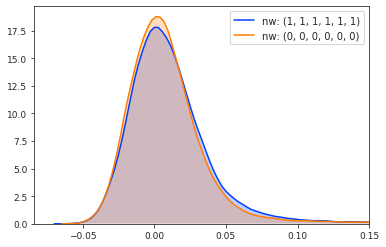

In [39]:
fig, ax = plt.subplots()
y1 = observables_df[observables_df.plaqs_diffs <= 0.2]['plaqs_diffs']
y2 = observables_hmc_df[observables_hmc_df.plaqs_diffs <= 0.2]['plaqs_diffs']
sns.kdeplot(y1, shade=True, ax=ax, label='nw: (1, 1, 1, 1, 1, 1)')
sns.kdeplot(y2, shade=True, ax=ax, label='nw: (0, 0, 0, 0, 0, 0)')
xlim = ax.get_xlim()
ax.set_xlim(xlim[0], 0.15)

In [ ]:
plaqs_diffs = u1_plaq_exact(beta) - np.array(observables['plaqs'])
sns.kdeplot(plaqs_diffs, shade=True, )

In [11]:
%debug

> /home/foremans/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py(56)_wrapfunc()
     54 def _wrapfunc(obj, method, *args, **kwds):
     55     try:
---> 56         return getattr(obj, method)(*args, **kwds)
     57 
     58     # An AttributeError occurs if the object does not have

ipdb> self.samples.shape
*** NameError: name 'self' is not defined
ipdb> up
> /home/foremans/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py(292)reshape()
    290            [5, 6]])
    291     """
--> 292     return _wrapfunc(a, 'reshape', newshape, order=order)
    293 
    294 

ipdb> up
> /home/foremans/.local/lib/python3.6/site-packages/autograd/tracer.py(48)f_wrapped()
     46             return new_box(ans, trace, node)
     47         else:
---> 48             return f_raw(*args, **kwargs)
     49     f_wrapped.fun = f_raw
     50     f_wrapped._is_autograd_primitive = True

ipdb> up
> /lus/theta-fs0/projects/DLHMC/l2hmc-qcd/l2hmc-qcd/lattice/lattice.py(231)calc_plaq_sums_

In [32]:
observables['plaqs'][0].shape

(2, 8)

In [30]:
plaq_sums = lattice.calc_plaq_sums(samples)
print(f'samples.shape: {samples.shape}\n')
print(f'plaq_sums.shape: {plaq_sums.shape}\n')

samples.shape: (64, 128)



AttributeError: 'tuple' object has no attribute 'shape'

In [47]:
outputs.keys()

dict_keys(['x_init', 'v_init', 'x_proposed', 'v_proposed', 'x_out', 'v_out', 'xf', 'xb', 'accept_prob', 'sumlogdet_proposed', 'sumlogdet_out'])

In [48]:
np.mean(outputs['accept_prob'])

0.8649048204725072

In [46]:
np.mean(1. - np.cos(outputs['x_init'] - outputs['x_out']))

1.7801593228873869

In [28]:
outputs['accept_prob']

array([1.   , 0.776, 0.536, 1.   , 1.   , 0.792, 1.   , 1.   , 1.   , 1.   , 0.611, 1.   , 0.523, 0.659, 1.   , 0.829, 0.811, 1.   , 1.   , 0.645, 1.   , 1.   , 0.79 , 0.675, 0.86 , 0.724, 0.71 , 0.883, 1.   , 1.   , 0.681, 1.   , 0.879, 1.   , 1.   , 1.   , 0.909, 0.954, 0.812, 0.582, 0.792, 0.955, 1.   , 0.815, 1.   , 0.75 , 1.   , 0.575, 1.   , 0.552, 0.602, 1.   , 1.   , 1.   , 0.739, 1.   , 0.952, 0.737, 1.   , 0.877, 0.813, 0.797, 0.959, 1.   ])

In [36]:
masks_file = os.path.abspath('/home/foremans/figures_2020_01_08/dynamics_mask.pkl')
with open(masks_file, 'rb') as f:
    masks = pickle.load(f)
    

In [38]:
masks.keys()

dict_keys(['masks', 'masks_inv'])

In [39]:
masks['masks']

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]], dtype=float32)]

In [41]:
masks['masks_inv']

[array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1.]], dtype=float32)]

In [42]:
masks['masks_inv'][0].shape

(1, 128)